In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF, cumulated_euc_ts

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["3", "4", "5", "6"],
    channels=["2", "4", "6", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 50)
dc.normalize_modalities(smooth=True)

---

In [4]:
def pass_antagonist_channels(gnum, array):
    """
    pass antagonist only channels for each gesture
    gnum - gesture number (i.e. 1, 2, 3, or 4)
    array - entire array of all channels and time index
    """
    antgnsts = {"3":[0, 2, 3], # channels 4 & 6; 0 is tidx
                "4":[0, 1, 4], # channels 2 & 8; 0 is tidx
                "5":[0, 3, 4], # channels 6 & 8; 0 is tidx
                "6":[0, 1, 2]} # channels 4 & 2; 0 is tidx
    antagonist_array = np.c_[array[:, antgnsts[gnum][0]],
                             array[:, antgnsts[gnum][1]],
                             array[:, antgnsts[gnum][2]]]
    return antagonist_array

---

30
subject 30; gesture 5_0_2


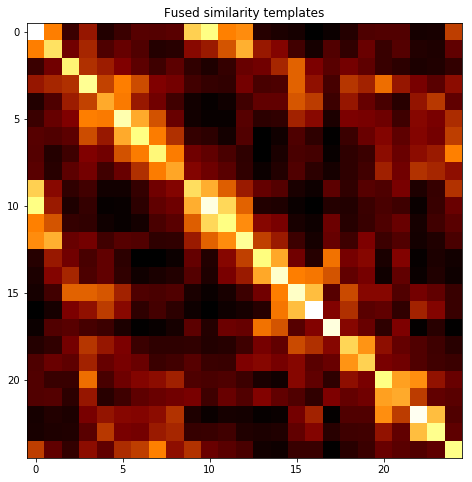

subject 30; gesture 3_0_1


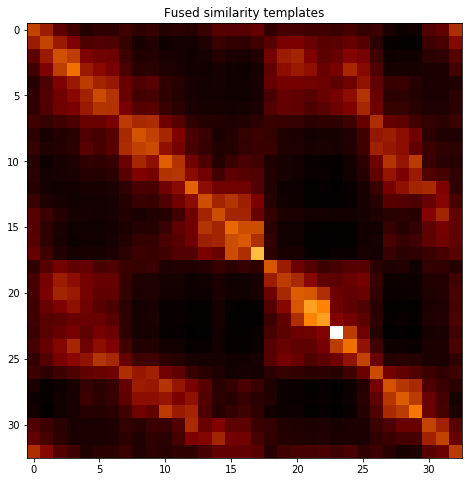

subject 30; gesture 4_1_1


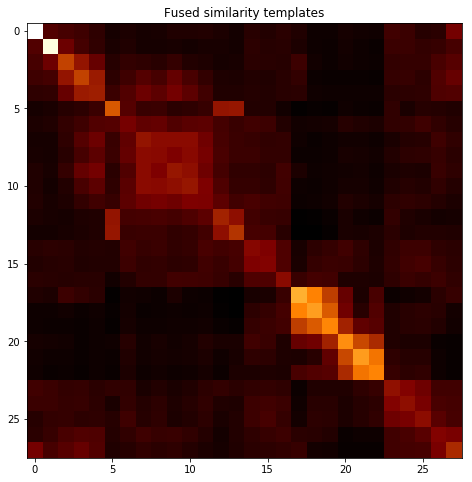

subject 30; gesture 4_1_2


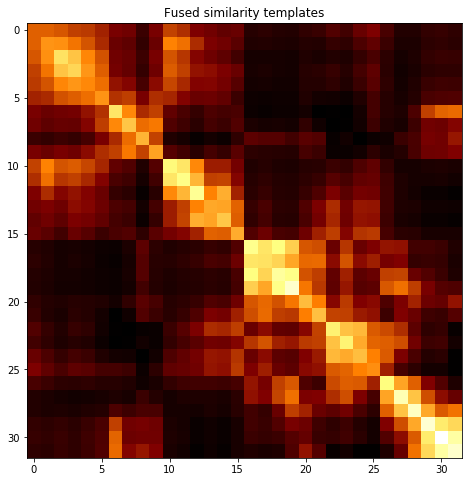

subject 30; gesture 5_1_2


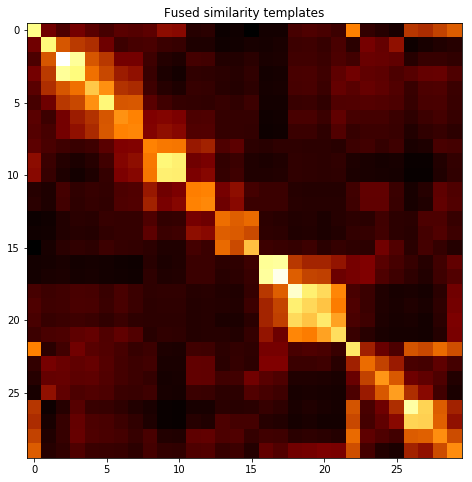

subject 30; gesture 6_1_2


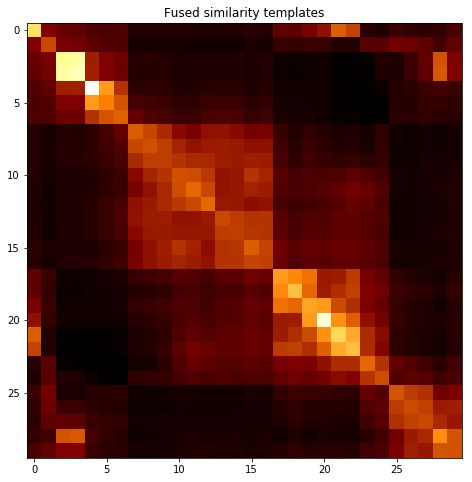

subject 30; gesture 4_0_1


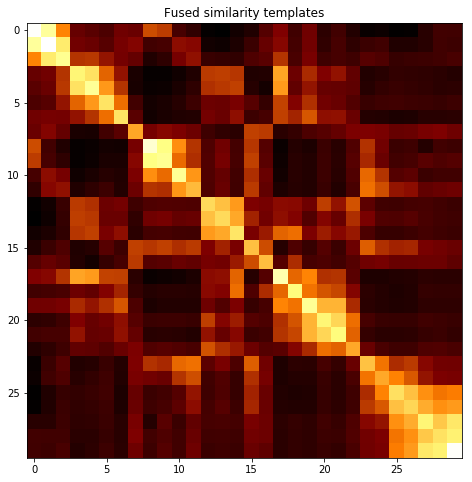

subject 30; gesture 3_0_2


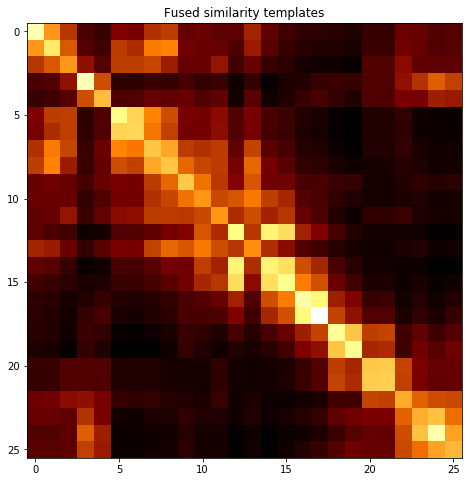

subject 30; gesture 5_1_1


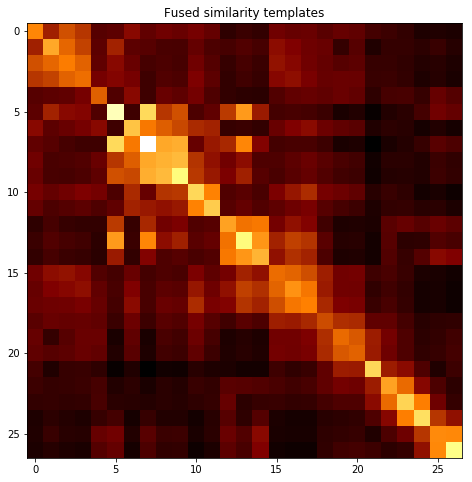

subject 30; gesture 6_1_1


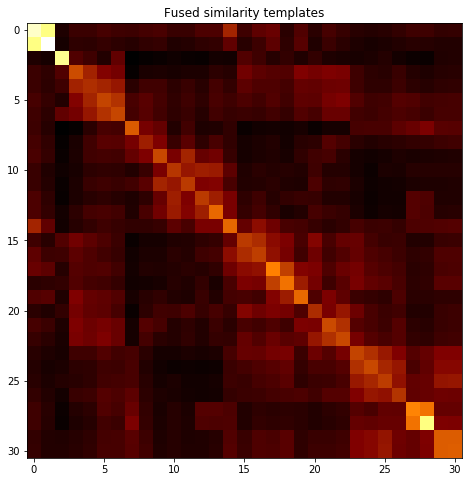

subject 30; gesture 6_0_2


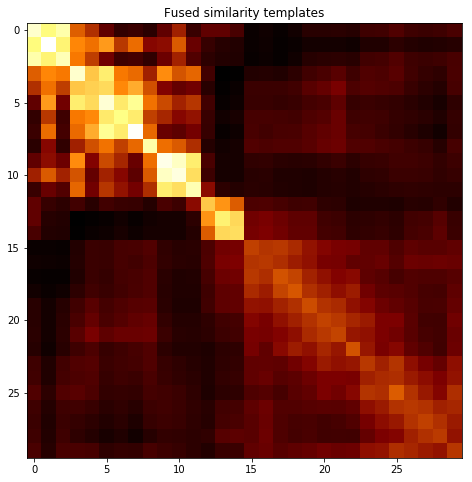

subject 30; gesture 3_1_2


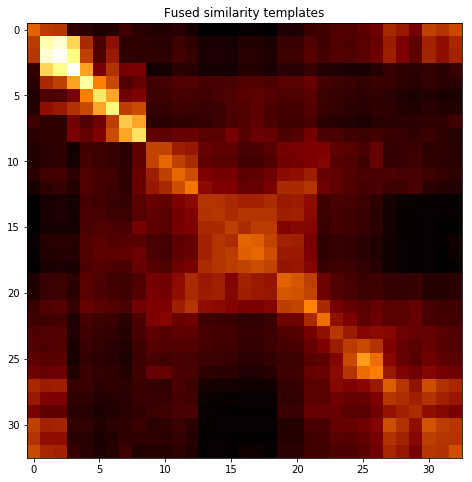

subject 30; gesture 3_1_1


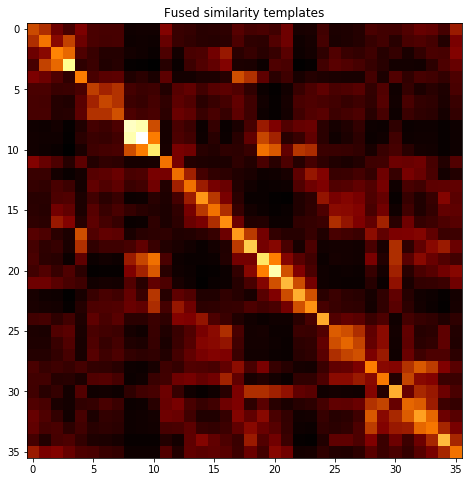

subject 30; gesture 6_0_1


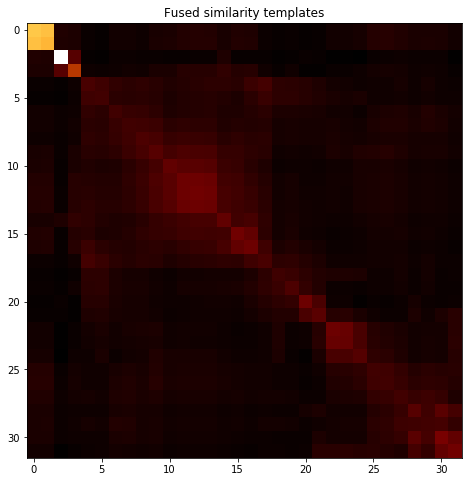

subject 30; gesture 5_0_1


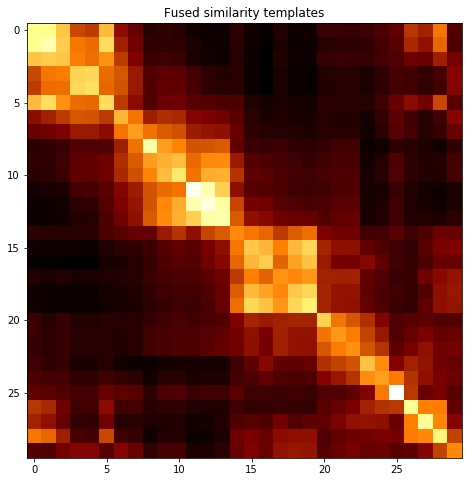

subject 30; gesture 4_0_2


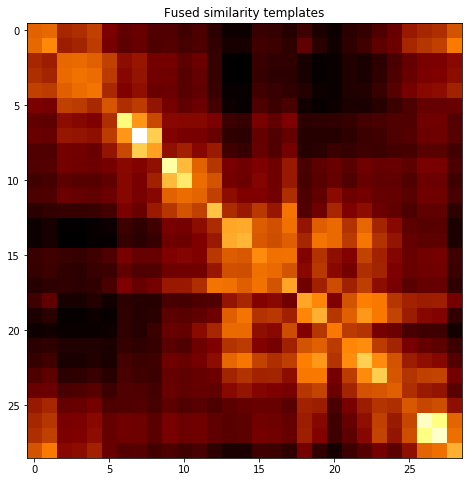

06
subject 06; gesture 5_0_2


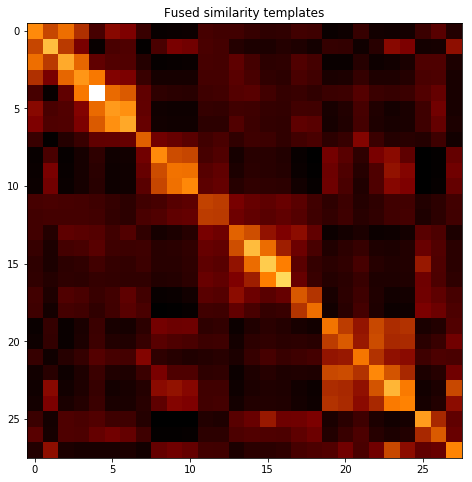

subject 06; gesture 3_0_1


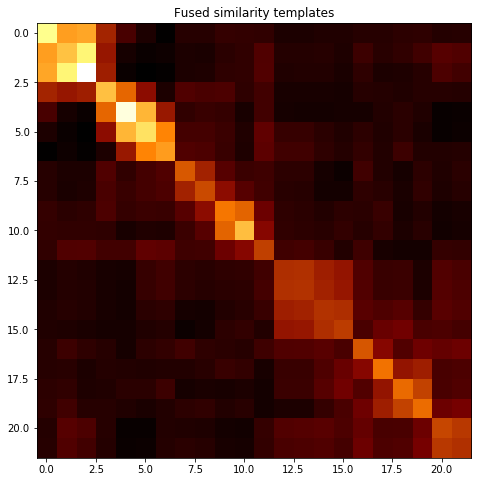

subject 06; gesture 4_1_1


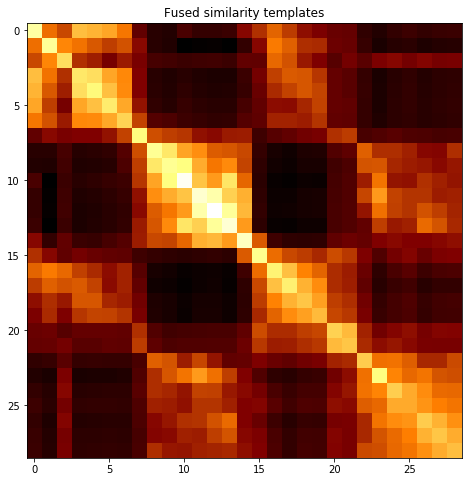

subject 06; gesture 4_1_2


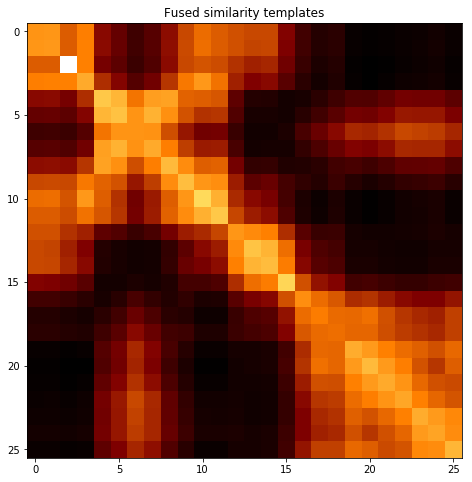

subject 06; gesture 5_1_2


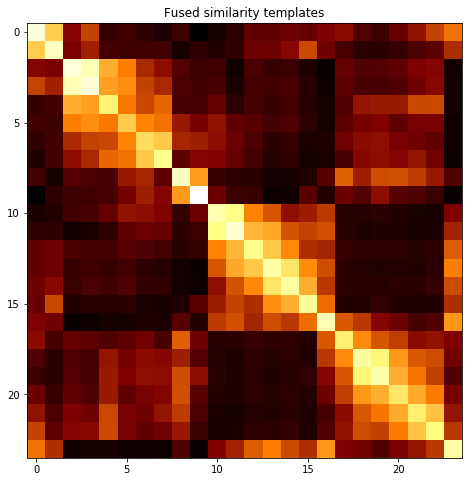

subject 06; gesture 6_1_2


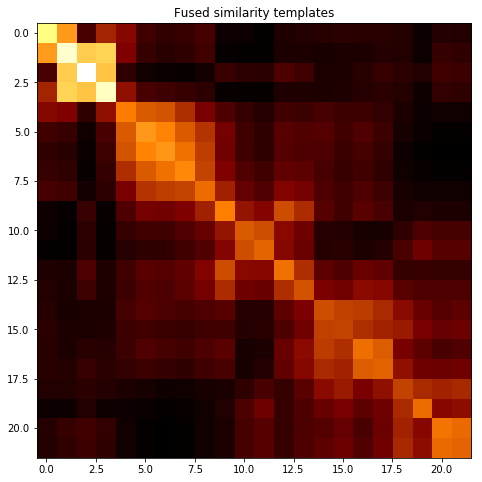

subject 06; gesture 4_0_1


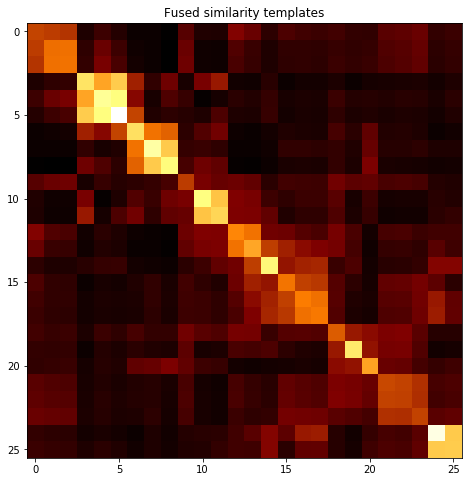

subject 06; gesture 3_0_2


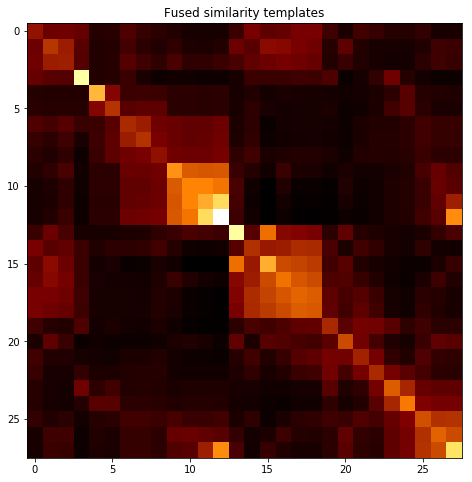

subject 06; gesture 5_1_1


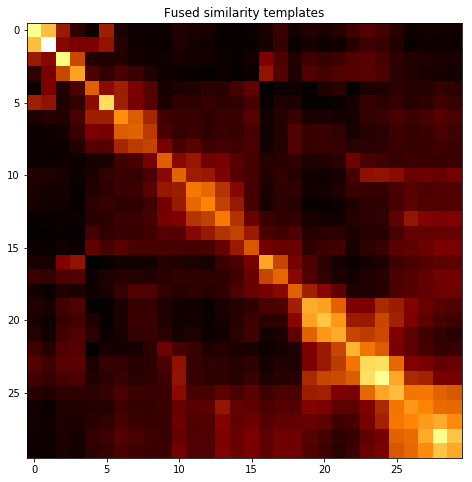

subject 06; gesture 6_1_1


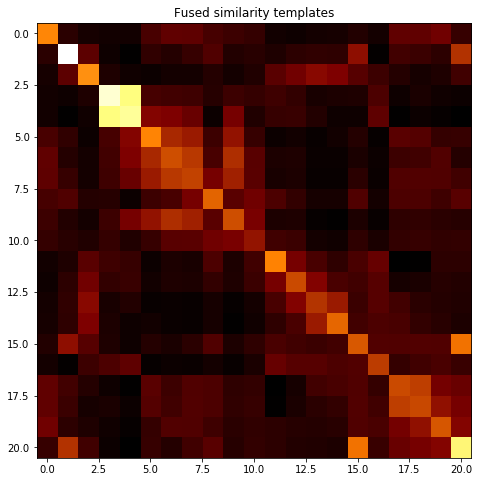

subject 06; gesture 6_0_2


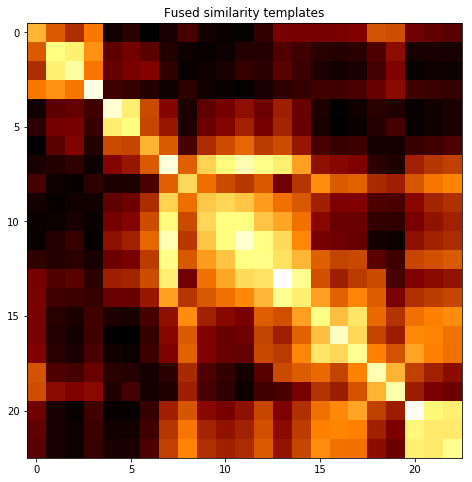

subject 06; gesture 3_1_2


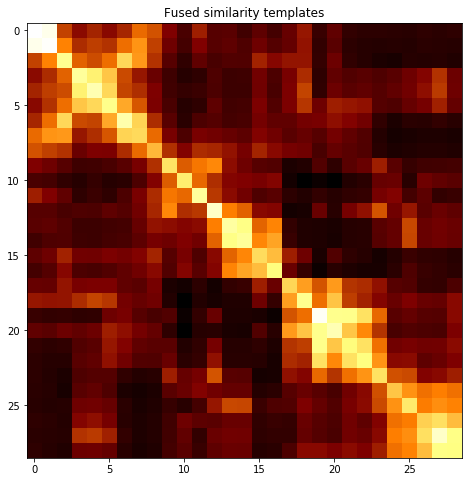

subject 06; gesture 3_1_1


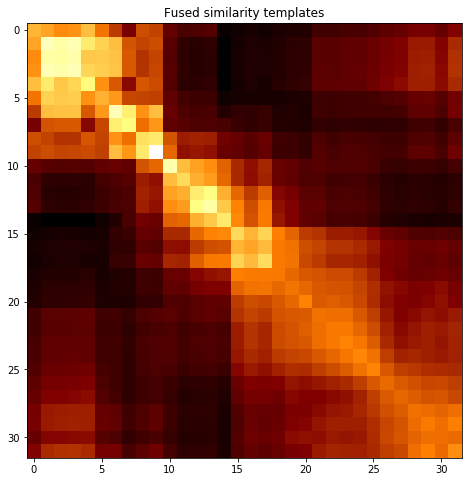

subject 06; gesture 6_0_1


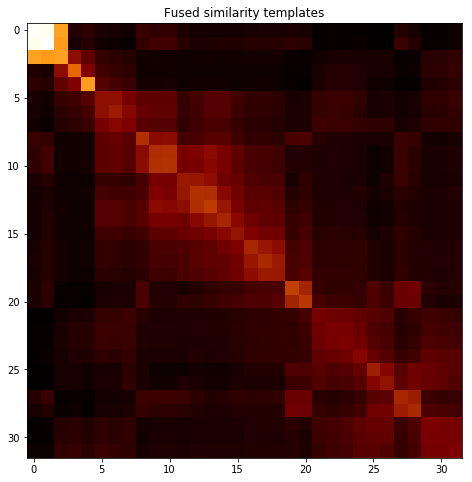

subject 06; gesture 5_0_1


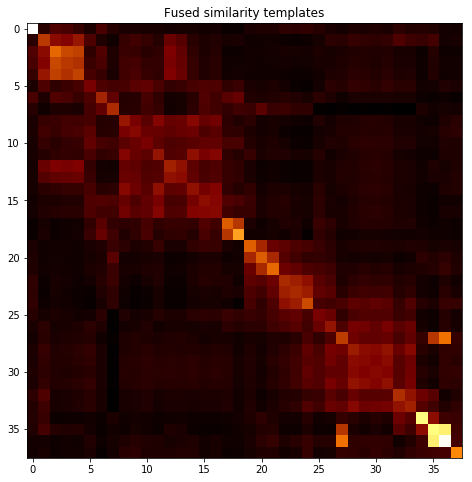

subject 06; gesture 4_0_2


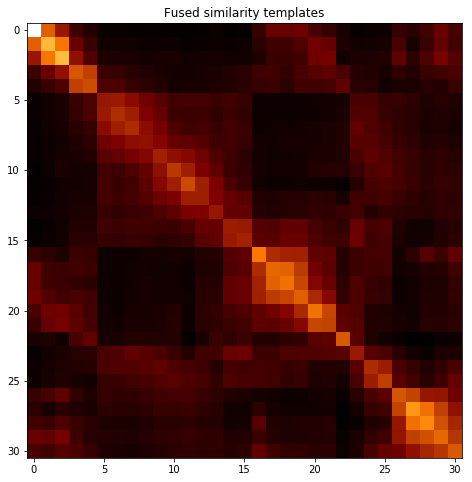

09
subject 09; gesture 5_0_2


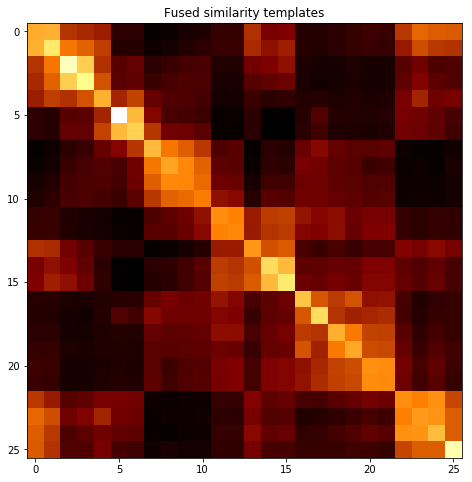

subject 09; gesture 3_0_1


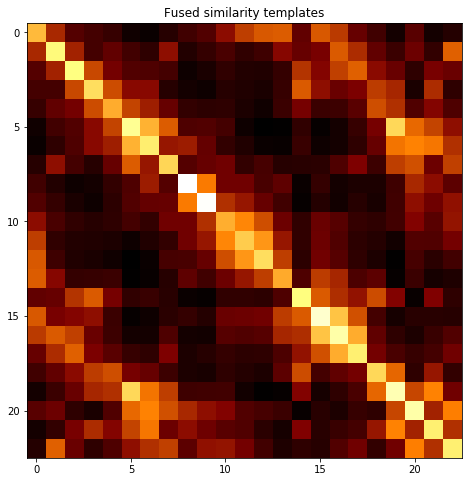

subject 09; gesture 4_1_1


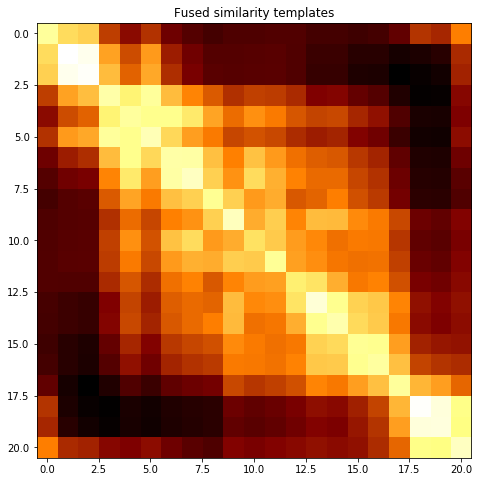

subject 09; gesture 4_1_2


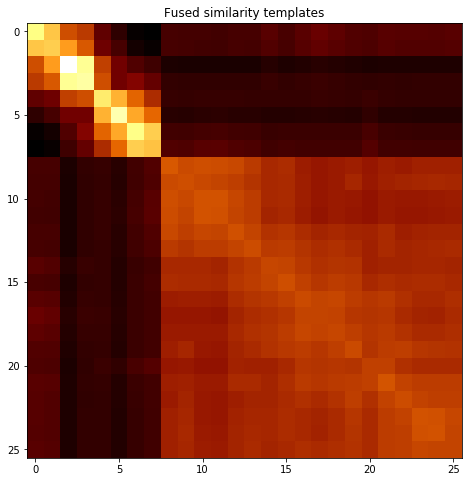

subject 09; gesture 5_1_2


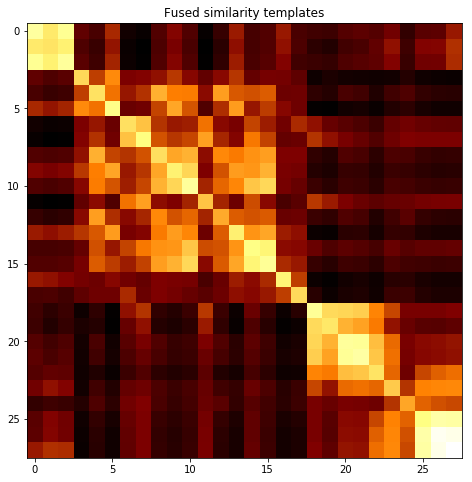

subject 09; gesture 6_1_2


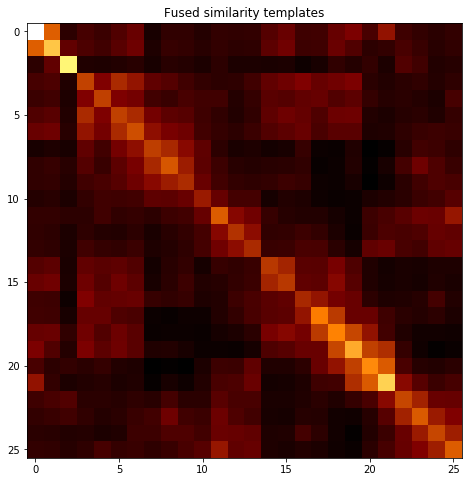

subject 09; gesture 4_0_1


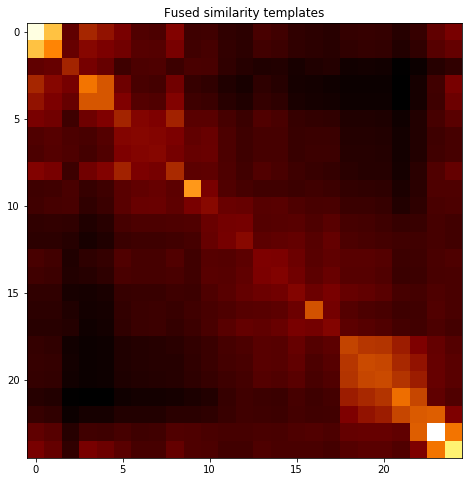

subject 09; gesture 3_0_2


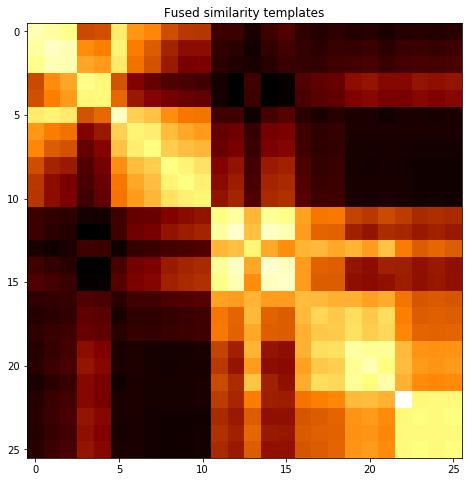

subject 09; gesture 5_1_1


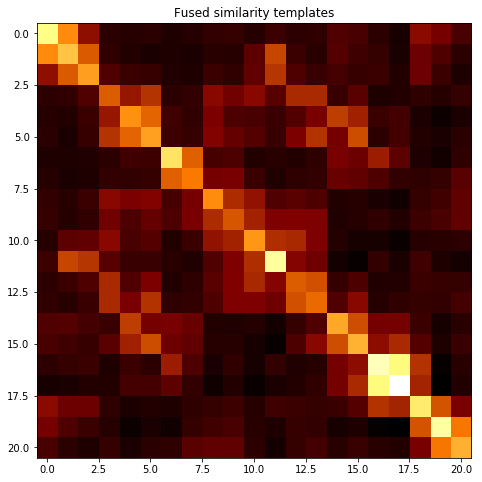

subject 09; gesture 6_1_1


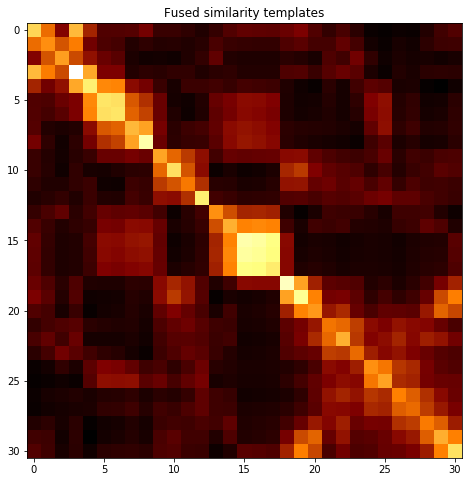

subject 09; gesture 6_0_2


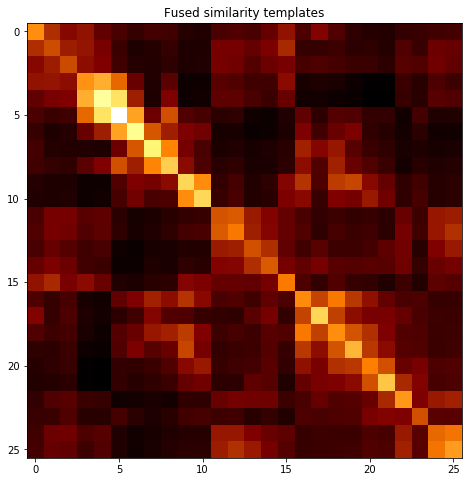

subject 09; gesture 3_1_2


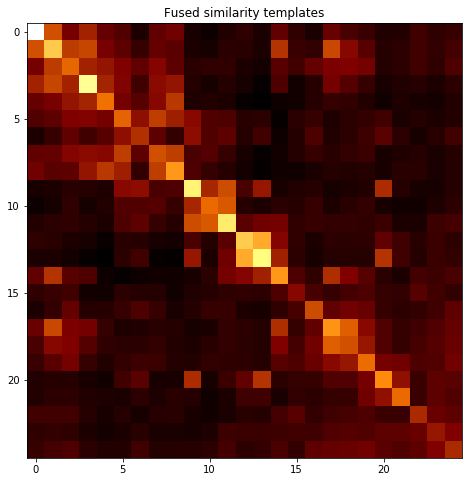

subject 09; gesture 3_1_1


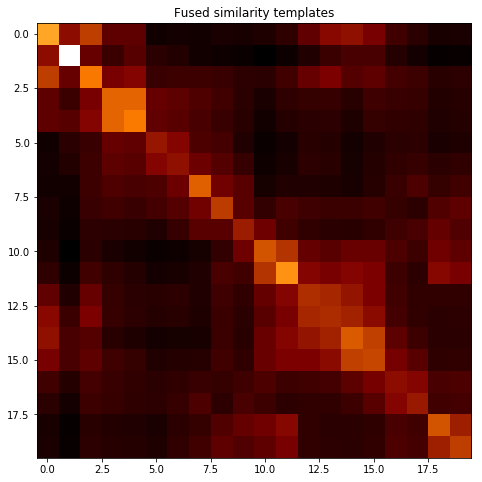

subject 09; gesture 6_0_1


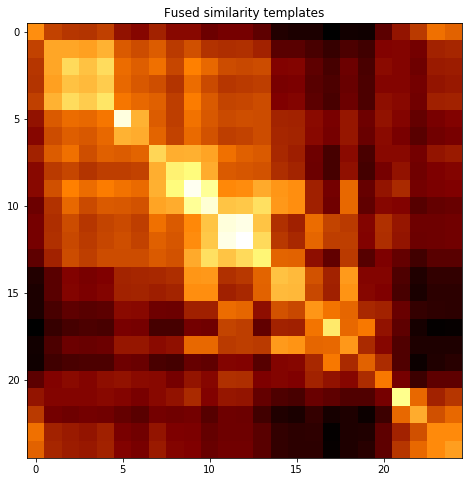

subject 09; gesture 5_0_1


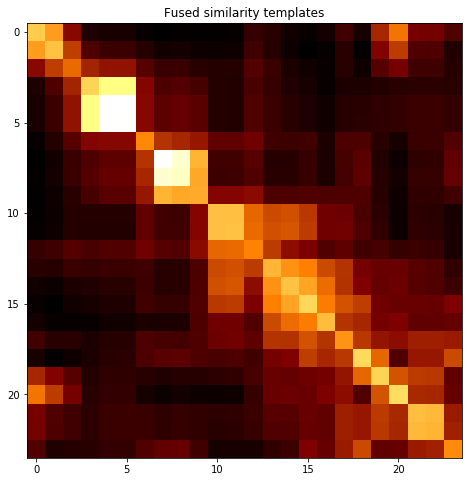

subject 09; gesture 4_0_2


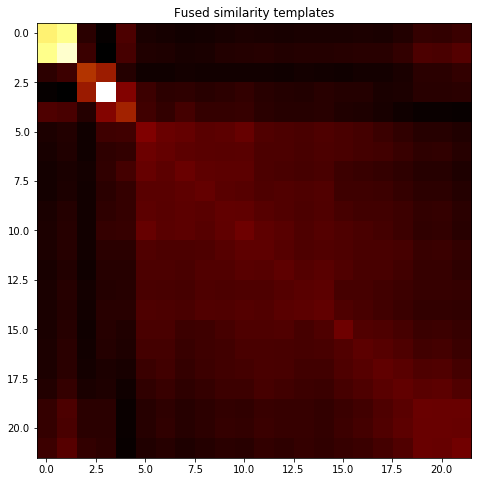

03
subject 03; gesture 5_0_2


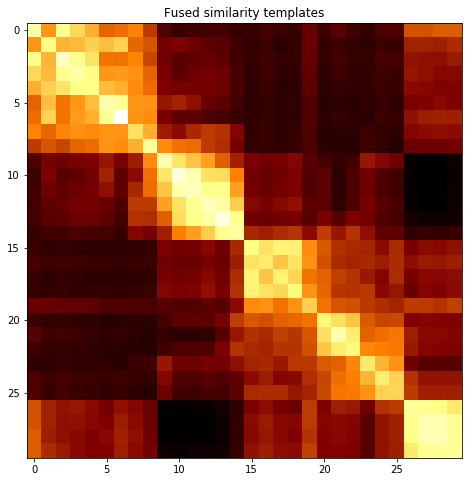

subject 03; gesture 3_0_1


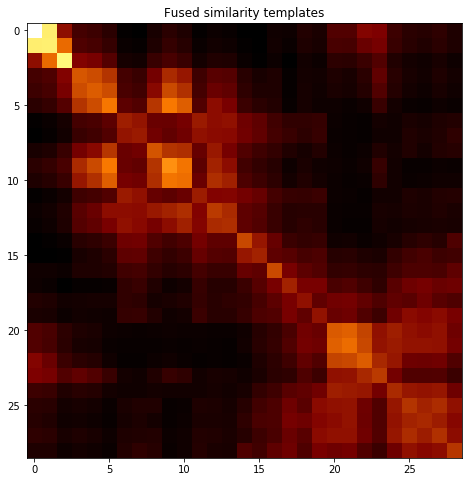

subject 03; gesture 4_1_1


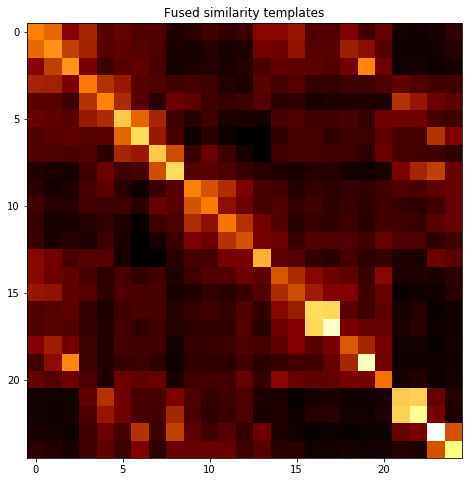

subject 03; gesture 4_1_2


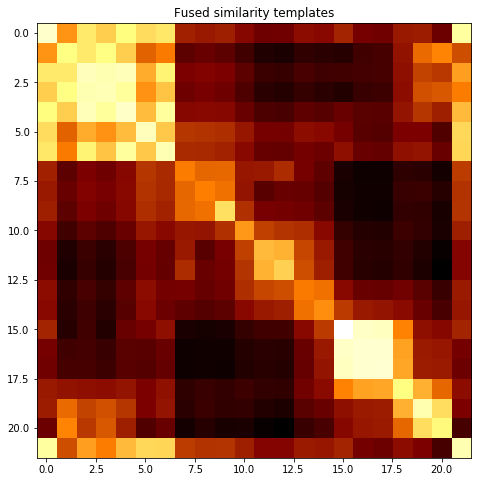

subject 03; gesture 5_1_2


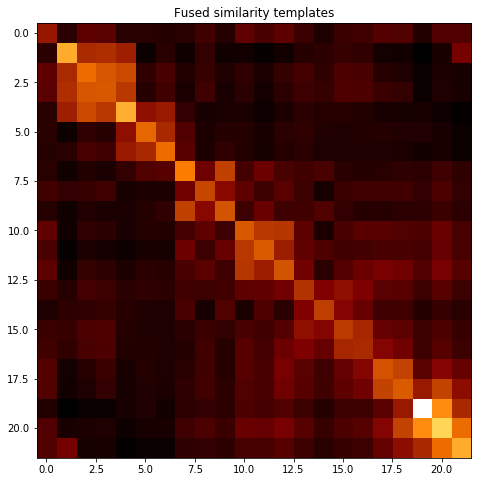

subject 03; gesture 6_1_2


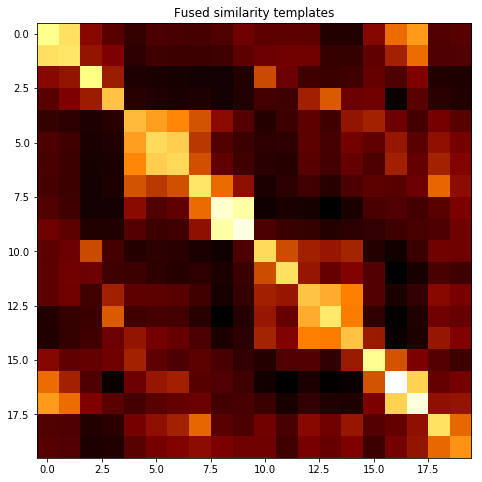

subject 03; gesture 4_0_1


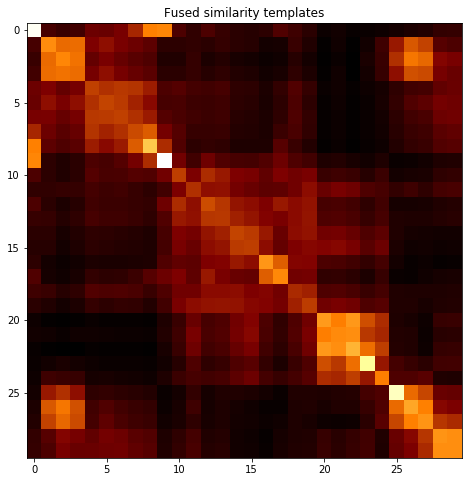

subject 03; gesture 3_0_2


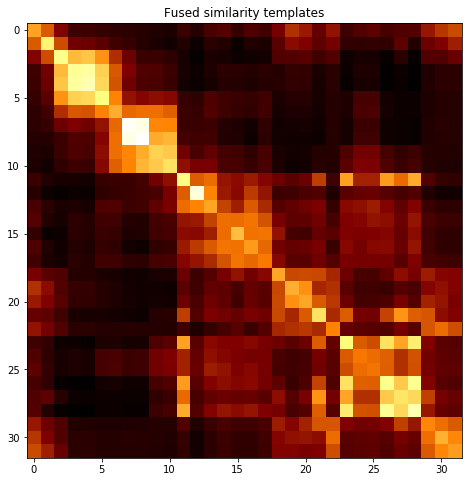

subject 03; gesture 5_1_1


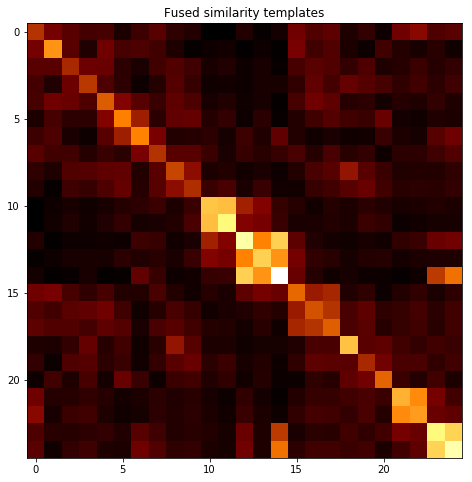

subject 03; gesture 6_1_1


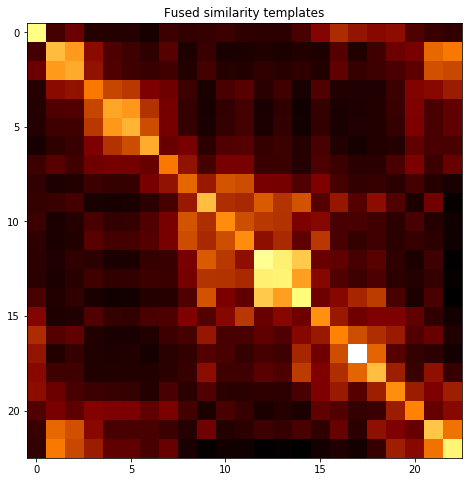

subject 03; gesture 6_0_2


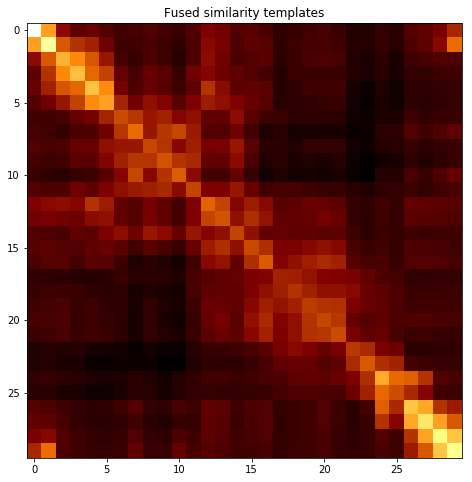

subject 03; gesture 3_1_2


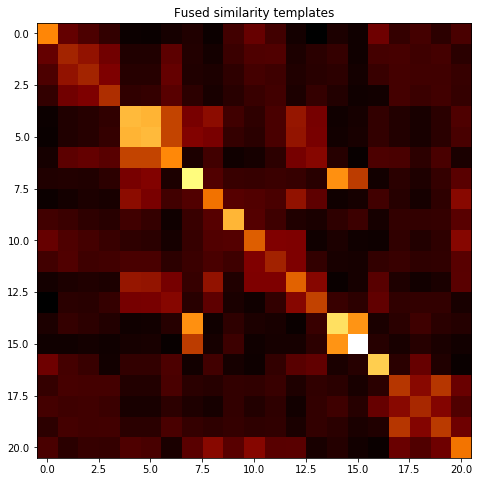

subject 03; gesture 3_1_1


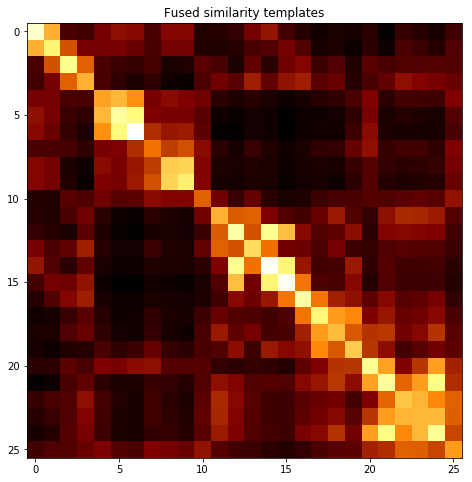

subject 03; gesture 6_0_1


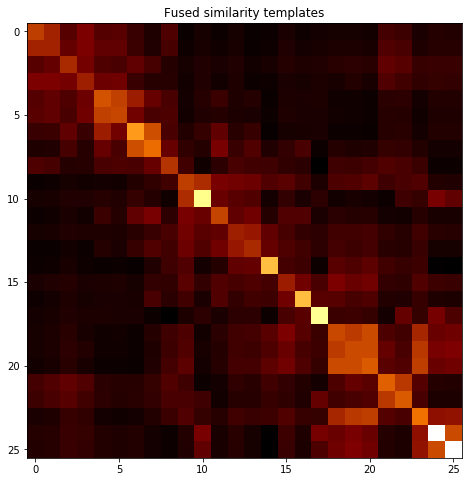

subject 03; gesture 5_0_1


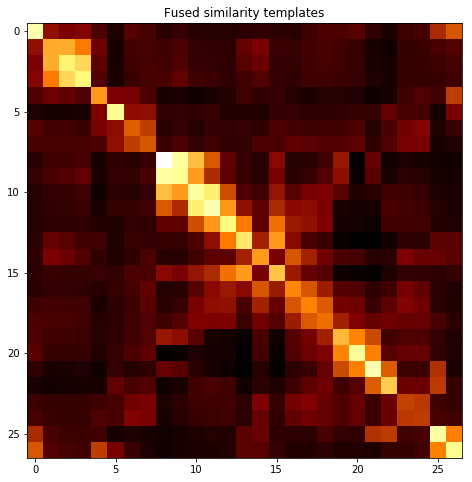

subject 03; gesture 4_0_2


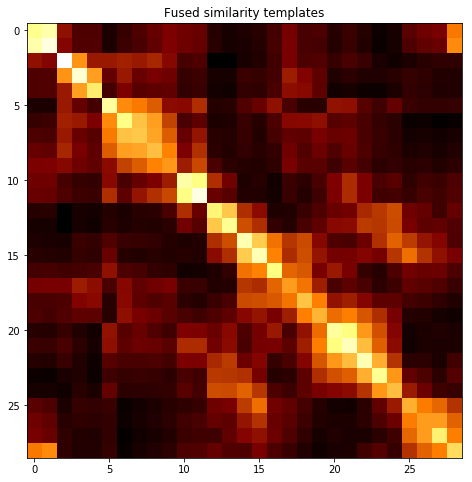

05
subject 05; gesture 5_0_2


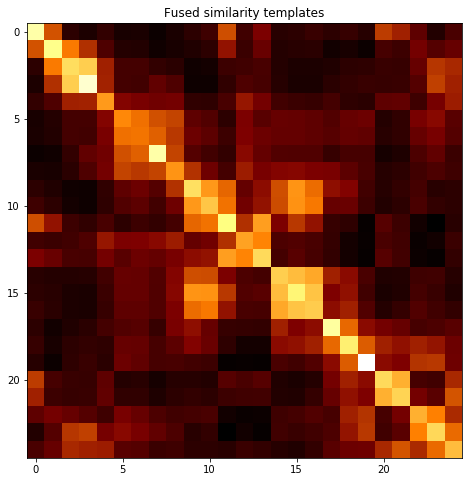

subject 05; gesture 3_0_1


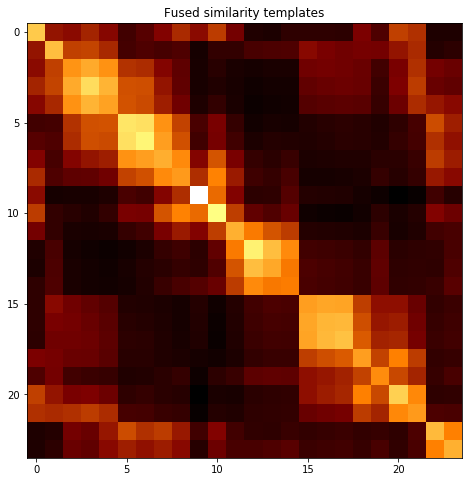

subject 05; gesture 4_1_1


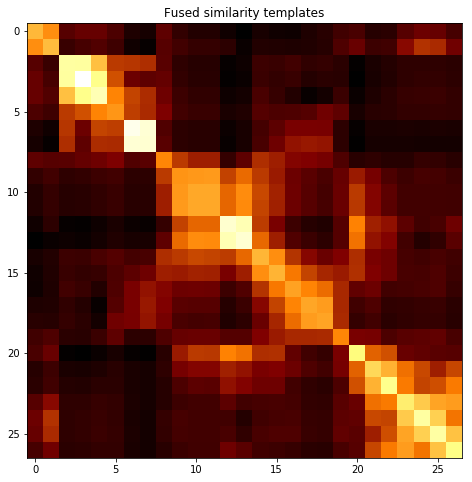

subject 05; gesture 4_1_2


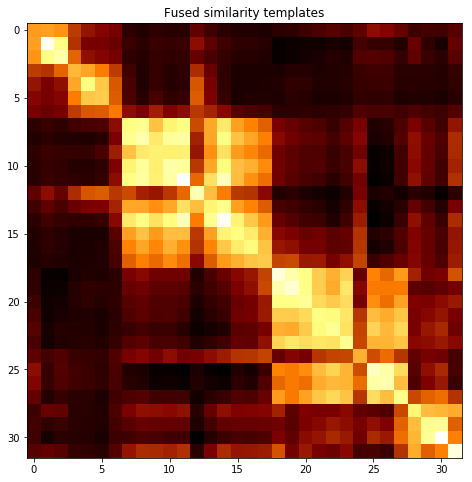

subject 05; gesture 5_1_2


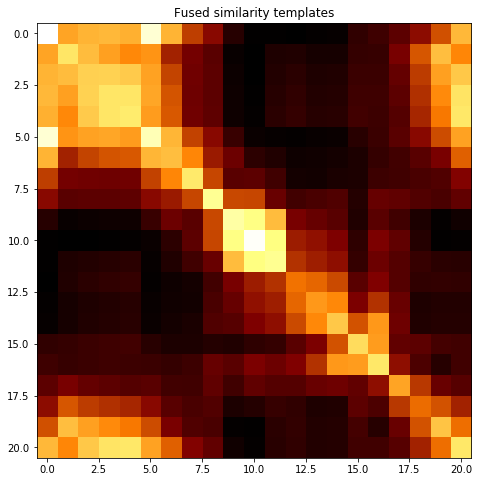

subject 05; gesture 6_1_2


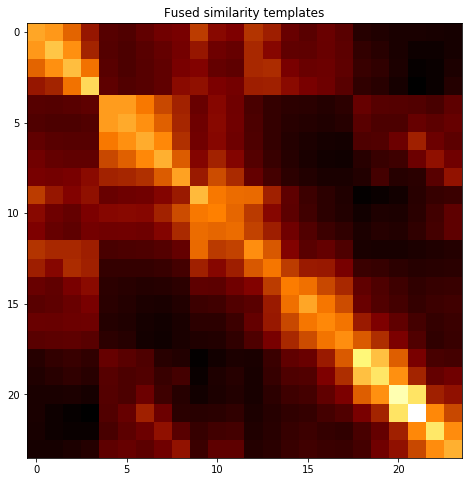

subject 05; gesture 4_0_1


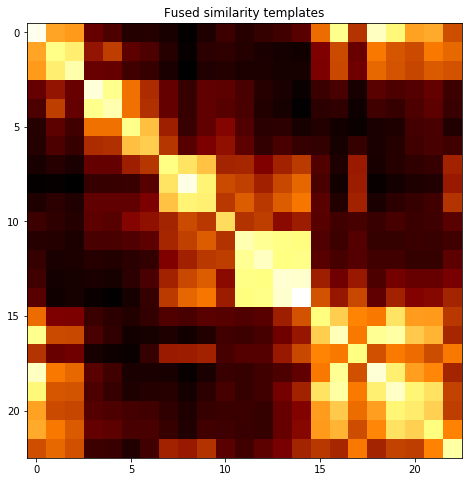

subject 05; gesture 3_0_2


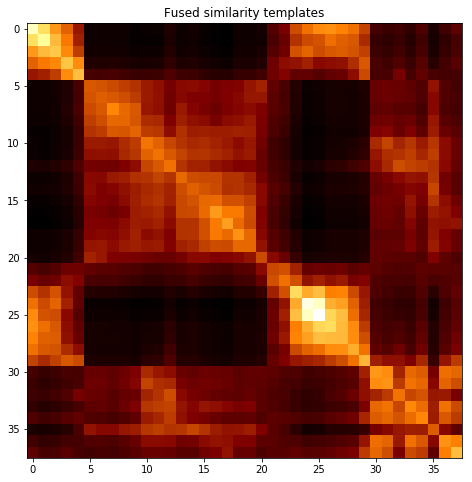

subject 05; gesture 5_1_1


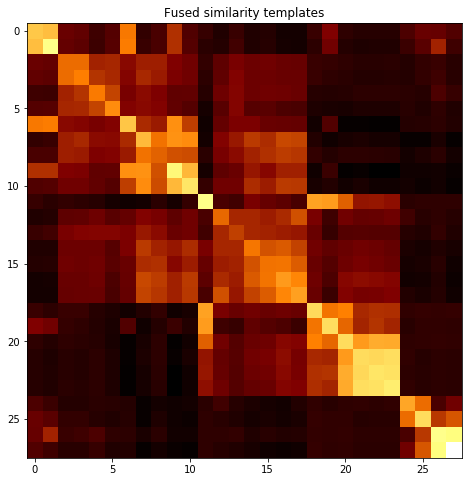

subject 05; gesture 6_1_1


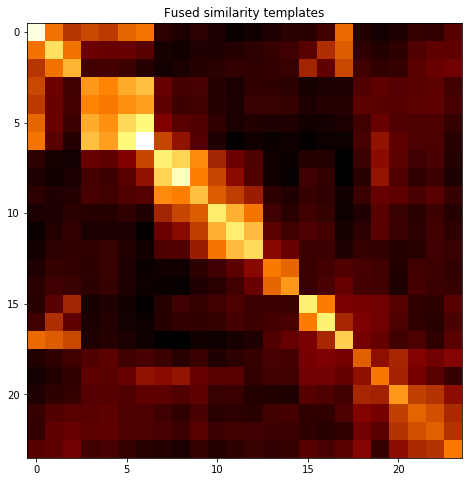

subject 05; gesture 6_0_2


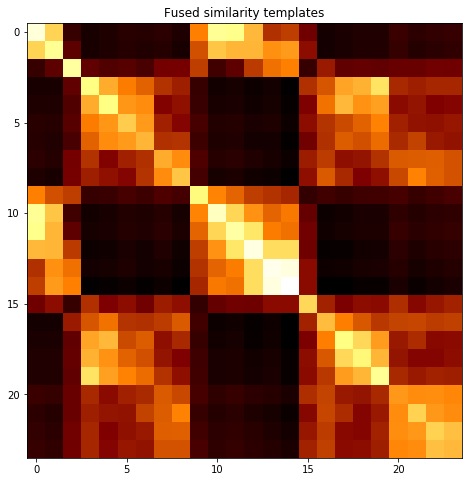

subject 05; gesture 3_1_2


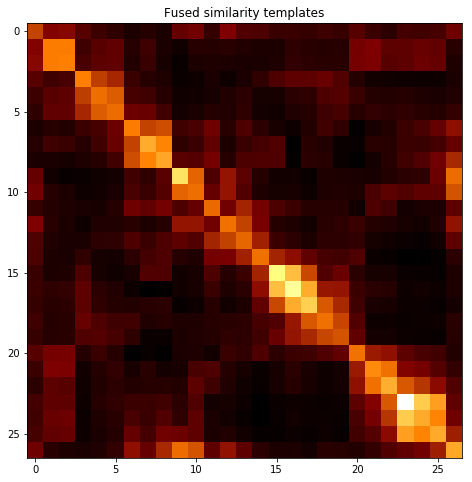

subject 05; gesture 3_1_1


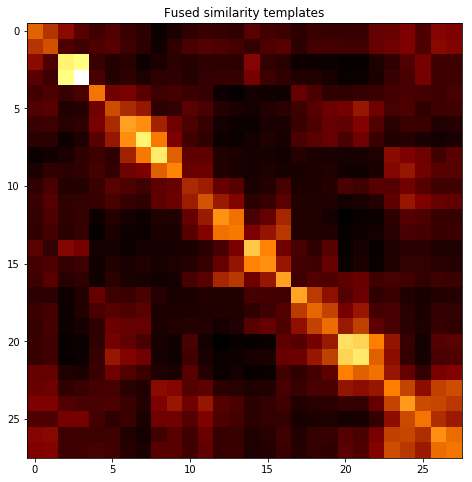

subject 05; gesture 6_0_1


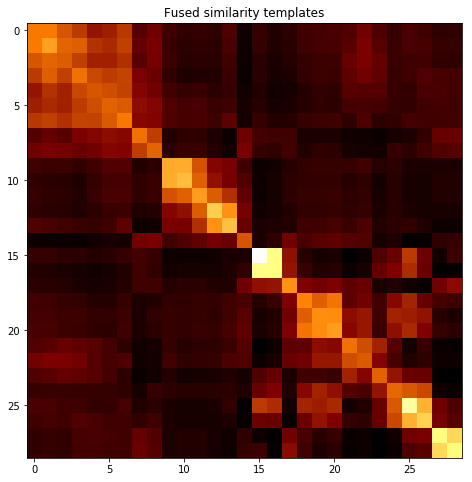

subject 05; gesture 5_0_1


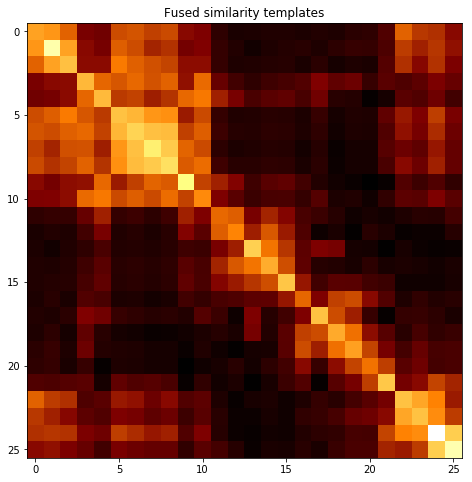

subject 05; gesture 4_0_2


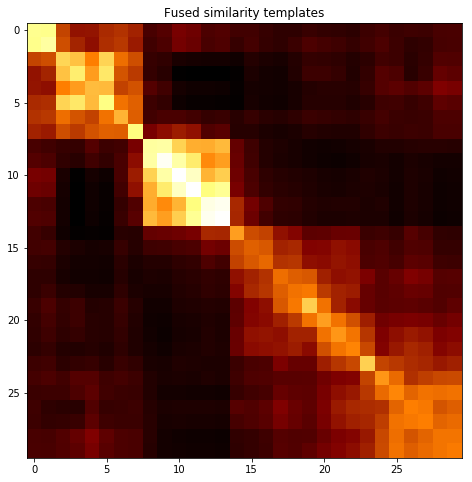

21
subject 21; gesture 5_0_2


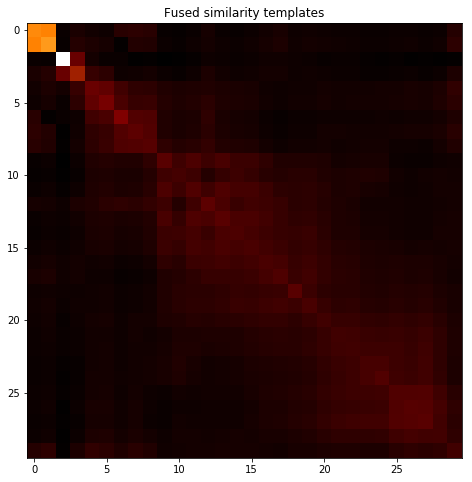

subject 21; gesture 3_0_1


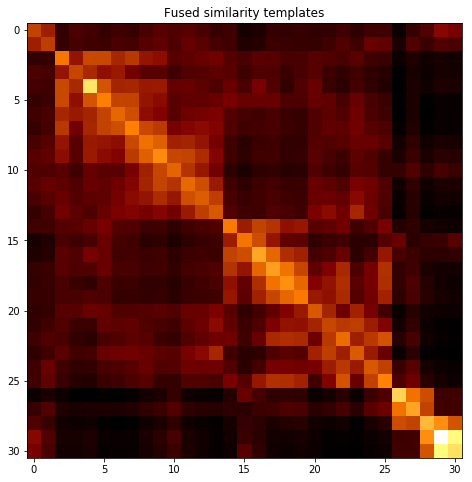

subject 21; gesture 4_1_1


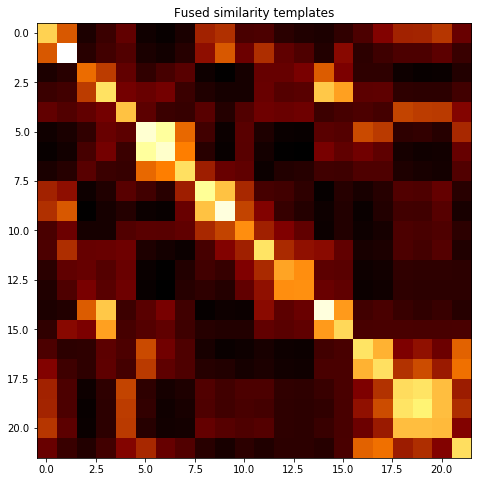

subject 21; gesture 4_1_2


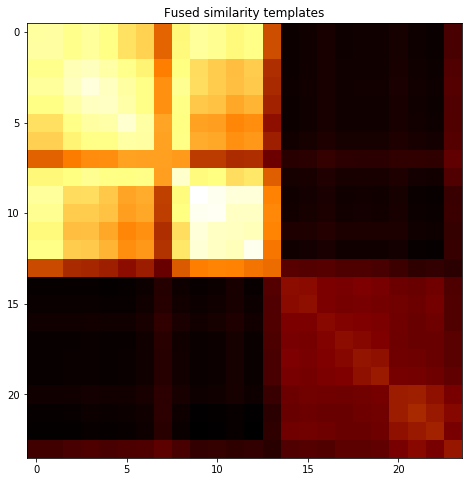

subject 21; gesture 5_1_2


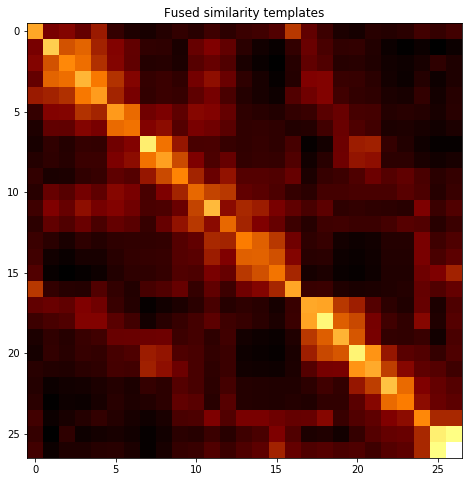

subject 21; gesture 6_1_2


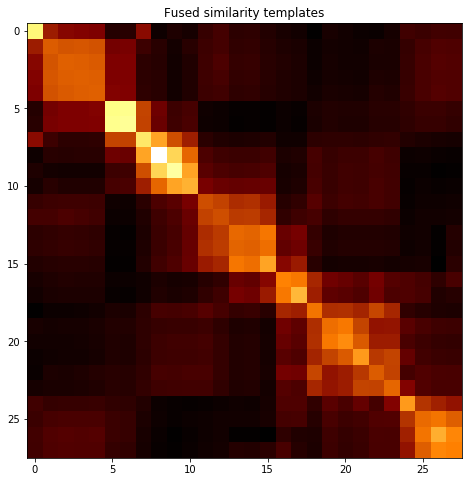

subject 21; gesture 4_0_1


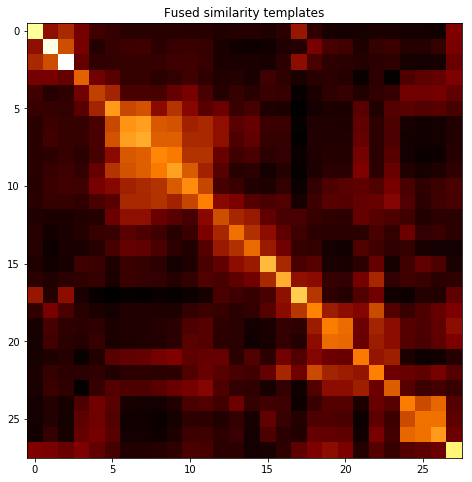

subject 21; gesture 3_0_2


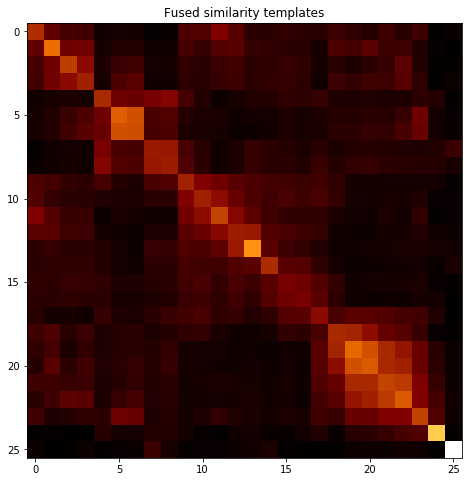

subject 21; gesture 5_1_1


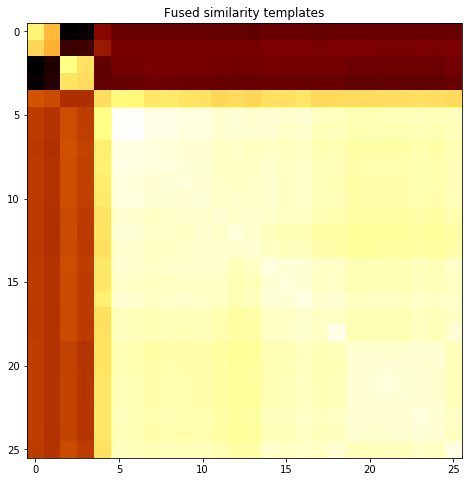

subject 21; gesture 6_1_1


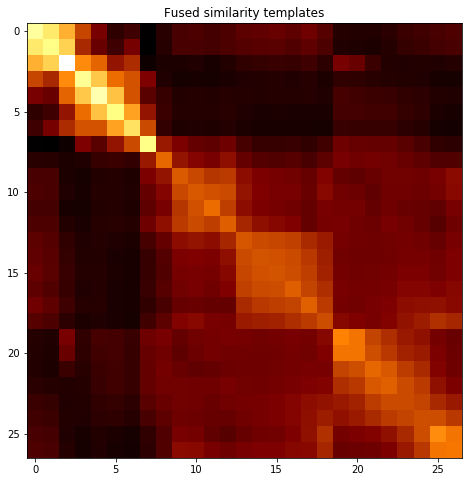

subject 21; gesture 6_0_2


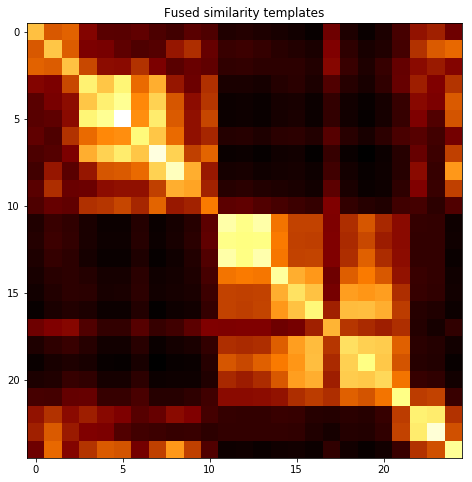

subject 21; gesture 3_1_2


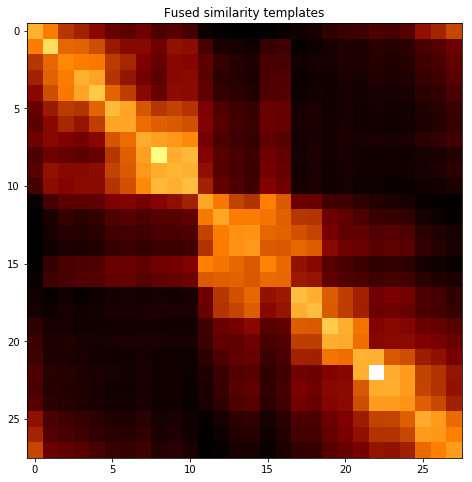

subject 21; gesture 3_1_1


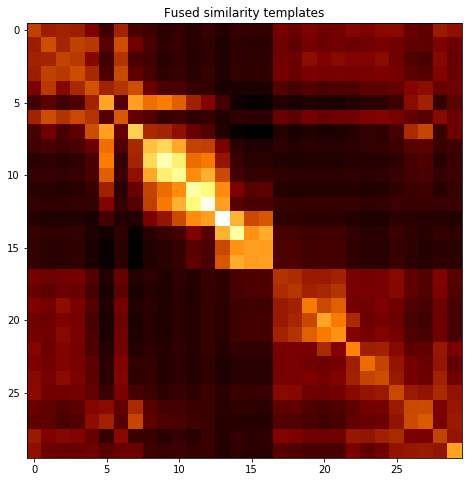

subject 21; gesture 6_0_1


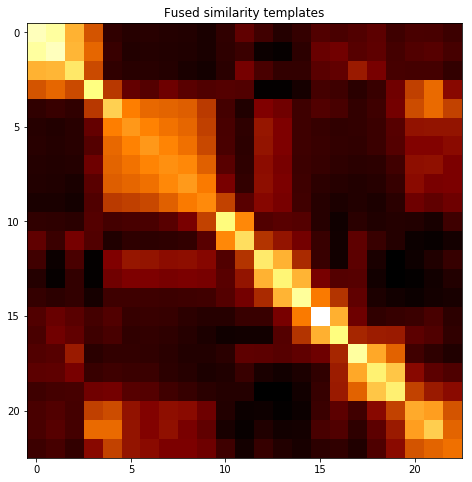

subject 21; gesture 5_0_1


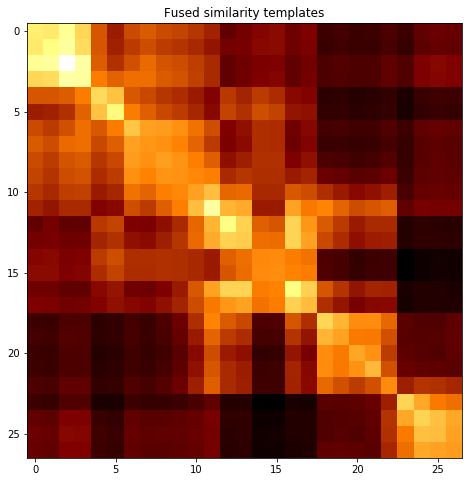

subject 21; gesture 4_0_2


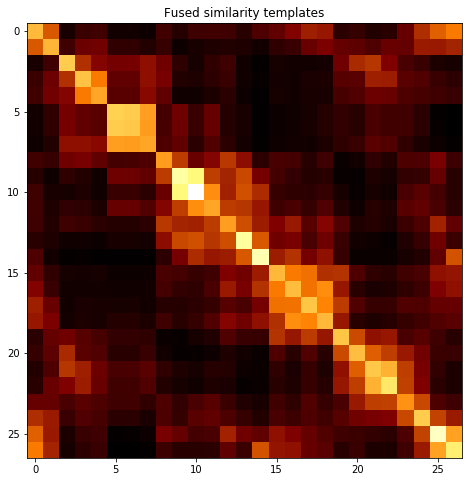

17
subject 17; gesture 5_0_2


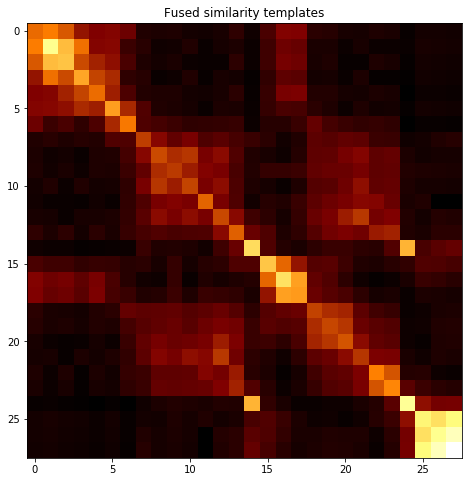

subject 17; gesture 3_0_1


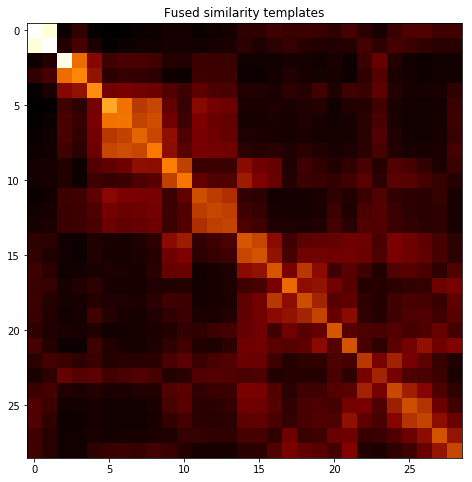

subject 17; gesture 4_1_1


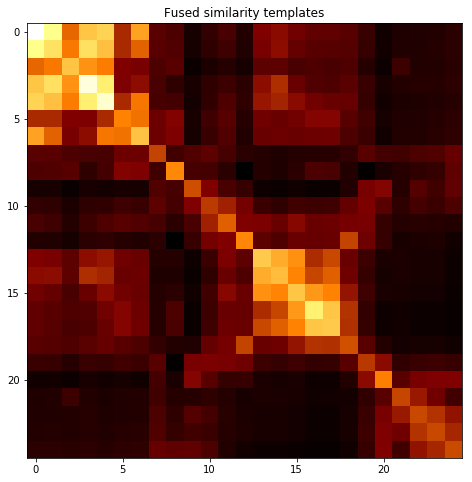

subject 17; gesture 4_1_2


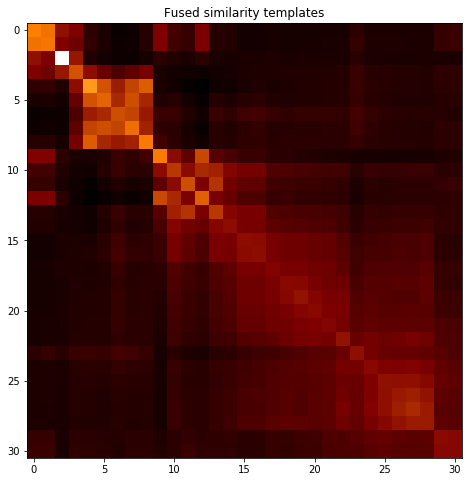

subject 17; gesture 5_1_2


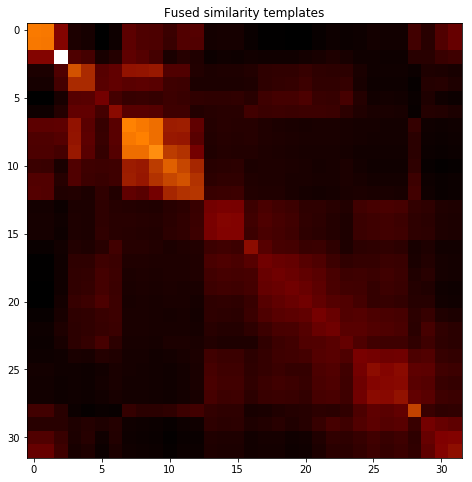

subject 17; gesture 6_1_2


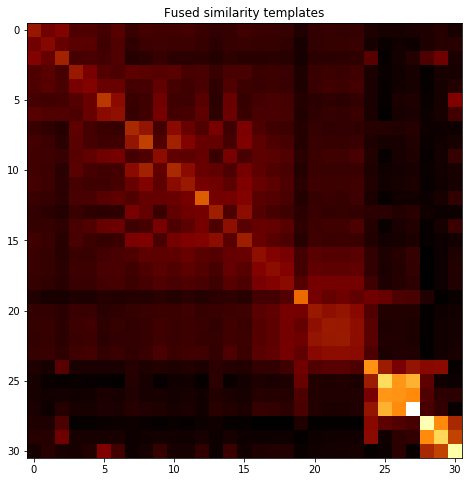

subject 17; gesture 4_0_1


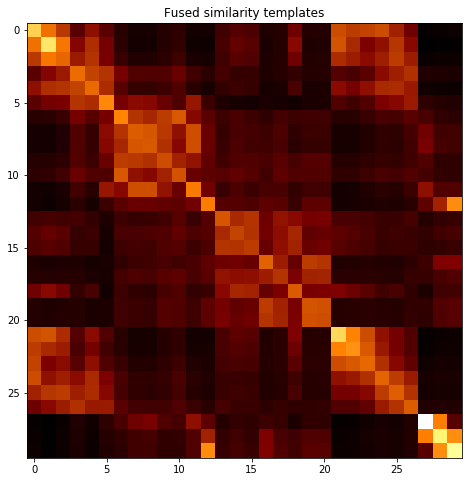

subject 17; gesture 3_0_2


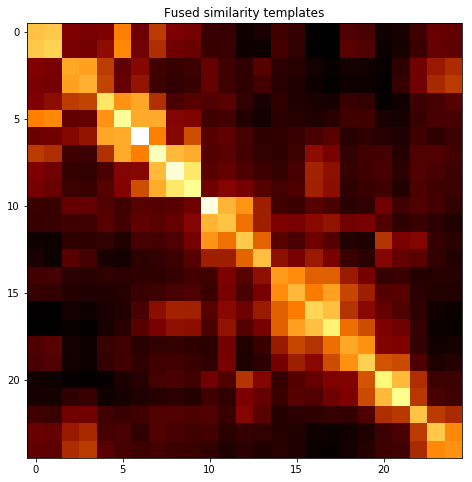

subject 17; gesture 5_1_1


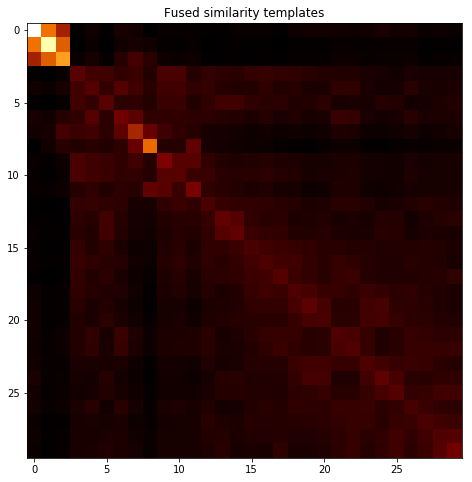

subject 17; gesture 6_1_1


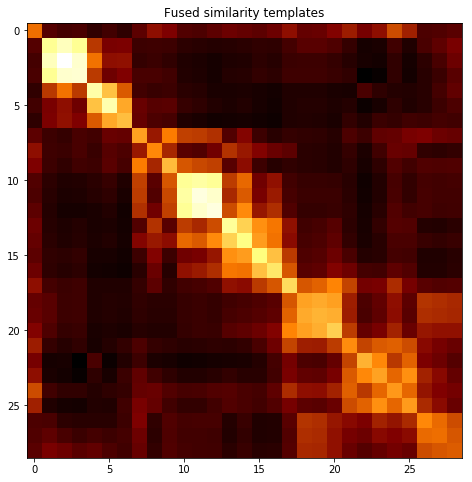

subject 17; gesture 6_0_2


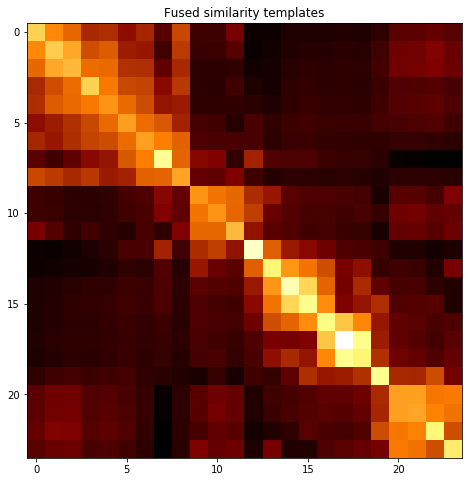

subject 17; gesture 3_1_2


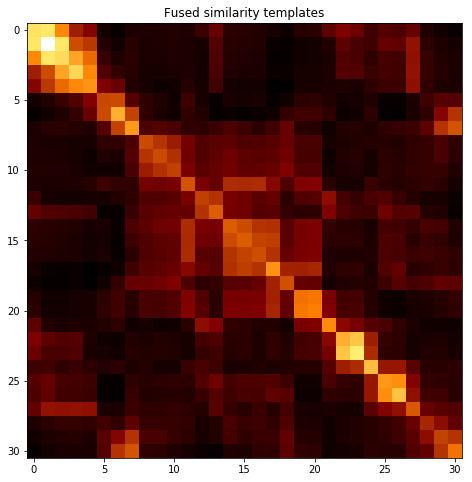

subject 17; gesture 3_1_1


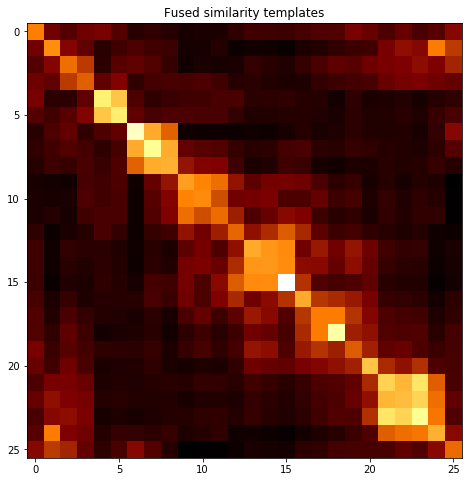

subject 17; gesture 6_0_1


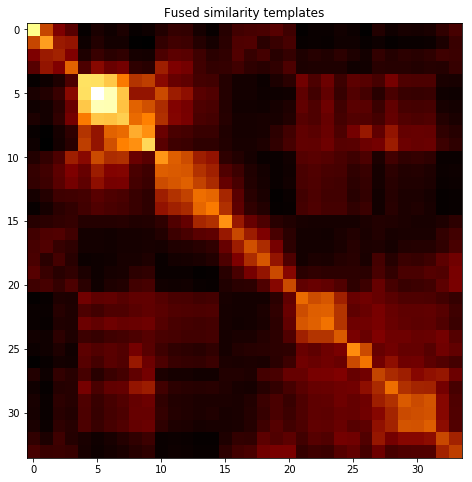

subject 17; gesture 5_0_1


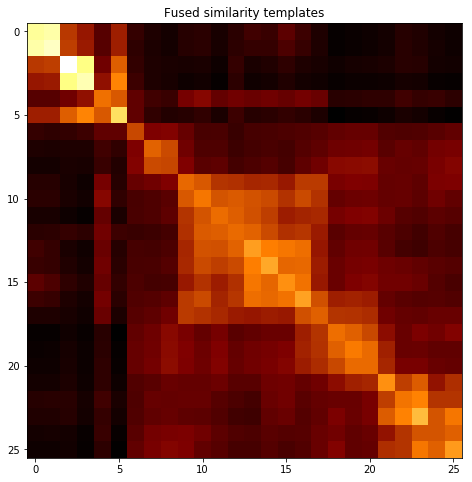

subject 17; gesture 4_0_2


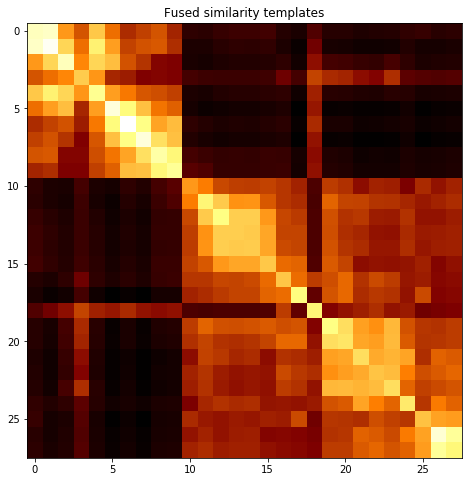

01
subject 01; gesture 5_0_2


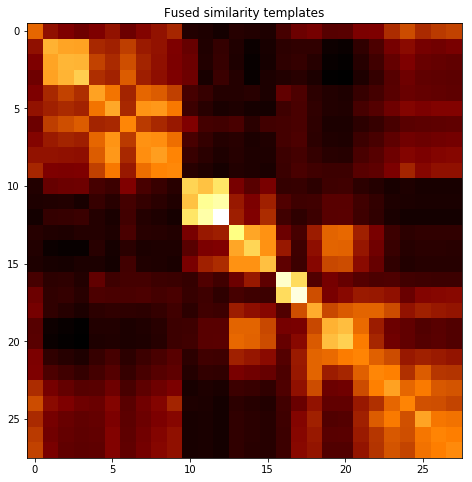

subject 01; gesture 3_0_1


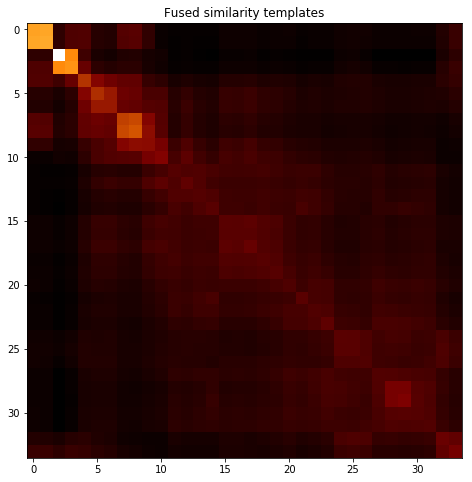

subject 01; gesture 4_1_1


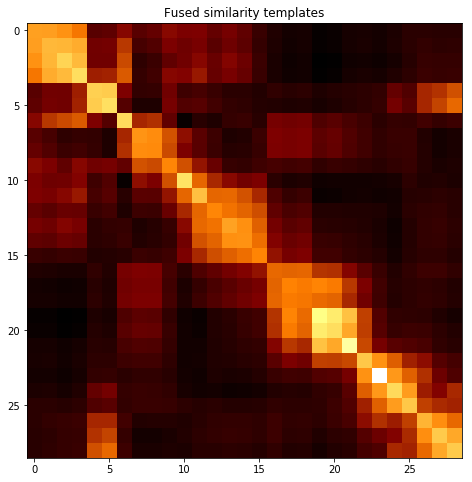

subject 01; gesture 4_1_2


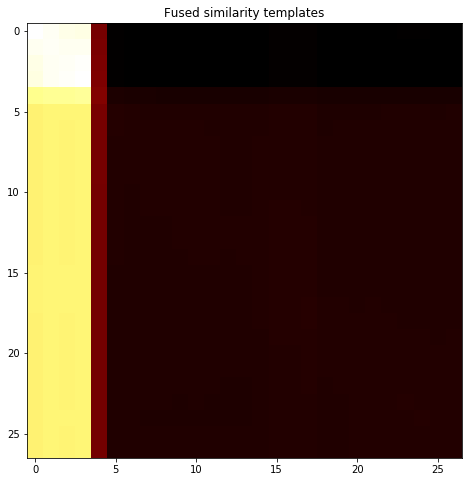

subject 01; gesture 5_1_2


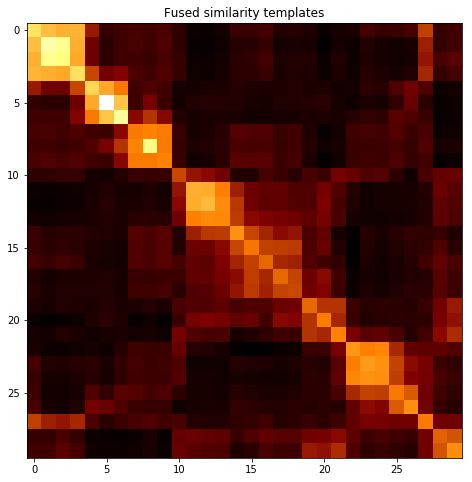

subject 01; gesture 6_1_2


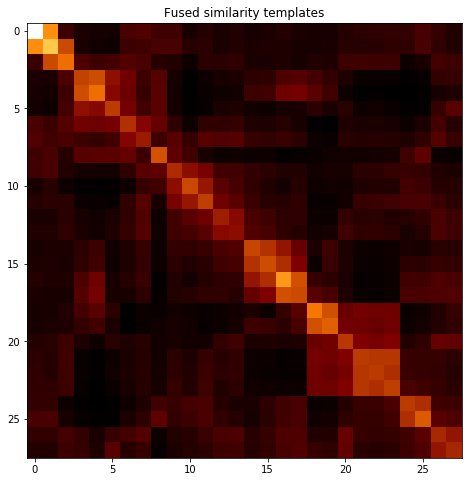

subject 01; gesture 4_0_1


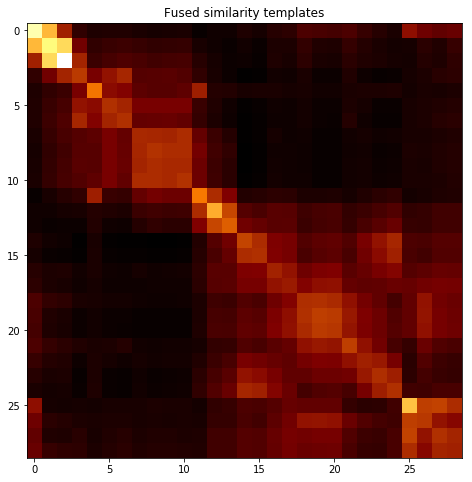

subject 01; gesture 3_0_2


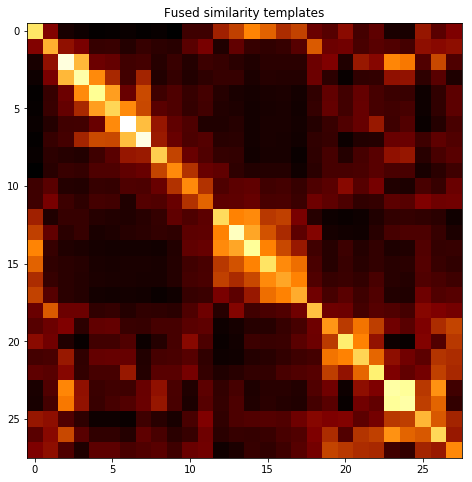

subject 01; gesture 5_1_1


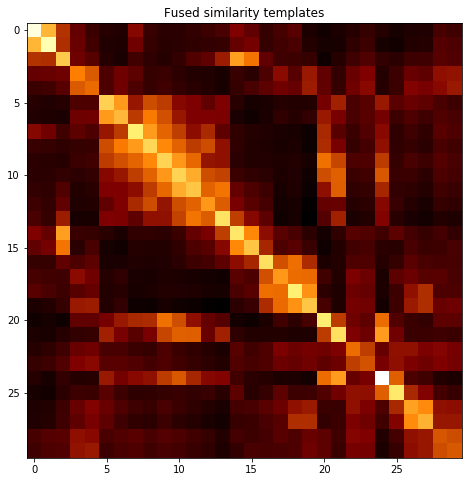

subject 01; gesture 6_1_1


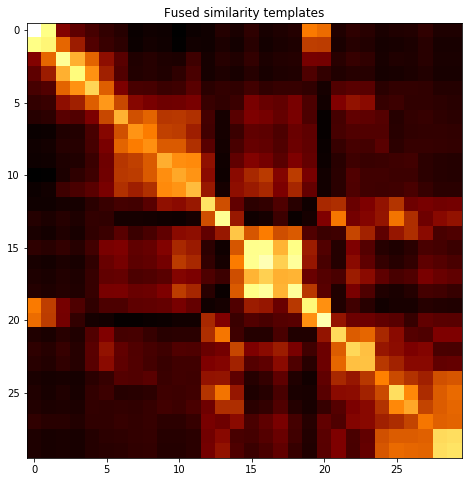

subject 01; gesture 6_0_2


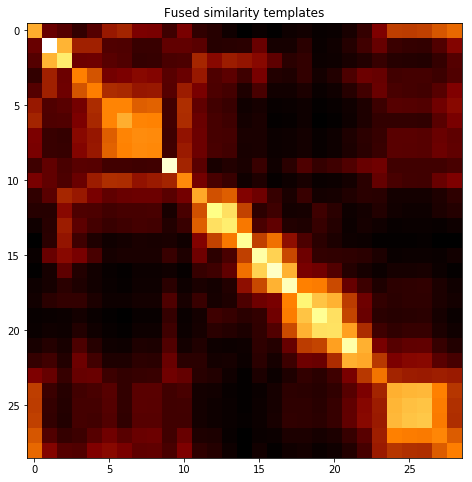

subject 01; gesture 3_1_2


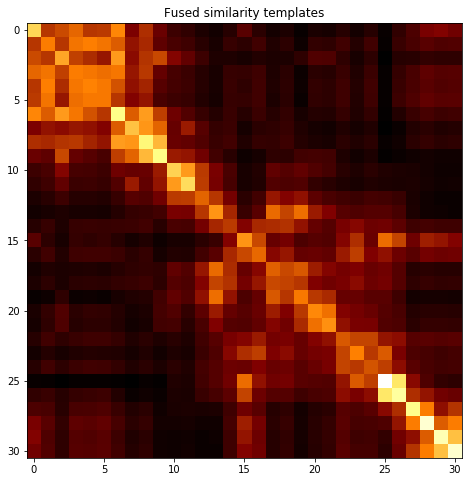

subject 01; gesture 3_1_1


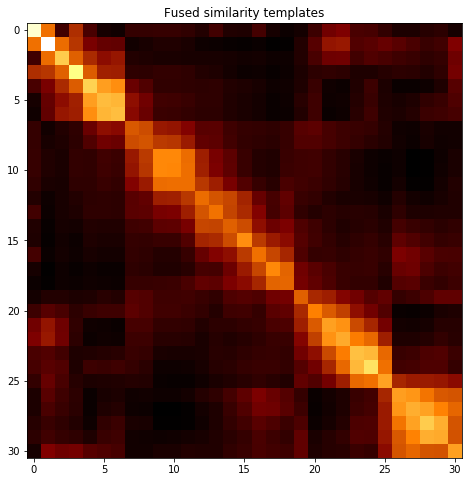

subject 01; gesture 6_0_1


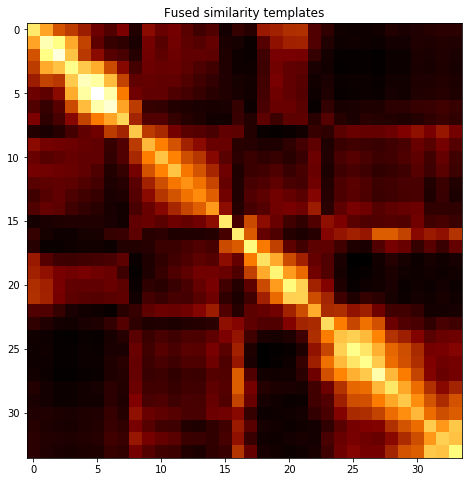

subject 01; gesture 5_0_1


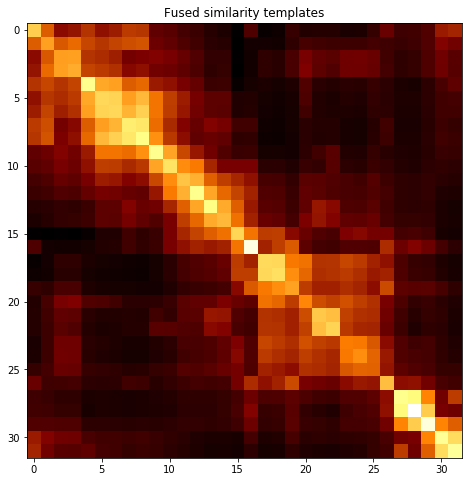

subject 01; gesture 4_0_2


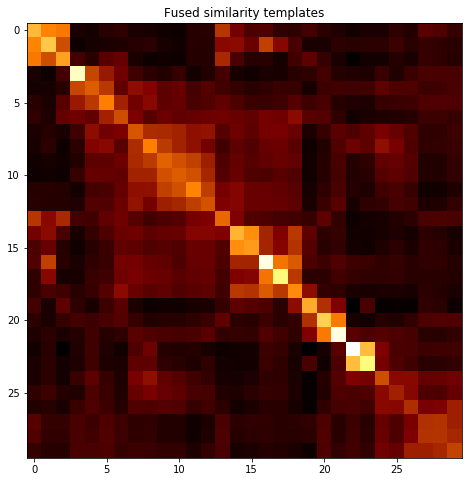

16
subject 16; gesture 5_0_2


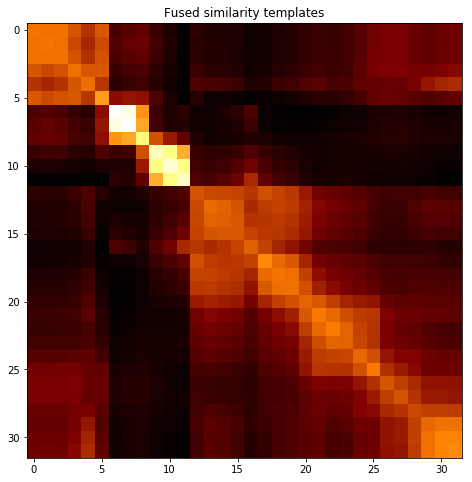

subject 16; gesture 3_0_1


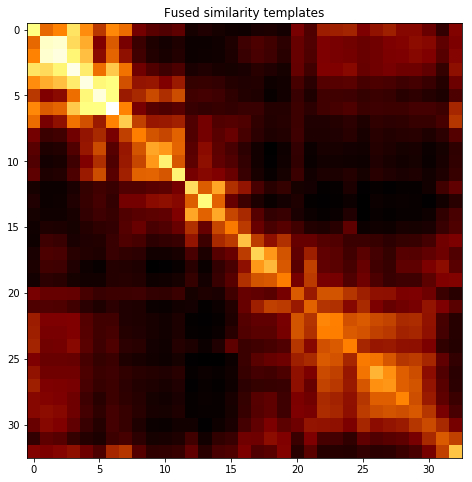

subject 16; gesture 4_1_1


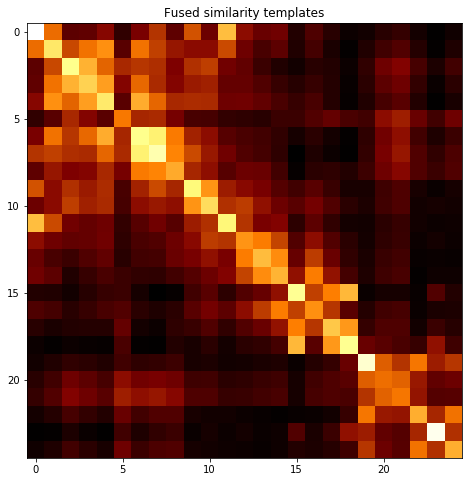

subject 16; gesture 4_1_2


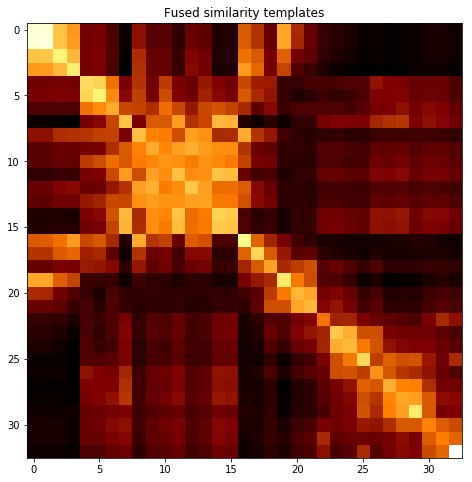

subject 16; gesture 5_1_2


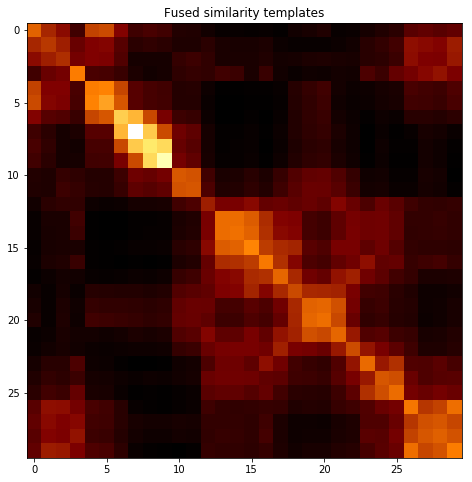

subject 16; gesture 6_1_2


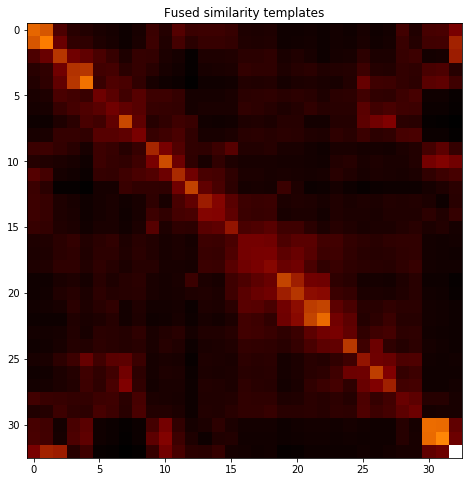

subject 16; gesture 4_0_1


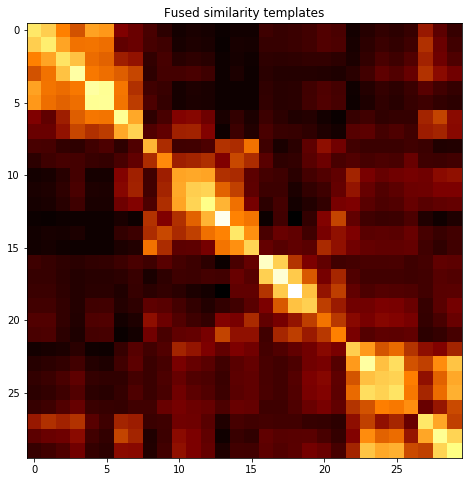

subject 16; gesture 3_0_2


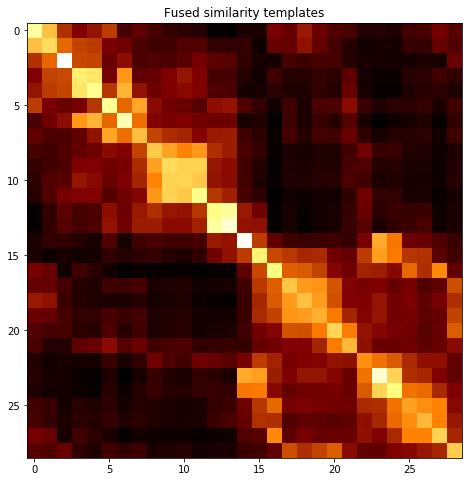

subject 16; gesture 5_1_1


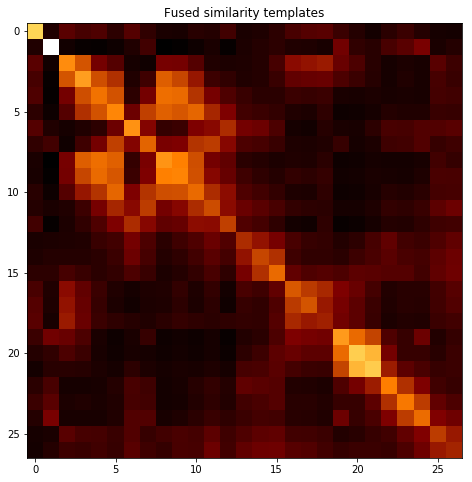

subject 16; gesture 6_1_1


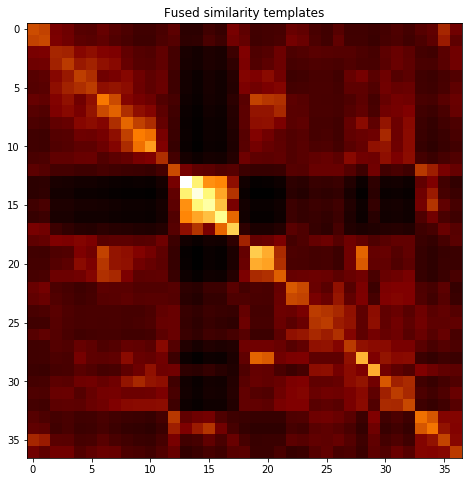

subject 16; gesture 6_0_2


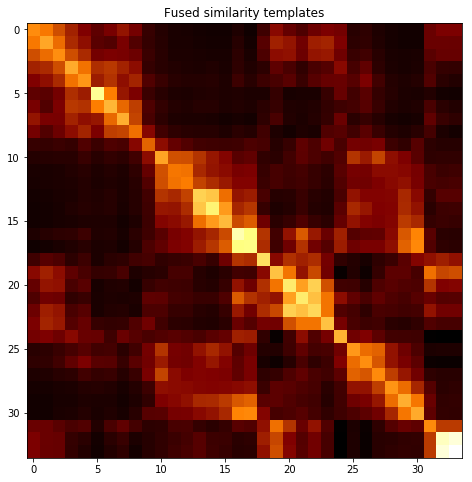

subject 16; gesture 3_1_2


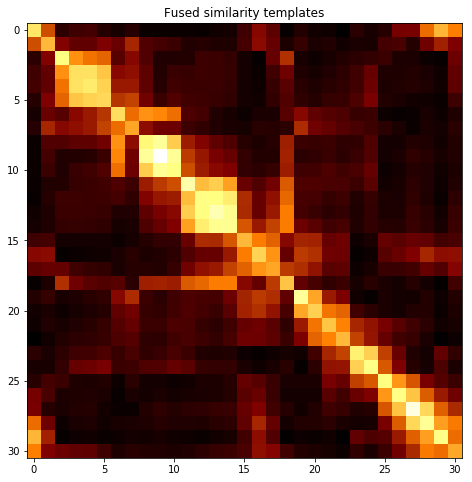

subject 16; gesture 3_1_1


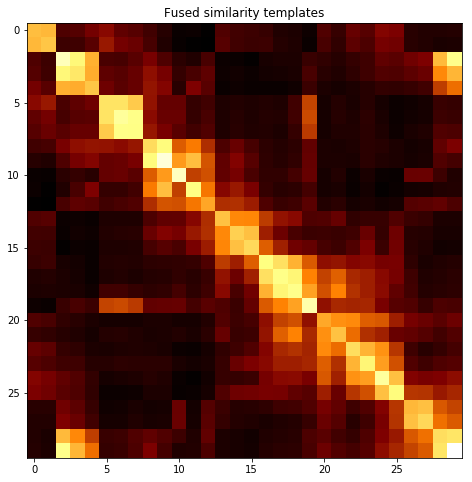

subject 16; gesture 6_0_1


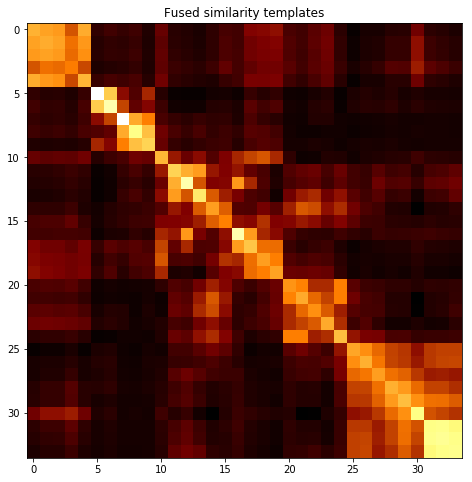

subject 16; gesture 5_0_1


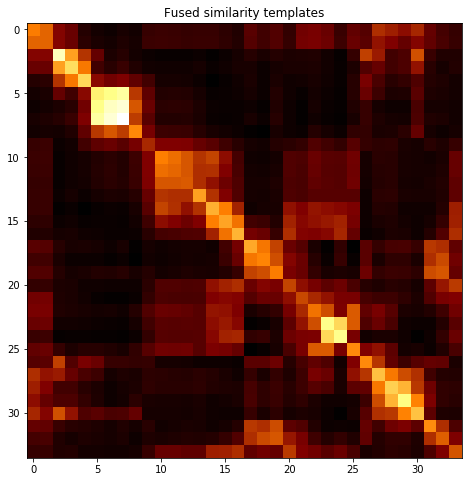

subject 16; gesture 4_0_2


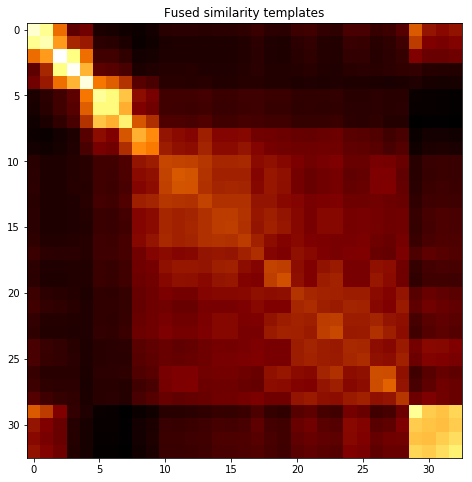

26
subject 26; gesture 5_0_2


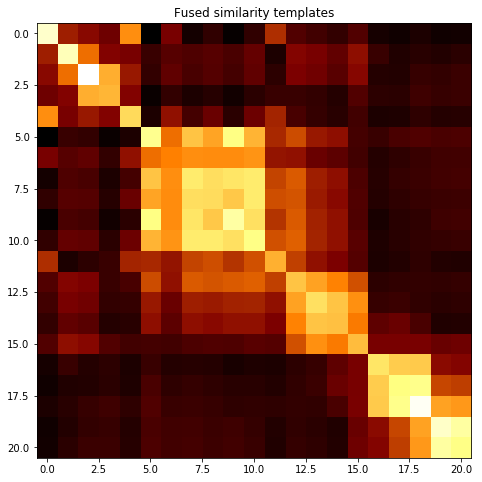

subject 26; gesture 3_0_1


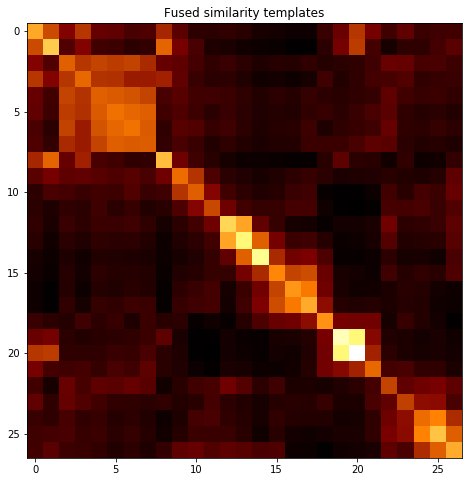

subject 26; gesture 4_1_1


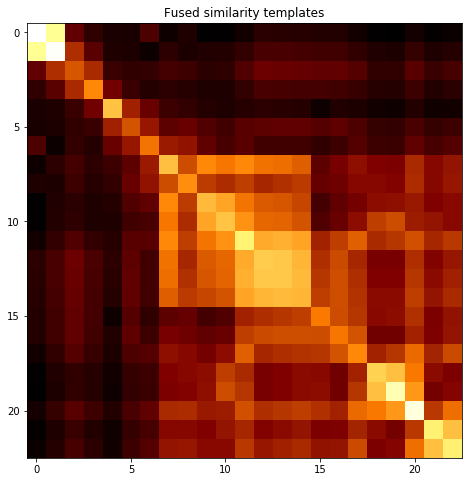

subject 26; gesture 4_1_2


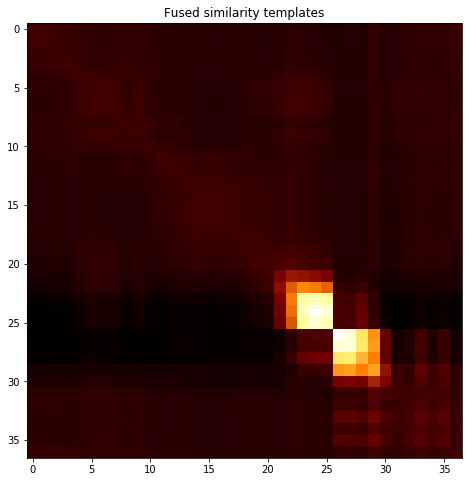

subject 26; gesture 5_1_2


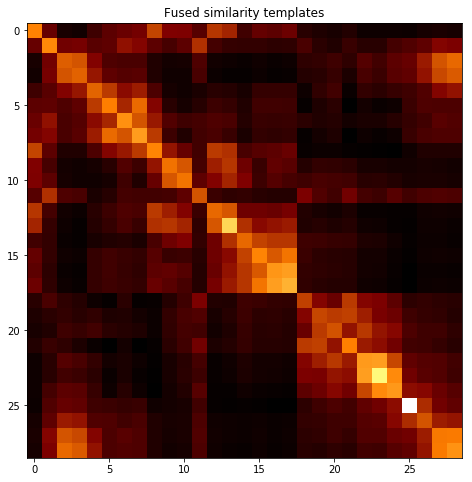

subject 26; gesture 6_1_2


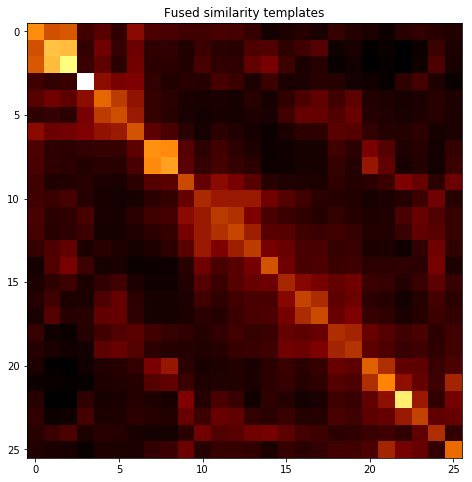

subject 26; gesture 4_0_1


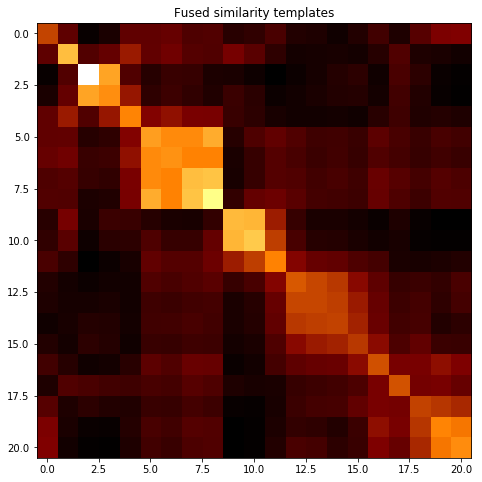

subject 26; gesture 3_0_2


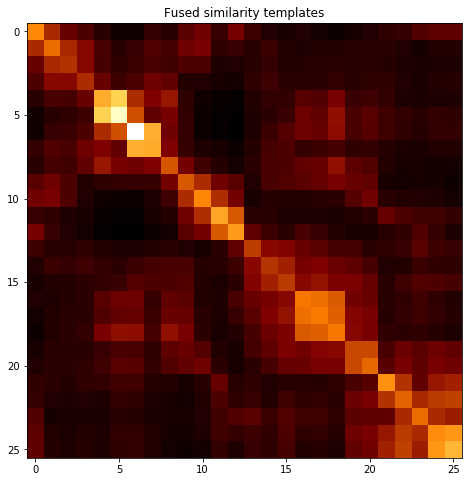

subject 26; gesture 5_1_1


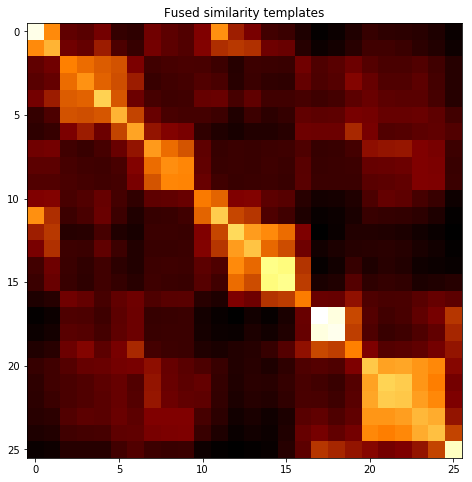

subject 26; gesture 6_1_1


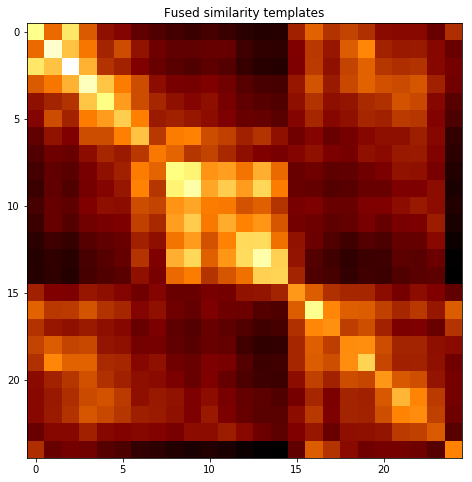

subject 26; gesture 6_0_2


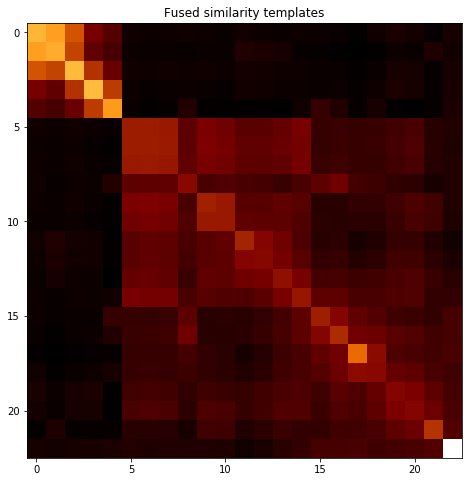

subject 26; gesture 3_1_2


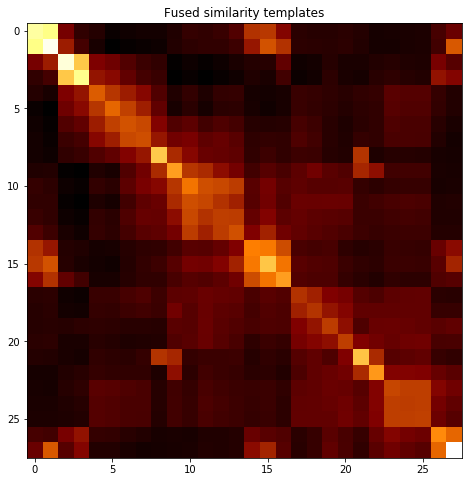

subject 26; gesture 3_1_1


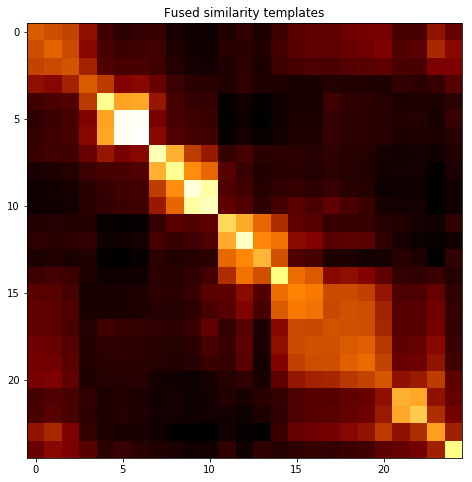

subject 26; gesture 6_0_1


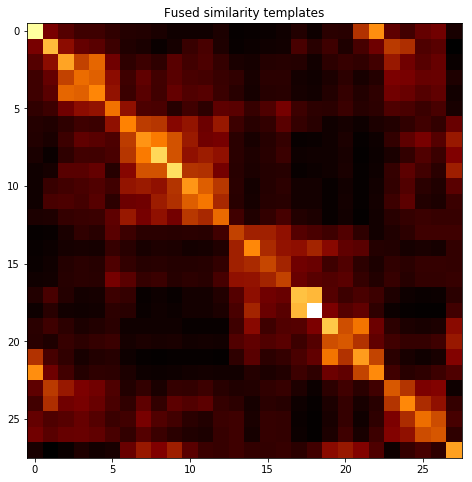

subject 26; gesture 5_0_1


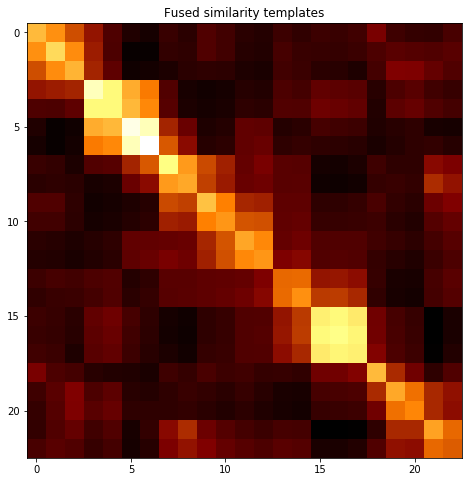

subject 26; gesture 4_0_2


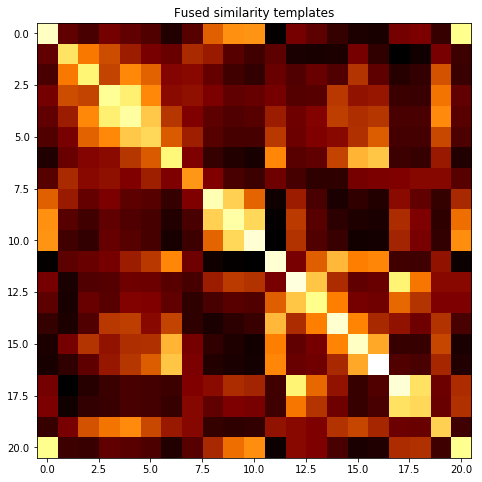

32
subject 32; gesture 5_0_2


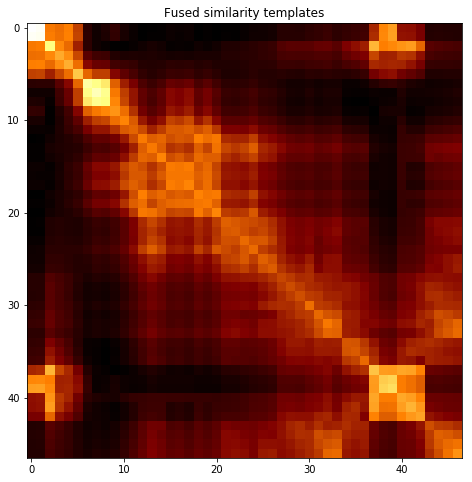

subject 32; gesture 3_0_1


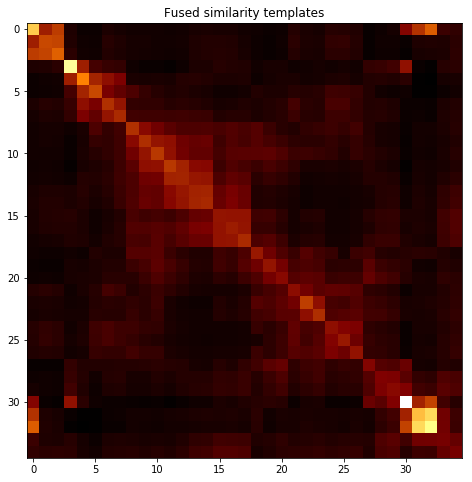

subject 32; gesture 4_1_1


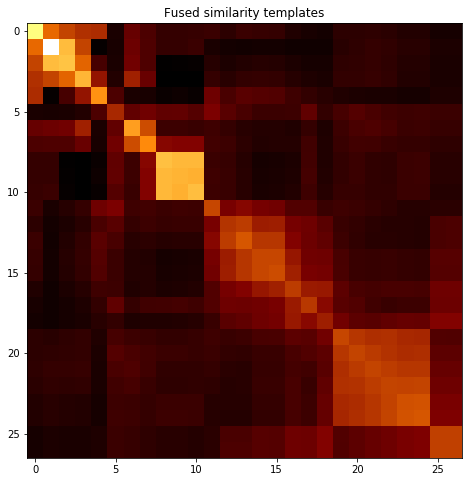

subject 32; gesture 4_1_2


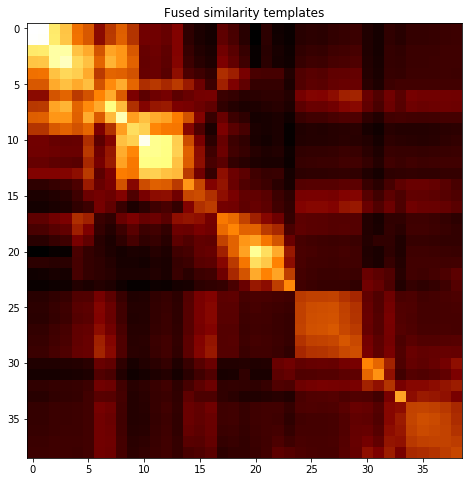

subject 32; gesture 5_1_2


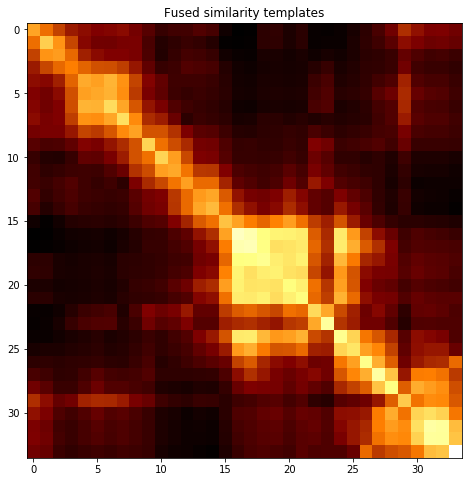

subject 32; gesture 6_1_2


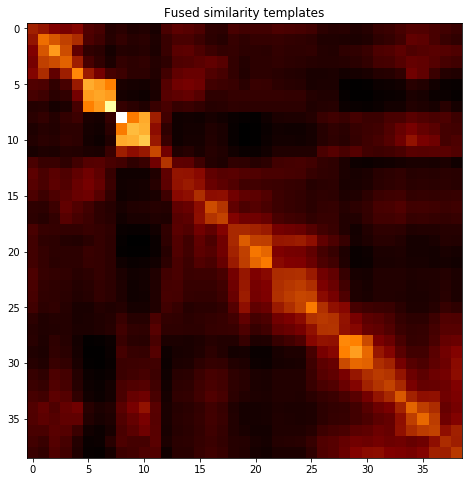

subject 32; gesture 4_0_1


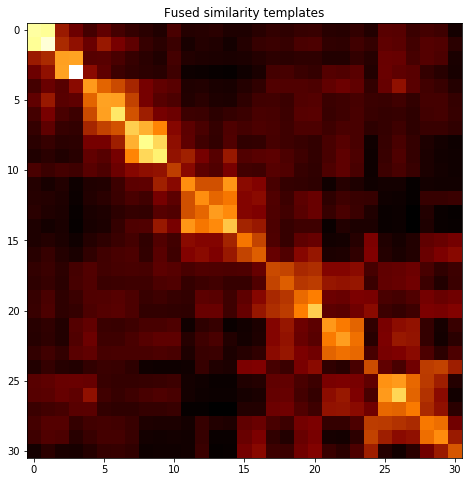

subject 32; gesture 3_0_2


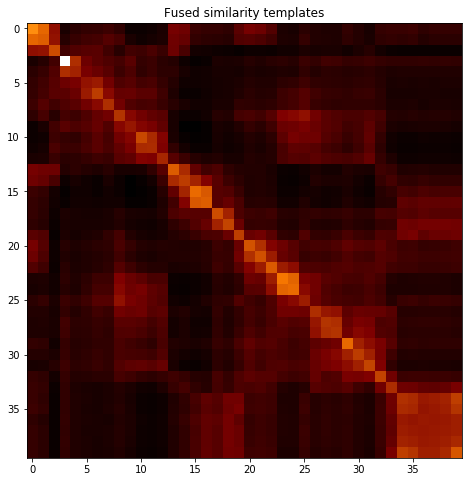

subject 32; gesture 5_1_1


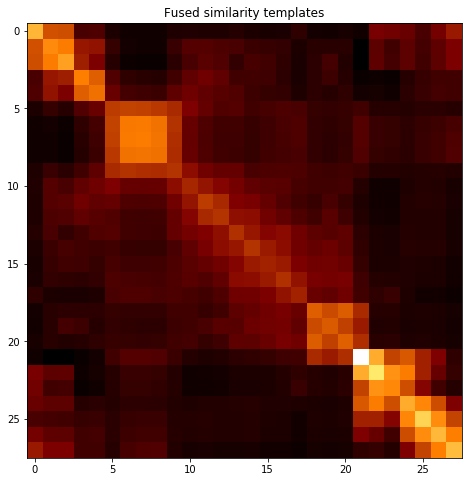

subject 32; gesture 6_1_1


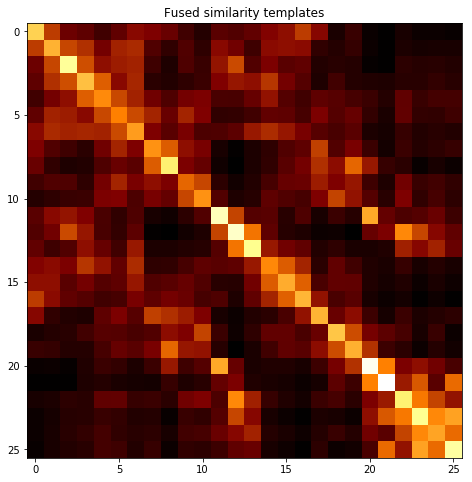

subject 32; gesture 6_0_2


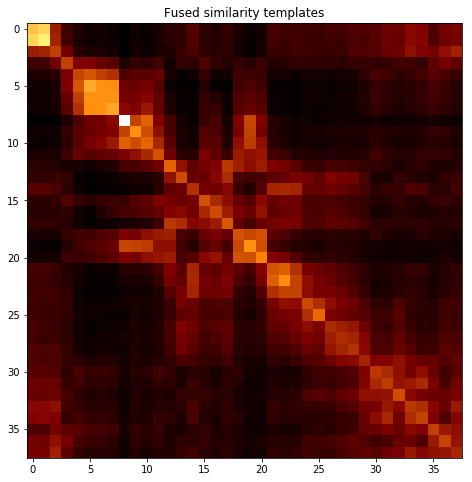

subject 32; gesture 3_1_2


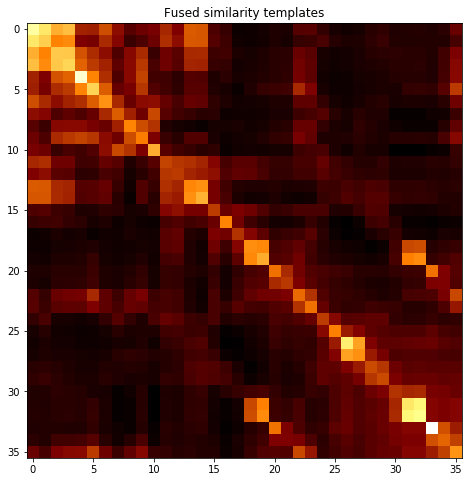

subject 32; gesture 3_1_1


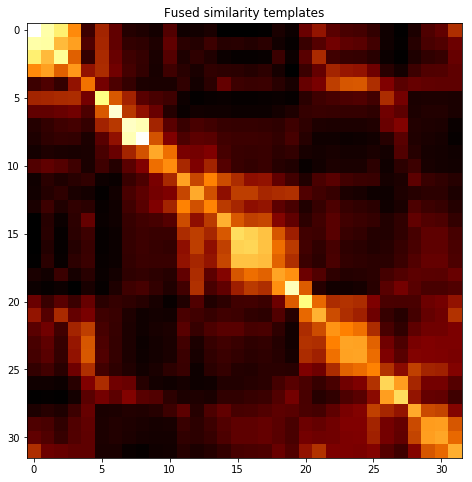

subject 32; gesture 6_0_1


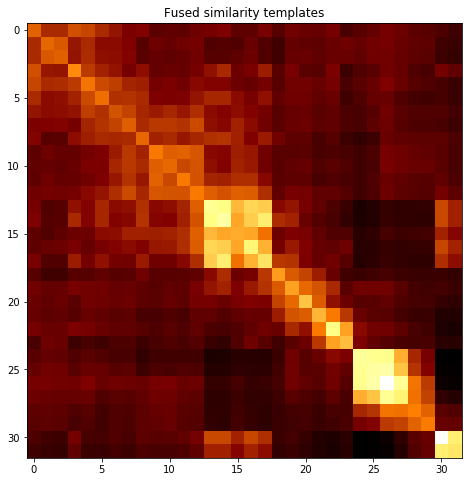

subject 32; gesture 5_0_1


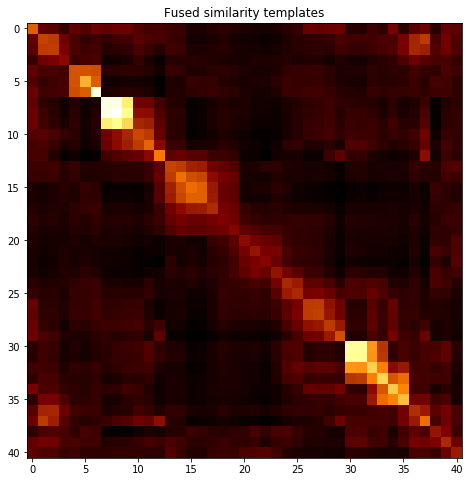

subject 32; gesture 4_0_2


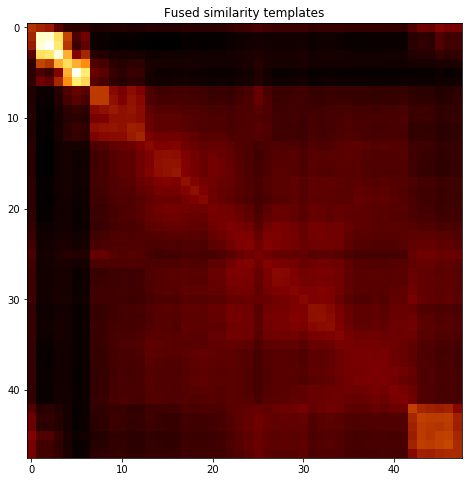

04
subject 04; gesture 5_0_2


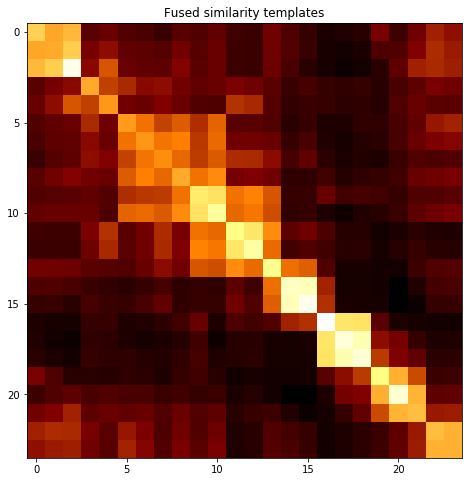

subject 04; gesture 3_0_1


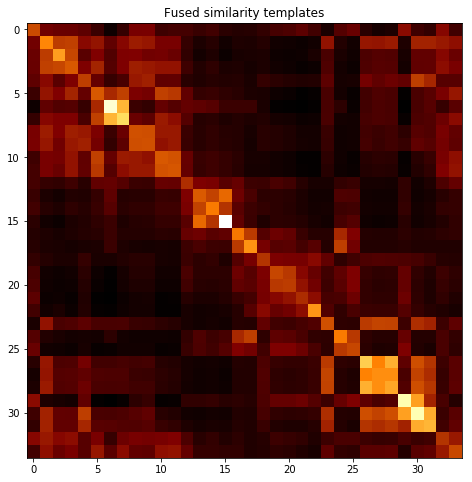

subject 04; gesture 4_1_1


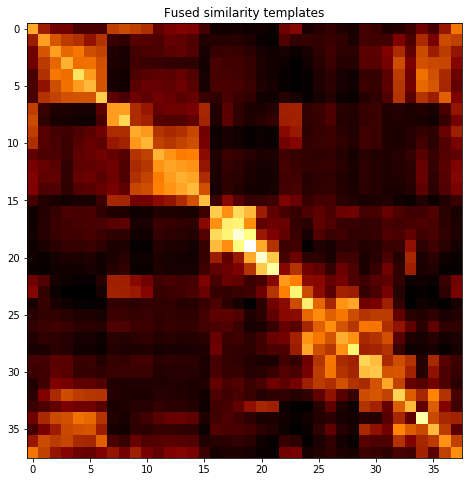

subject 04; gesture 4_1_2


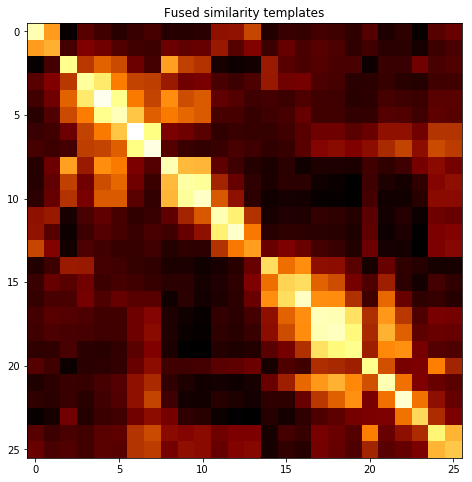

subject 04; gesture 5_1_2


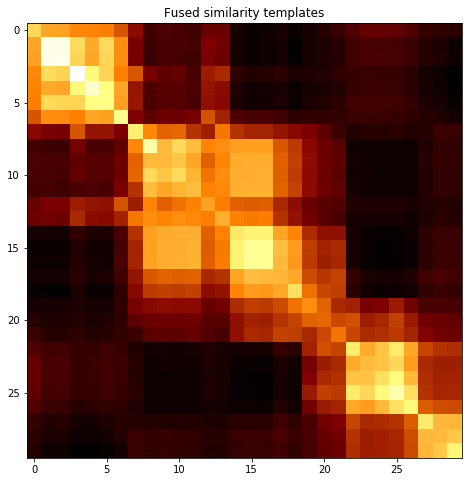

subject 04; gesture 6_1_2


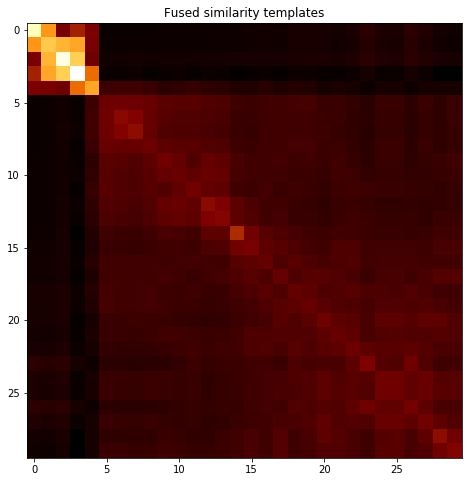

subject 04; gesture 4_0_1


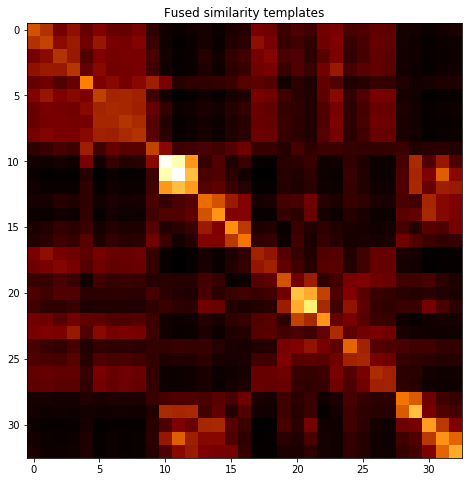

subject 04; gesture 3_0_2


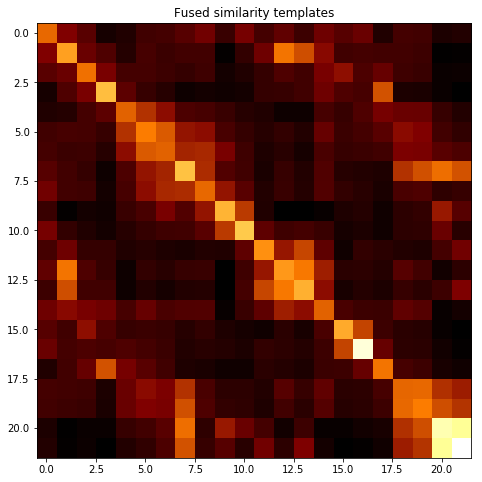

subject 04; gesture 5_1_1


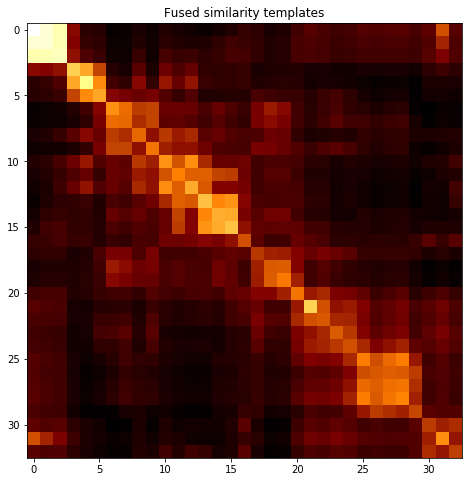

subject 04; gesture 6_1_1


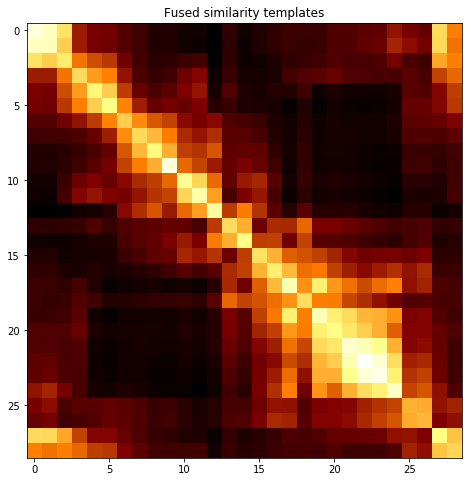

subject 04; gesture 6_0_2


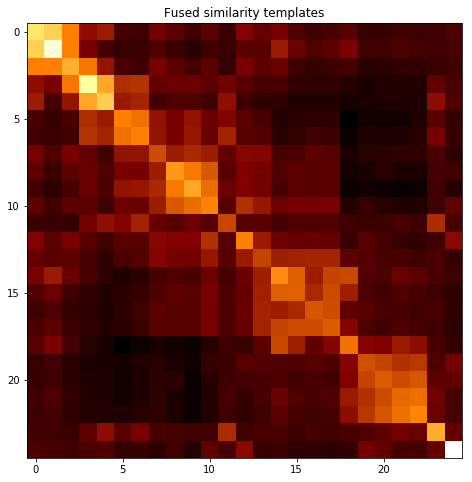

subject 04; gesture 3_1_2


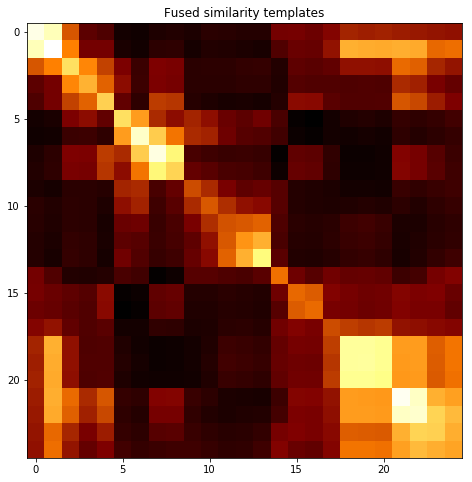

subject 04; gesture 3_1_1


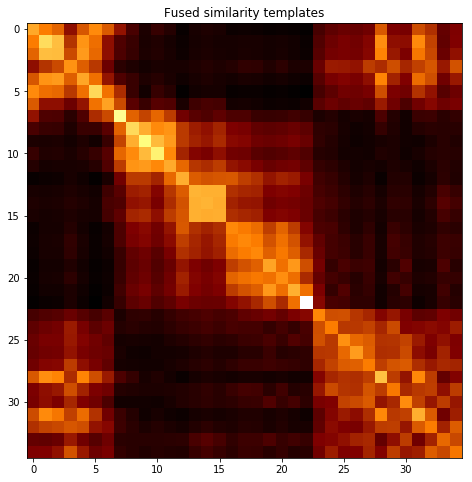

subject 04; gesture 6_0_1


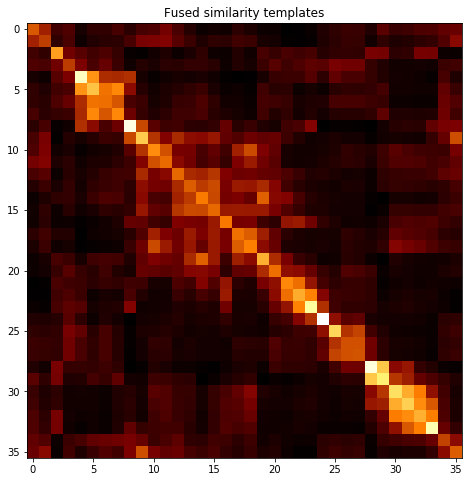

subject 04; gesture 5_0_1


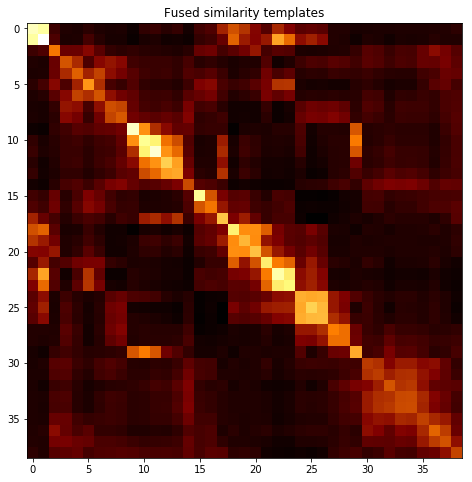

subject 04; gesture 4_0_2


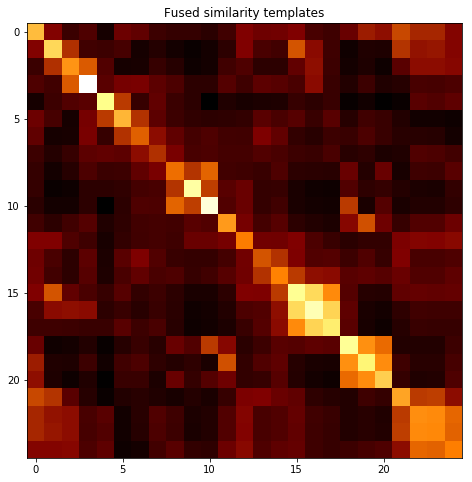

08
subject 08; gesture 5_0_2


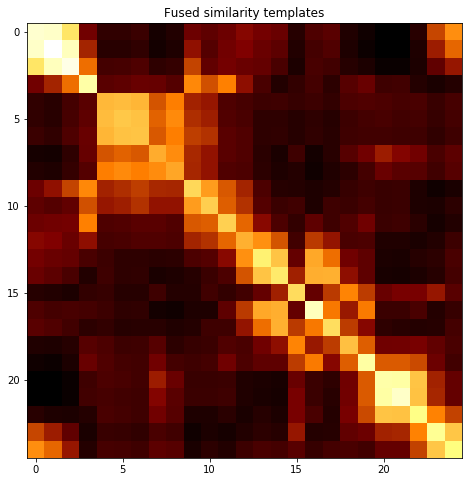

subject 08; gesture 3_0_1


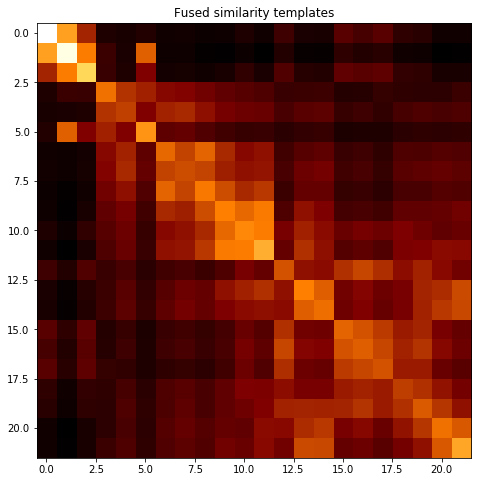

subject 08; gesture 4_1_1


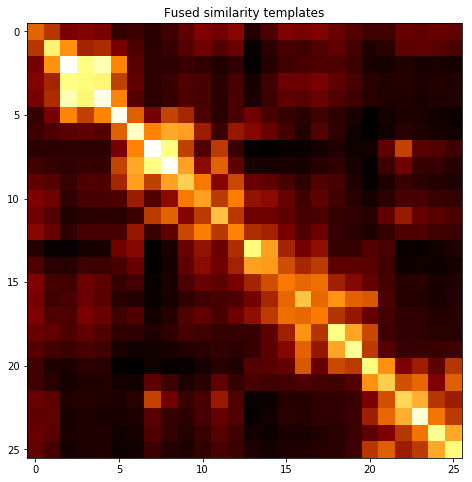

subject 08; gesture 4_1_2


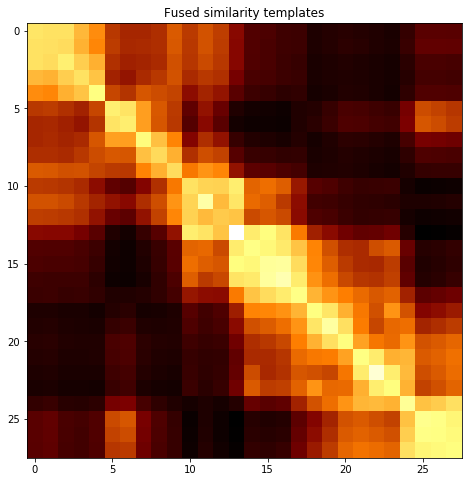

subject 08; gesture 5_1_2


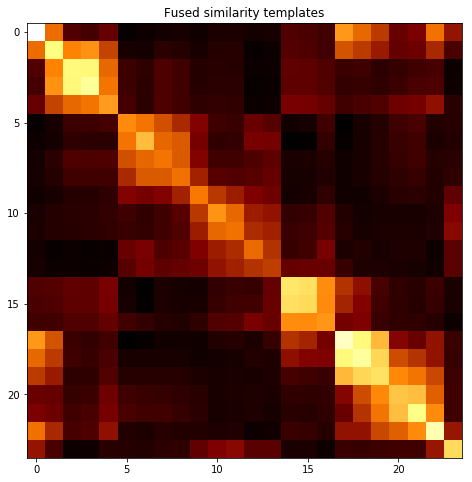

subject 08; gesture 6_1_2


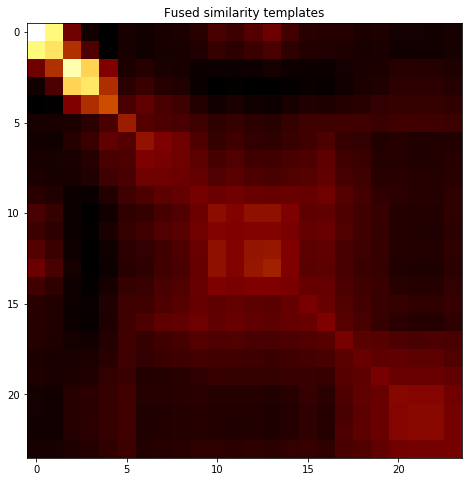

subject 08; gesture 4_0_1


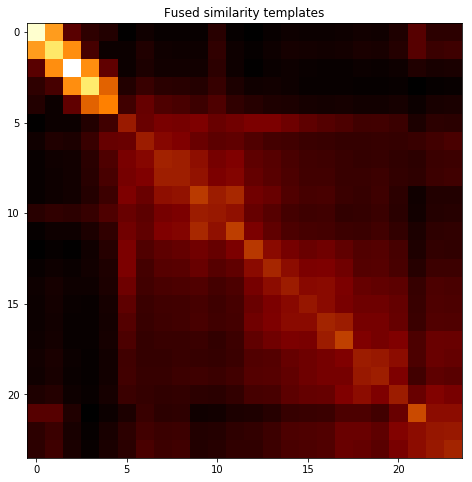

subject 08; gesture 3_0_2


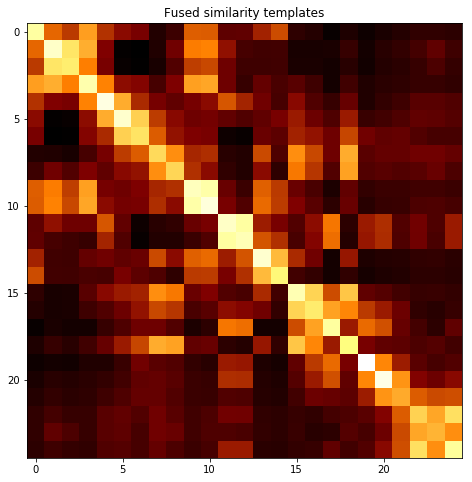

subject 08; gesture 5_1_1


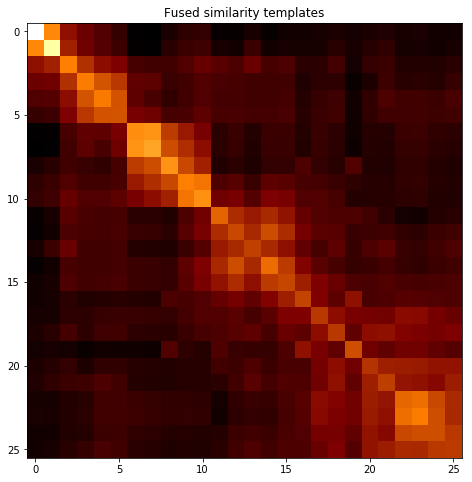

subject 08; gesture 6_1_1


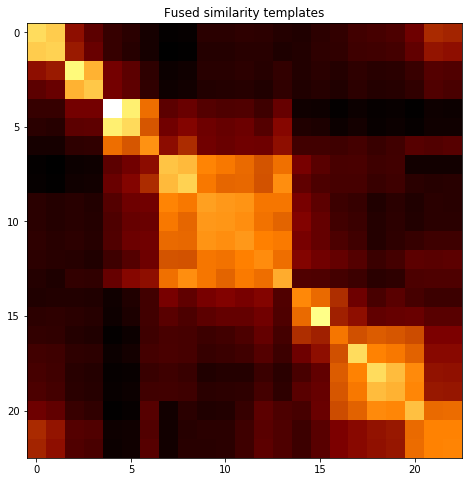

subject 08; gesture 6_0_2


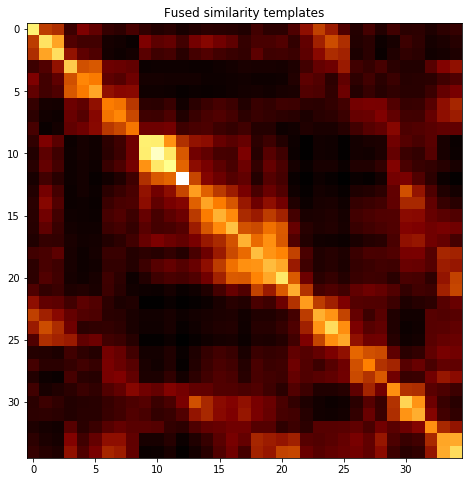

subject 08; gesture 3_1_2


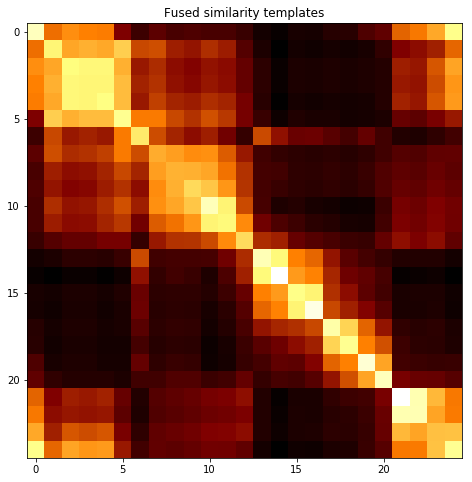

subject 08; gesture 3_1_1


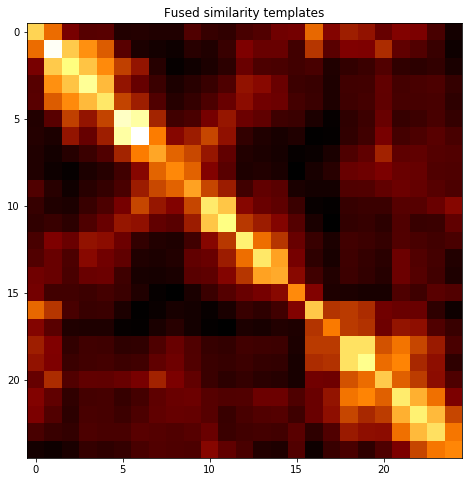

subject 08; gesture 6_0_1


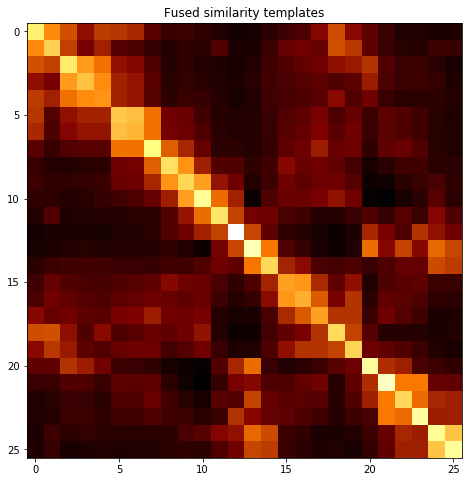

subject 08; gesture 5_0_1


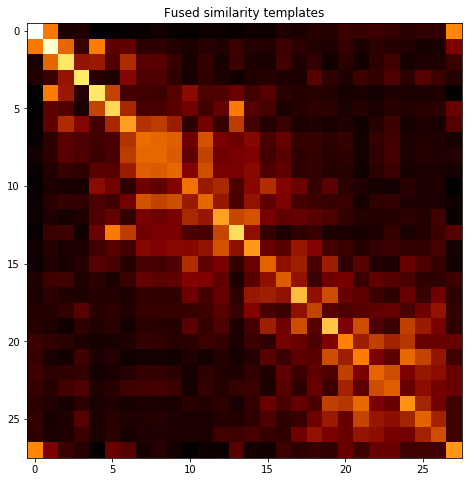

subject 08; gesture 4_0_2


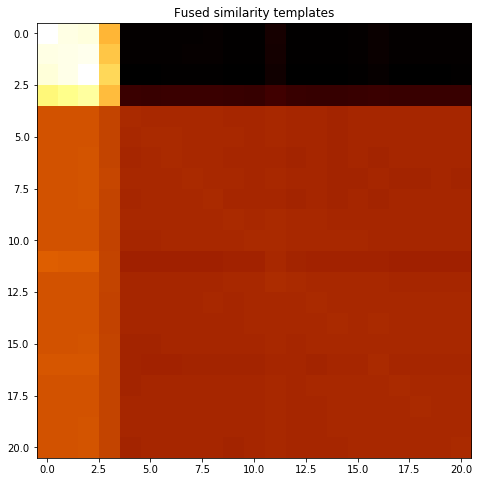

27
subject 27; gesture 5_0_2


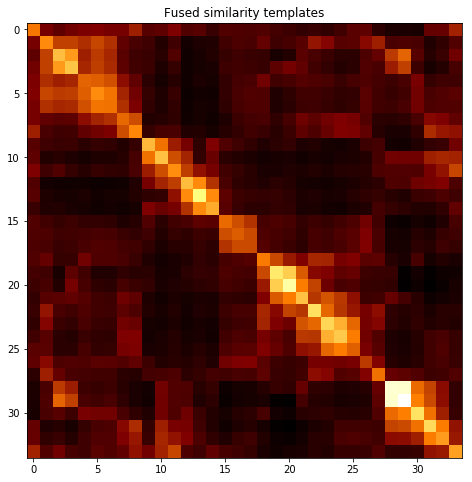

subject 27; gesture 3_0_1


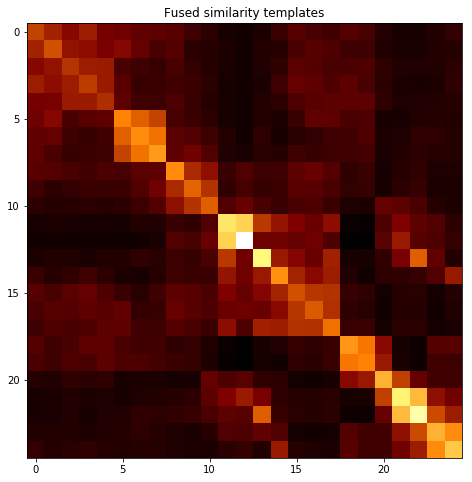

subject 27; gesture 4_1_1


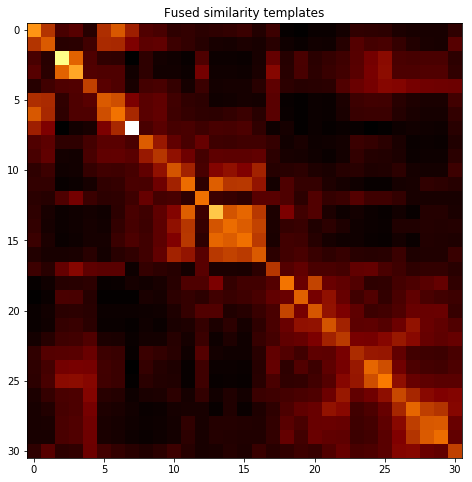

subject 27; gesture 4_1_2


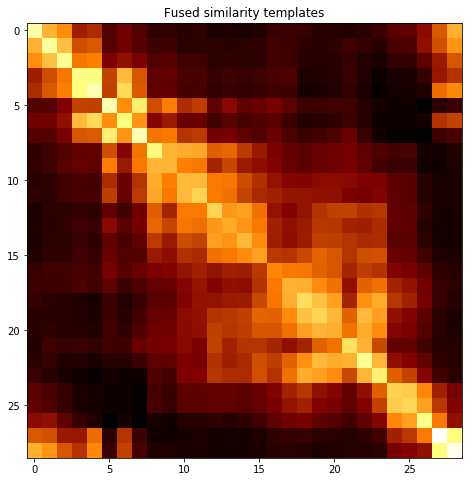

subject 27; gesture 5_1_2


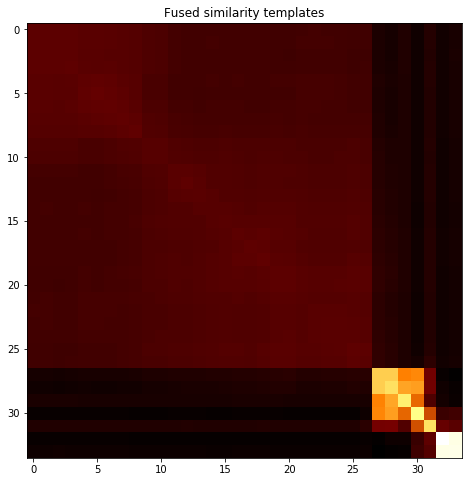

subject 27; gesture 6_1_2


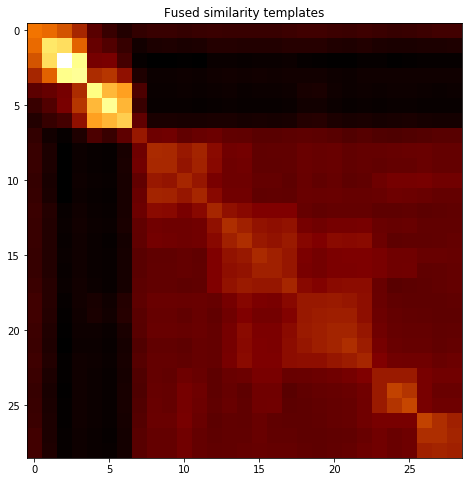

subject 27; gesture 4_0_1


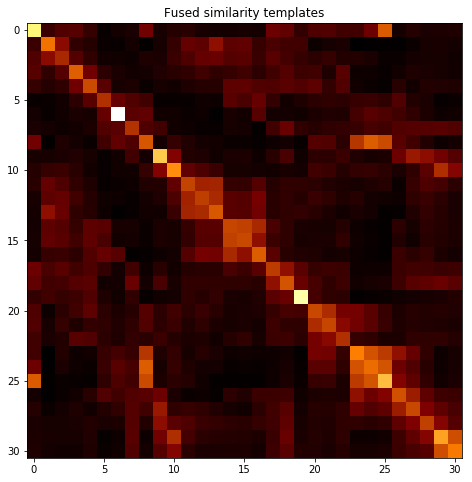

subject 27; gesture 3_0_2


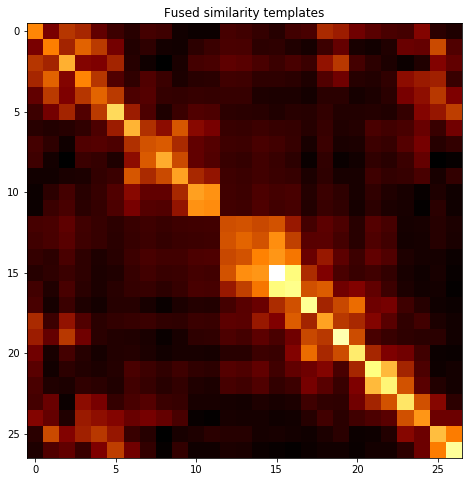

subject 27; gesture 5_1_1


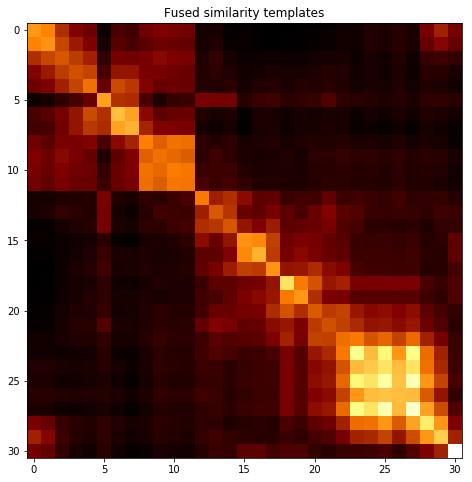

subject 27; gesture 6_1_1


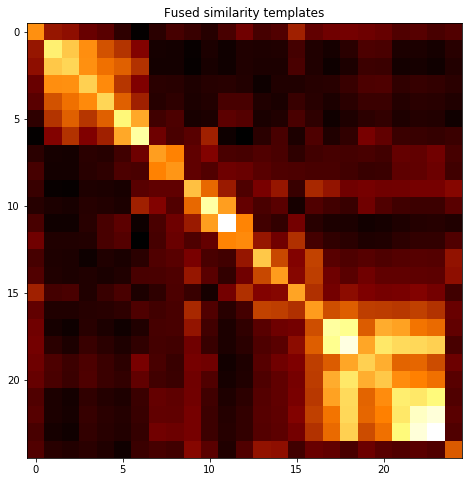

subject 27; gesture 6_0_2


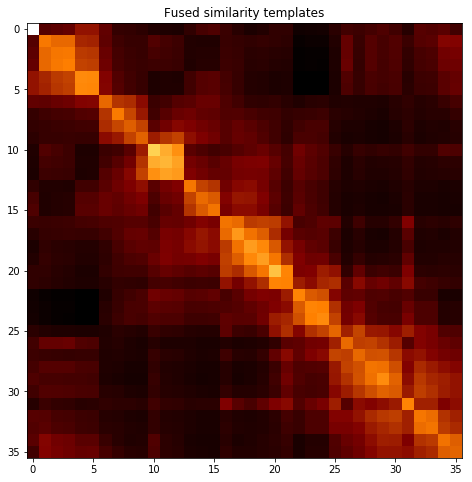

subject 27; gesture 3_1_2


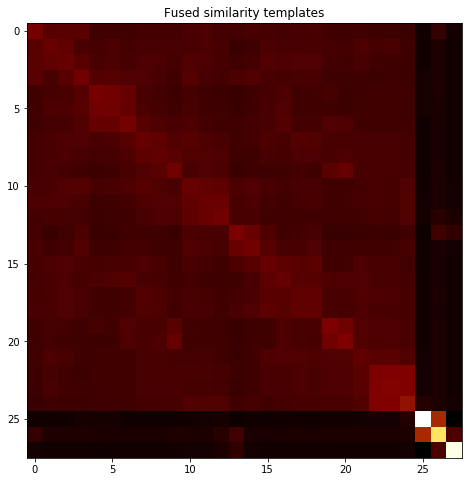

subject 27; gesture 3_1_1


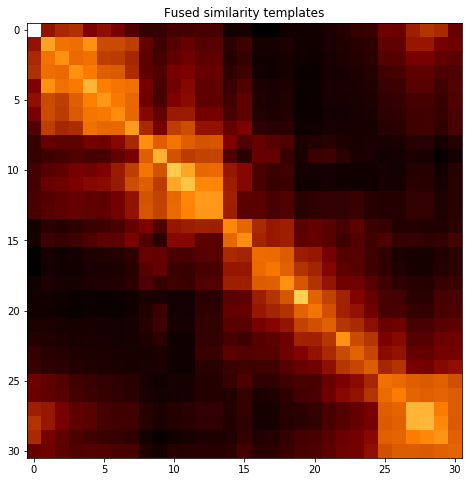

subject 27; gesture 6_0_1


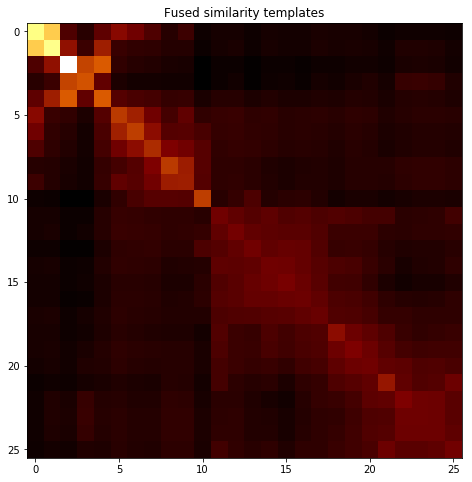

subject 27; gesture 5_0_1


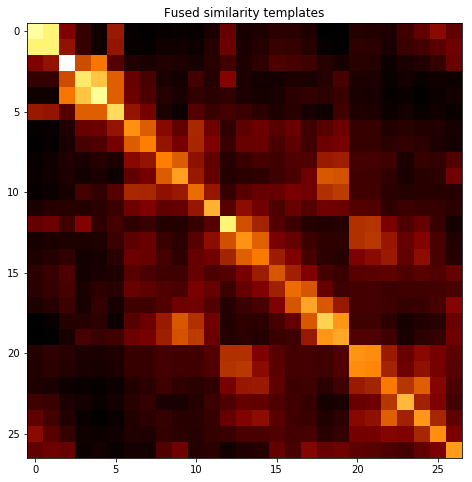

subject 27; gesture 4_0_2


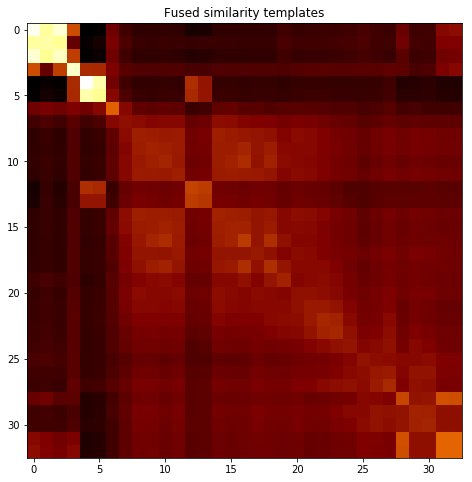

14
subject 14; gesture 5_0_2


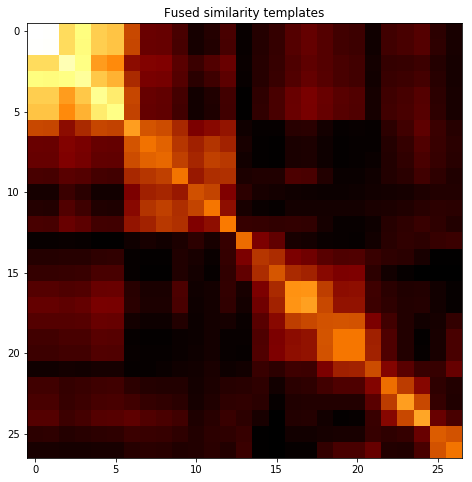

subject 14; gesture 3_0_1


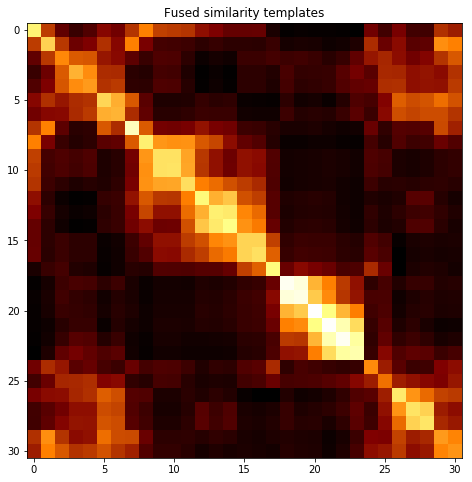

subject 14; gesture 4_1_1


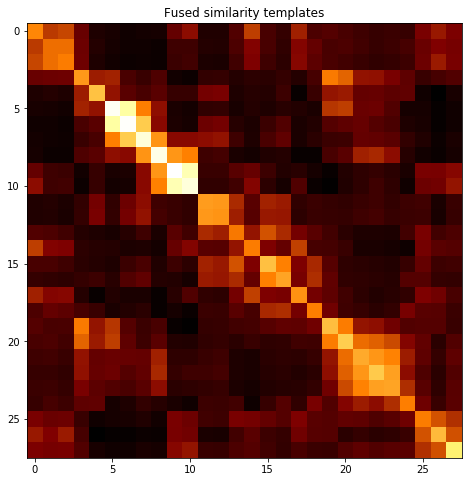

subject 14; gesture 4_1_2


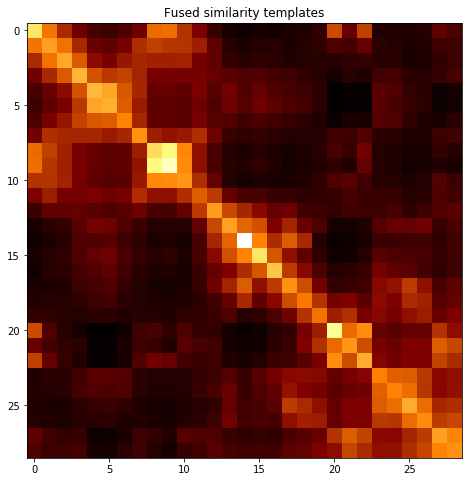

subject 14; gesture 5_1_2


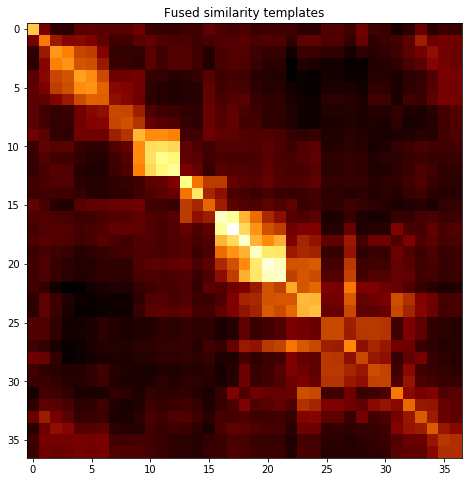

subject 14; gesture 6_1_2


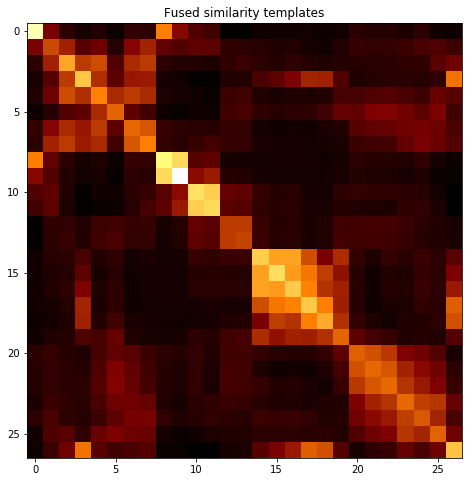

subject 14; gesture 4_0_1


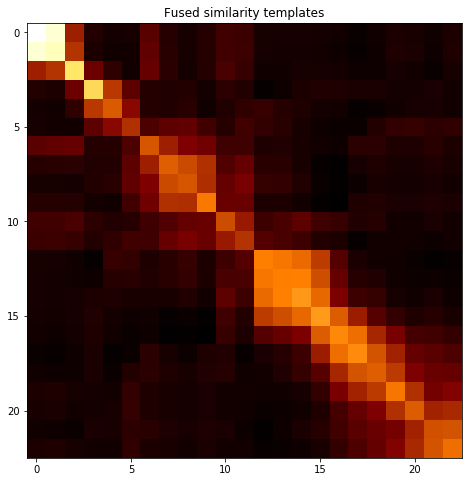

subject 14; gesture 3_0_2


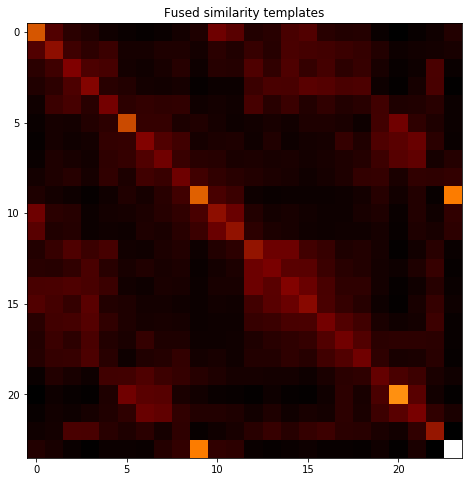

subject 14; gesture 5_1_1


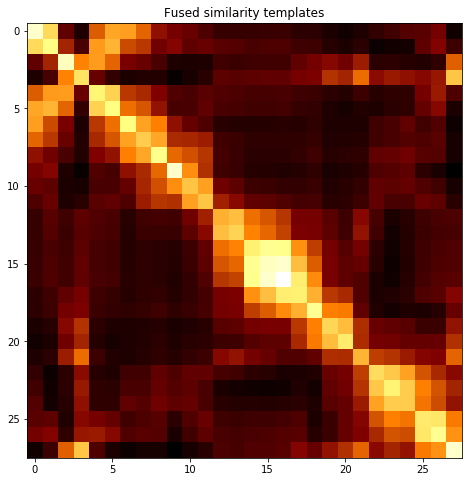

subject 14; gesture 6_1_1


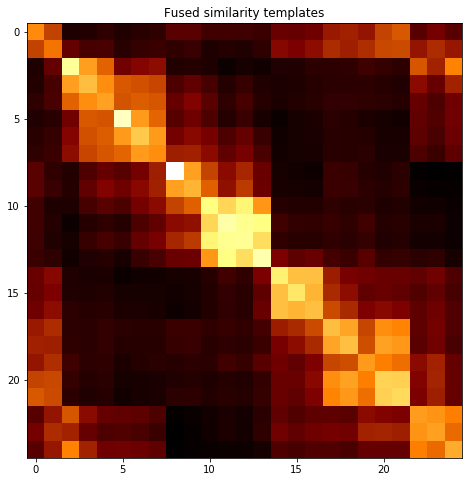

subject 14; gesture 6_0_2


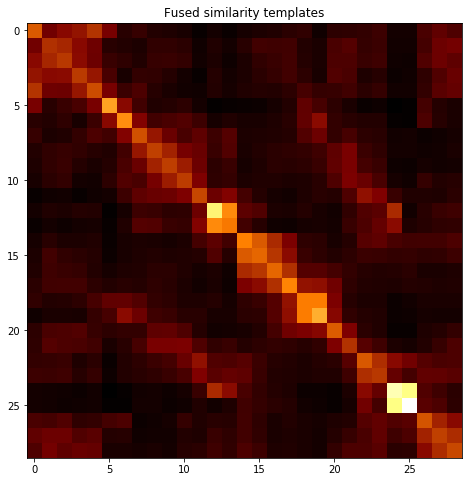

subject 14; gesture 3_1_2


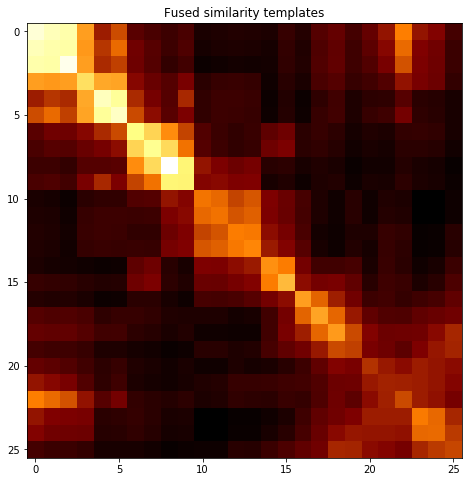

subject 14; gesture 3_1_1


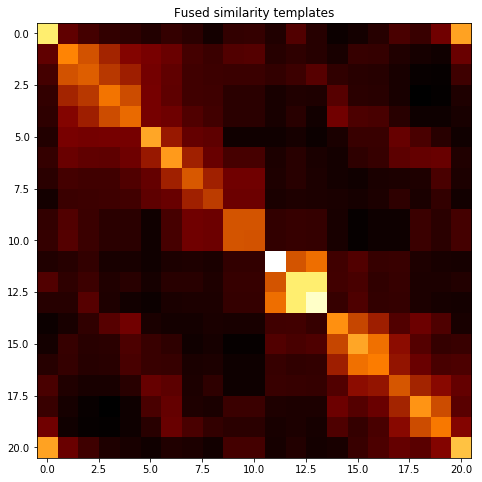

subject 14; gesture 6_0_1


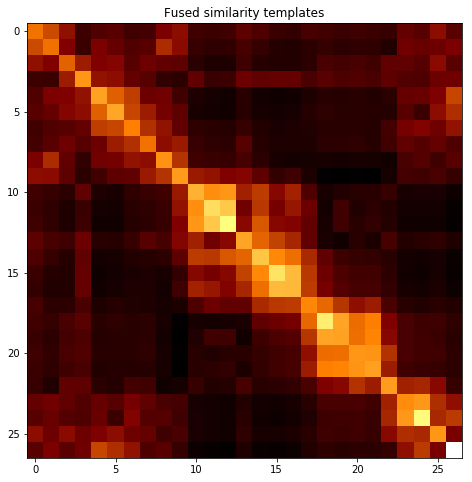

subject 14; gesture 5_0_1


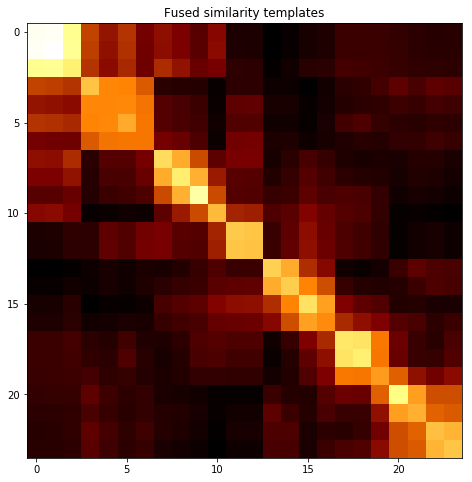

subject 14; gesture 4_0_2


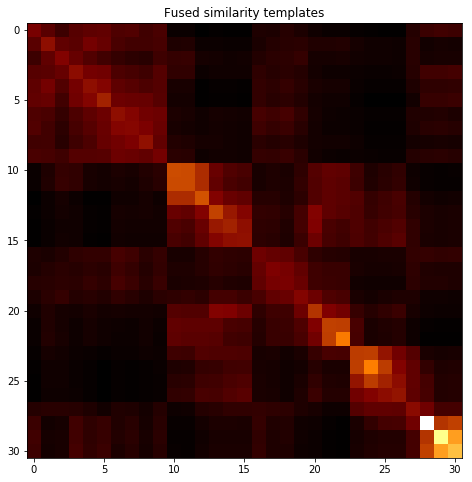

23
subject 23; gesture 5_0_2


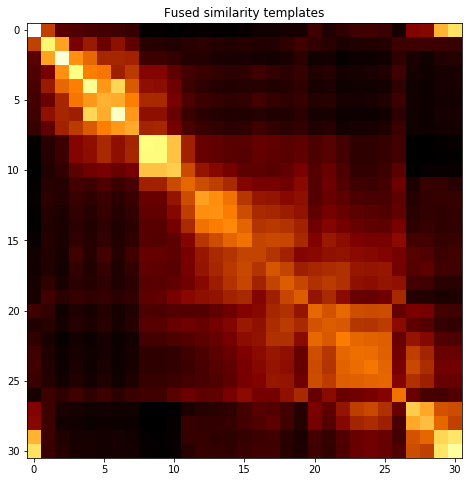

subject 23; gesture 3_0_1


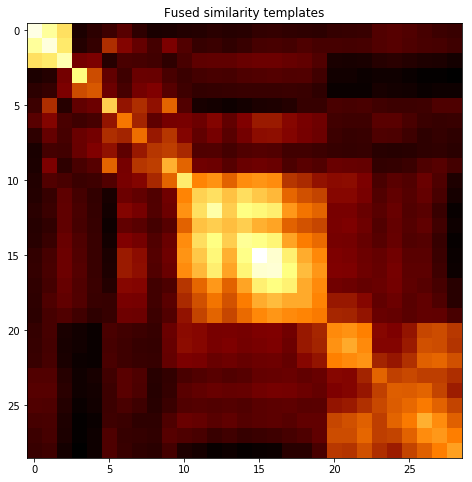

subject 23; gesture 4_1_1


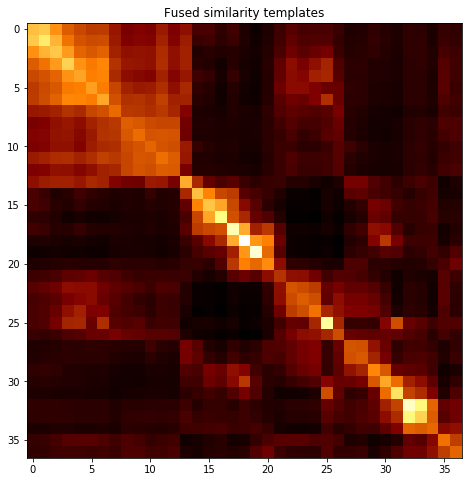

subject 23; gesture 4_1_2


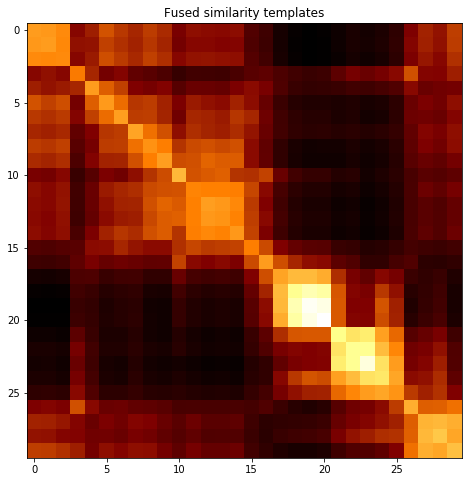

subject 23; gesture 5_1_2


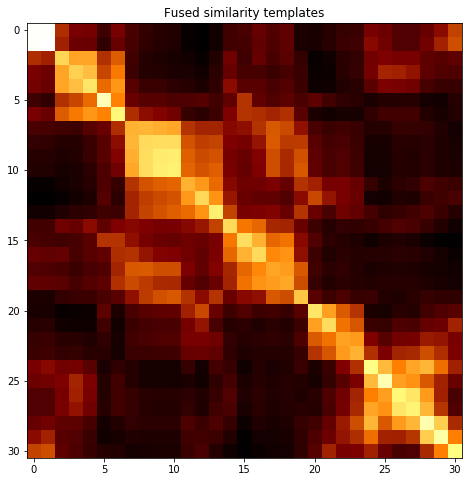

subject 23; gesture 6_1_2


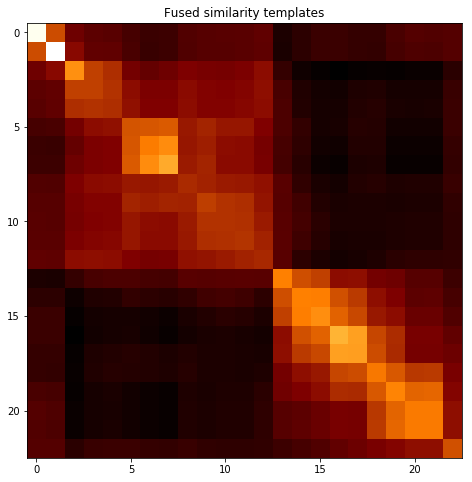

subject 23; gesture 4_0_1


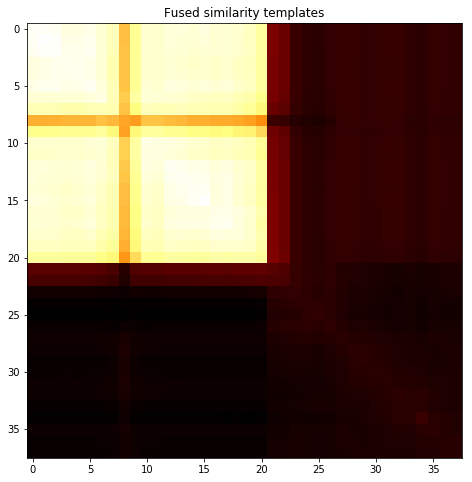

subject 23; gesture 3_0_2


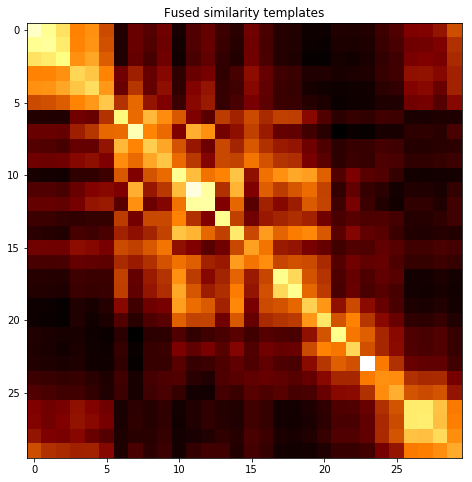

subject 23; gesture 5_1_1


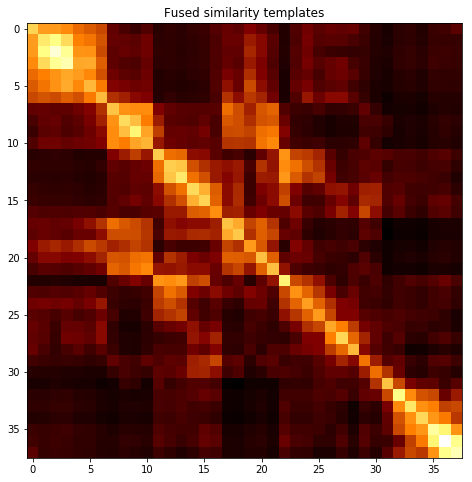

subject 23; gesture 6_1_1


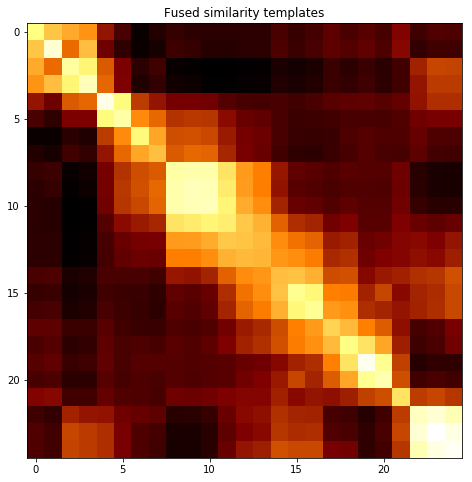

subject 23; gesture 6_0_2


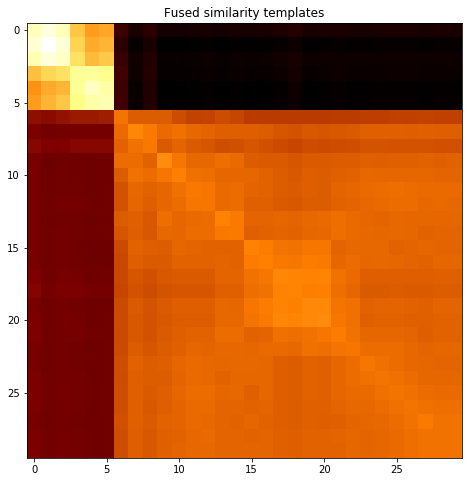

subject 23; gesture 3_1_2


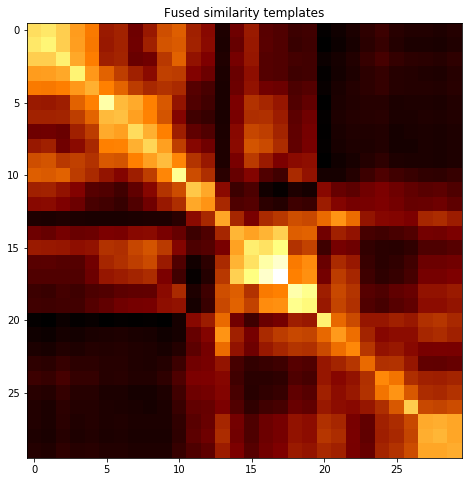

subject 23; gesture 3_1_1


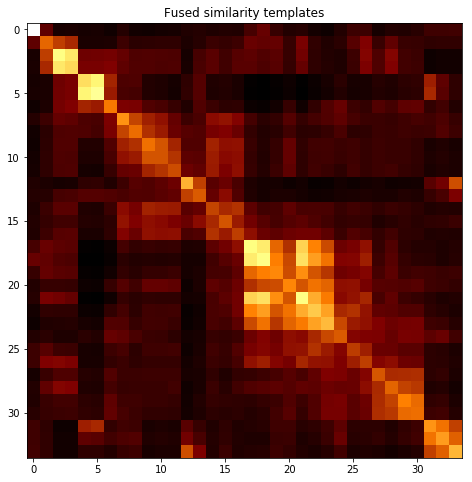

subject 23; gesture 6_0_1


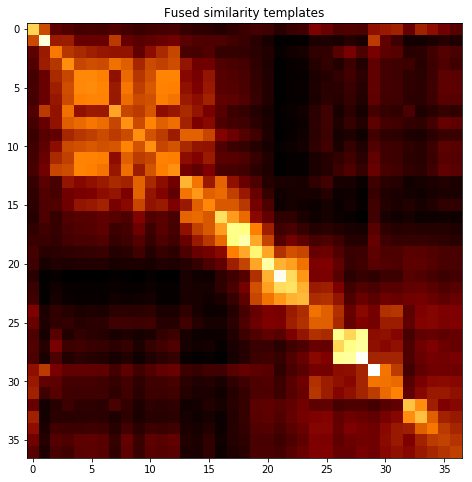

subject 23; gesture 5_0_1


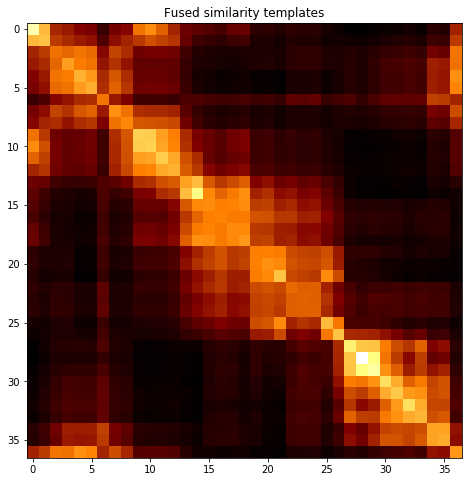

subject 23; gesture 4_0_2


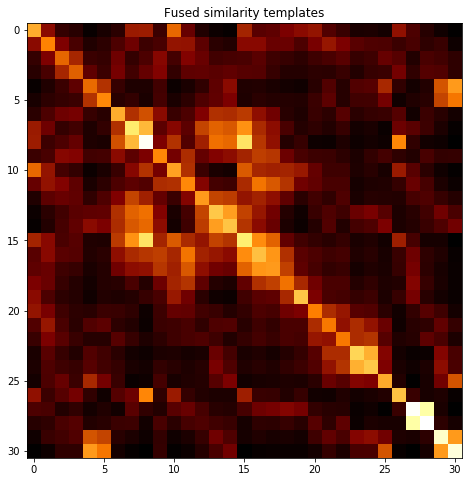

25
subject 25; gesture 5_0_2


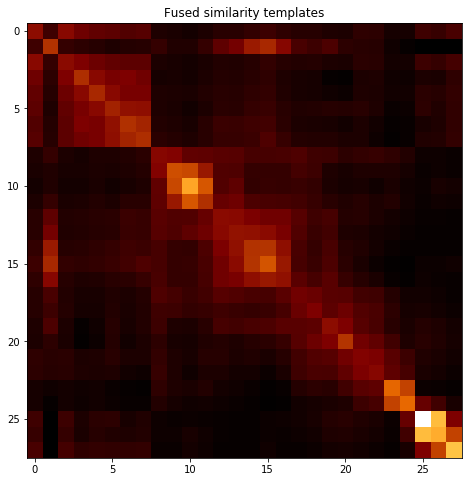

subject 25; gesture 3_0_1


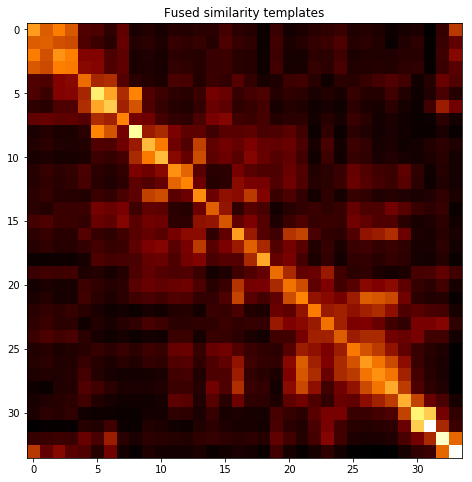

subject 25; gesture 4_1_1


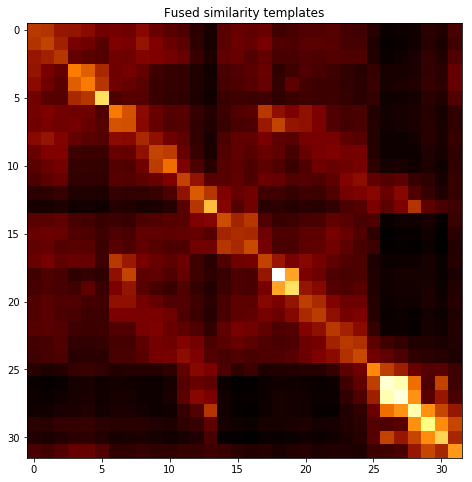

subject 25; gesture 4_1_2


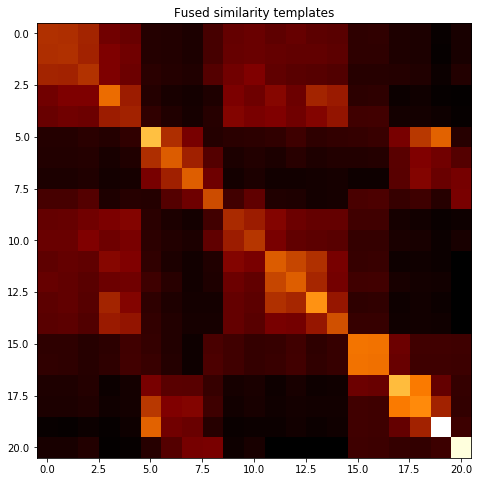

subject 25; gesture 5_1_2


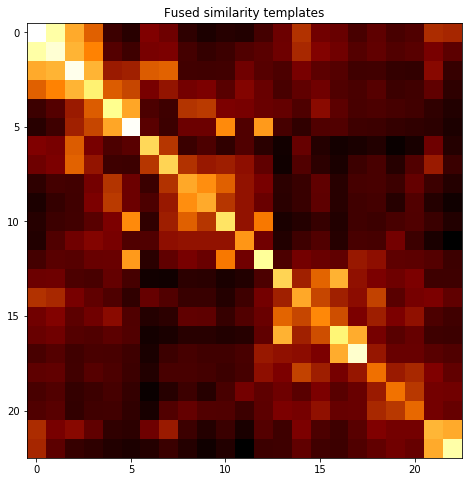

subject 25; gesture 6_1_2


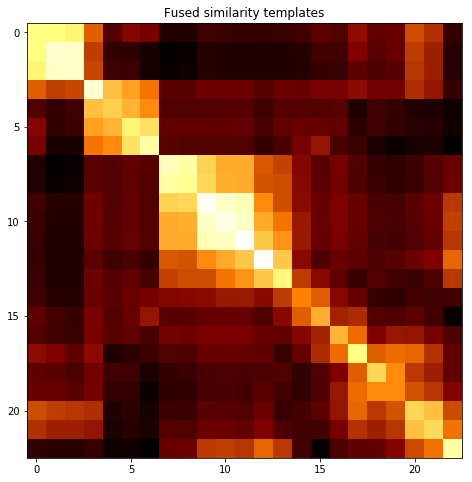

subject 25; gesture 4_0_1


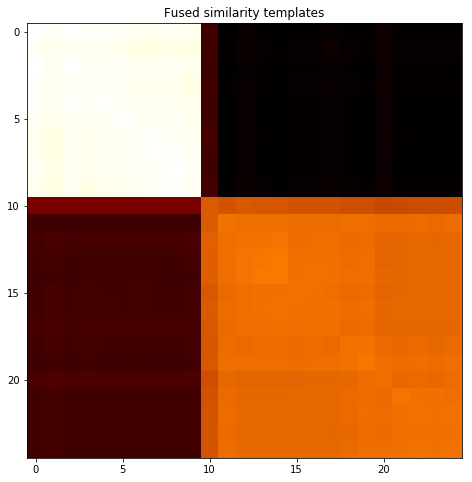

subject 25; gesture 3_0_2


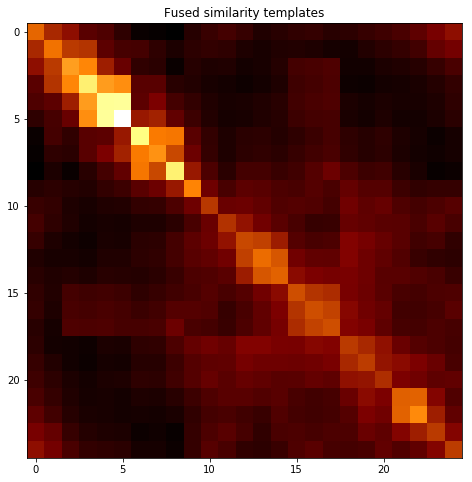

subject 25; gesture 5_1_1


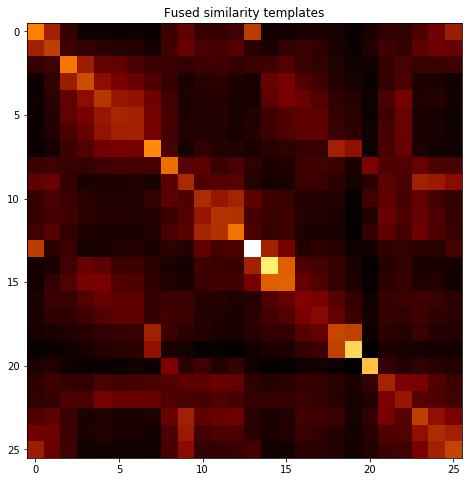

subject 25; gesture 6_1_1


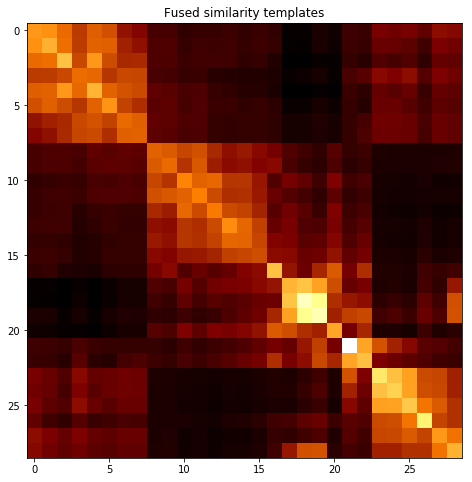

subject 25; gesture 6_0_2


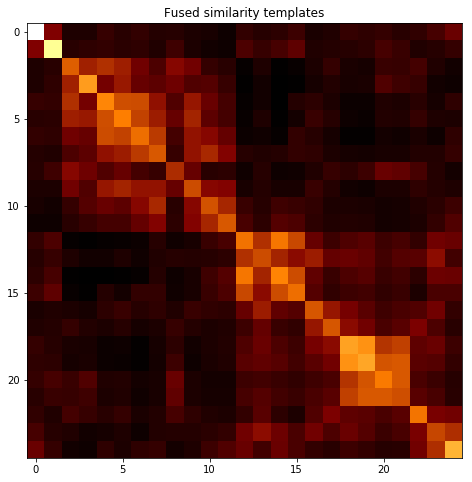

subject 25; gesture 3_1_2


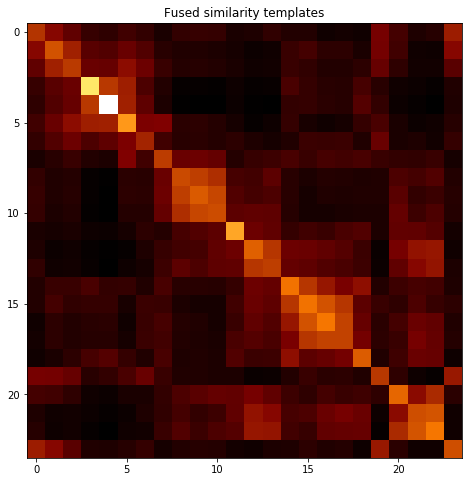

subject 25; gesture 3_1_1


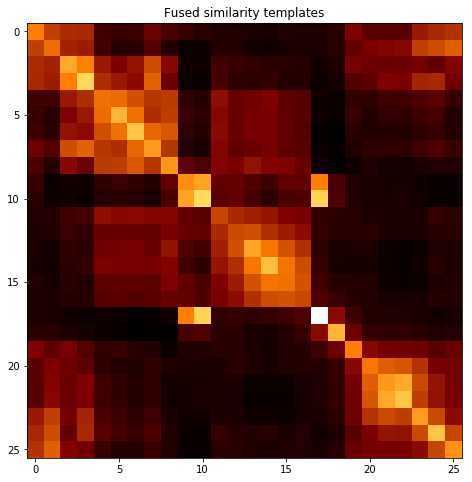

subject 25; gesture 6_0_1


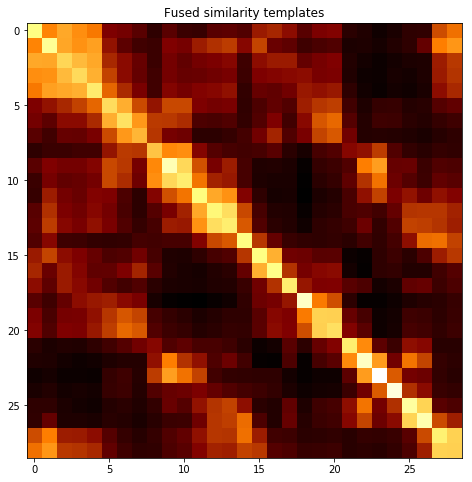

subject 25; gesture 5_0_1


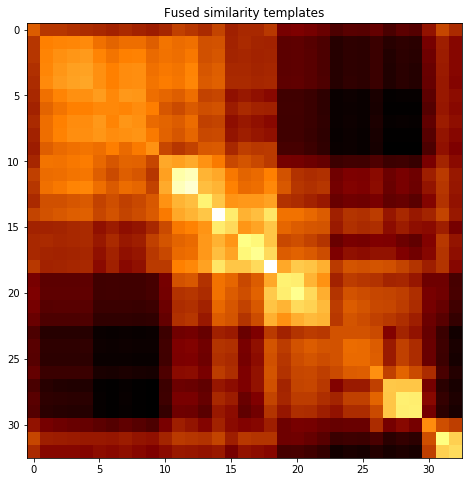

subject 25; gesture 4_0_2


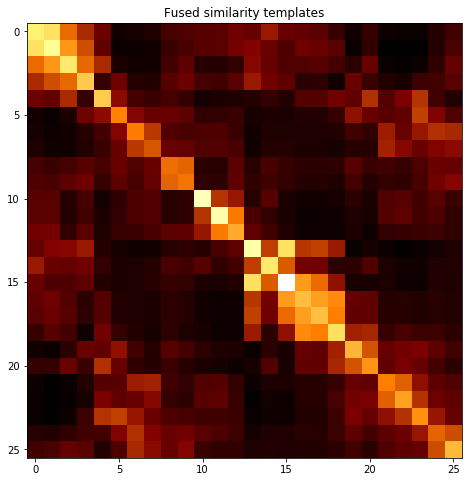

18
subject 18; gesture 5_0_2


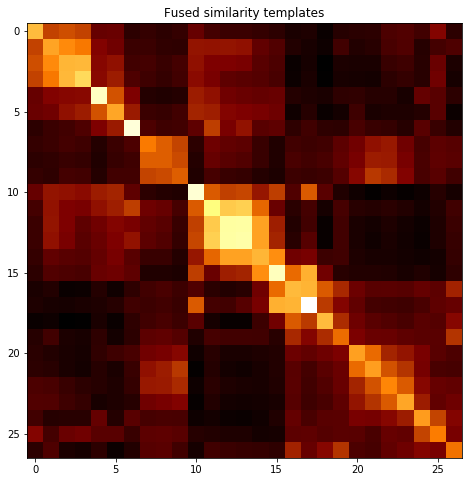

subject 18; gesture 3_0_1


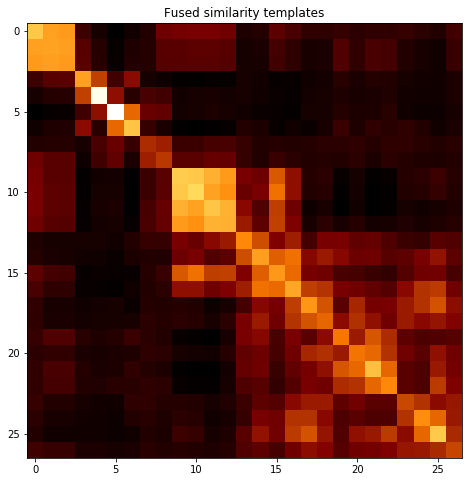

subject 18; gesture 4_1_1


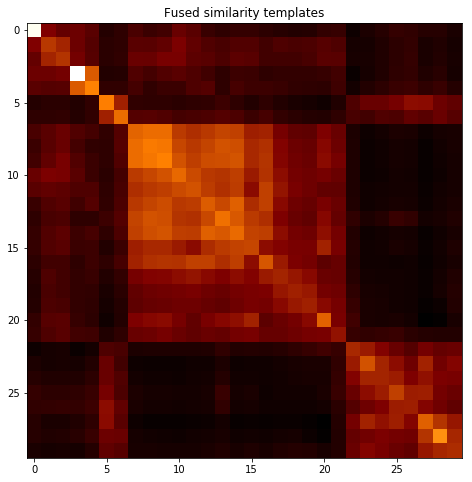

subject 18; gesture 4_1_2


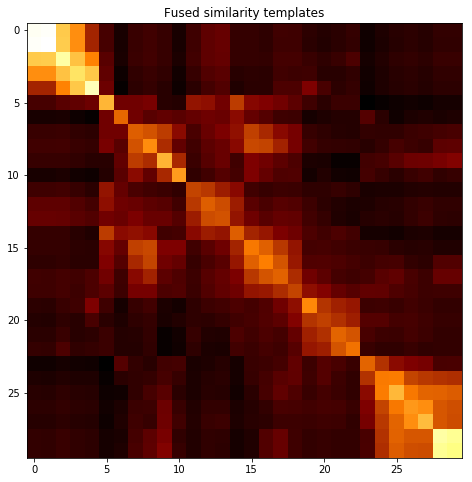

subject 18; gesture 5_1_2


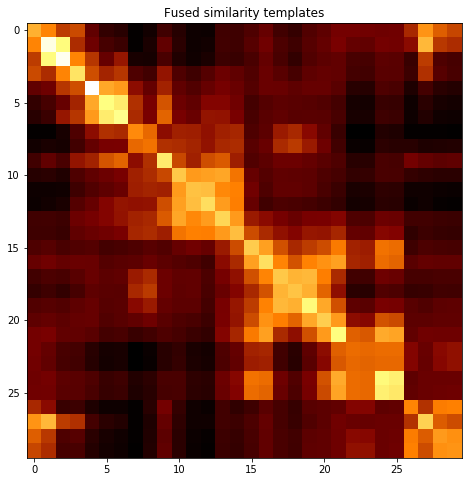

subject 18; gesture 6_1_2


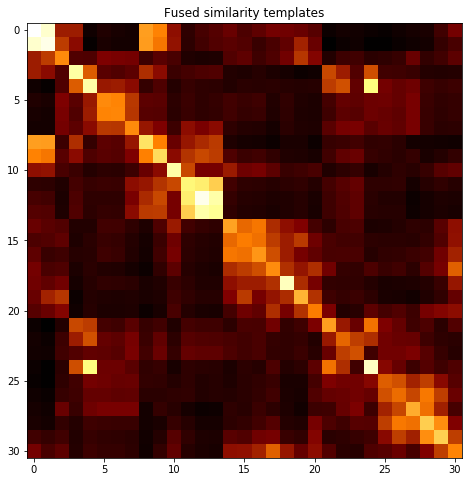

subject 18; gesture 4_0_1


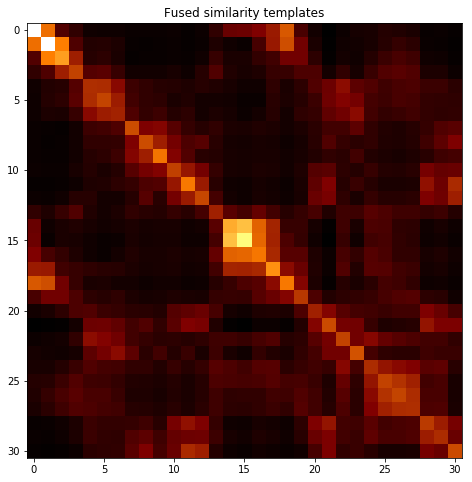

subject 18; gesture 3_0_2


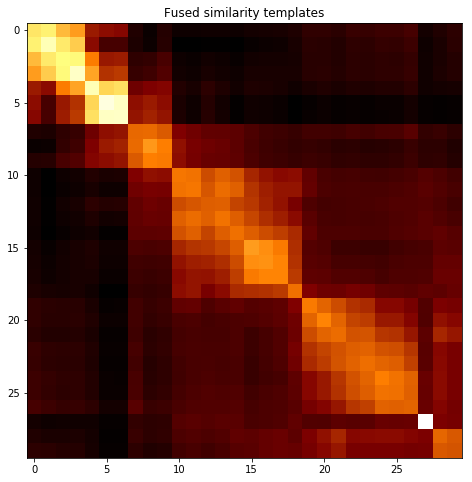

subject 18; gesture 5_1_1


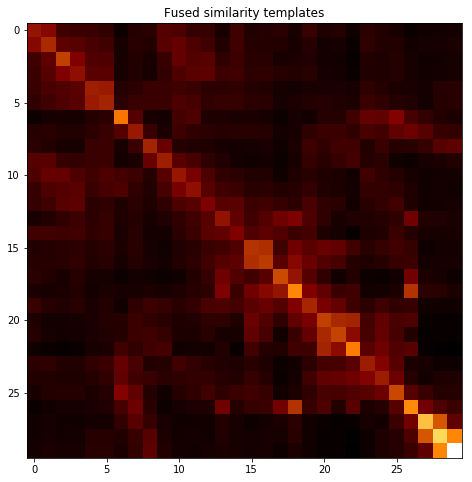

subject 18; gesture 6_1_1


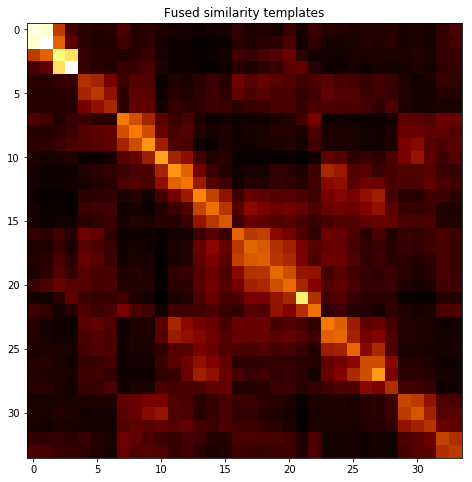

subject 18; gesture 6_0_2


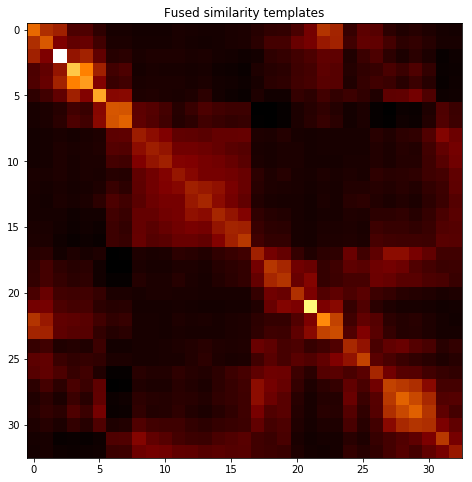

subject 18; gesture 3_1_2


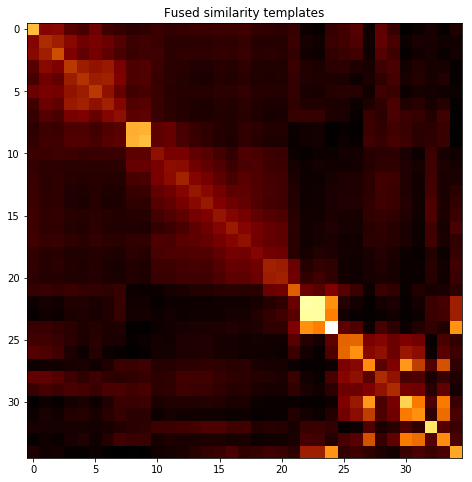

subject 18; gesture 3_1_1


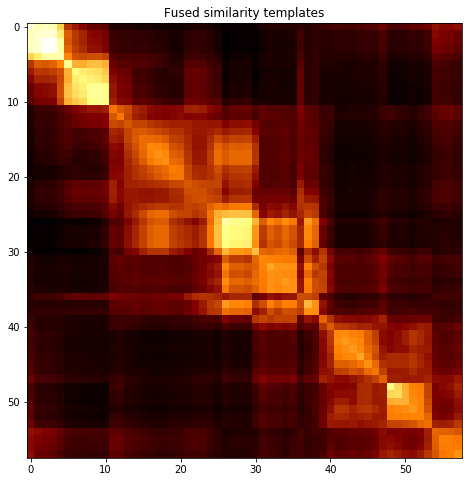

subject 18; gesture 6_0_1


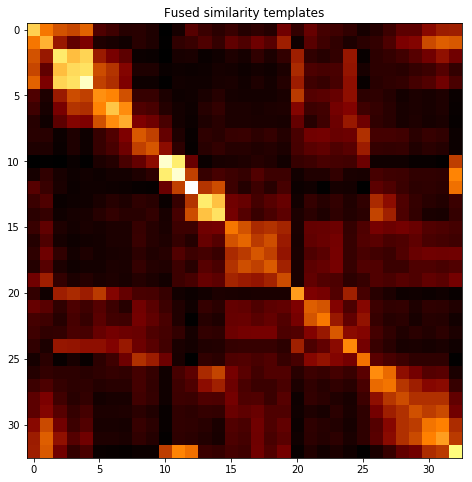

subject 18; gesture 5_0_1


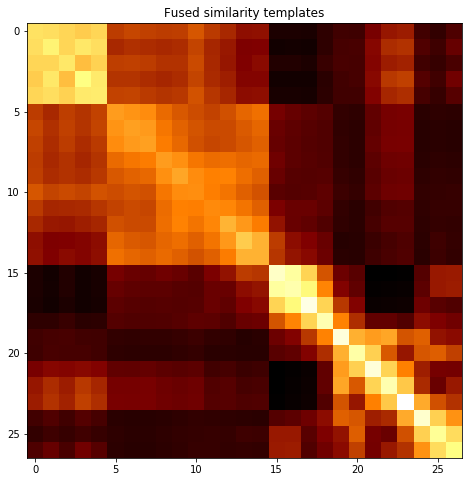

subject 18; gesture 4_0_2


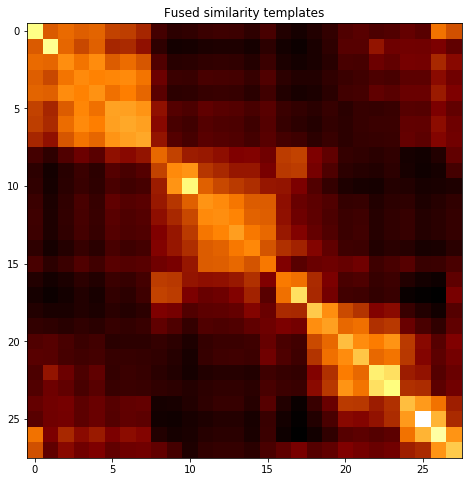

29
subject 29; gesture 5_0_2


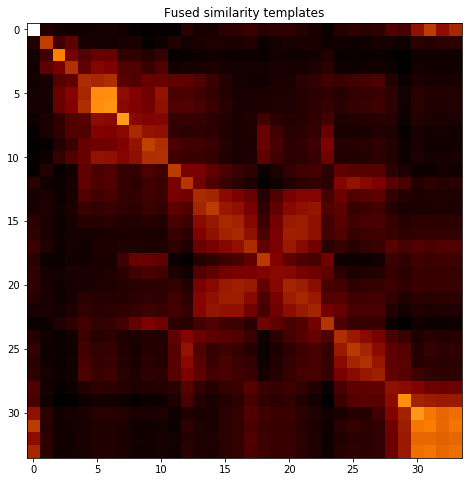

subject 29; gesture 3_0_1


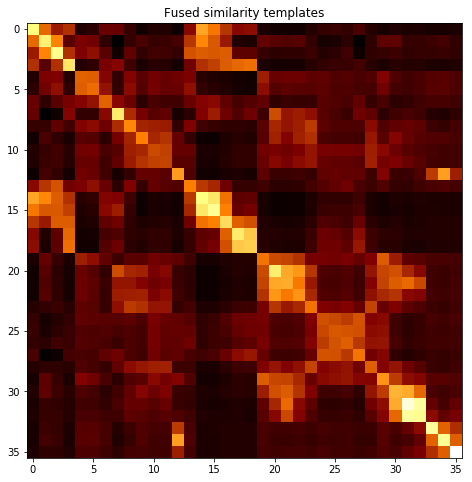

subject 29; gesture 4_1_1


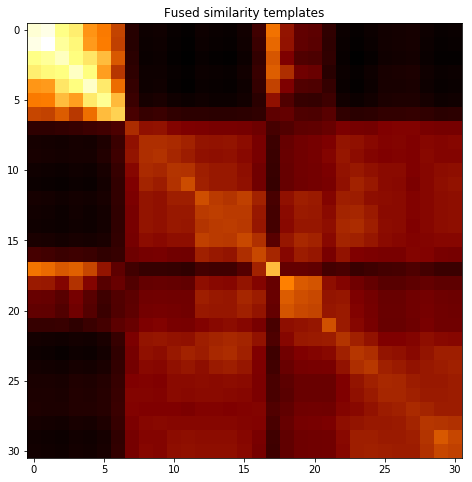

subject 29; gesture 4_1_2


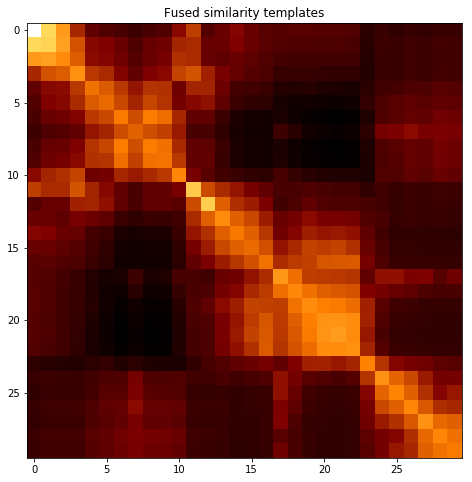

subject 29; gesture 5_1_2


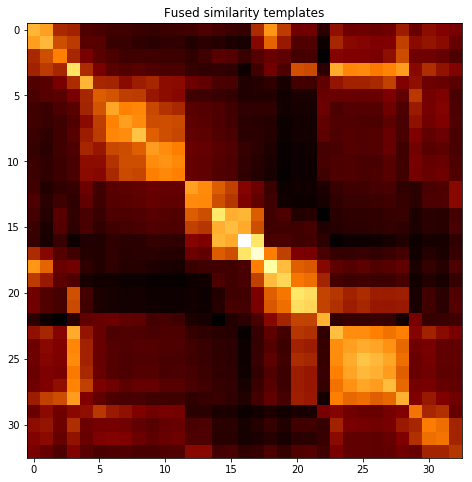

subject 29; gesture 6_1_2


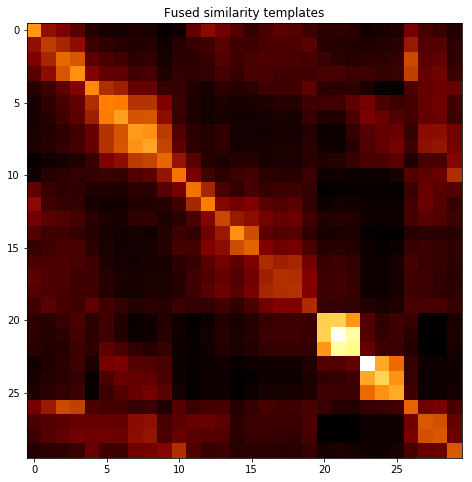

subject 29; gesture 4_0_1


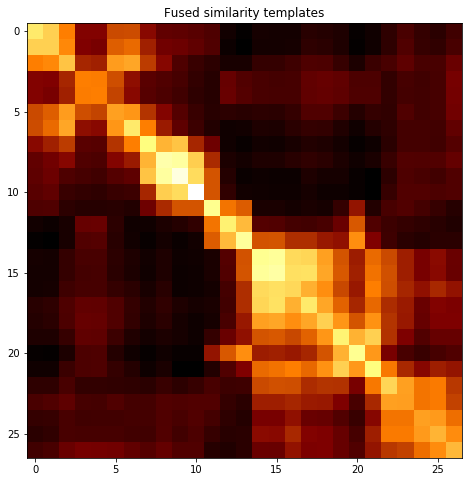

subject 29; gesture 3_0_2


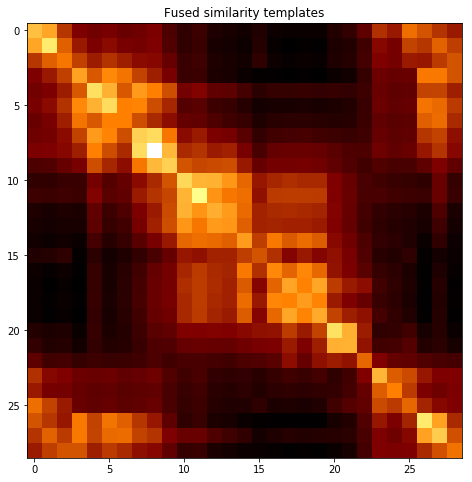

subject 29; gesture 5_1_1


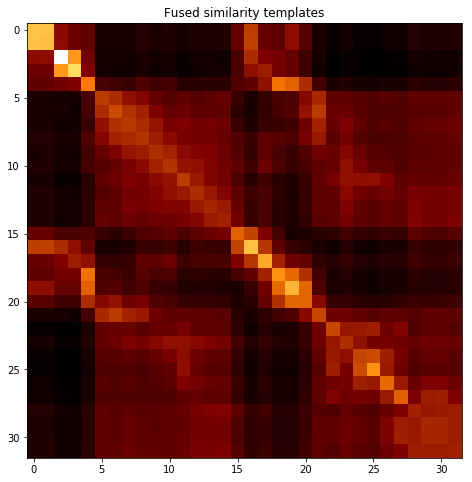

subject 29; gesture 6_1_1


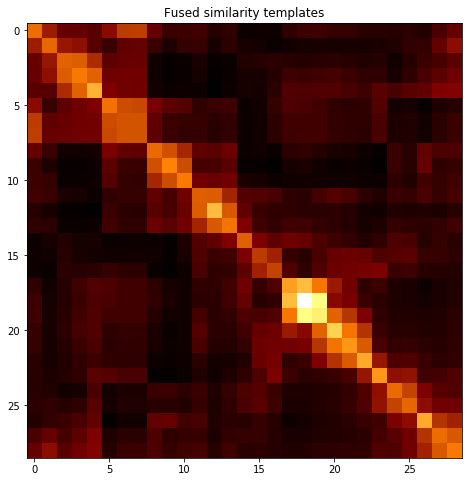

subject 29; gesture 6_0_2


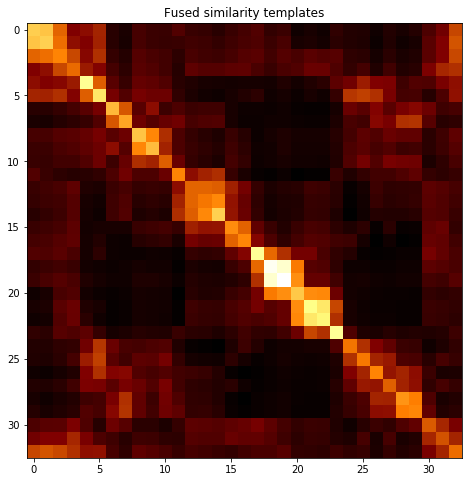

subject 29; gesture 3_1_2


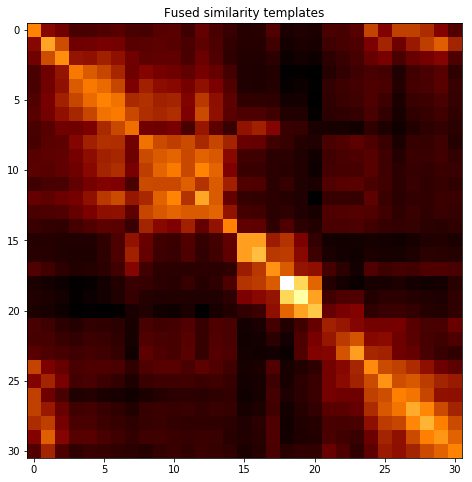

subject 29; gesture 3_1_1


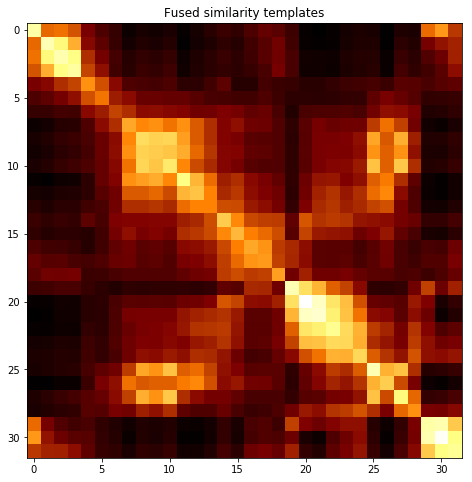

subject 29; gesture 6_0_1


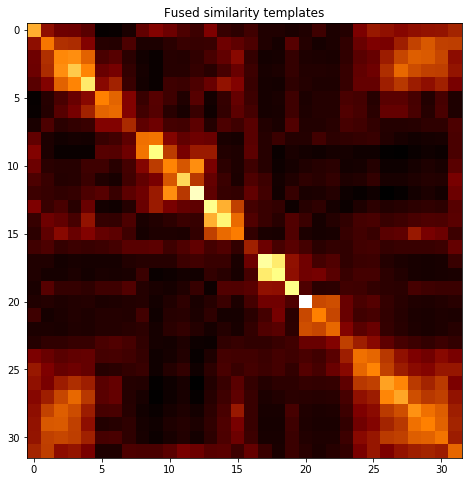

subject 29; gesture 5_0_1


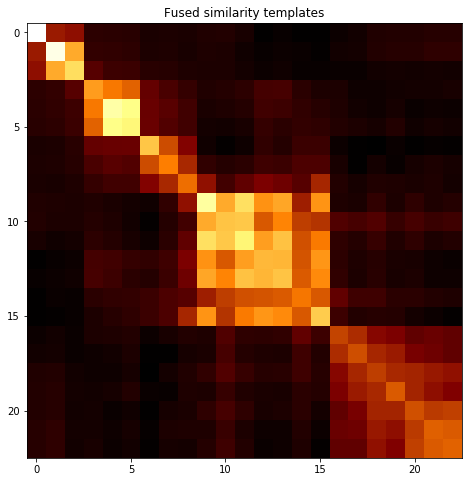

subject 29; gesture 4_0_2


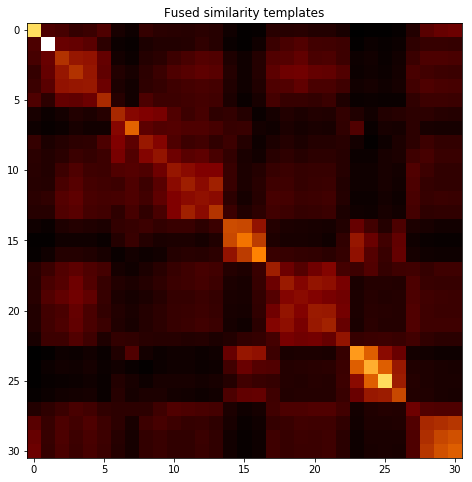

15
subject 15; gesture 5_0_2


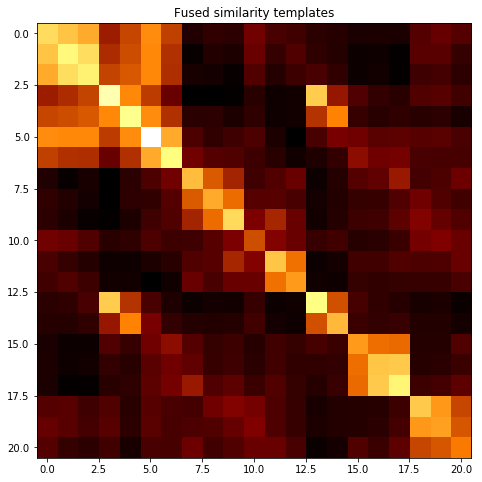

subject 15; gesture 3_0_1


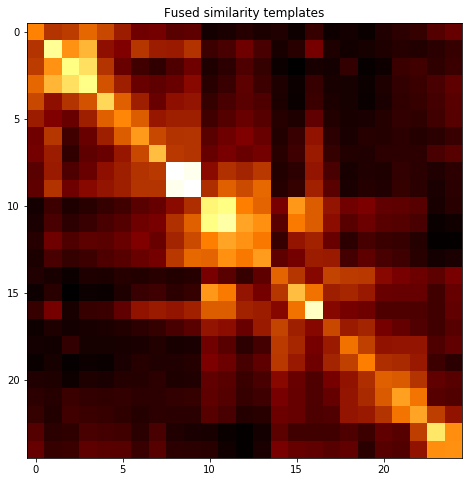

subject 15; gesture 4_1_1


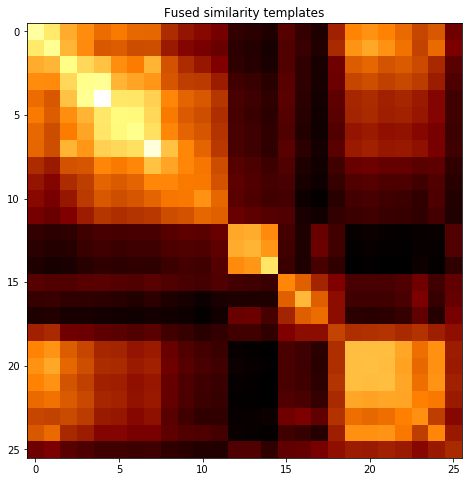

subject 15; gesture 4_1_2


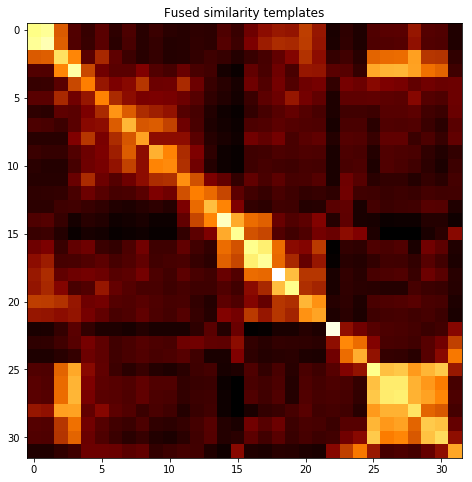

subject 15; gesture 5_1_2


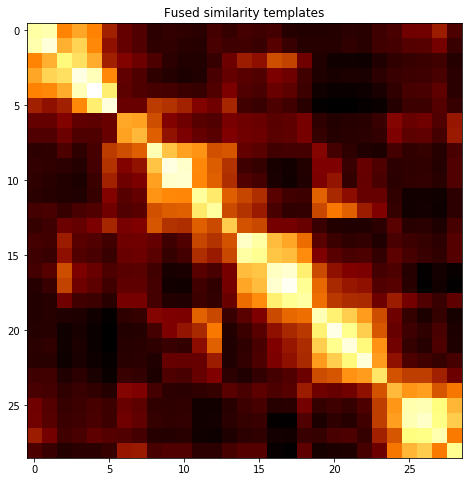

subject 15; gesture 6_1_2


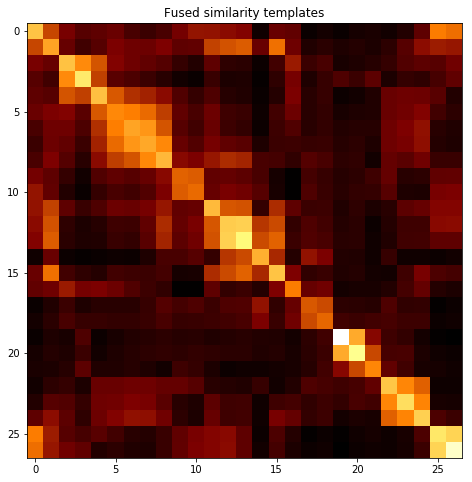

subject 15; gesture 4_0_1


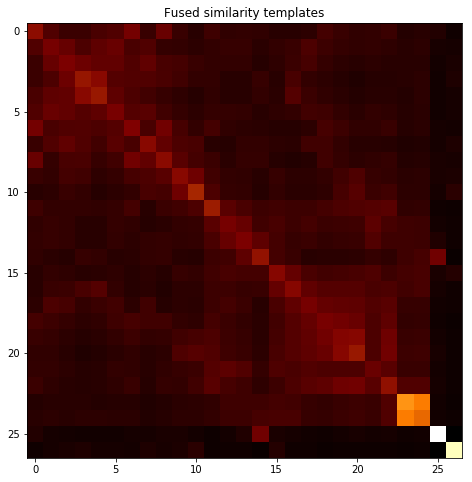

subject 15; gesture 3_0_2


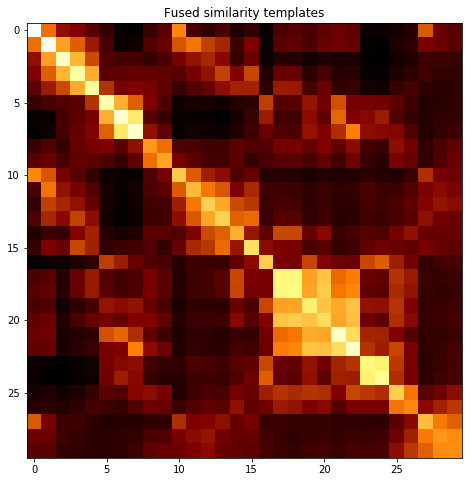

subject 15; gesture 5_1_1


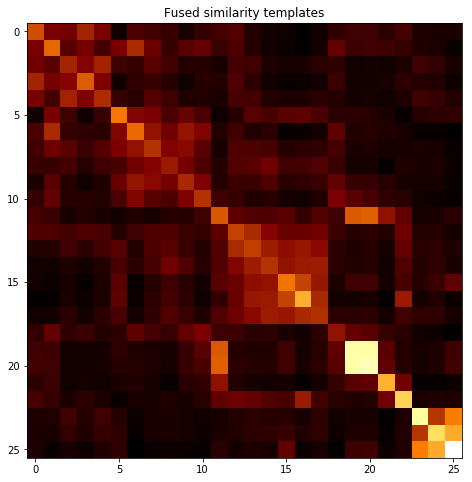

subject 15; gesture 6_1_1


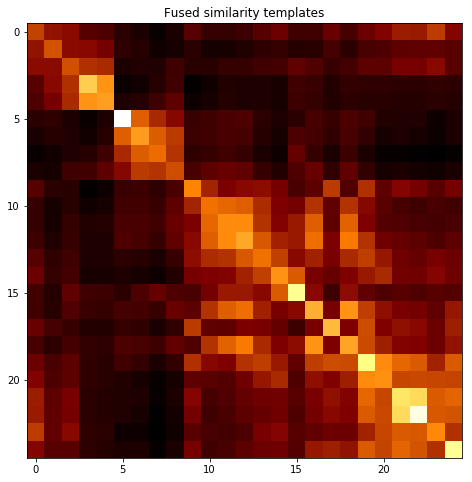

subject 15; gesture 6_0_2


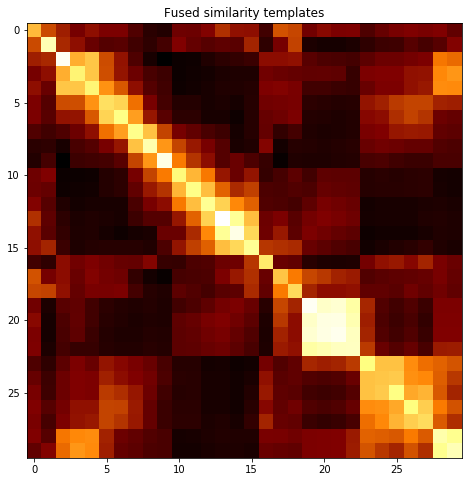

subject 15; gesture 3_1_2


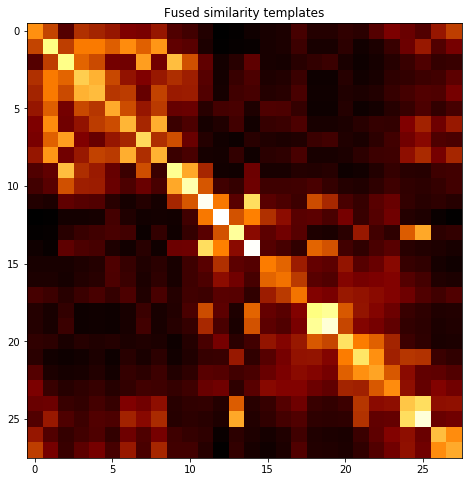

subject 15; gesture 3_1_1


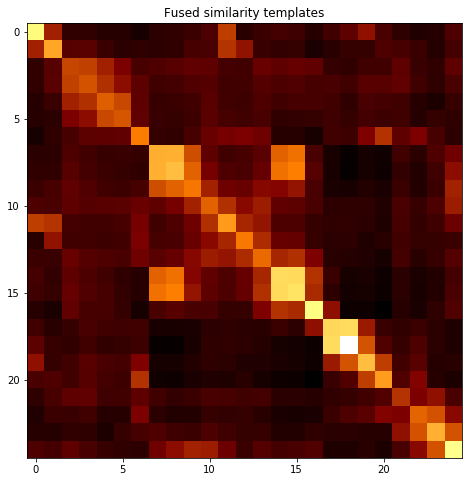

subject 15; gesture 6_0_1


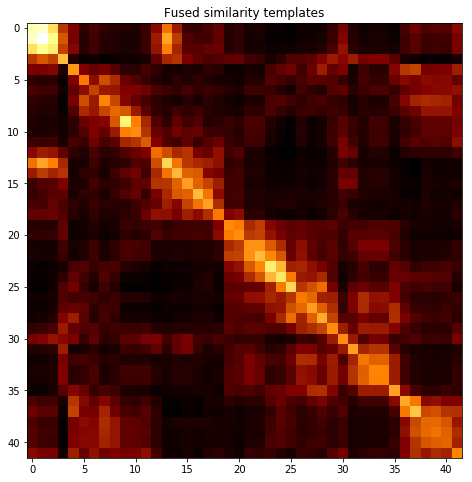

subject 15; gesture 5_0_1


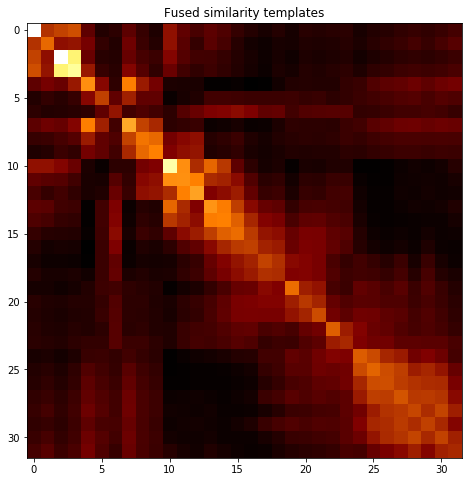

subject 15; gesture 4_0_2


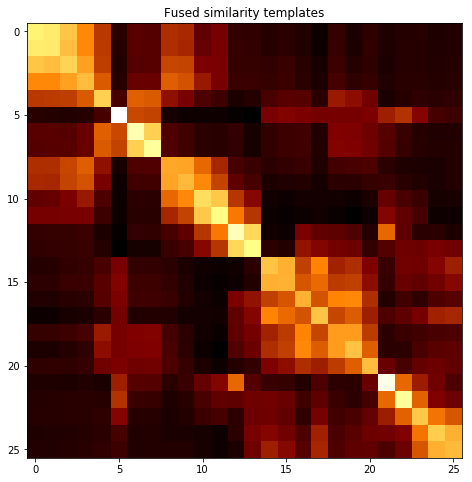

28
subject 28; gesture 5_0_2


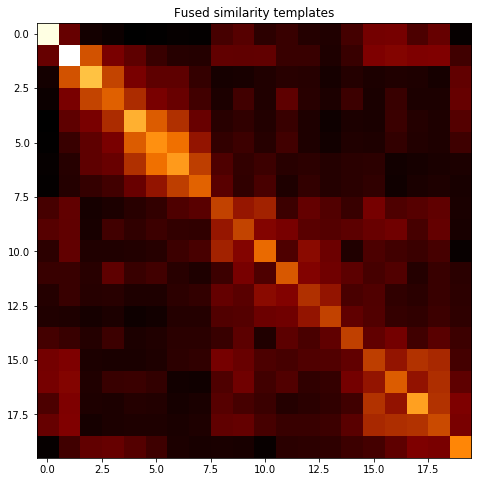

subject 28; gesture 3_0_1


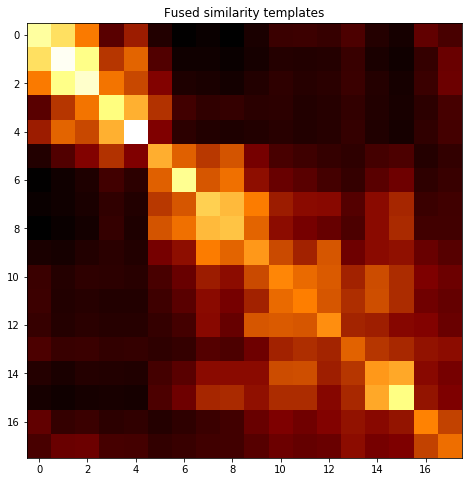

subject 28; gesture 4_1_1


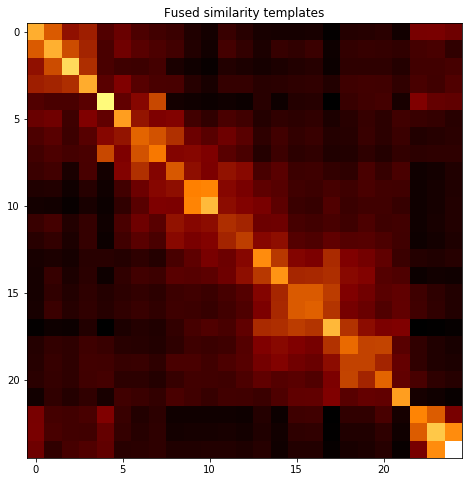

subject 28; gesture 4_1_2


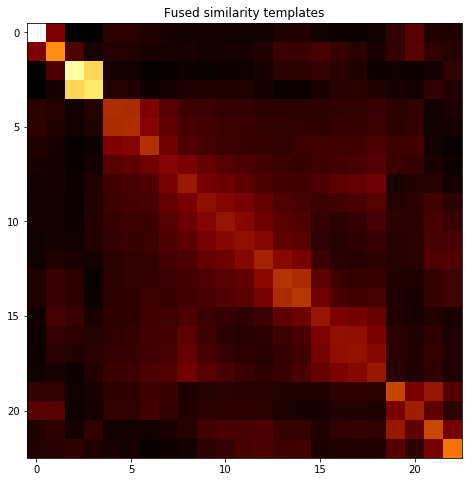

subject 28; gesture 5_1_2


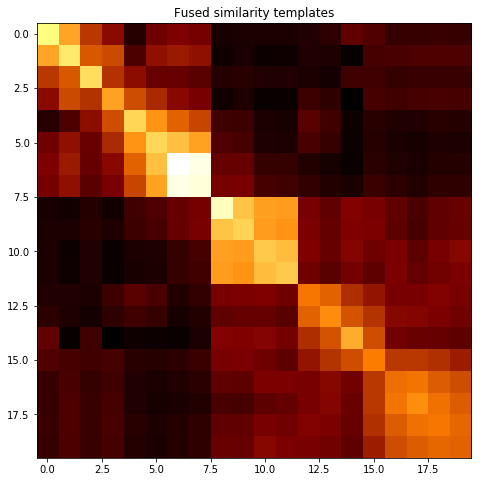

subject 28; gesture 6_1_2


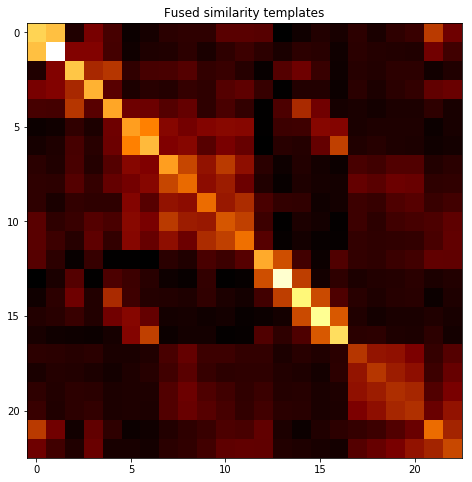

subject 28; gesture 4_0_1


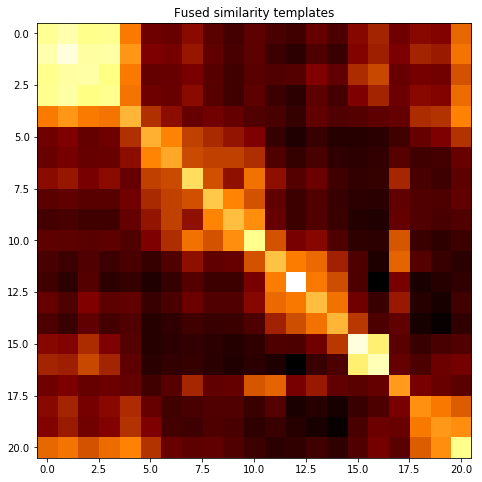

subject 28; gesture 3_0_2


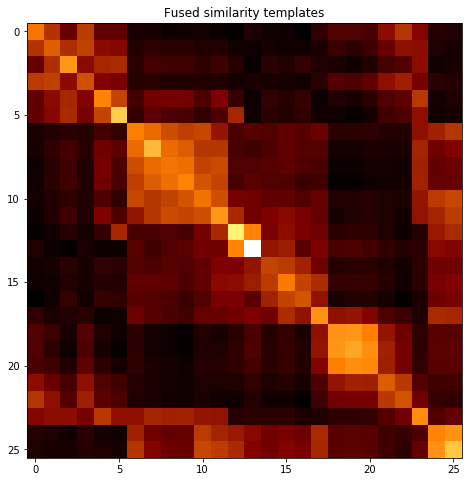

subject 28; gesture 5_1_1


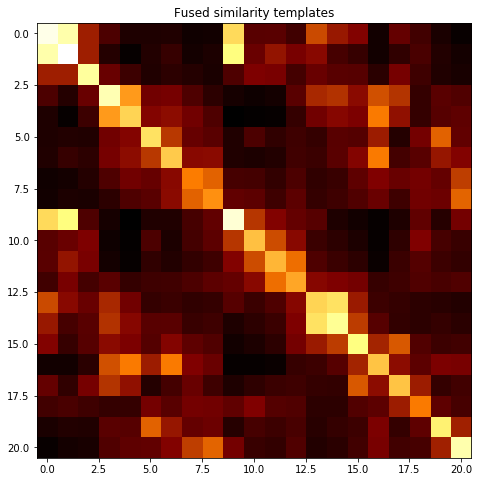

subject 28; gesture 6_1_1


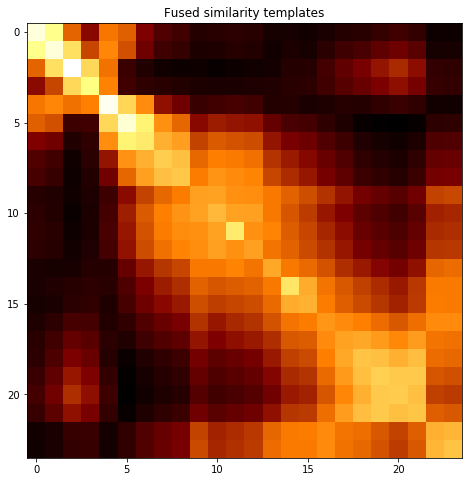

subject 28; gesture 6_0_2


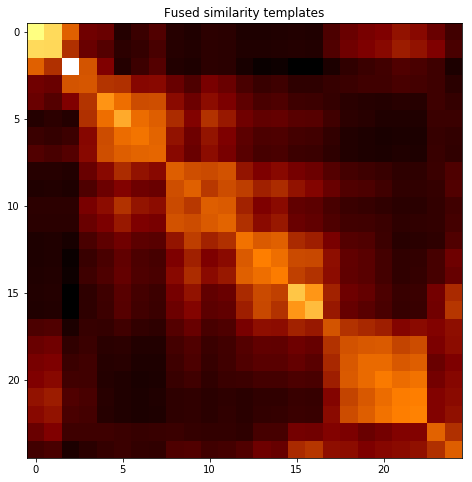

subject 28; gesture 3_1_2


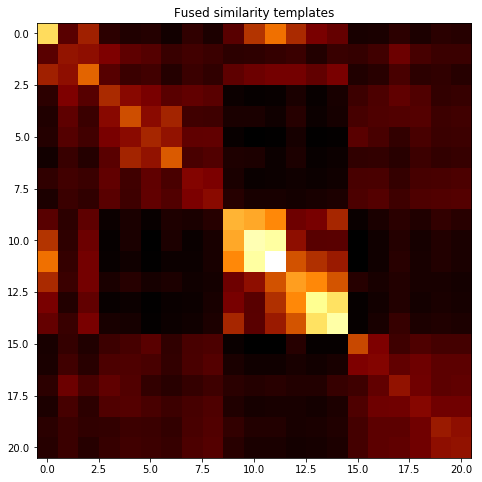

subject 28; gesture 3_1_1


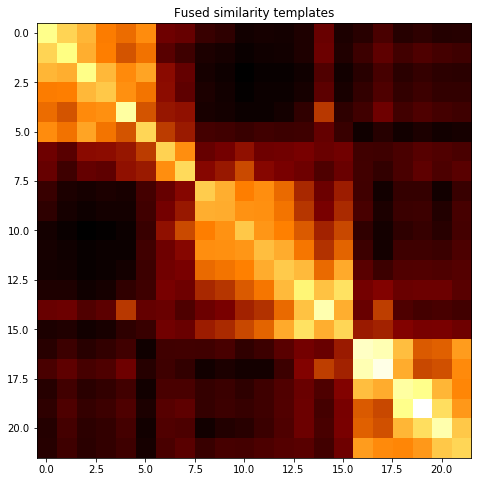

subject 28; gesture 6_0_1


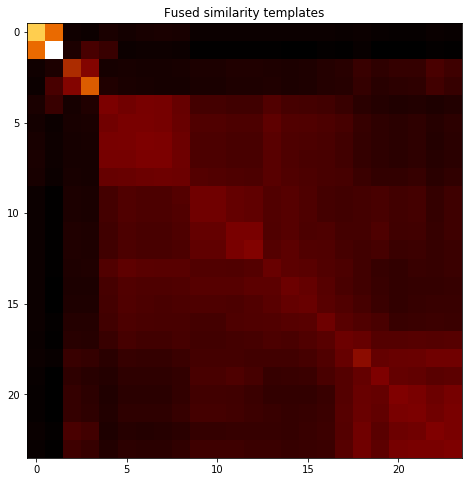

subject 28; gesture 5_0_1


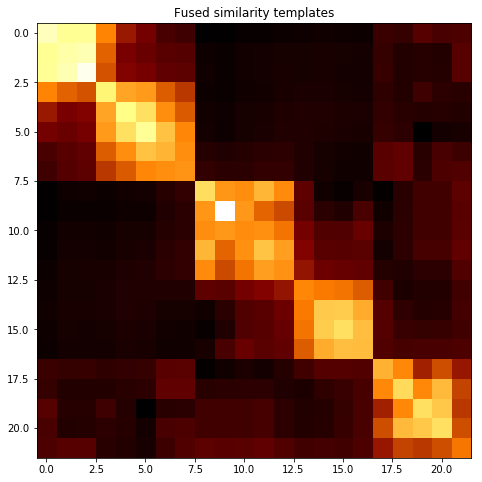

subject 28; gesture 4_0_2


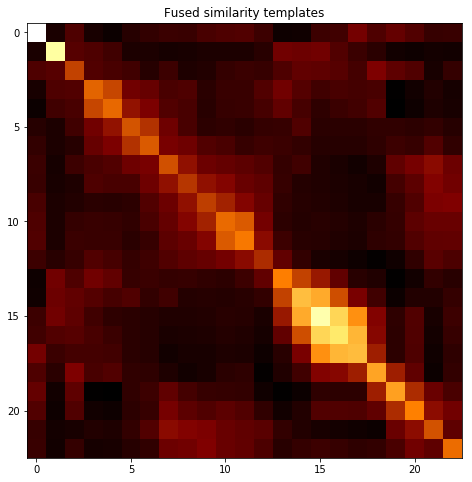

12
subject 12; gesture 5_0_2


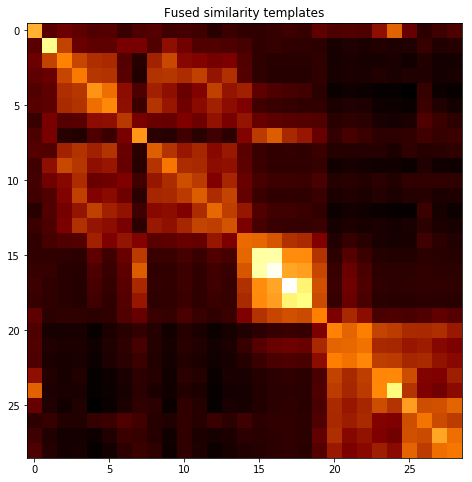

subject 12; gesture 3_0_1


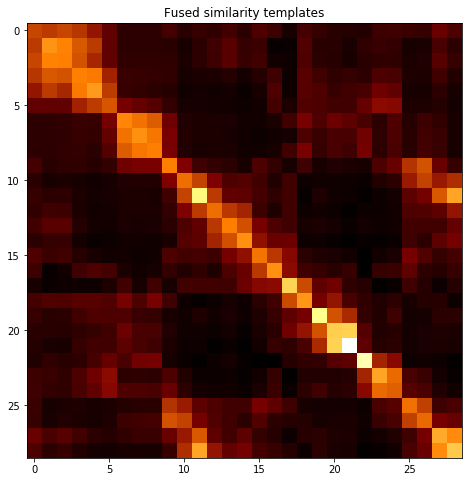

subject 12; gesture 4_1_1


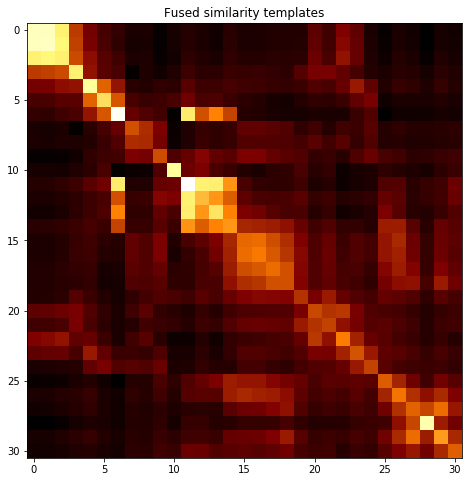

subject 12; gesture 4_1_2


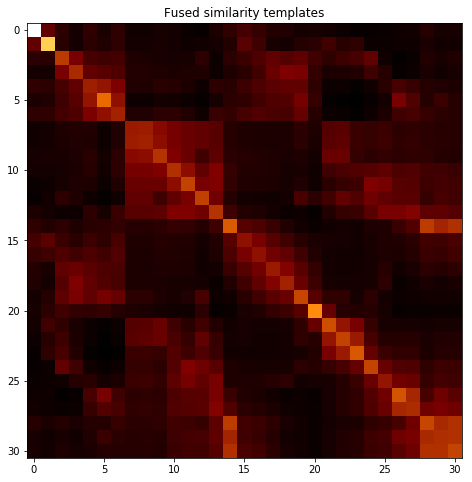

subject 12; gesture 5_1_2


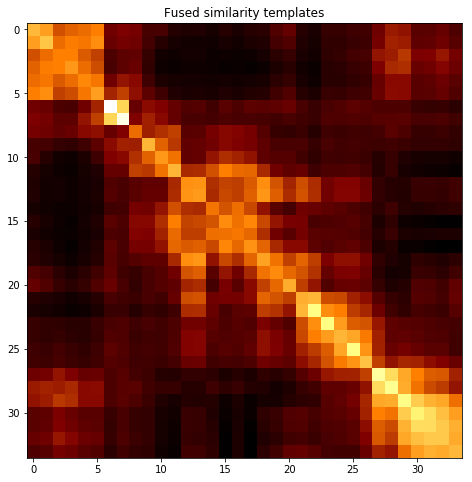

subject 12; gesture 6_1_2


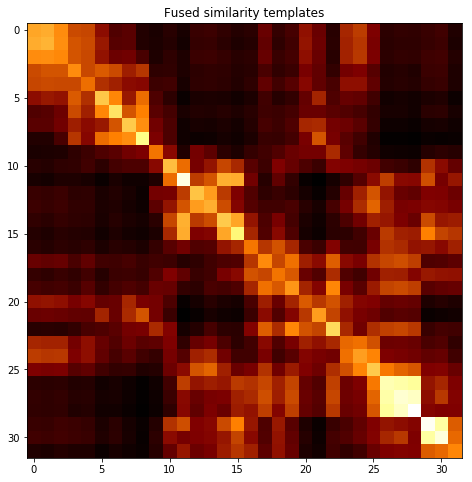

subject 12; gesture 4_0_1


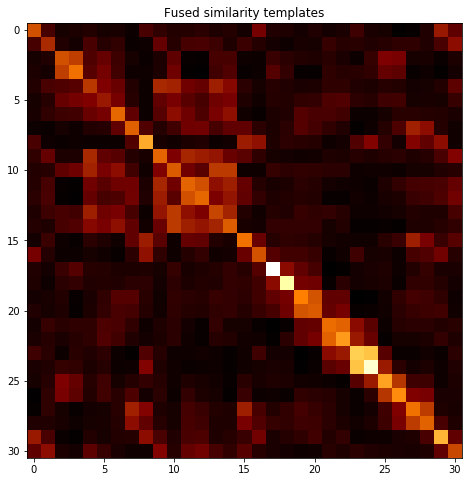

subject 12; gesture 3_0_2


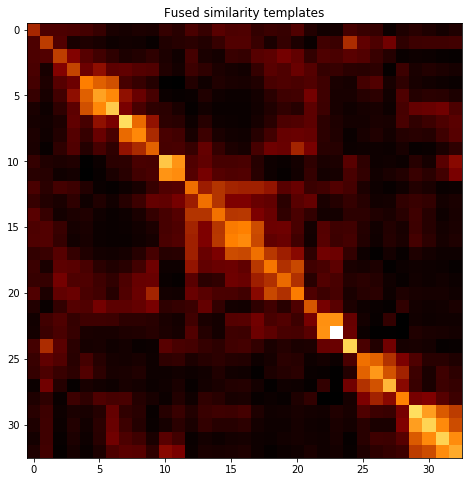

subject 12; gesture 5_1_1


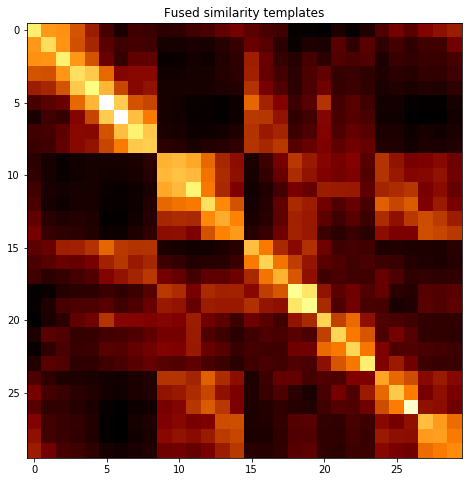

subject 12; gesture 6_1_1


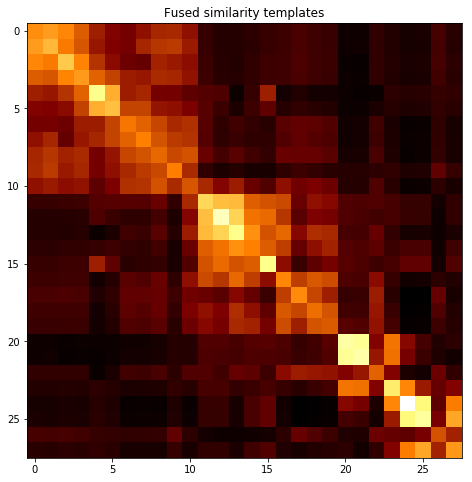

subject 12; gesture 6_0_2


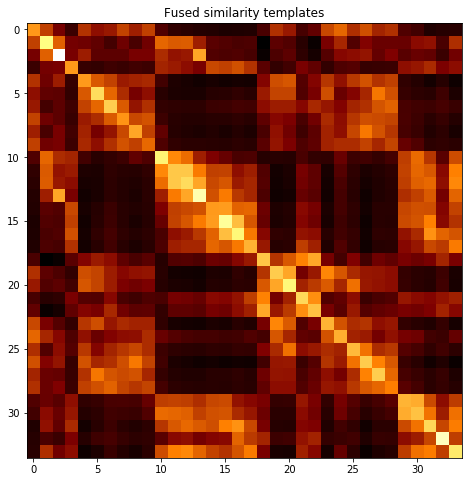

subject 12; gesture 3_1_2


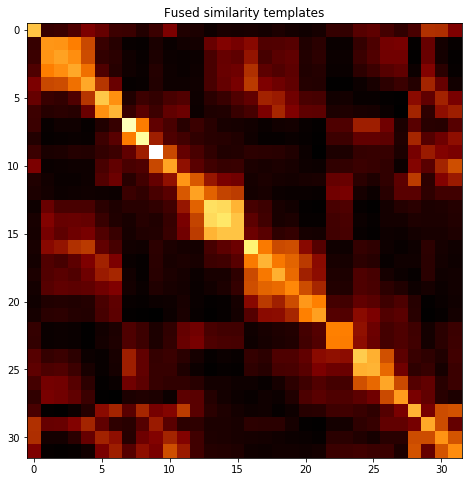

subject 12; gesture 3_1_1


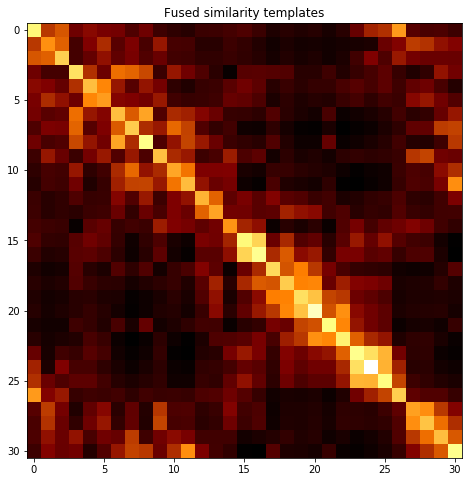

subject 12; gesture 6_0_1


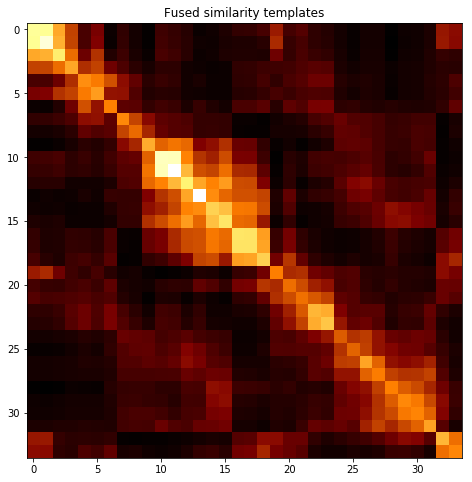

subject 12; gesture 5_0_1


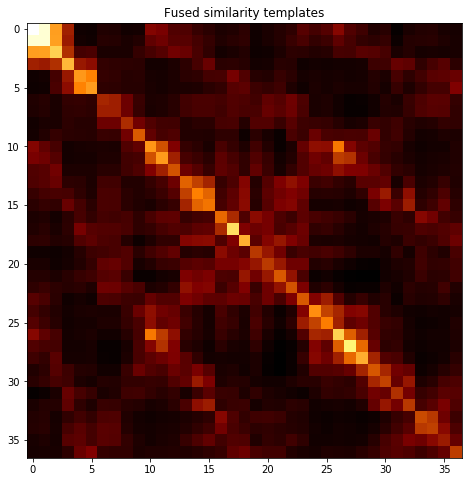

subject 12; gesture 4_0_2


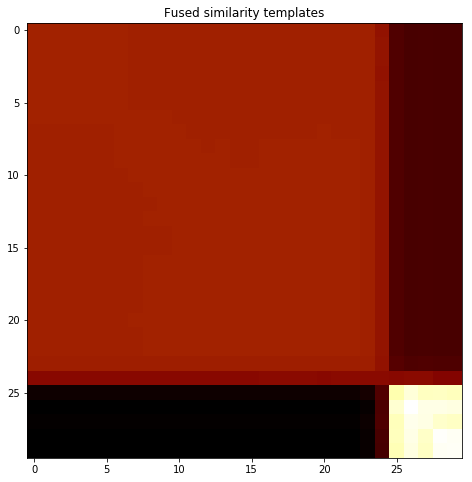

19
subject 19; gesture 5_0_2


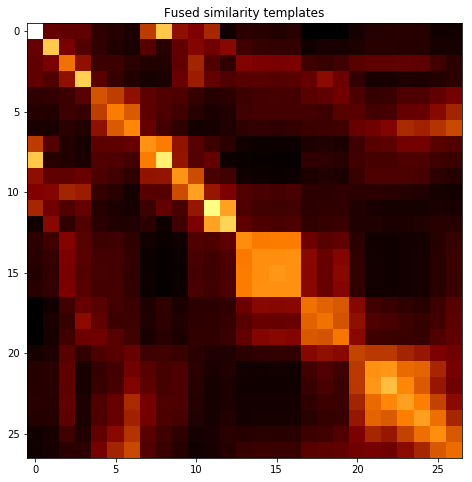

subject 19; gesture 3_0_1


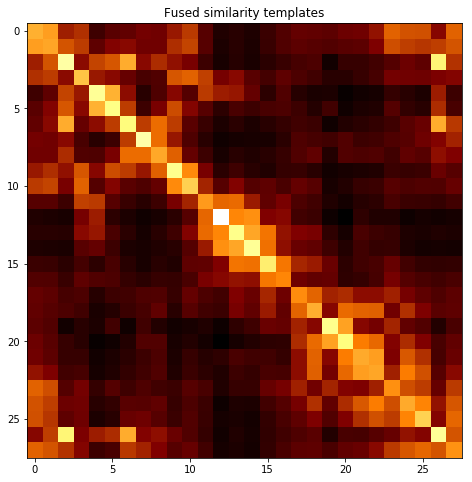

subject 19; gesture 4_1_1


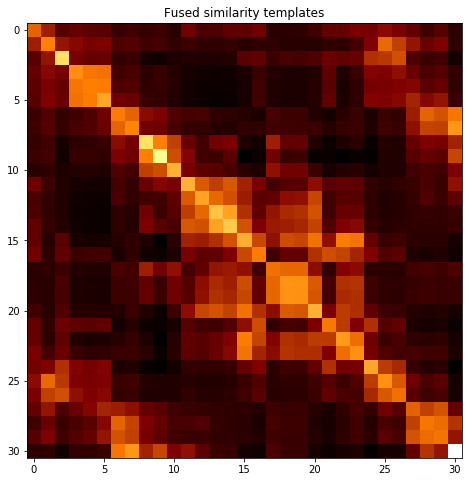

subject 19; gesture 4_1_2


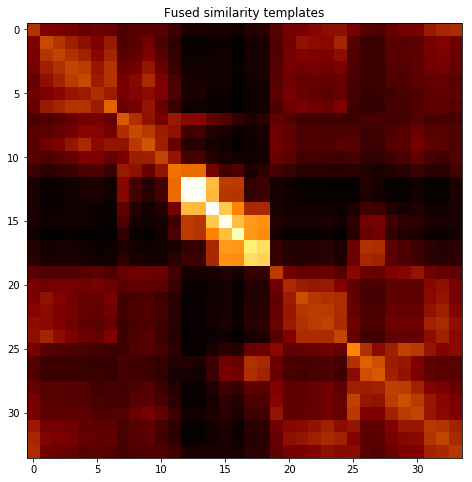

subject 19; gesture 5_1_2


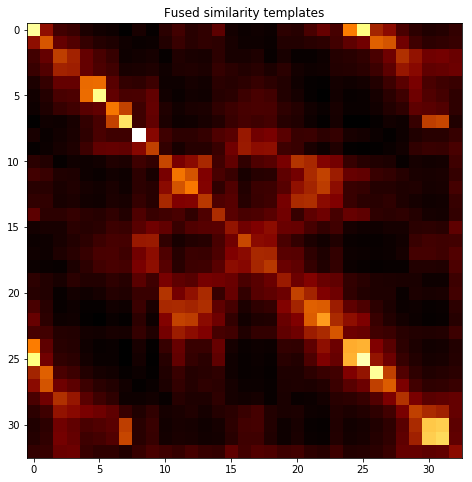

subject 19; gesture 6_1_2


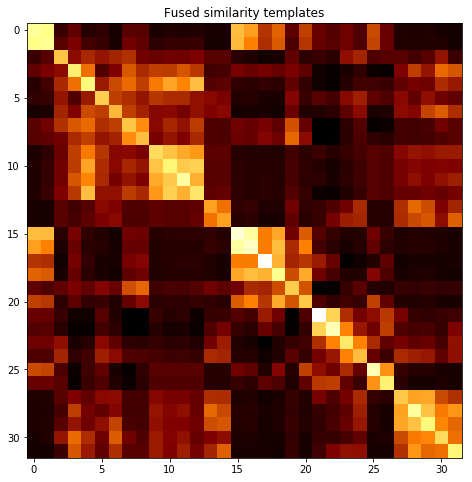

subject 19; gesture 4_0_1


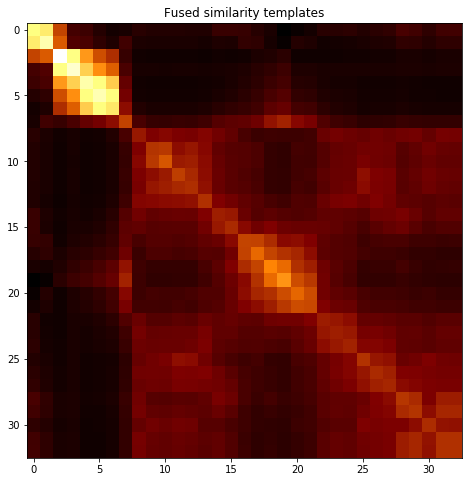

subject 19; gesture 3_0_2


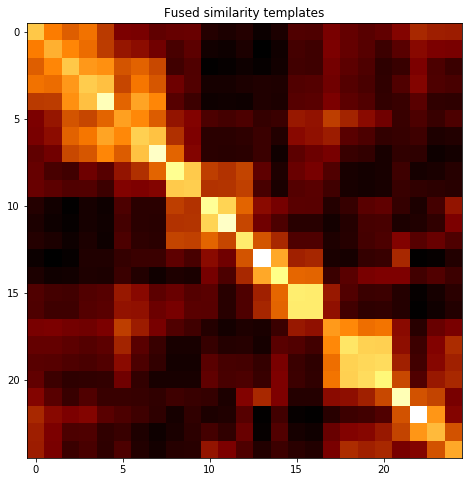

subject 19; gesture 5_1_1


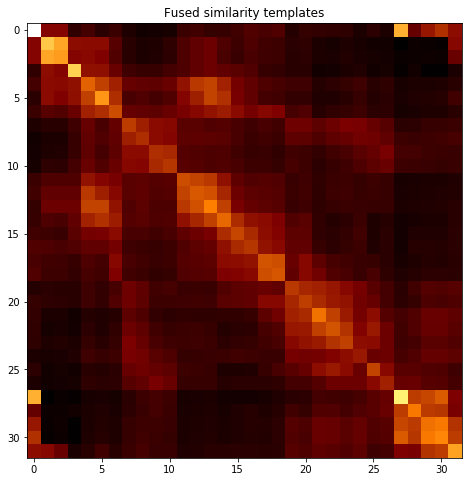

subject 19; gesture 6_1_1


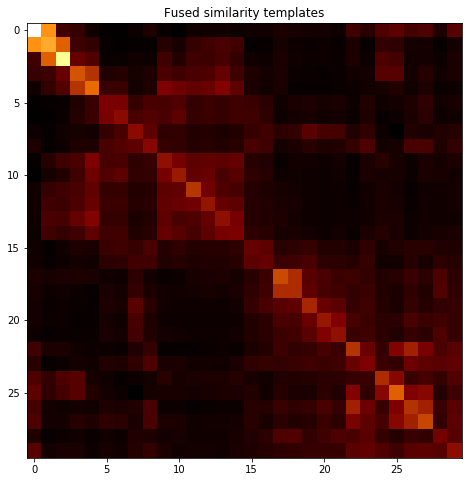

subject 19; gesture 6_0_2


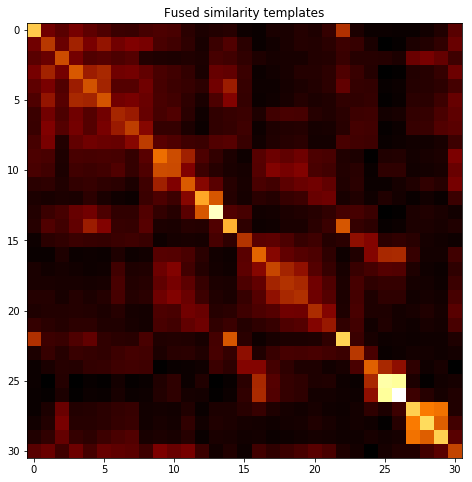

subject 19; gesture 3_1_2


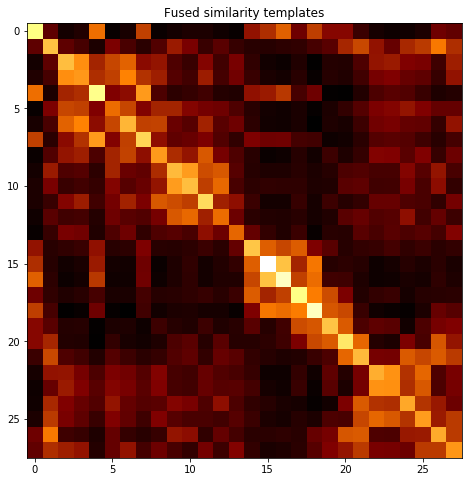

subject 19; gesture 3_1_1


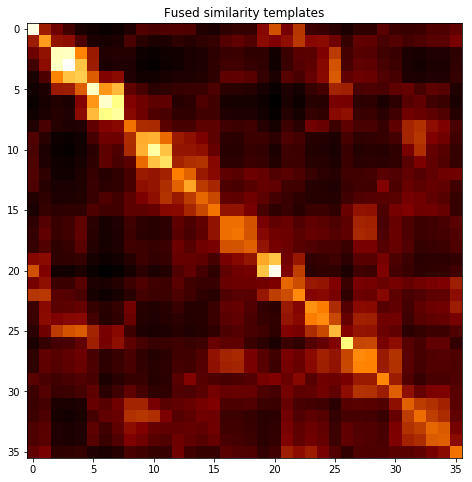

subject 19; gesture 6_0_1


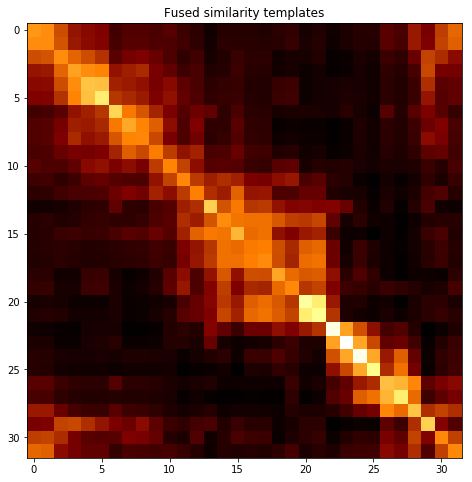

subject 19; gesture 5_0_1


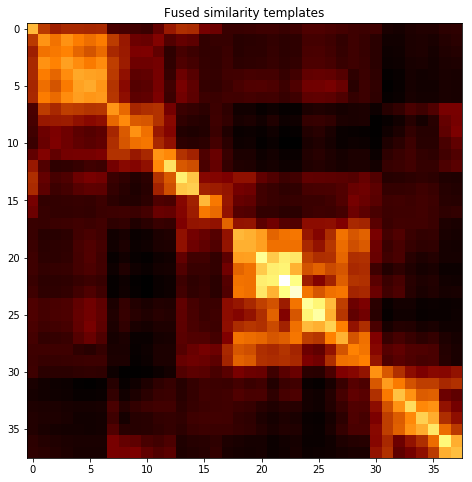

subject 19; gesture 4_0_2


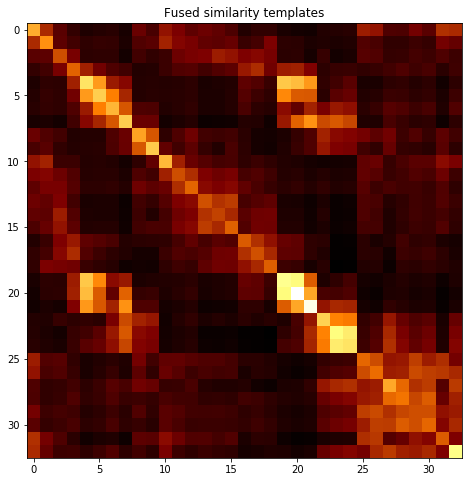

07
subject 07; gesture 5_0_2


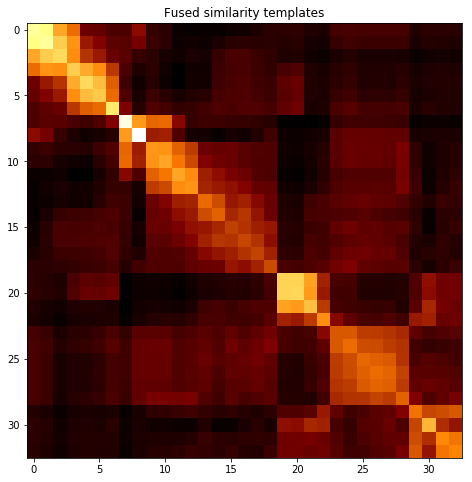

subject 07; gesture 3_0_1


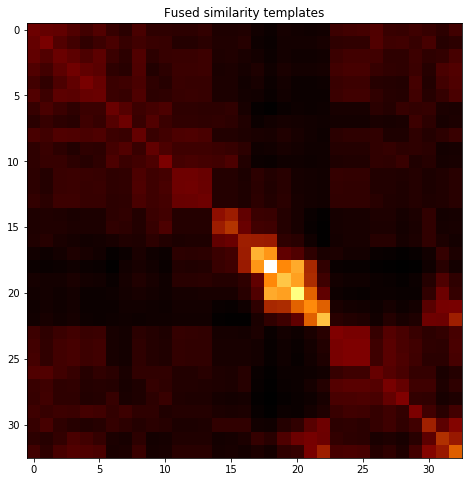

subject 07; gesture 4_1_1


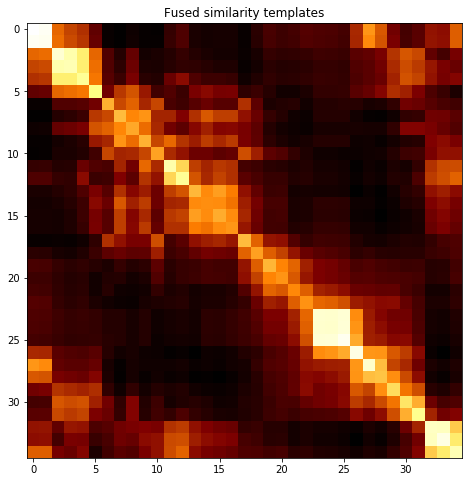

subject 07; gesture 4_1_2


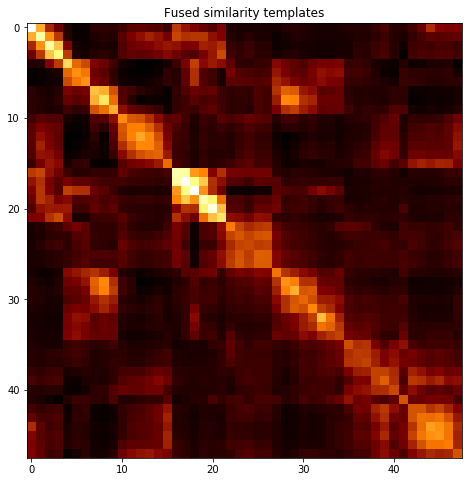

subject 07; gesture 5_1_2


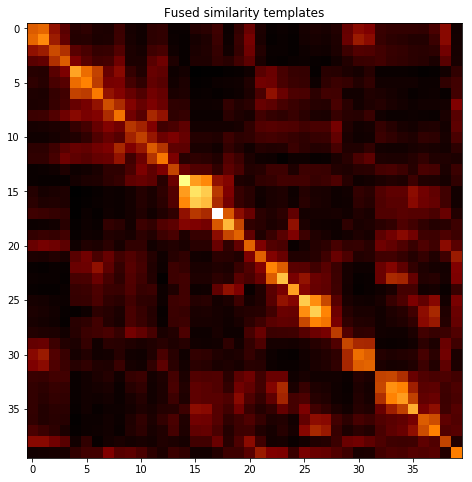

subject 07; gesture 6_1_2


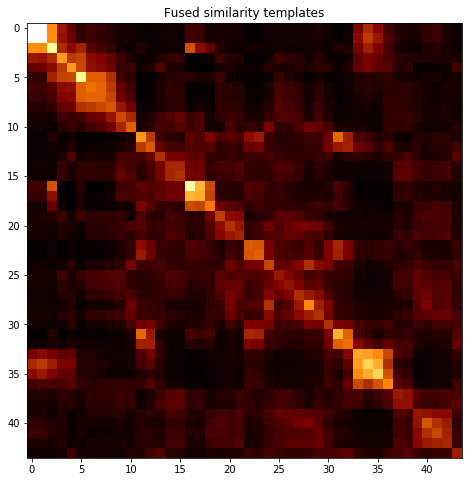

subject 07; gesture 4_0_1


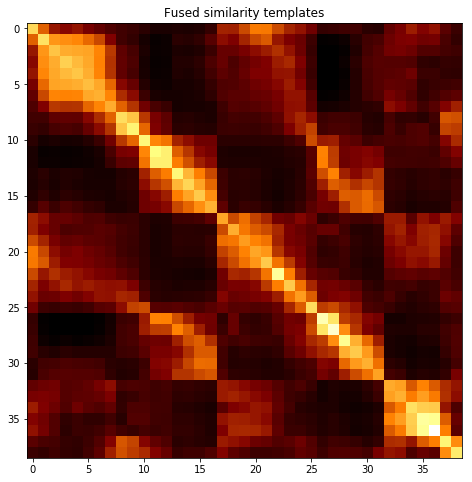

subject 07; gesture 3_0_2


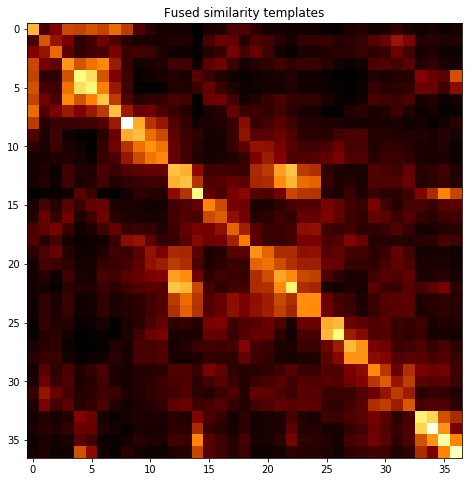

subject 07; gesture 5_1_1


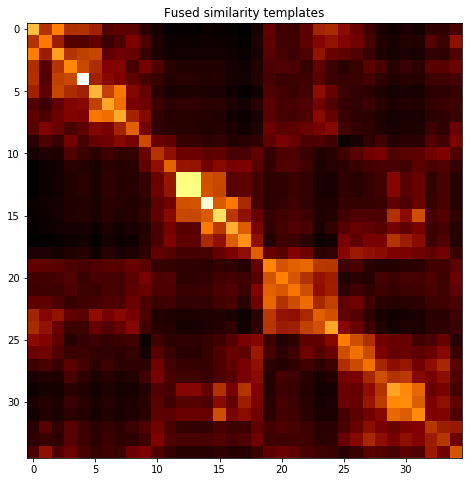

subject 07; gesture 6_1_1


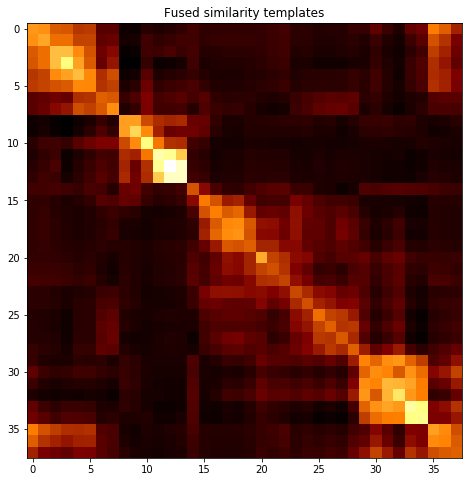

subject 07; gesture 6_0_2


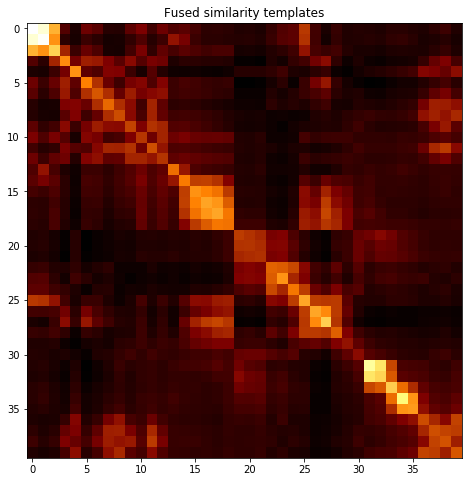

subject 07; gesture 3_1_2


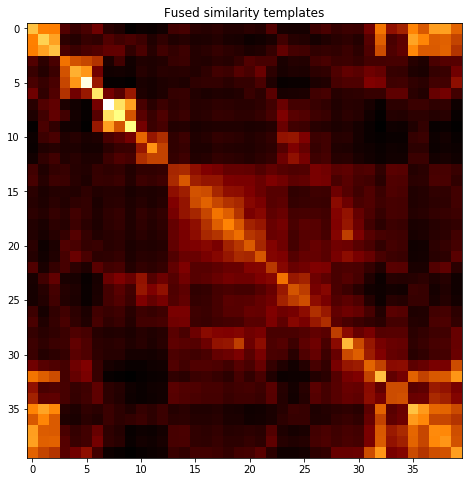

subject 07; gesture 3_1_1


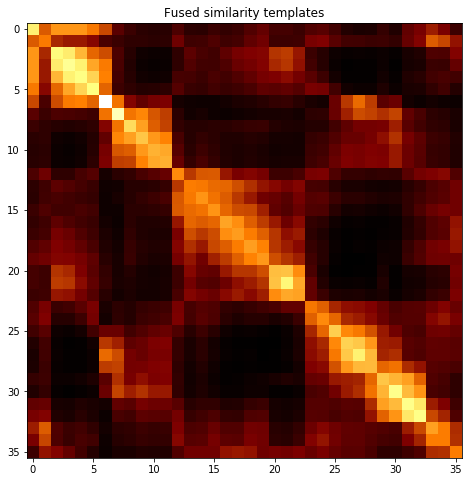

subject 07; gesture 6_0_1


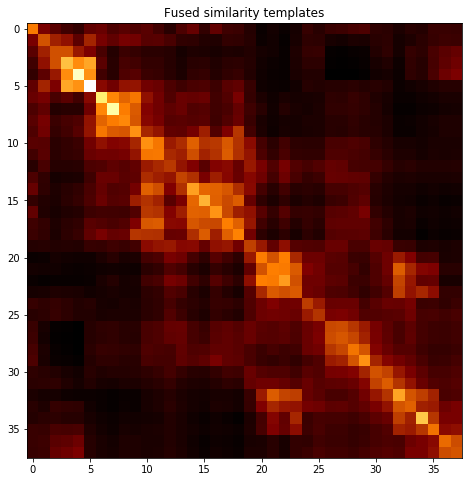

subject 07; gesture 5_0_1


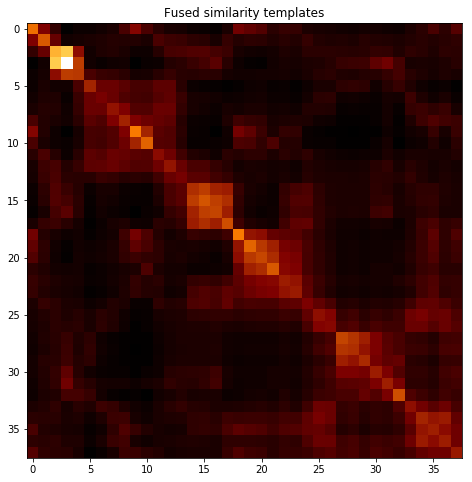

subject 07; gesture 4_0_2


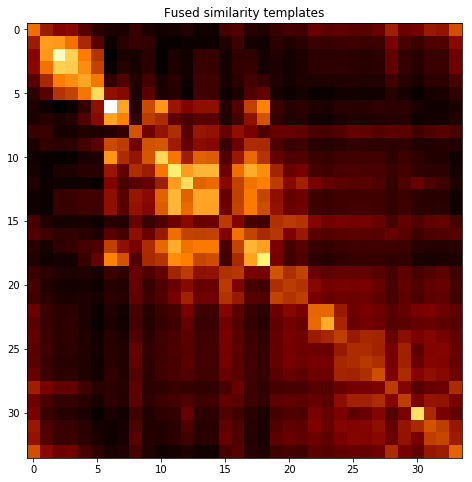

20
subject 20; gesture 5_0_2


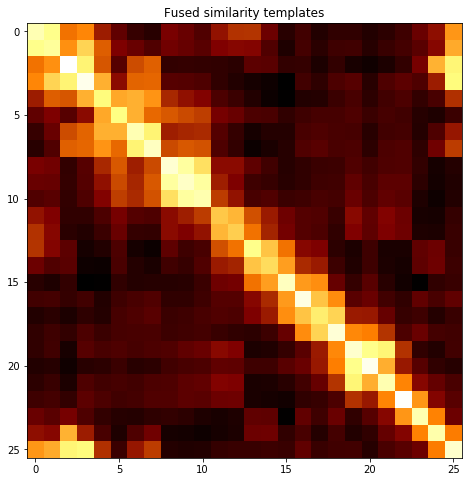

subject 20; gesture 3_0_1


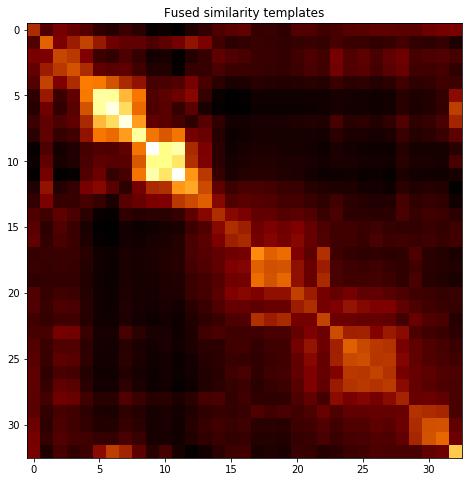

subject 20; gesture 4_1_1


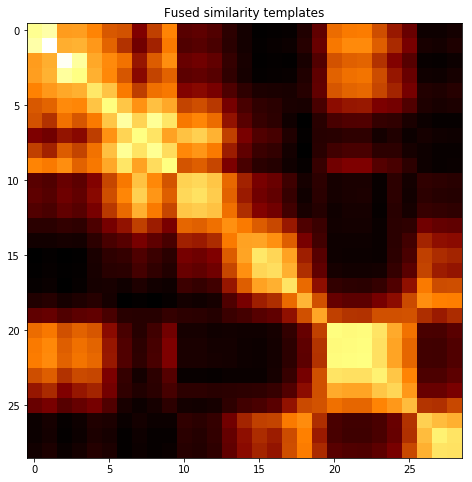

subject 20; gesture 4_1_2


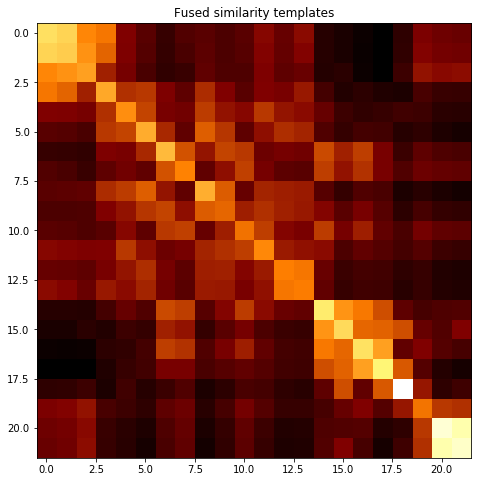

subject 20; gesture 5_1_2


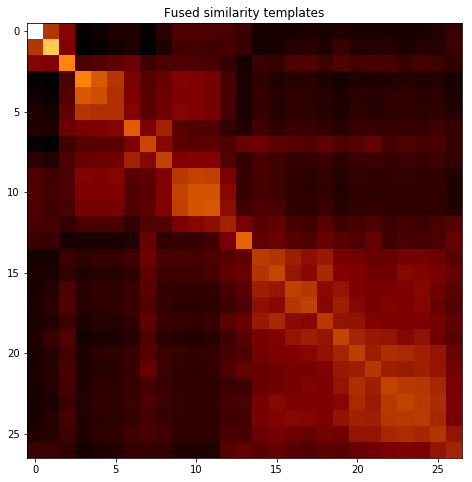

subject 20; gesture 6_1_2


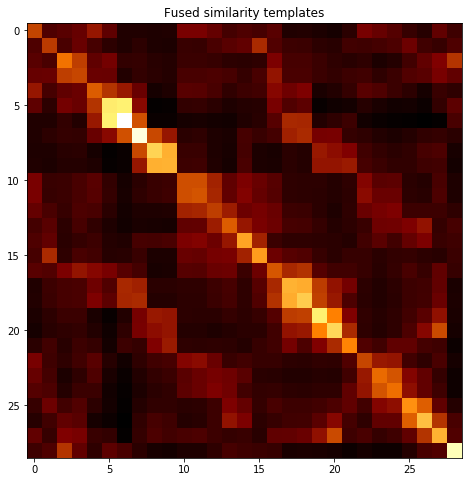

subject 20; gesture 4_0_1


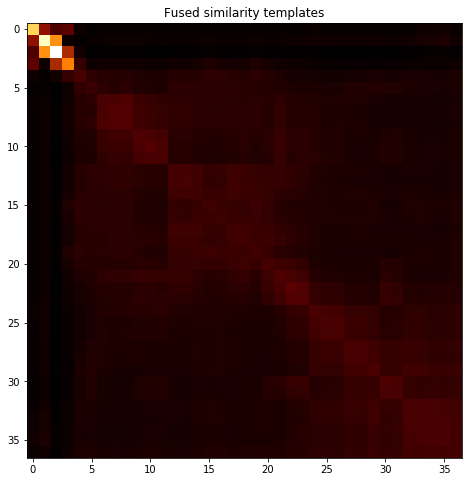

subject 20; gesture 3_0_2


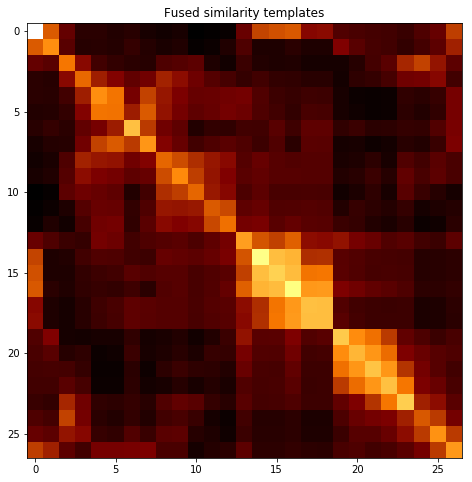

subject 20; gesture 5_1_1


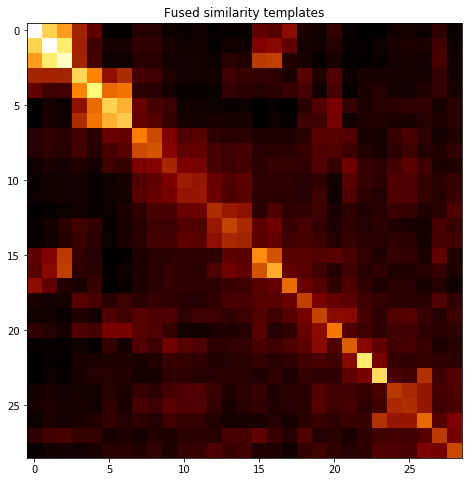

subject 20; gesture 6_1_1


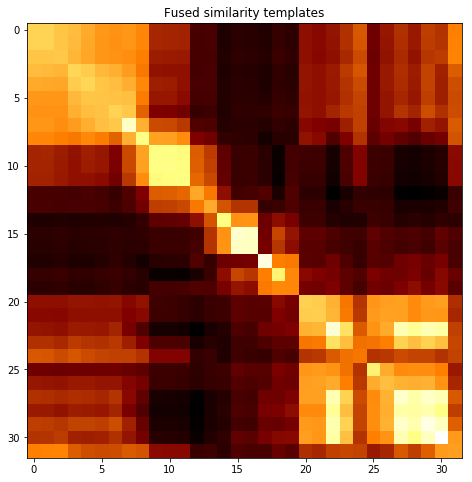

subject 20; gesture 6_0_2


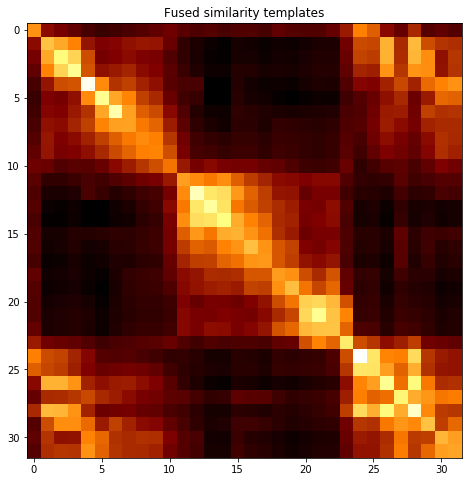

subject 20; gesture 3_1_2


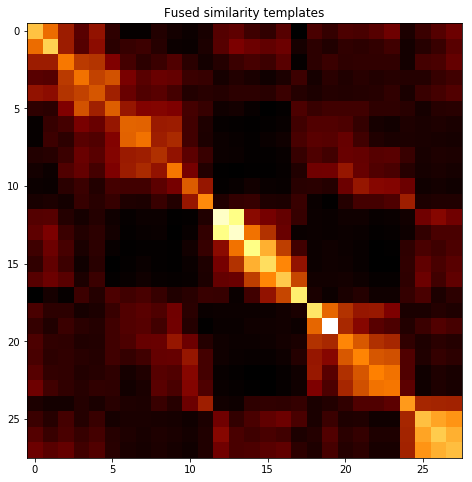

subject 20; gesture 3_1_1


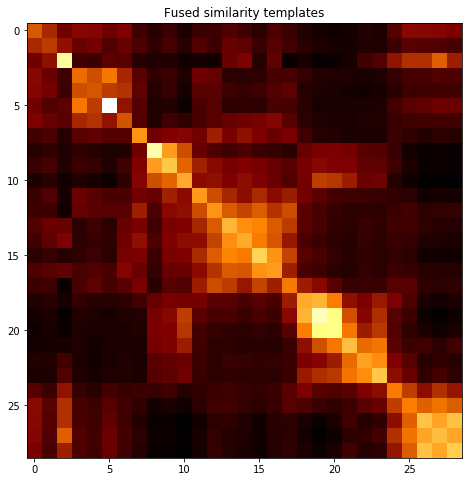

subject 20; gesture 6_0_1


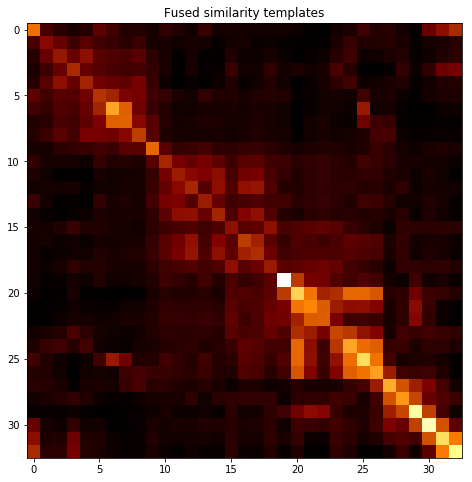

subject 20; gesture 5_0_1


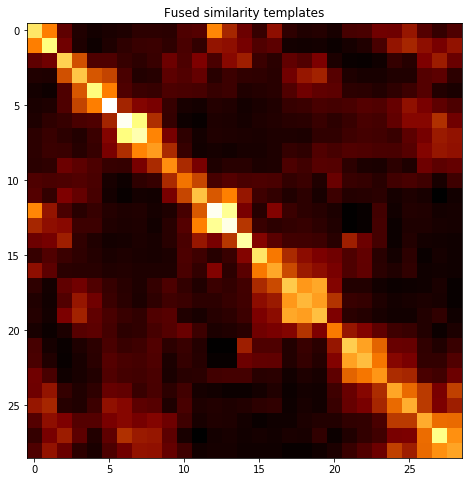

subject 20; gesture 4_0_2


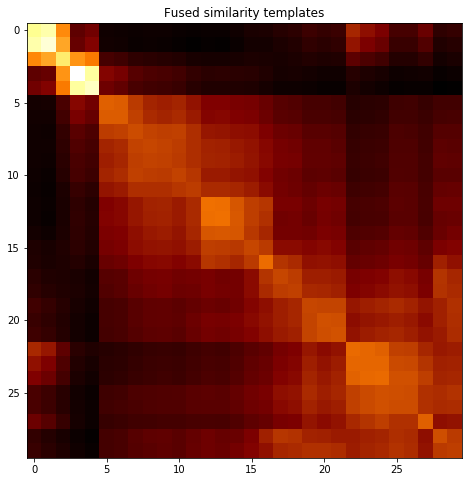

31
subject 31; gesture 5_0_2


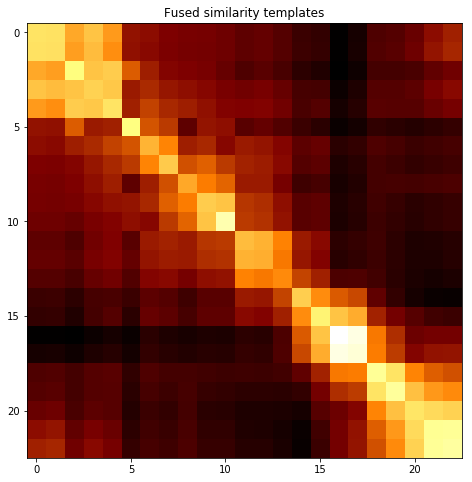

subject 31; gesture 3_0_1


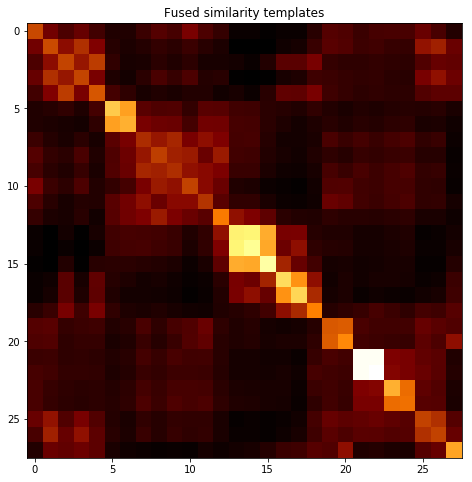

subject 31; gesture 4_1_1


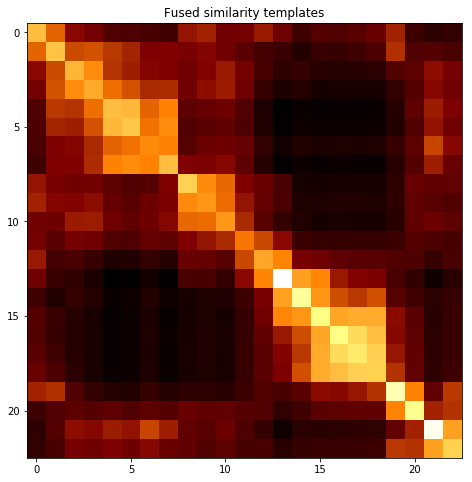

subject 31; gesture 4_1_2


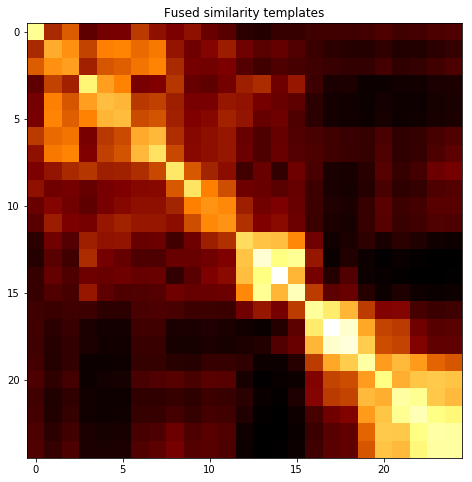

subject 31; gesture 5_1_2


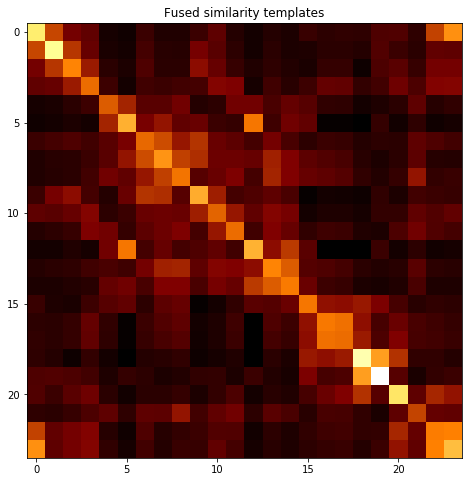

subject 31; gesture 6_1_2


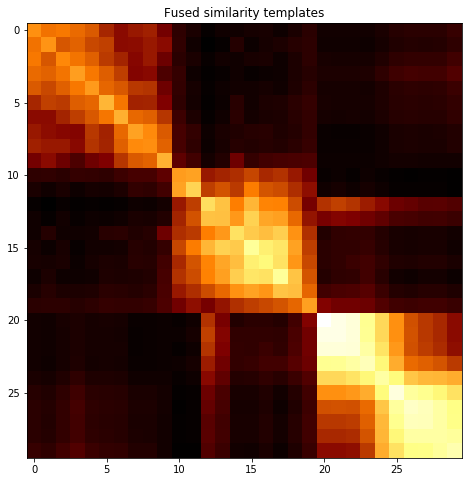

subject 31; gesture 4_0_1


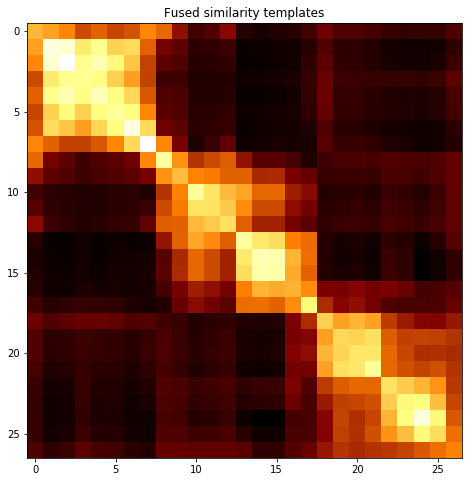

subject 31; gesture 3_0_2


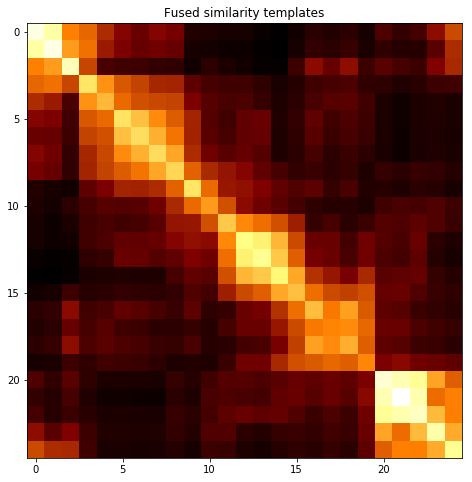

subject 31; gesture 5_1_1


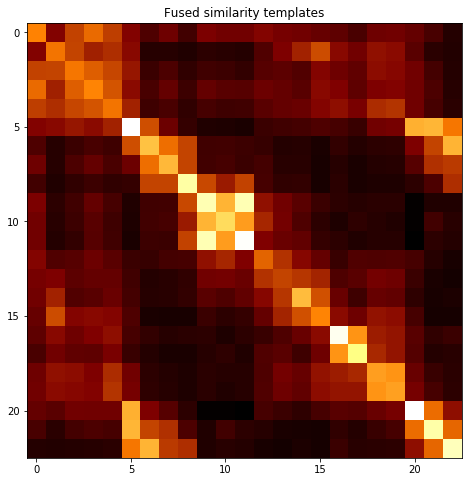

subject 31; gesture 6_1_1


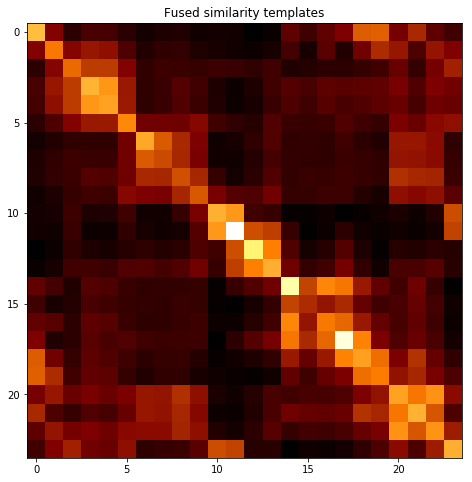

subject 31; gesture 6_0_2


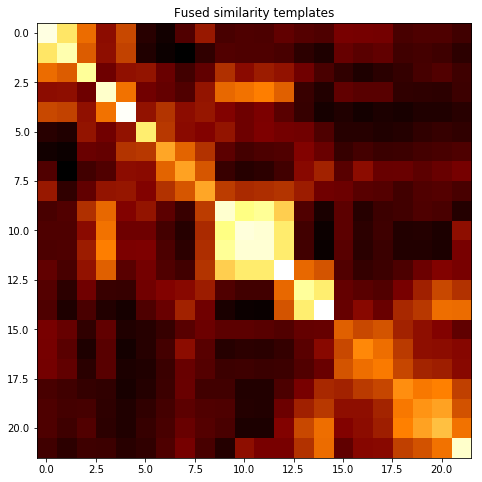

subject 31; gesture 3_1_2


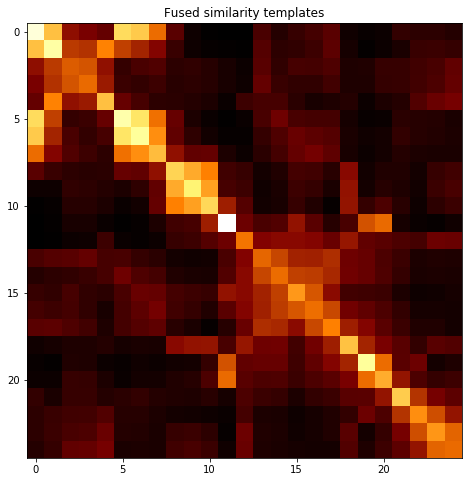

subject 31; gesture 3_1_1


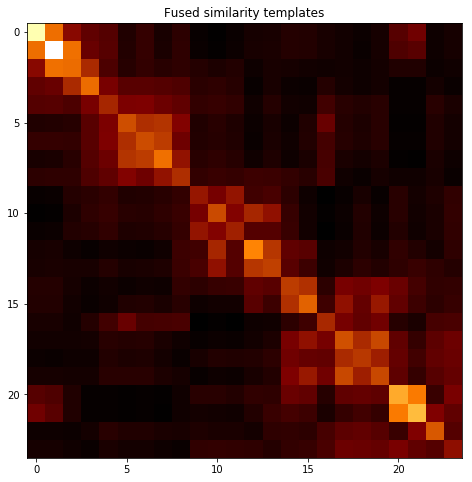

subject 31; gesture 6_0_1


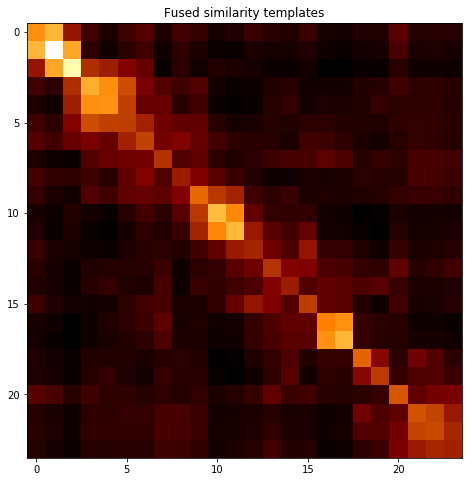

subject 31; gesture 5_0_1


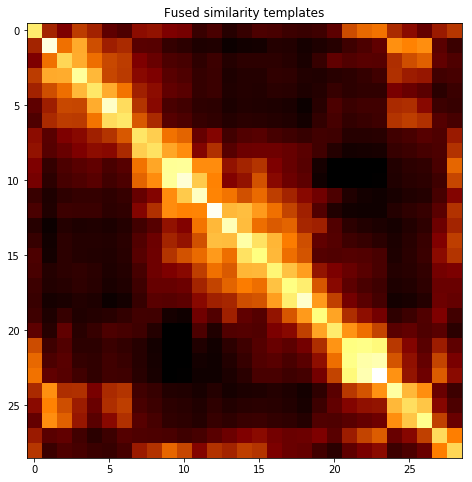

subject 31; gesture 4_0_2


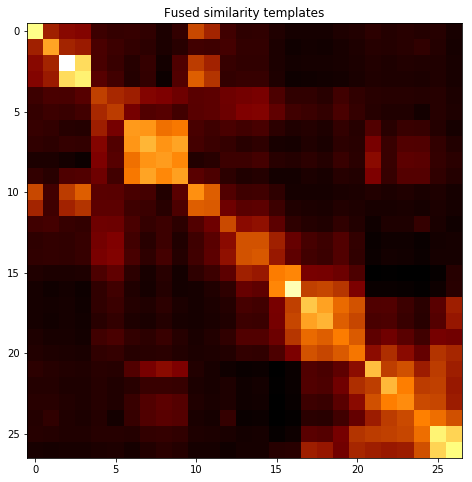

13
subject 13; gesture 5_0_2


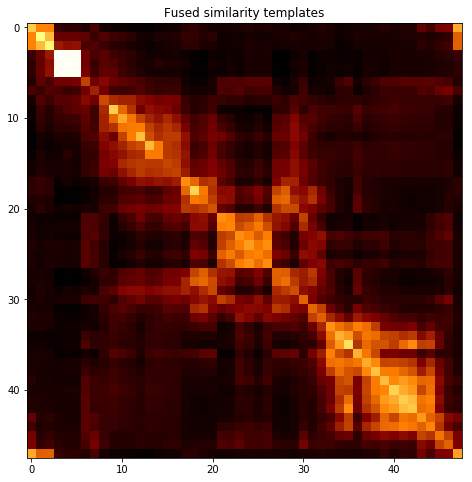

subject 13; gesture 3_0_1


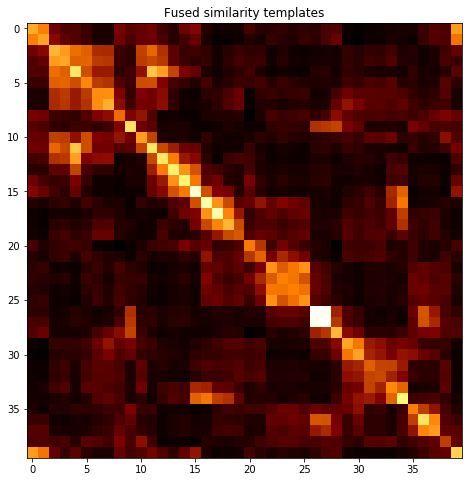

subject 13; gesture 4_1_1


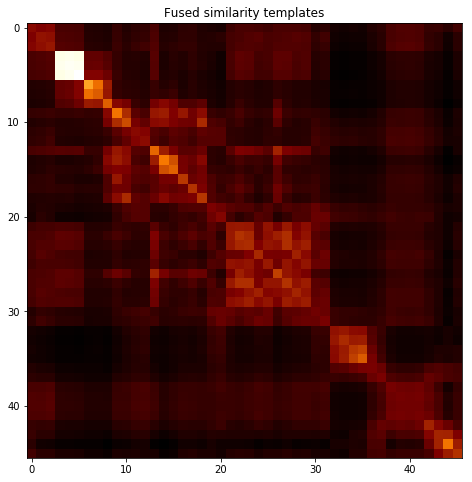

subject 13; gesture 4_1_2


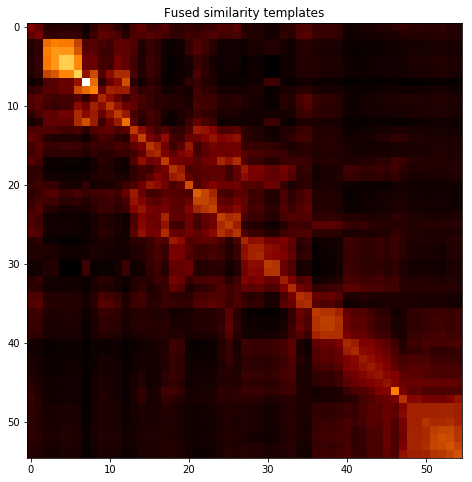

subject 13; gesture 5_1_2


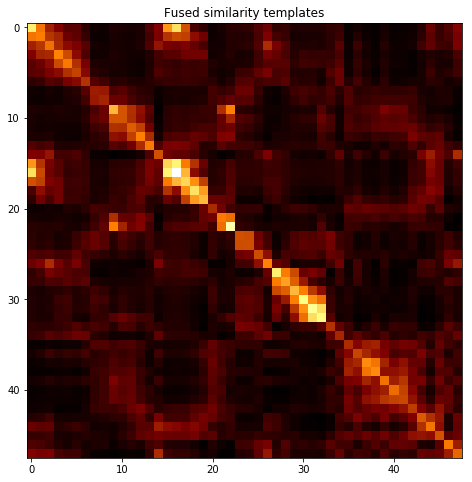

subject 13; gesture 6_1_2


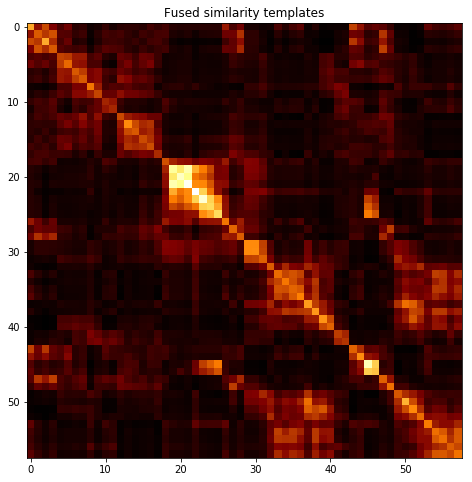

subject 13; gesture 4_0_1


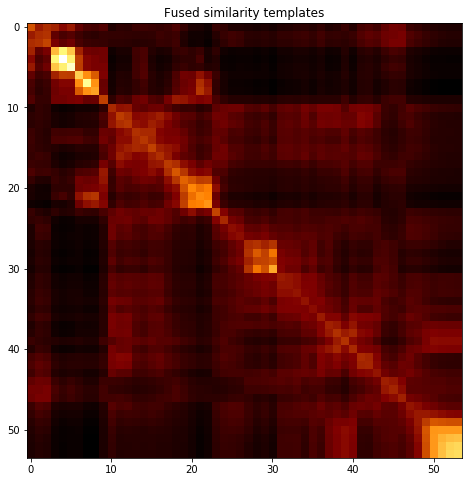

subject 13; gesture 3_0_2


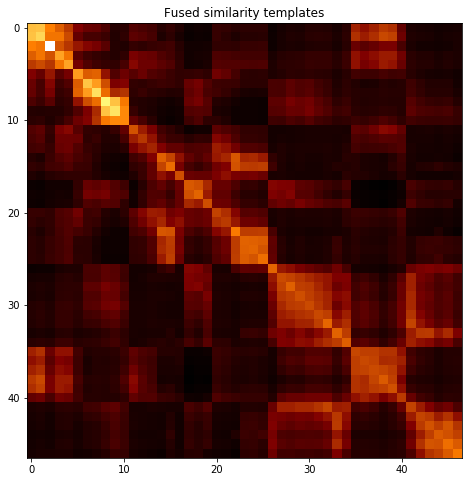

subject 13; gesture 5_1_1


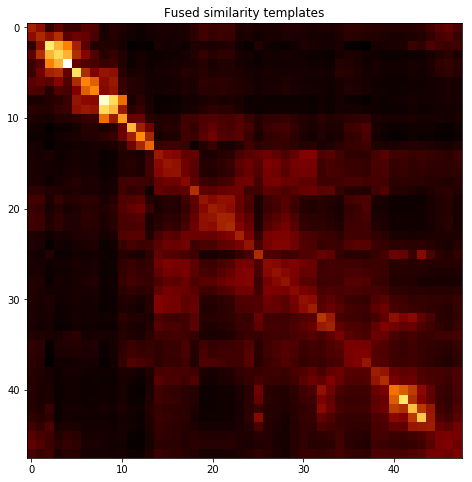

subject 13; gesture 6_1_1


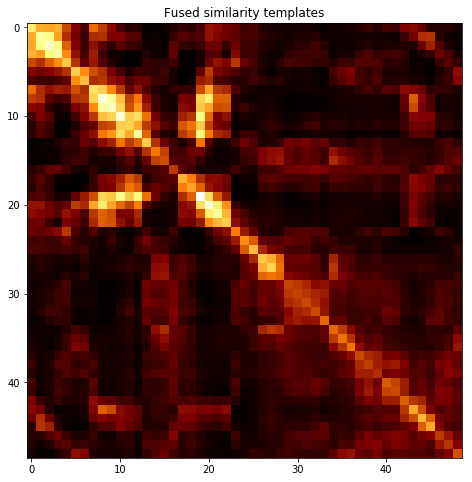

subject 13; gesture 6_0_2


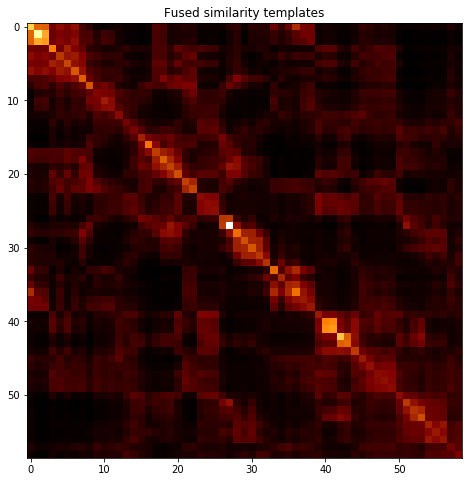

subject 13; gesture 3_1_2


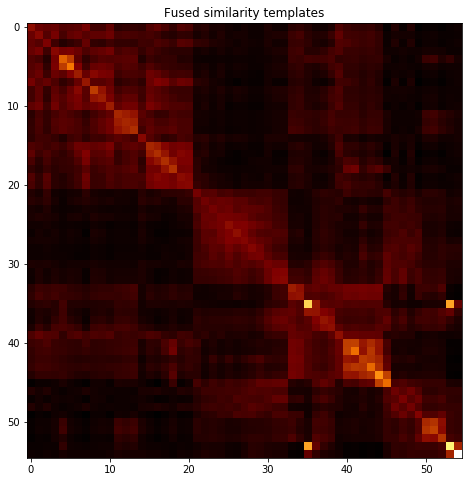

subject 13; gesture 3_1_1


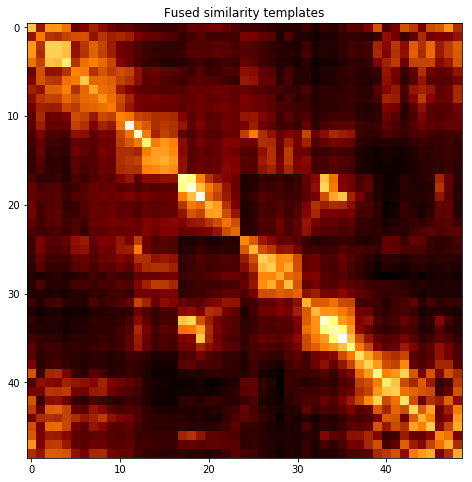

subject 13; gesture 6_0_1


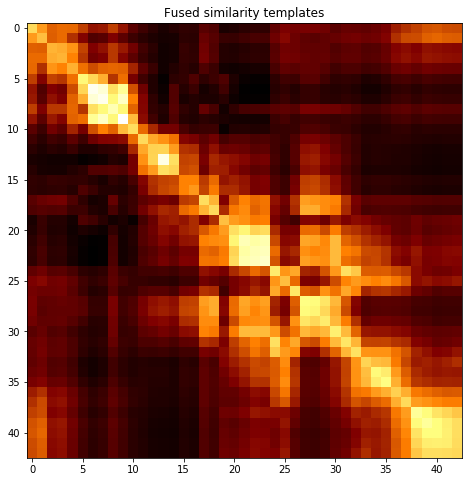

subject 13; gesture 5_0_1


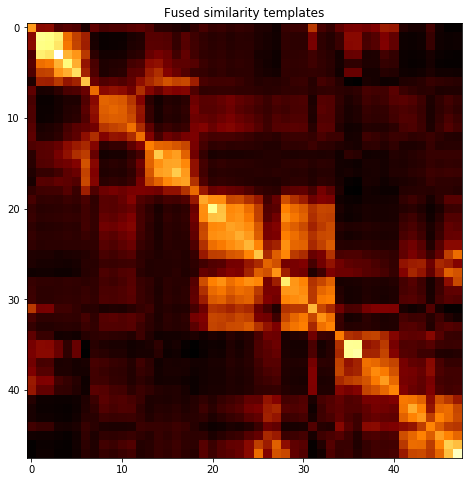

subject 13; gesture 4_0_2


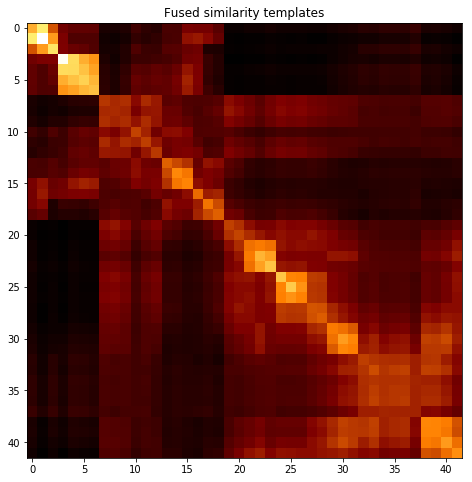

36
subject 36; gesture 5_0_2


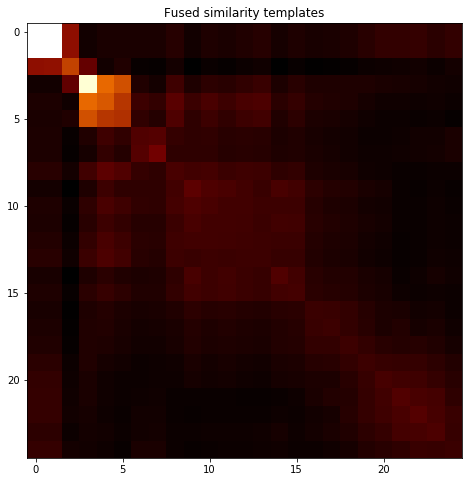

subject 36; gesture 3_0_1


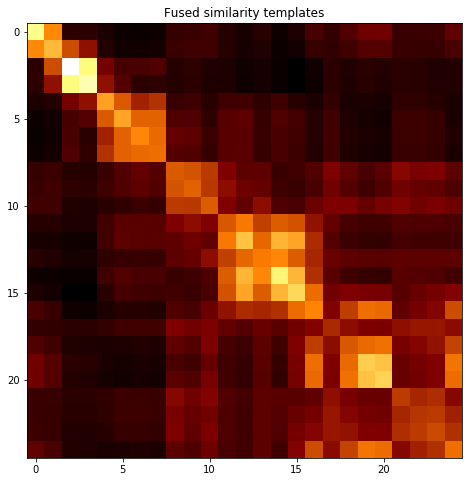

subject 36; gesture 4_1_1


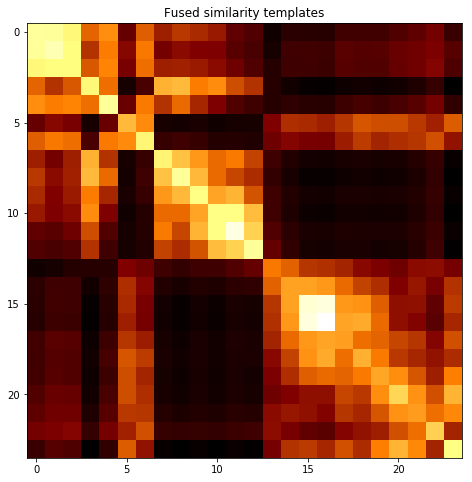

subject 36; gesture 4_1_2


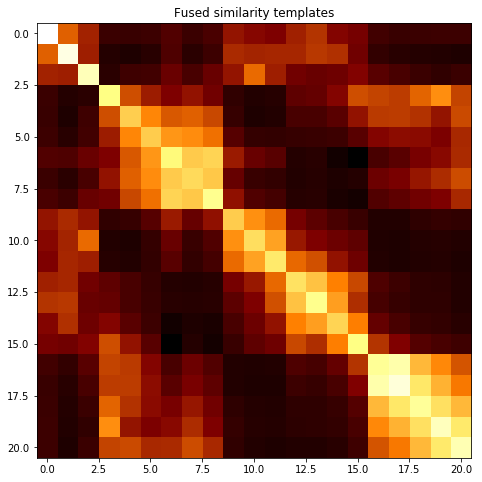

subject 36; gesture 5_1_2


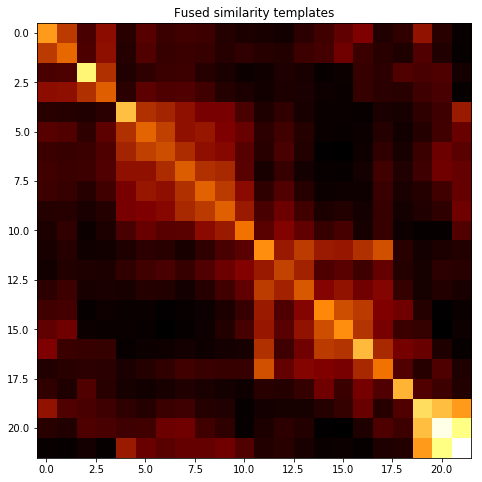

subject 36; gesture 6_1_2


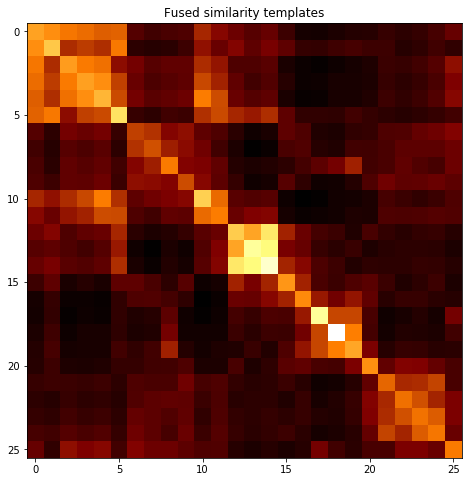

subject 36; gesture 4_0_1


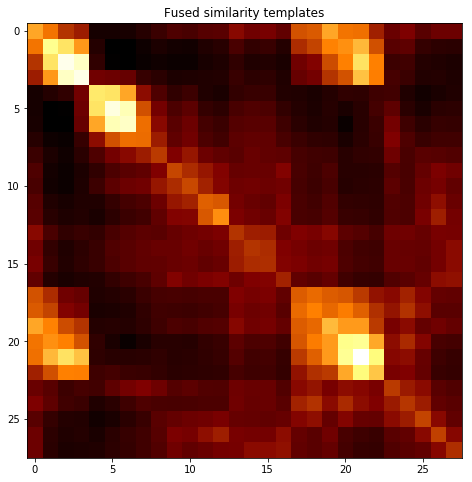

subject 36; gesture 3_0_2


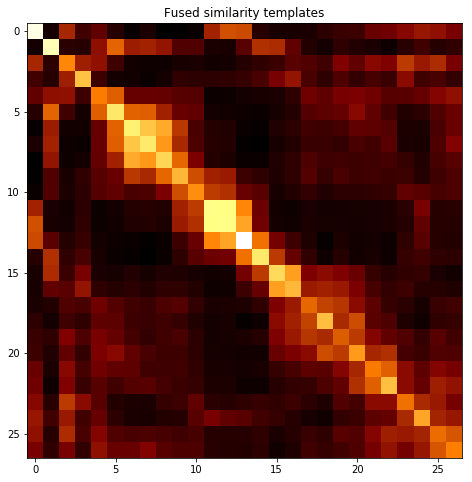

subject 36; gesture 5_1_1


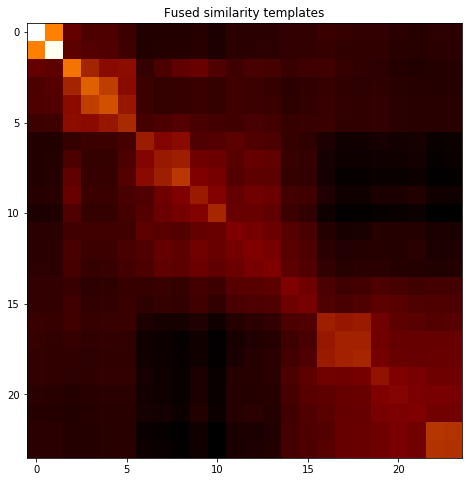

subject 36; gesture 6_1_1


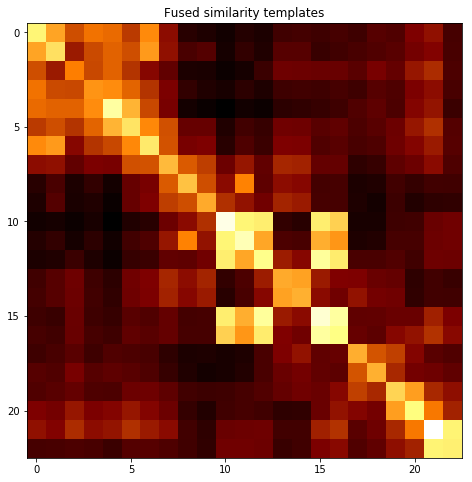

subject 36; gesture 6_0_2


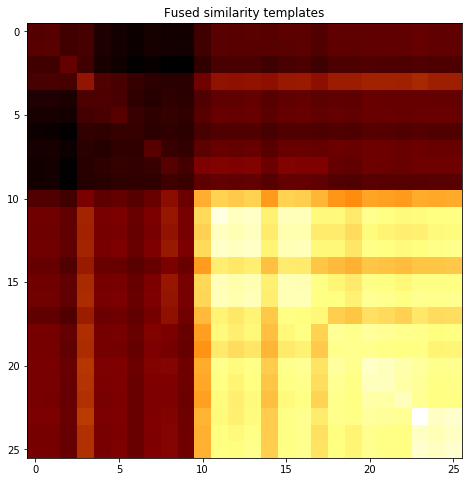

subject 36; gesture 3_1_2


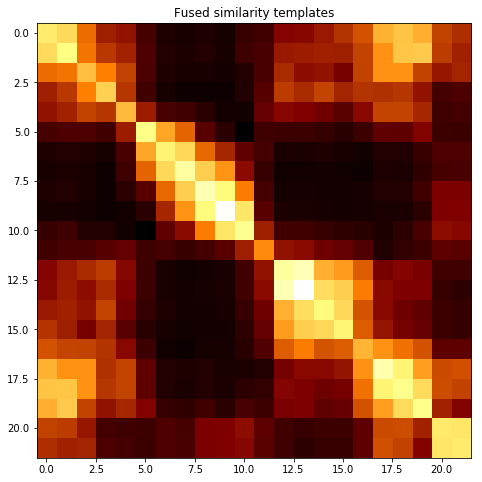

subject 36; gesture 3_1_1


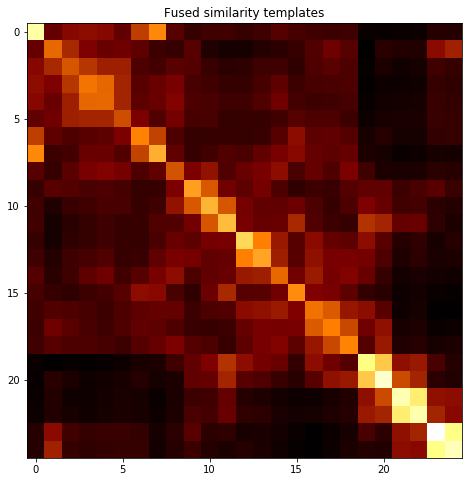

subject 36; gesture 6_0_1


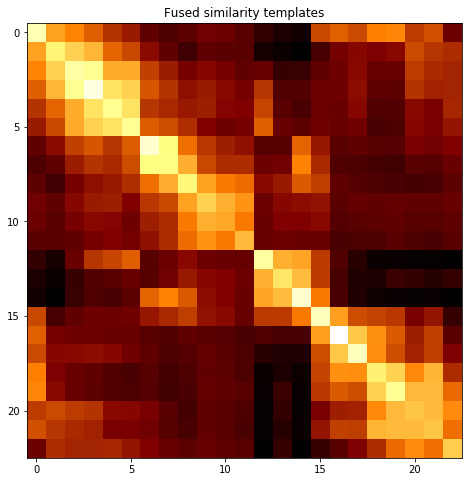

subject 36; gesture 5_0_1


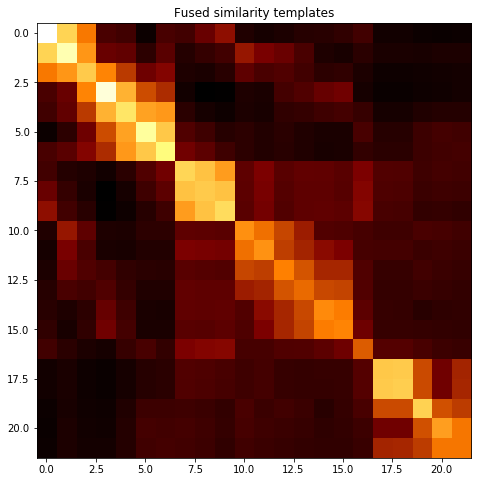

subject 36; gesture 4_0_2


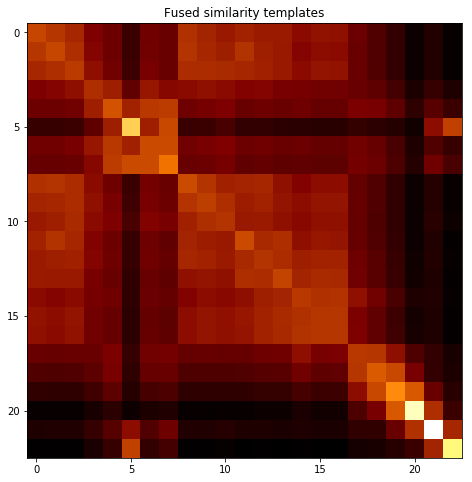

24
subject 24; gesture 5_0_2


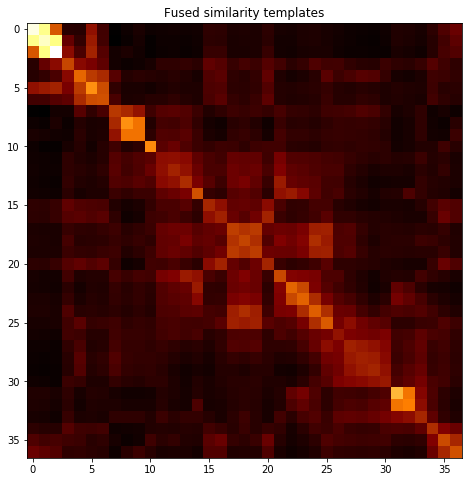

subject 24; gesture 3_0_1


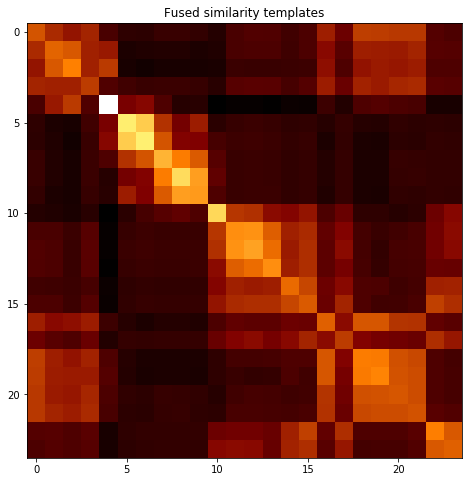

subject 24; gesture 4_1_1


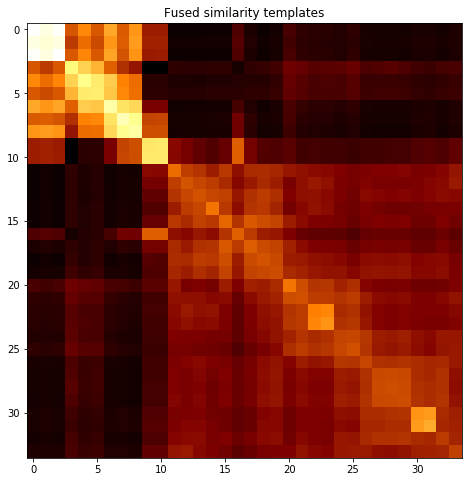

subject 24; gesture 4_1_2


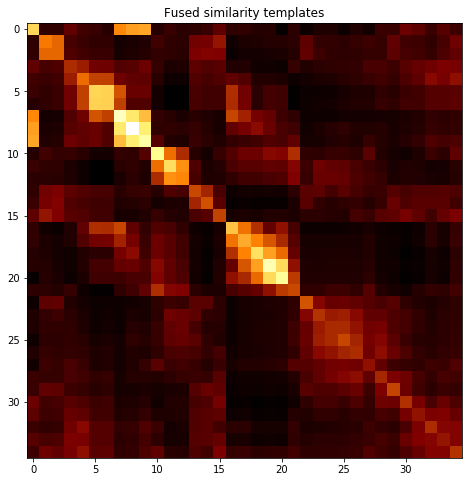

subject 24; gesture 5_1_2


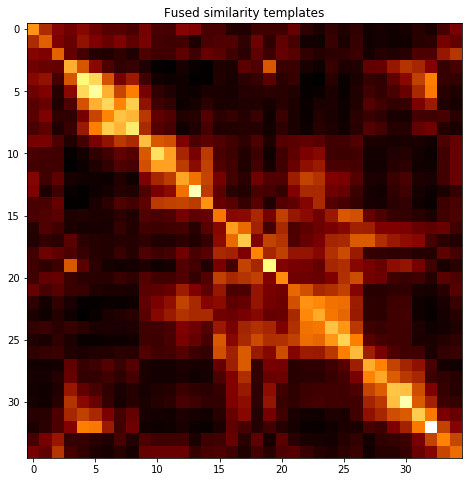

subject 24; gesture 6_1_2


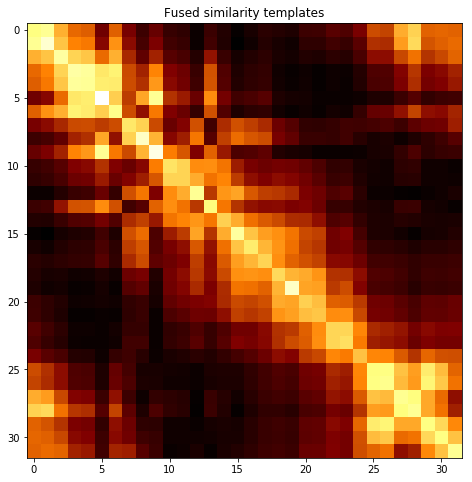

subject 24; gesture 4_0_1


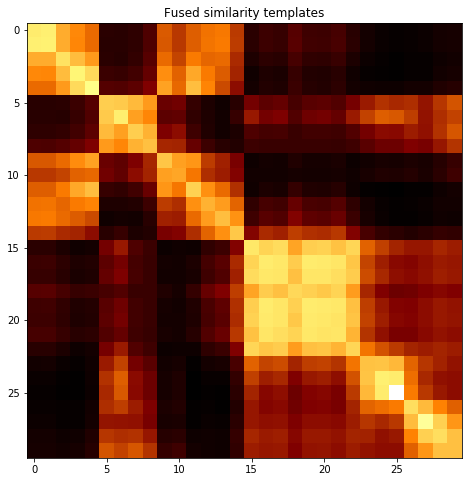

subject 24; gesture 3_0_2


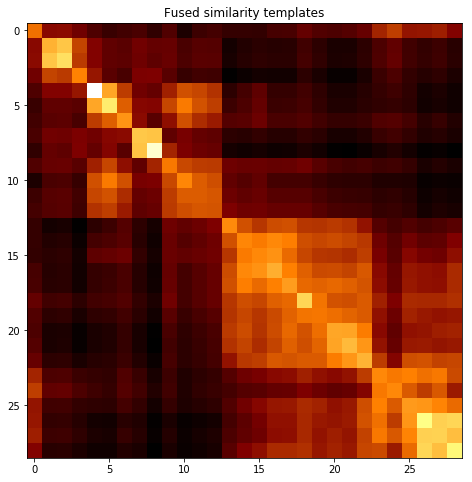

subject 24; gesture 5_1_1


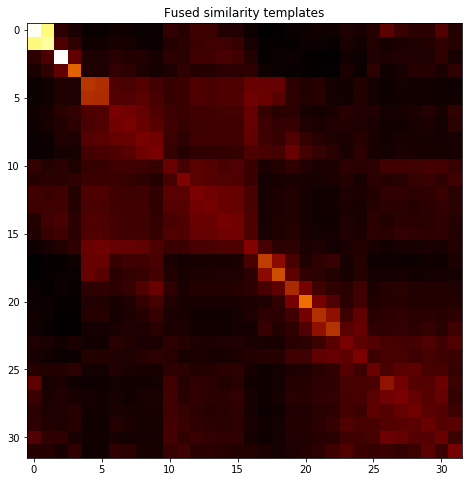

subject 24; gesture 6_1_1


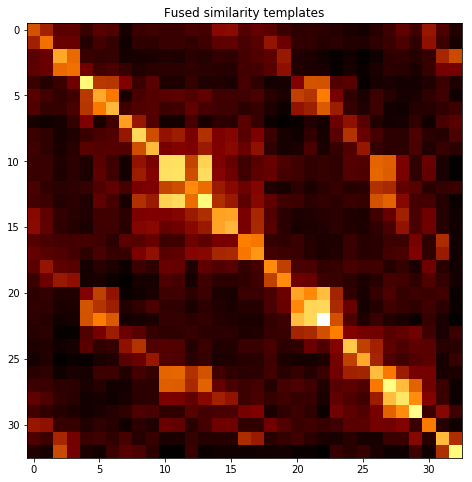

subject 24; gesture 6_0_2


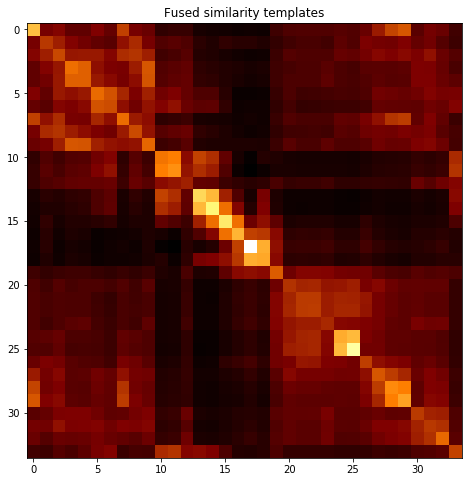

subject 24; gesture 3_1_2


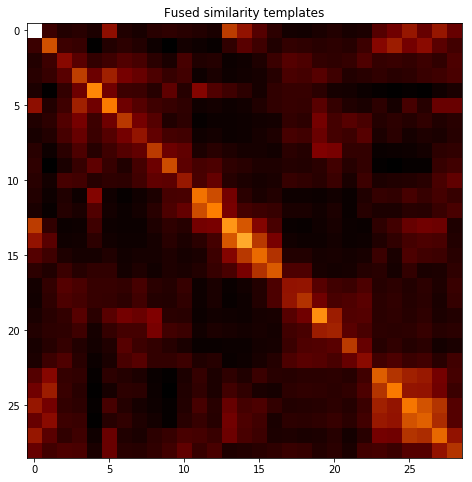

subject 24; gesture 3_1_1


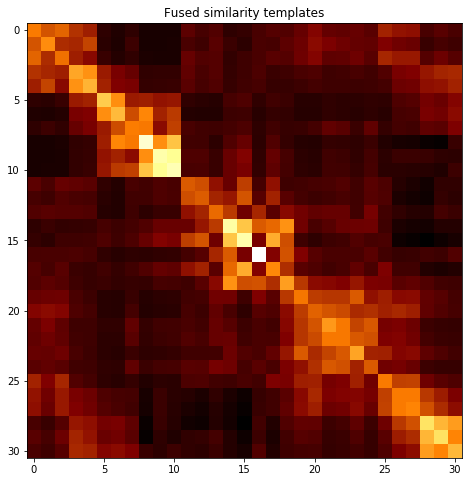

subject 24; gesture 6_0_1


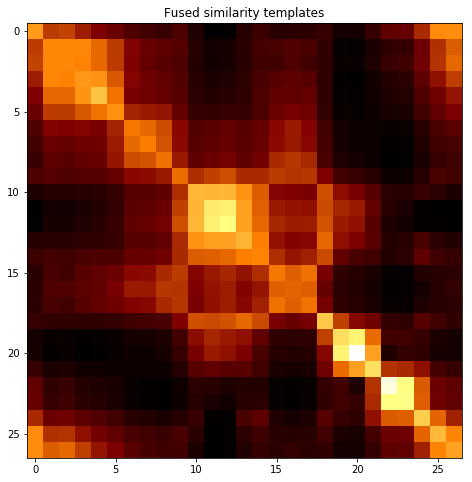

subject 24; gesture 5_0_1


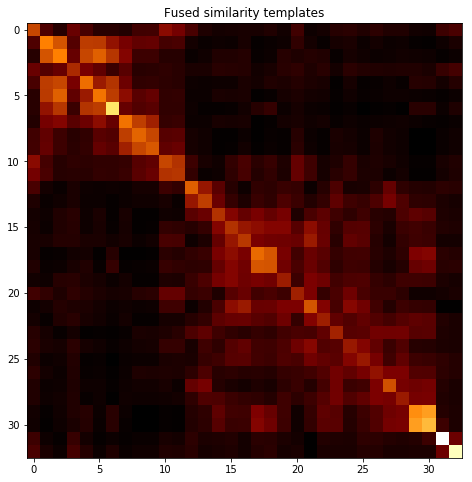

subject 24; gesture 4_0_2


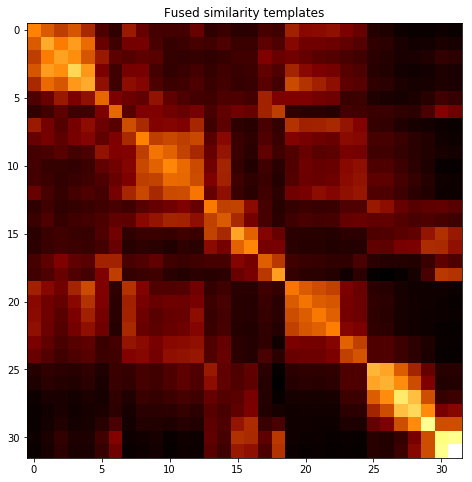

33
subject 33; gesture 5_0_2


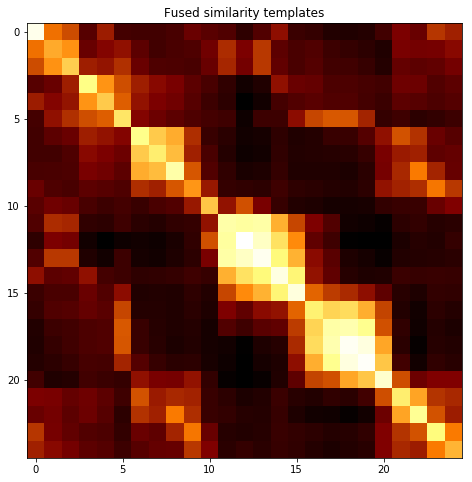

subject 33; gesture 3_0_1


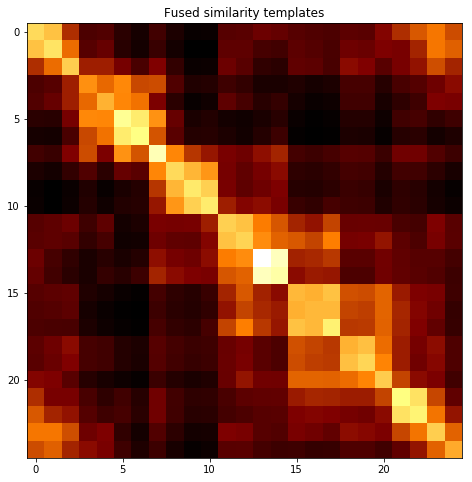

subject 33; gesture 4_1_1


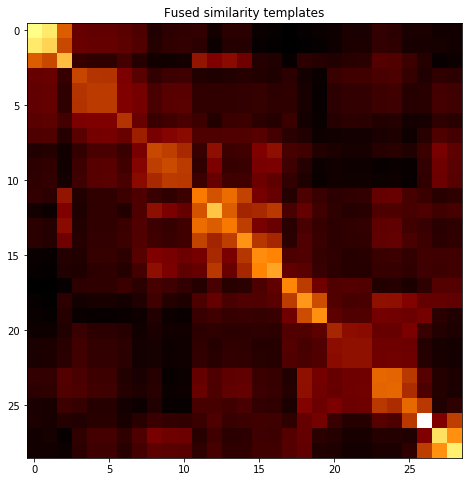

subject 33; gesture 4_1_2


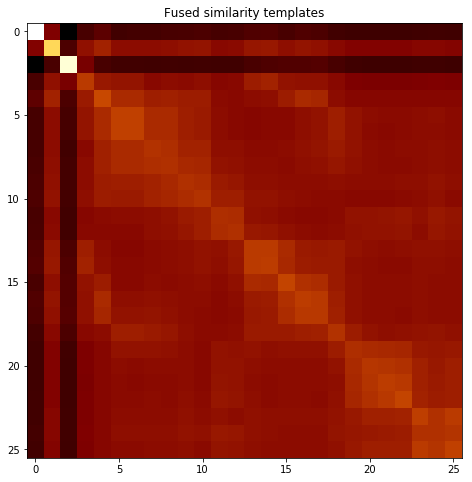

subject 33; gesture 5_1_2


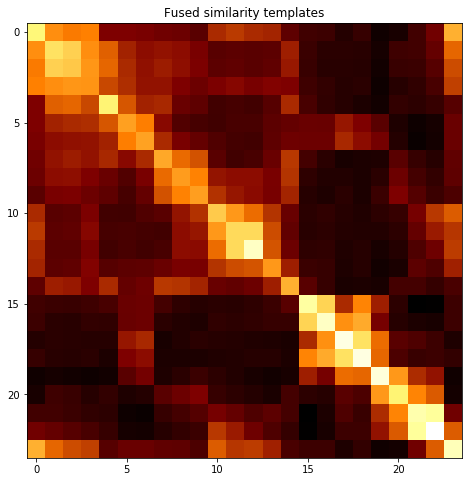

subject 33; gesture 6_1_2


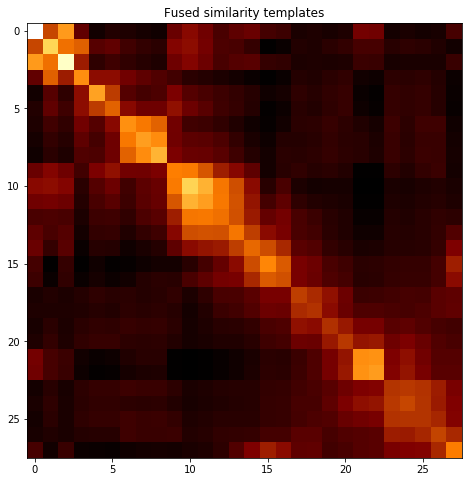

subject 33; gesture 4_0_1


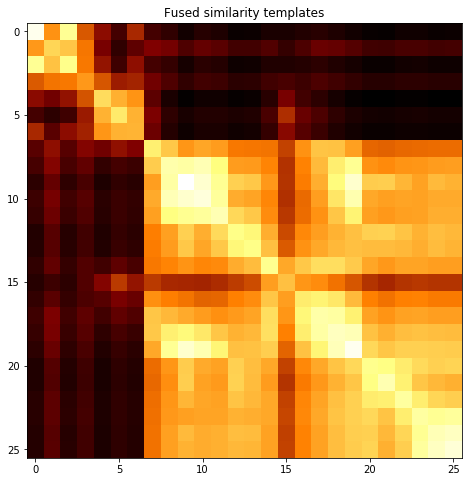

subject 33; gesture 3_0_2


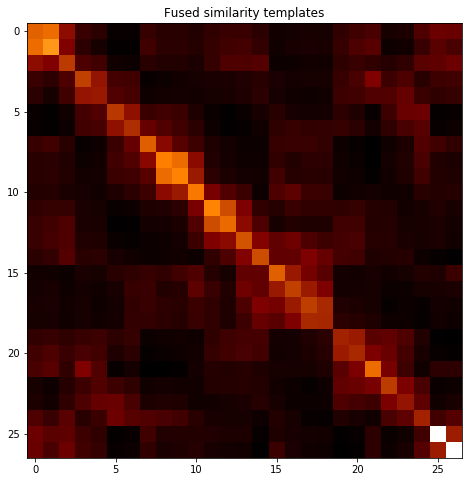

subject 33; gesture 5_1_1


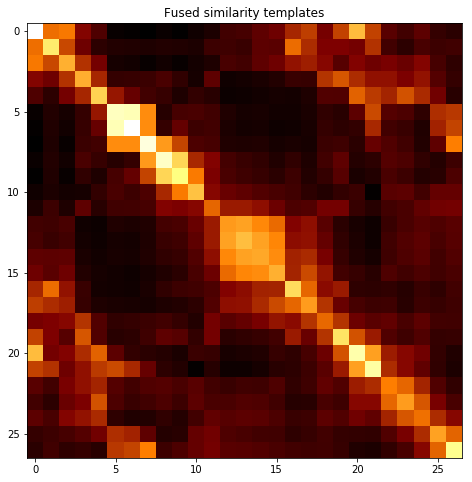

subject 33; gesture 6_1_1


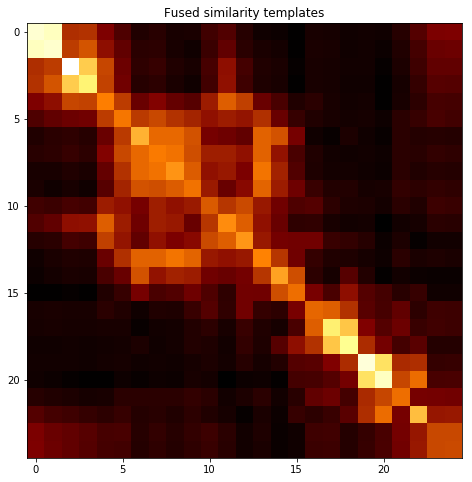

subject 33; gesture 6_0_2


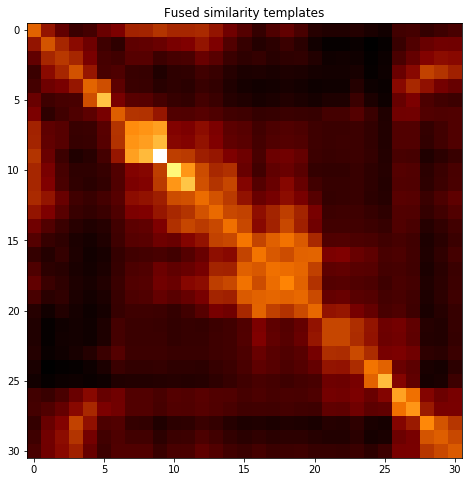

subject 33; gesture 3_1_2


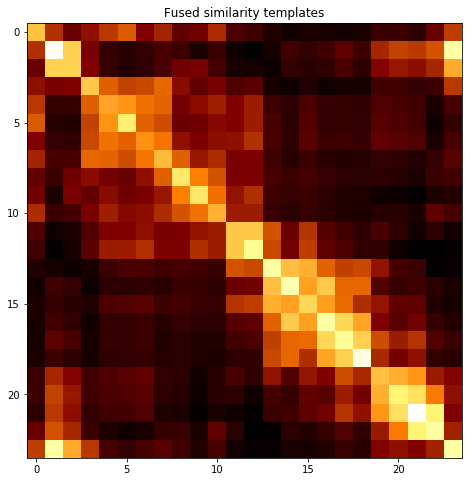

subject 33; gesture 3_1_1


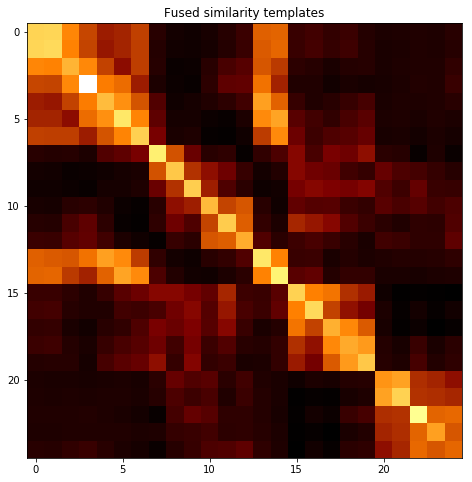

subject 33; gesture 6_0_1


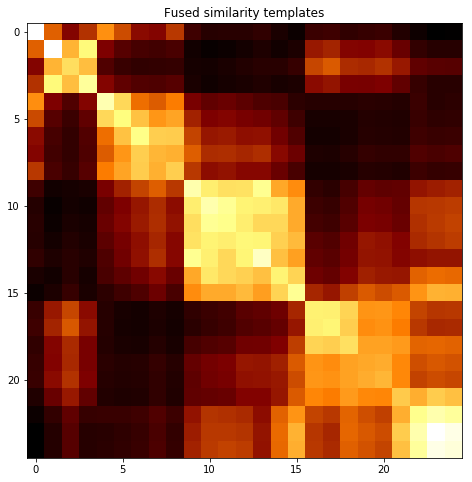

subject 33; gesture 5_0_1


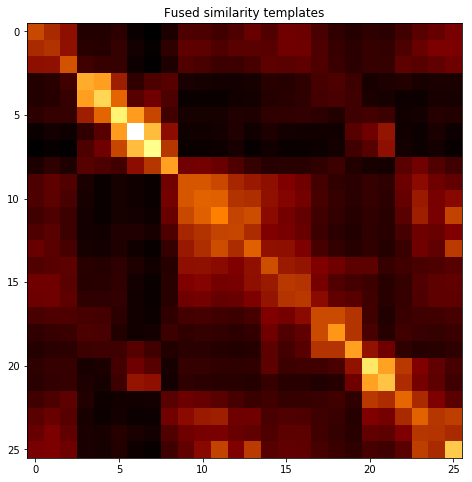

subject 33; gesture 4_0_2


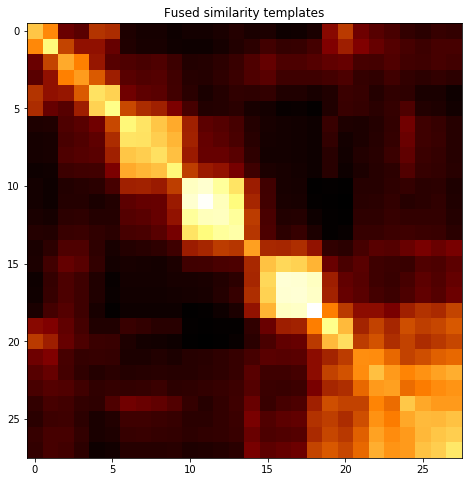

11
subject 11; gesture 5_0_2


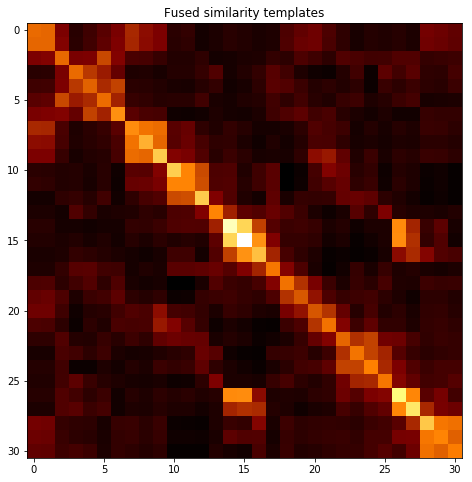

subject 11; gesture 3_0_1


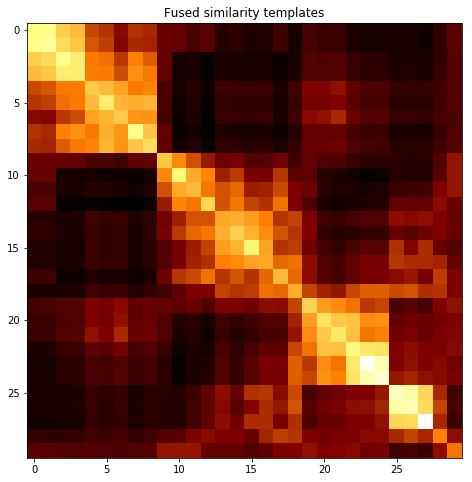

subject 11; gesture 4_1_1


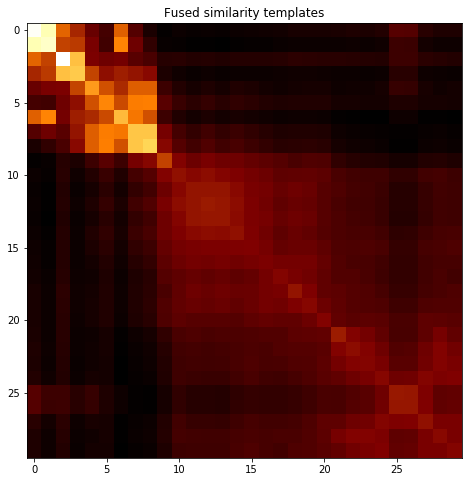

subject 11; gesture 4_1_2


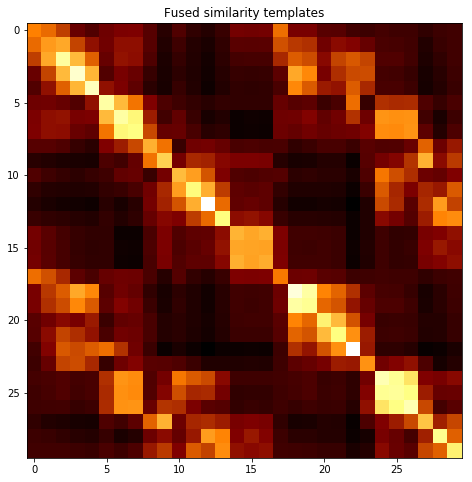

subject 11; gesture 5_1_2


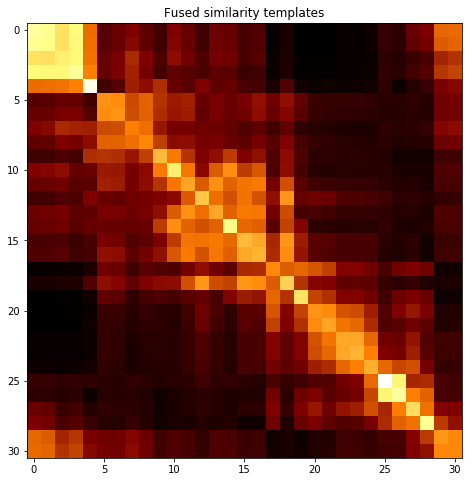

subject 11; gesture 6_1_2


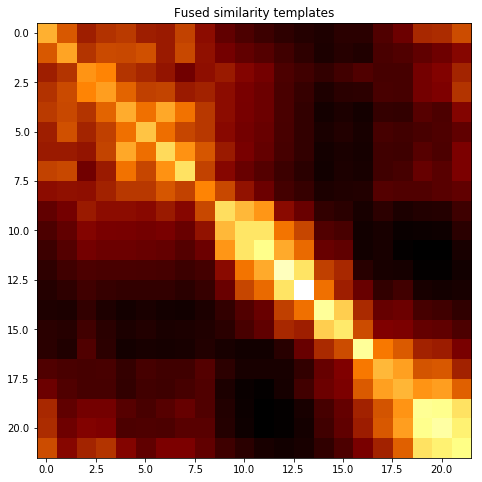

subject 11; gesture 4_0_1


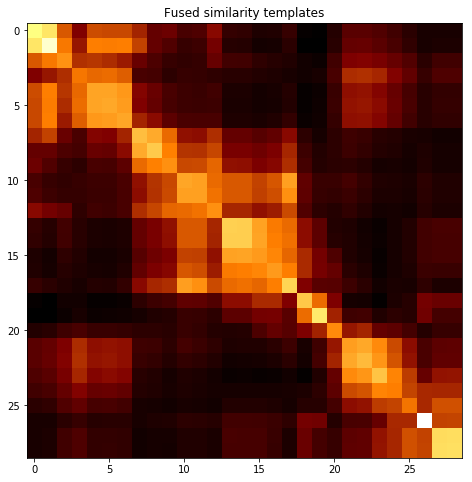

subject 11; gesture 3_0_2


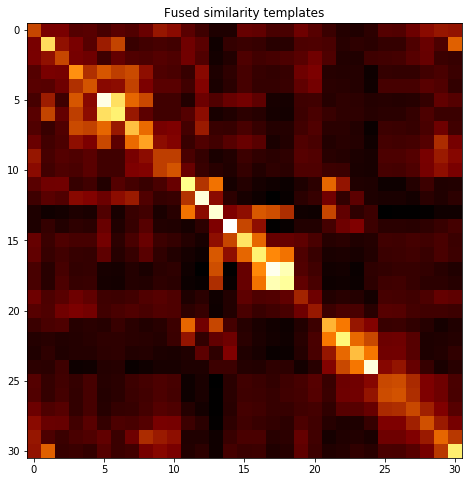

subject 11; gesture 5_1_1


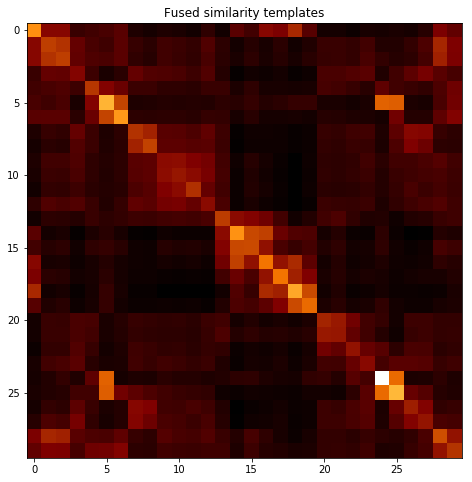

subject 11; gesture 6_1_1


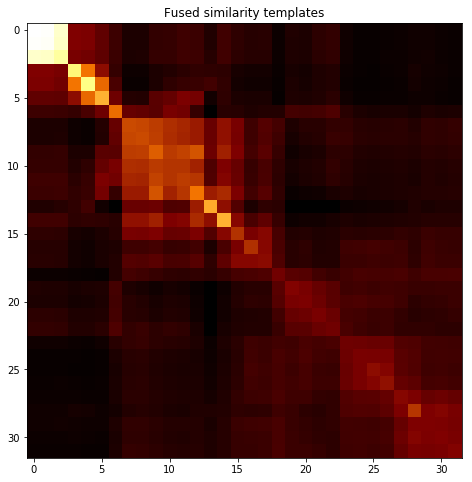

subject 11; gesture 6_0_2


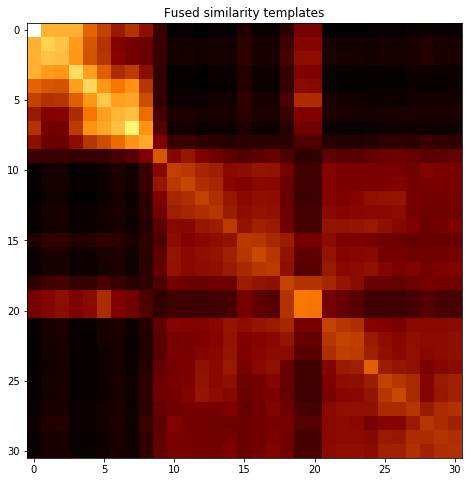

subject 11; gesture 3_1_2


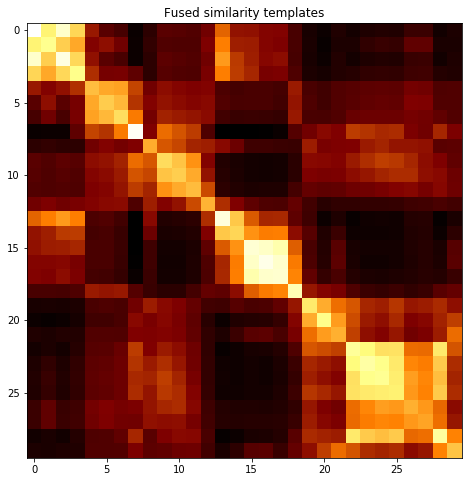

subject 11; gesture 3_1_1


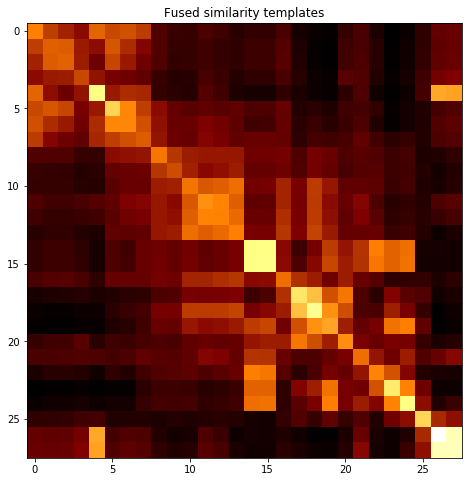

subject 11; gesture 6_0_1


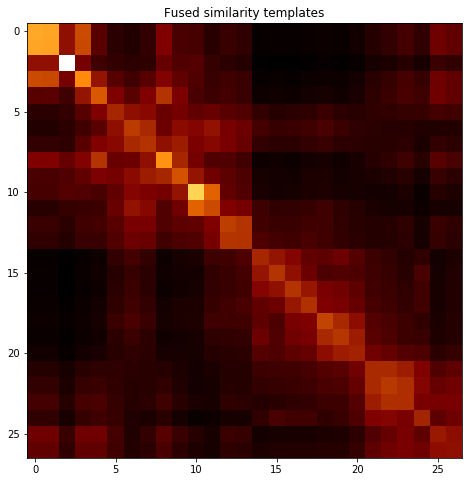

subject 11; gesture 5_0_1


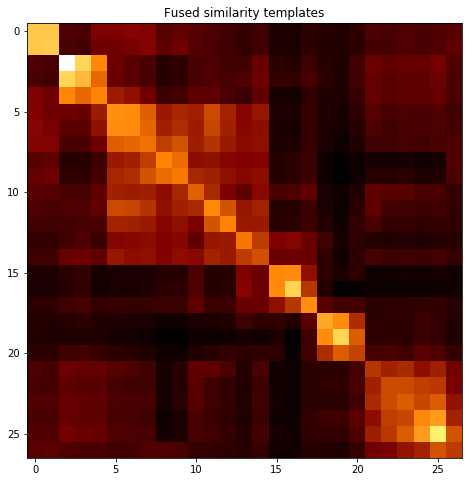

subject 11; gesture 4_0_2


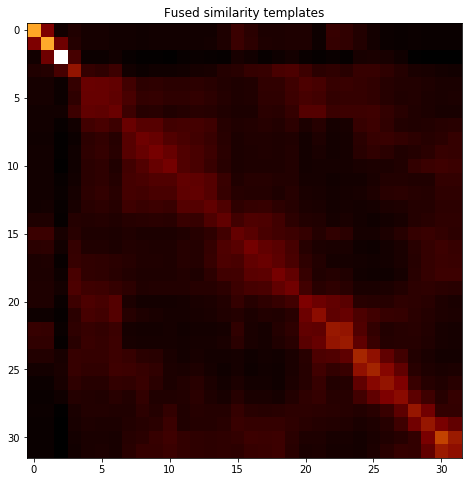

35
subject 35; gesture 5_0_2


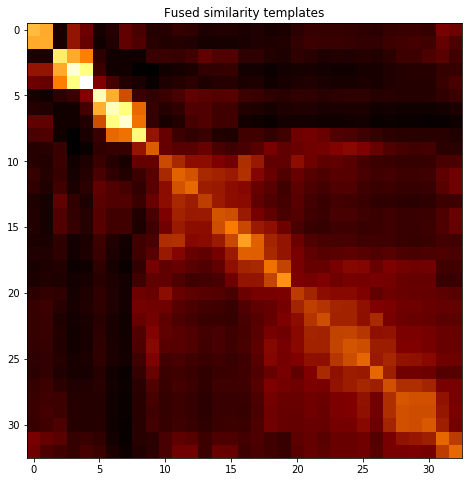

subject 35; gesture 3_0_1


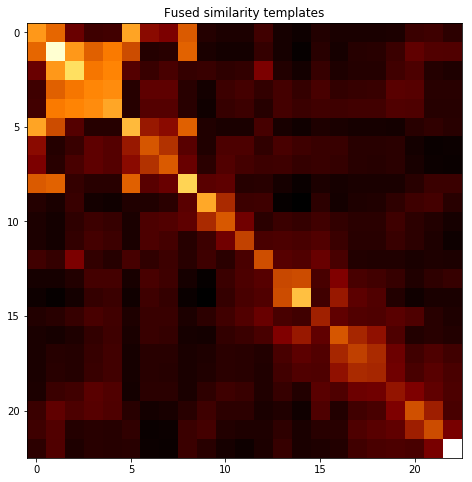

subject 35; gesture 4_1_1


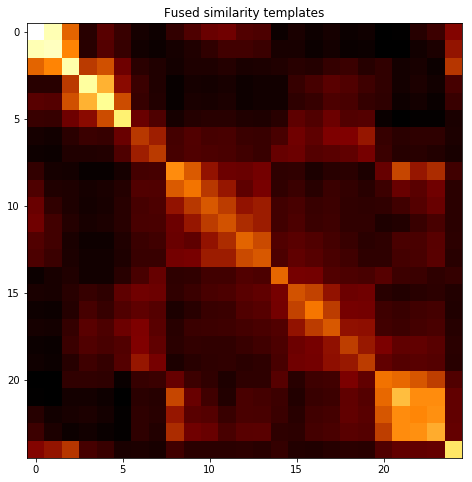

subject 35; gesture 4_1_2


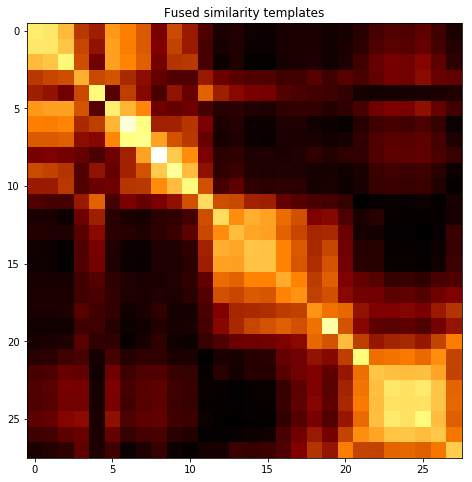

subject 35; gesture 5_1_2


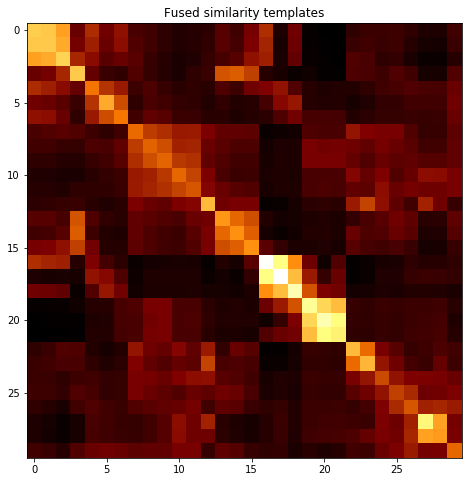

subject 35; gesture 6_1_2


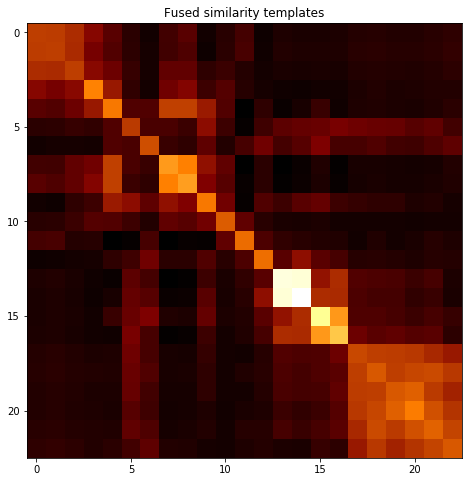

subject 35; gesture 4_0_1


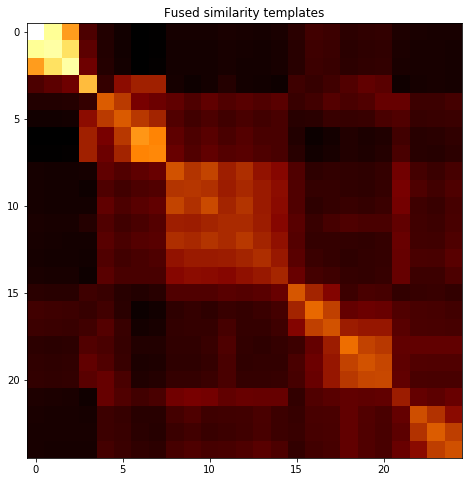

subject 35; gesture 3_0_2


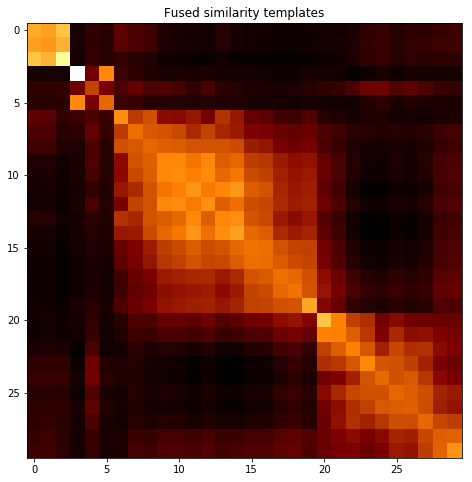

subject 35; gesture 5_1_1


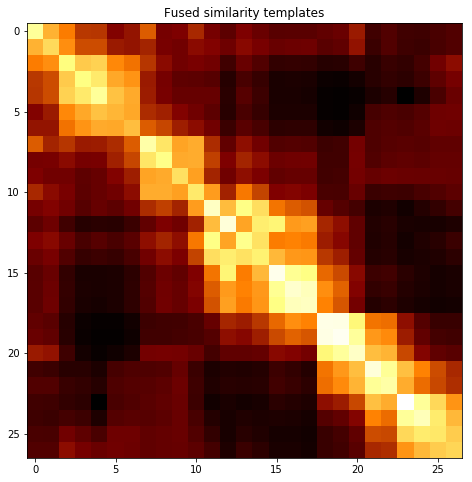

subject 35; gesture 6_1_1


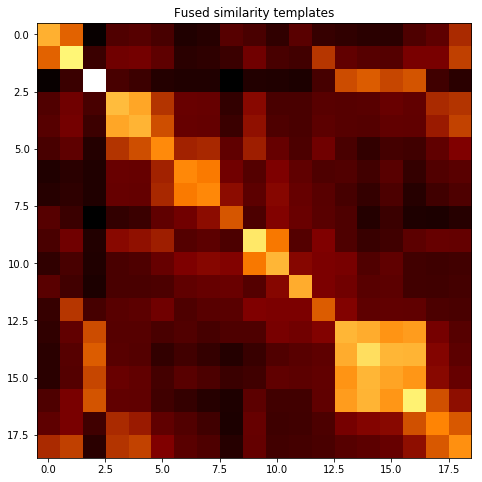

subject 35; gesture 6_0_2


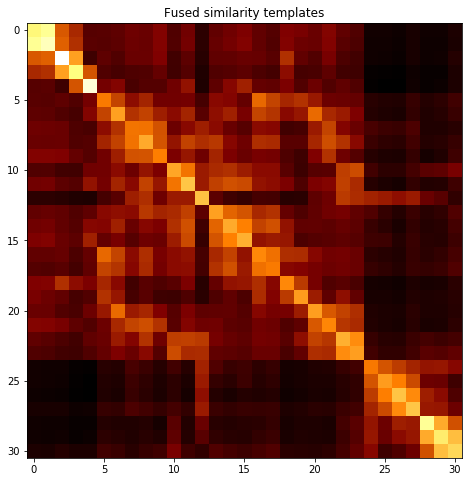

subject 35; gesture 3_1_2


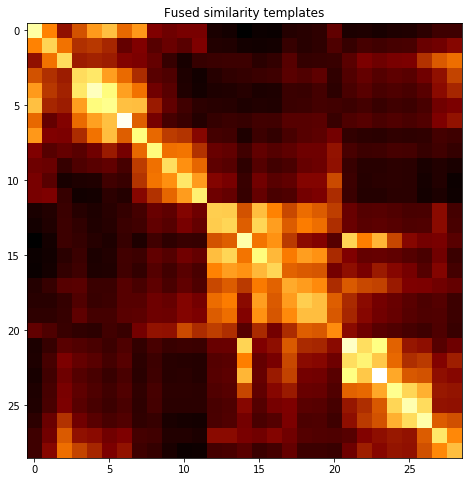

subject 35; gesture 3_1_1


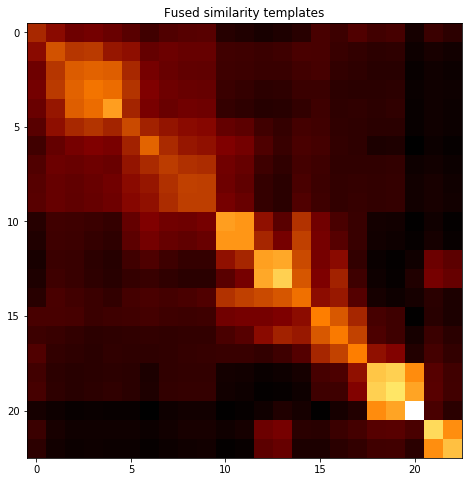

subject 35; gesture 6_0_1


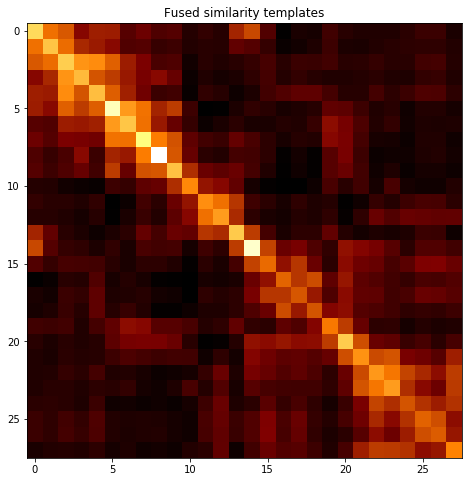

subject 35; gesture 5_0_1


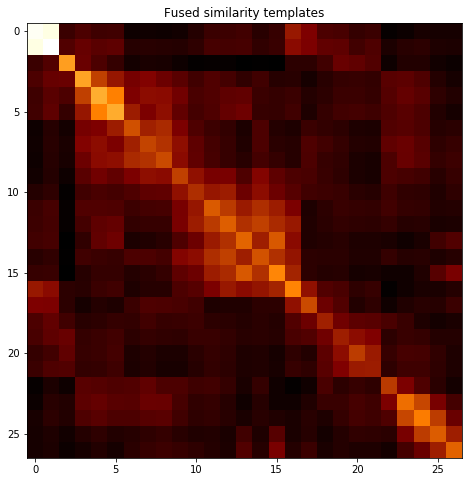

subject 35; gesture 4_0_2


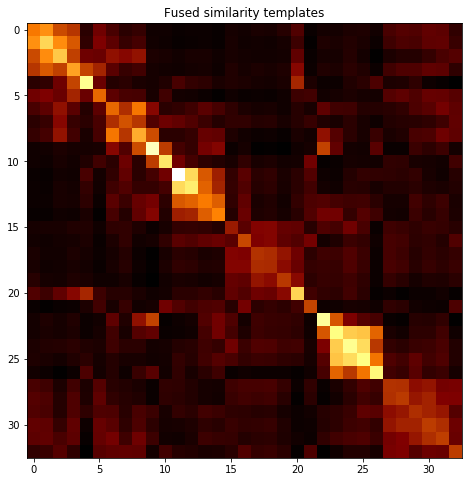

22
subject 22; gesture 5_0_2


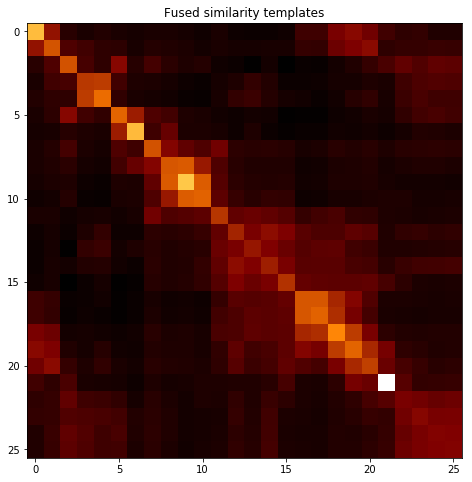

subject 22; gesture 3_0_1


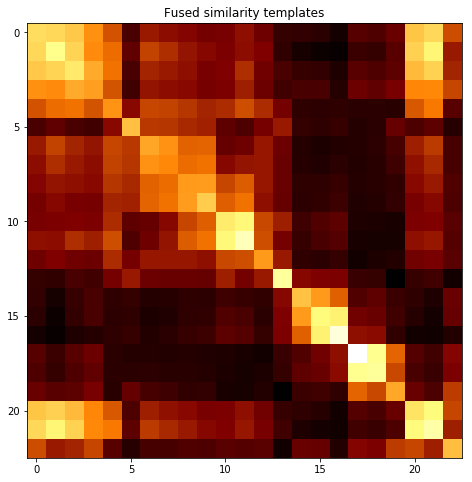

subject 22; gesture 4_1_1


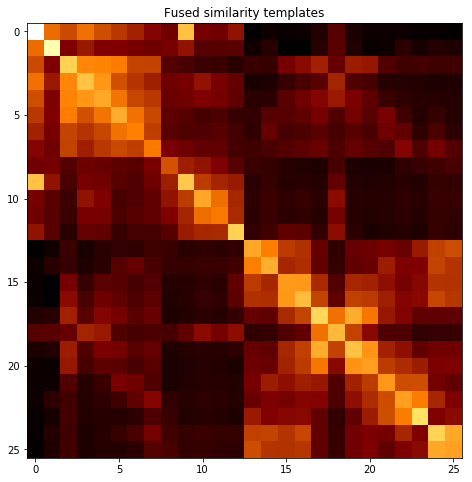

subject 22; gesture 4_1_2


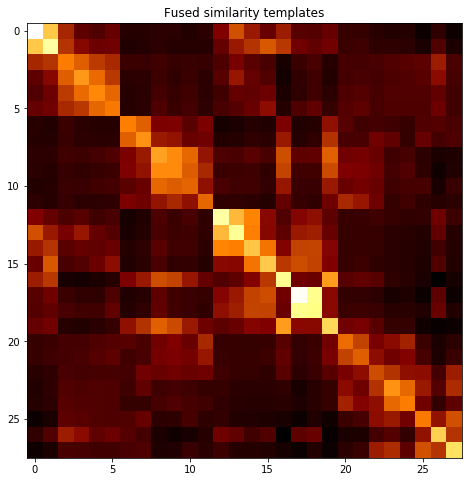

subject 22; gesture 5_1_2


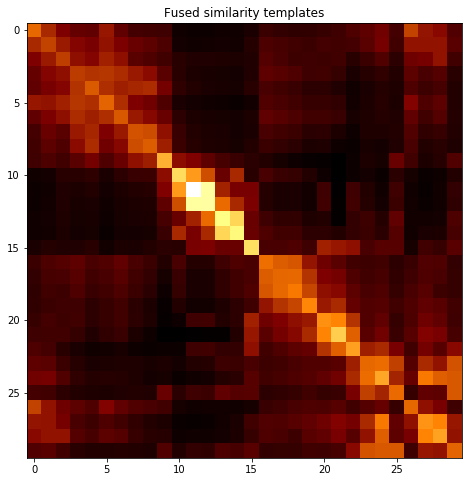

subject 22; gesture 6_1_2


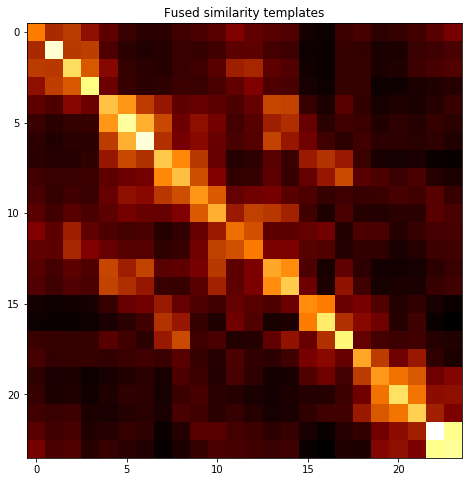

subject 22; gesture 4_0_1


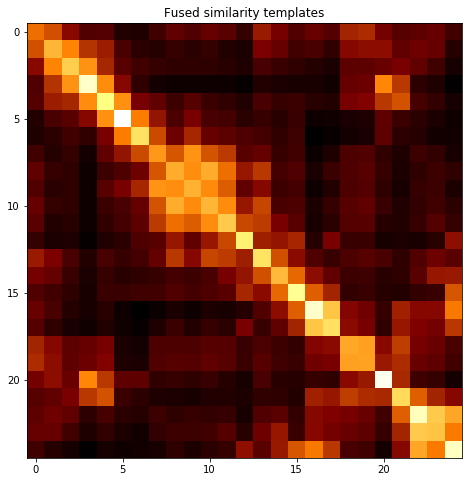

subject 22; gesture 3_0_2


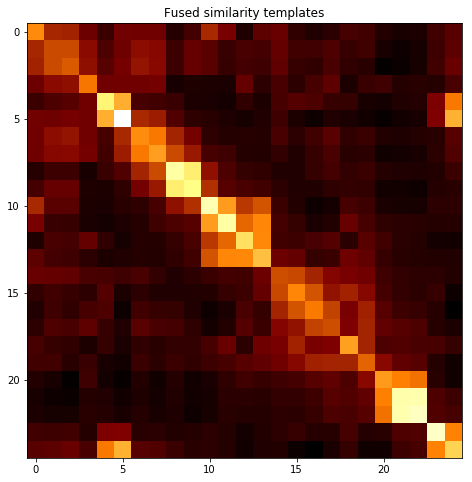

subject 22; gesture 5_1_1


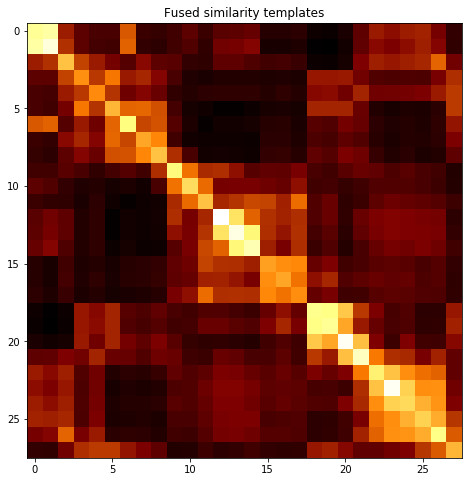

subject 22; gesture 6_1_1


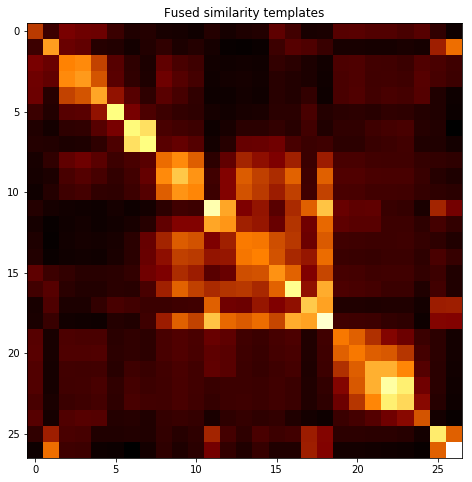

subject 22; gesture 6_0_2


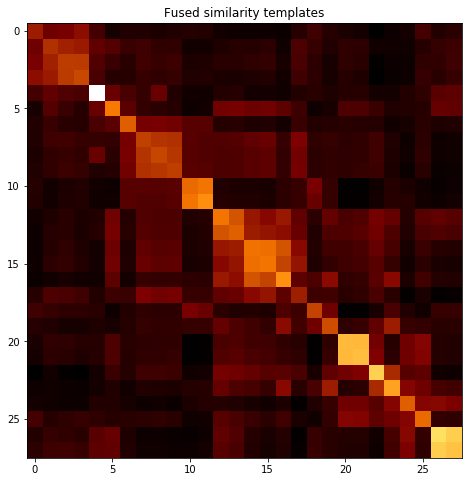

subject 22; gesture 3_1_2


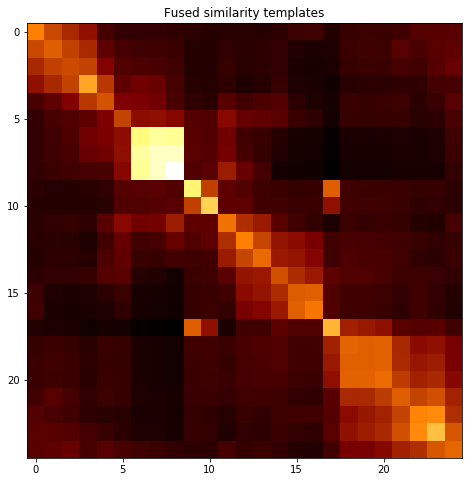

subject 22; gesture 3_1_1


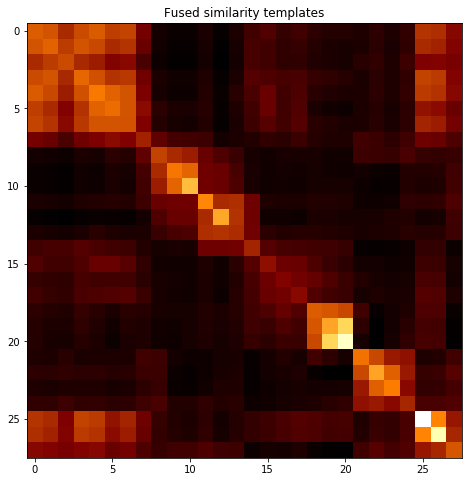

subject 22; gesture 6_0_1


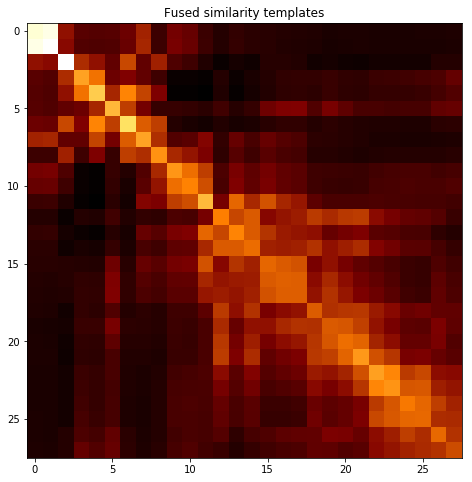

subject 22; gesture 5_0_1


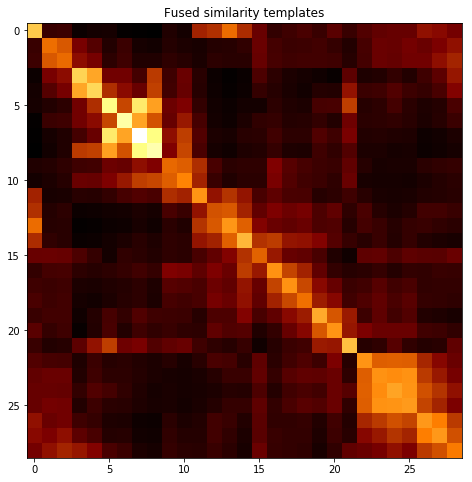

subject 22; gesture 4_0_2


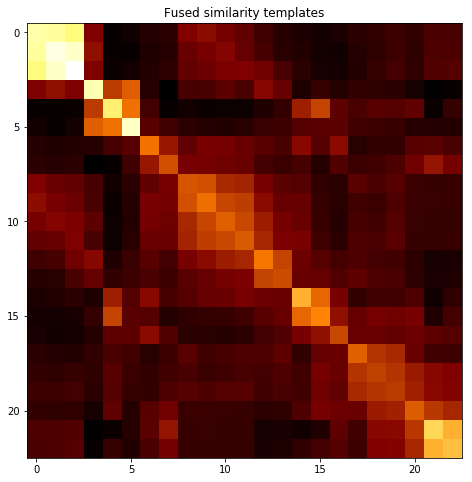

34
subject 34; gesture 5_0_2


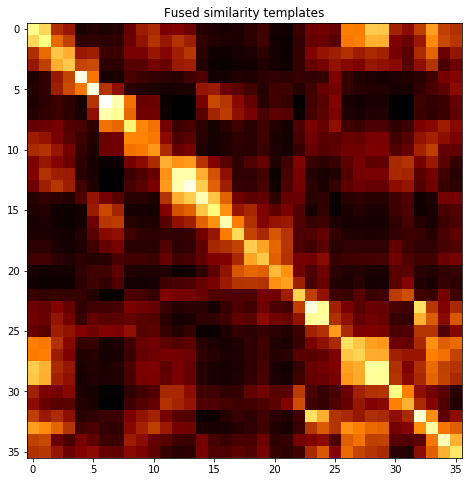

subject 34; gesture 3_0_1


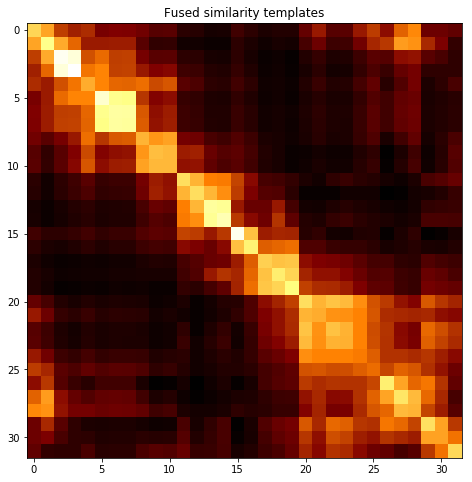

subject 34; gesture 4_1_1


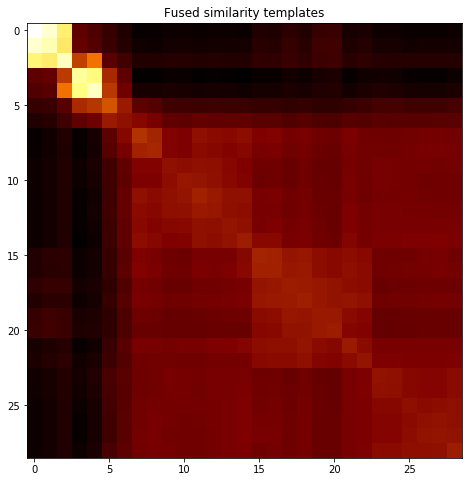

subject 34; gesture 4_1_2


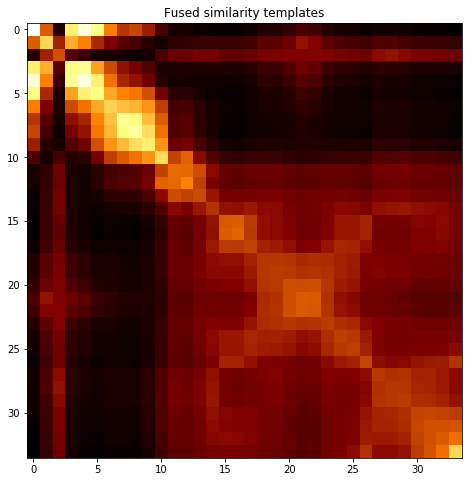

subject 34; gesture 5_1_2


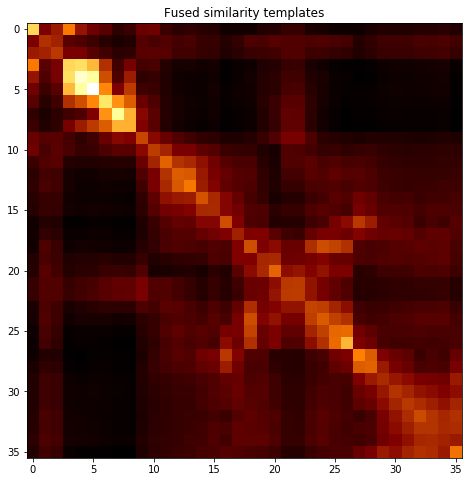

subject 34; gesture 6_1_2


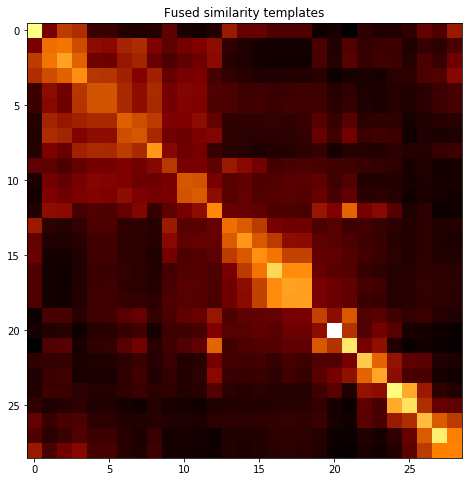

subject 34; gesture 4_0_1


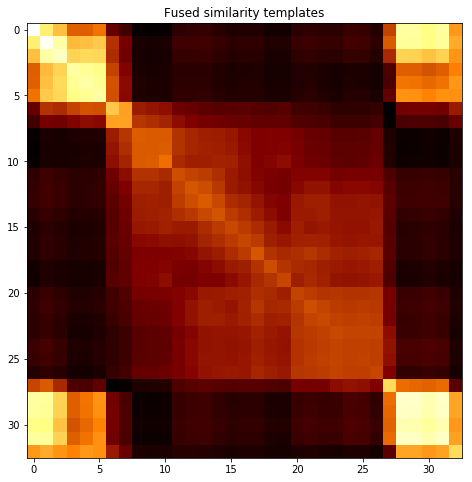

subject 34; gesture 3_0_2


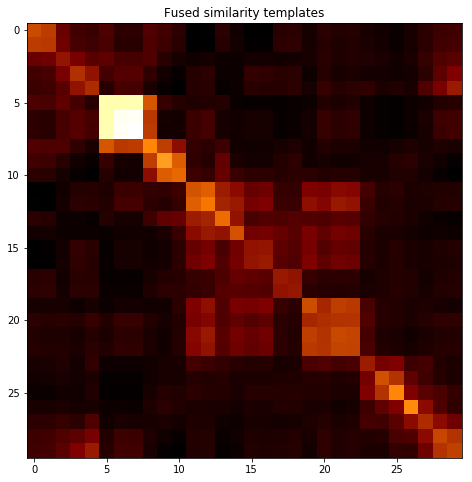

subject 34; gesture 5_1_1


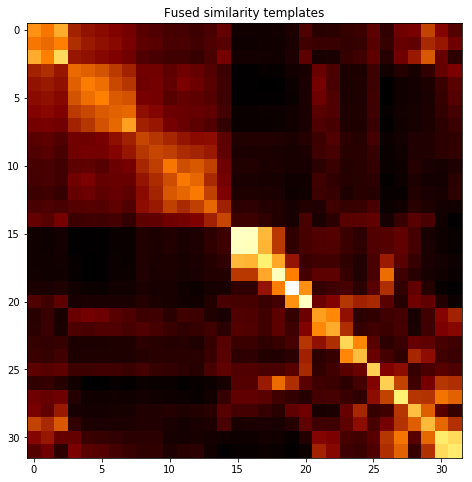

subject 34; gesture 6_1_1


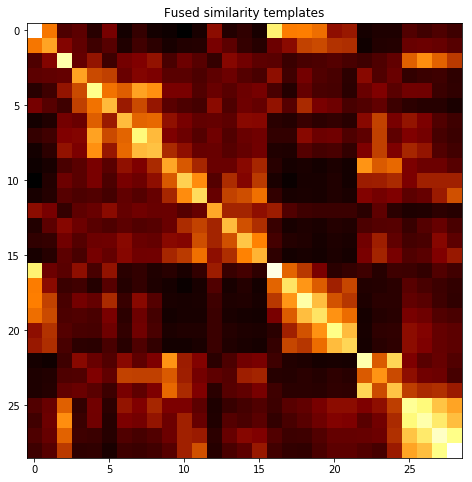

subject 34; gesture 6_0_2


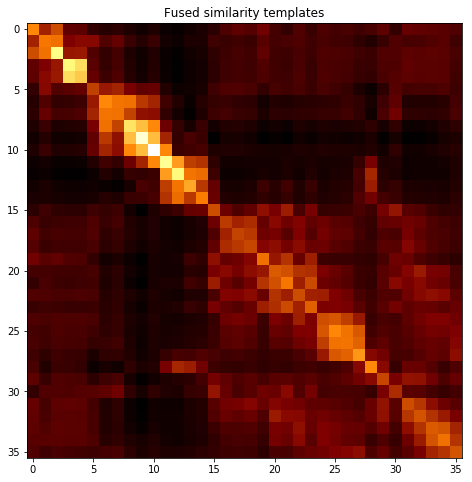

subject 34; gesture 3_1_2


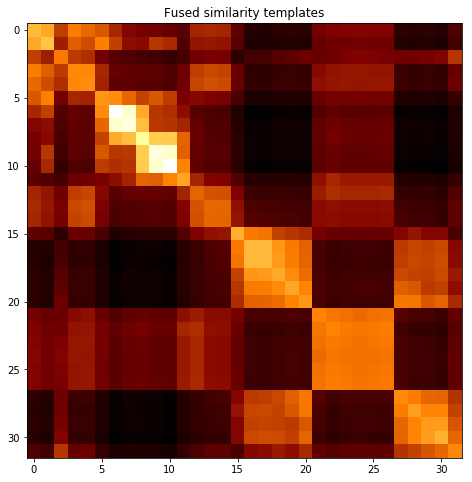

subject 34; gesture 3_1_1


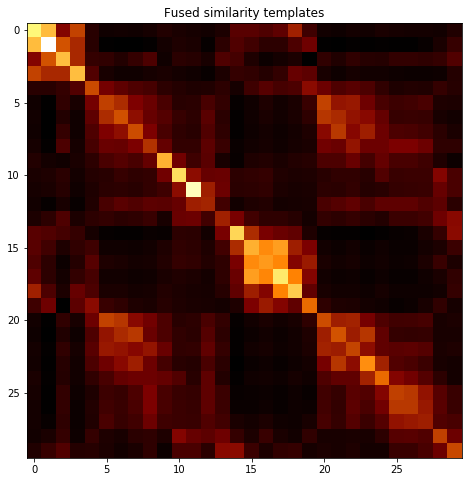

subject 34; gesture 6_0_1


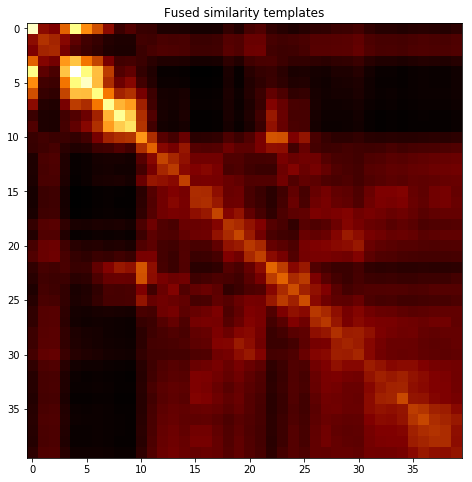

subject 34; gesture 5_0_1


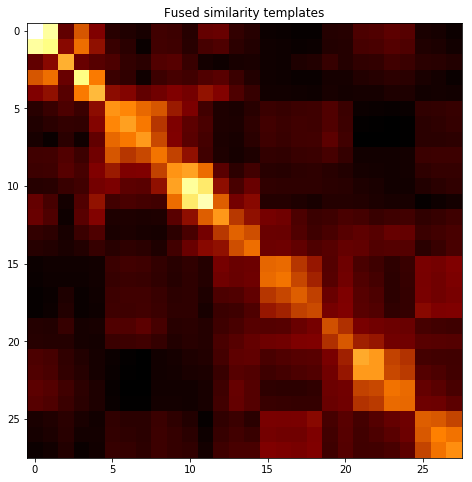

subject 34; gesture 4_0_2


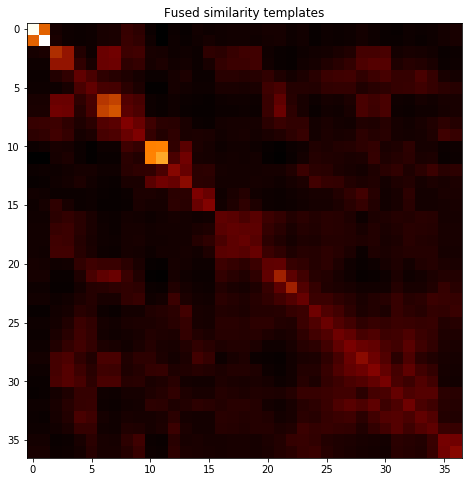

10
subject 10; gesture 5_0_2


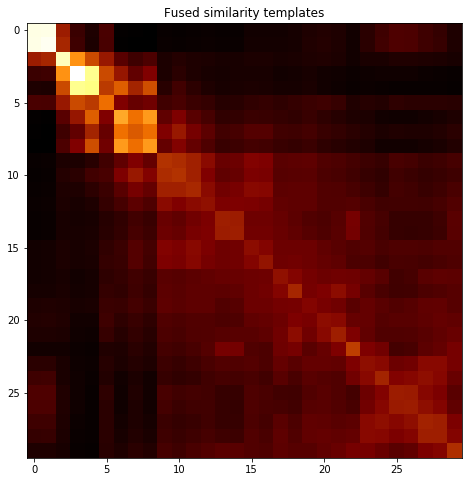

subject 10; gesture 3_0_1


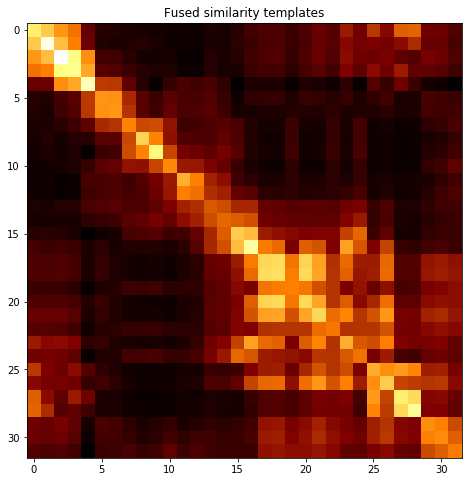

subject 10; gesture 4_1_1


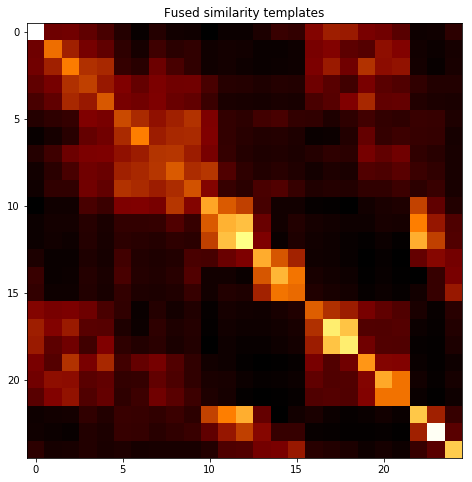

subject 10; gesture 4_1_2


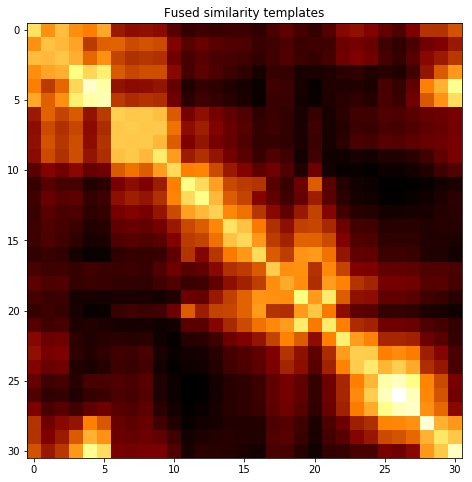

subject 10; gesture 5_1_2


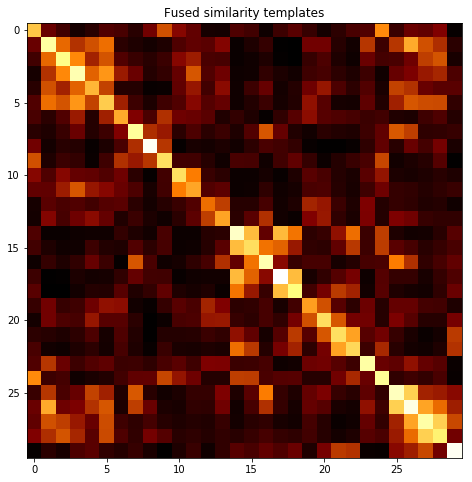

subject 10; gesture 6_1_2


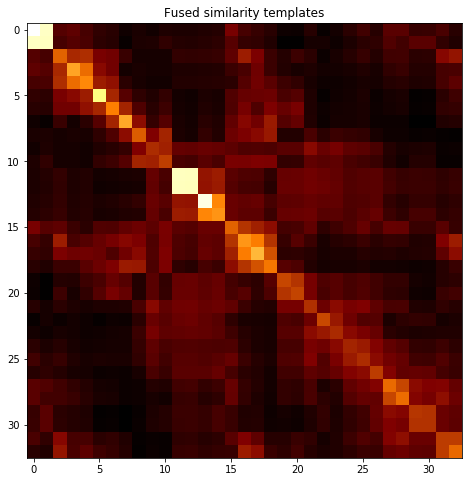

subject 10; gesture 4_0_1


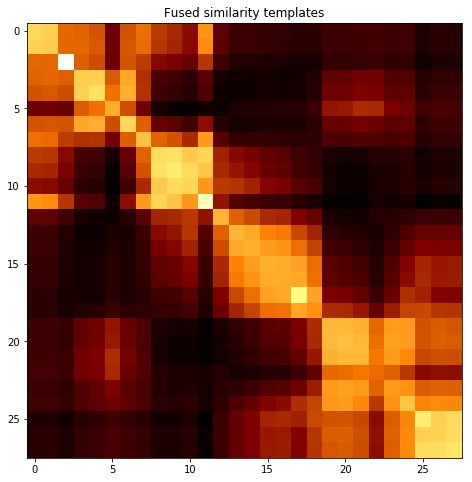

subject 10; gesture 3_0_2


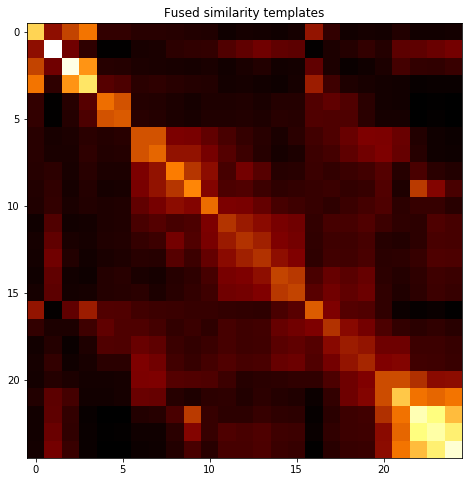

subject 10; gesture 5_1_1


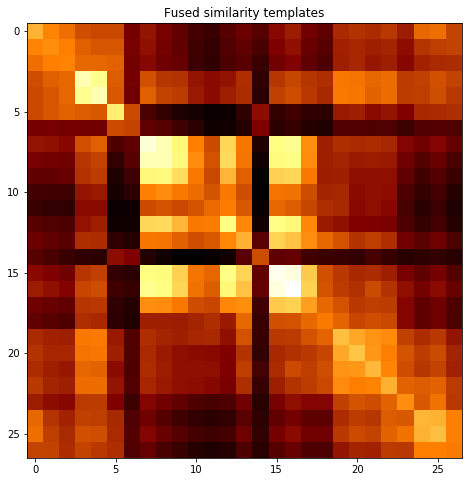

subject 10; gesture 6_1_1


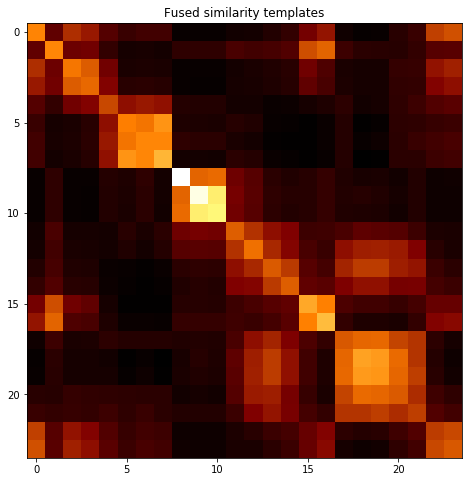

subject 10; gesture 6_0_2


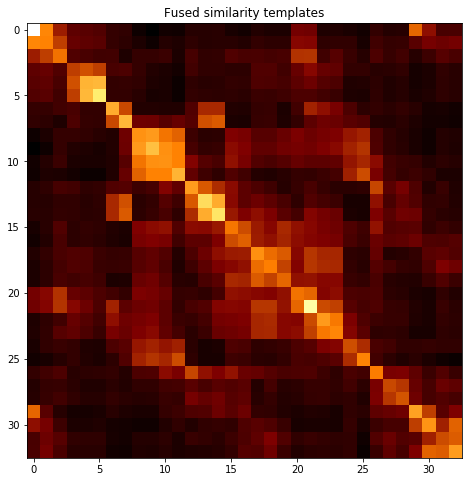

subject 10; gesture 3_1_2


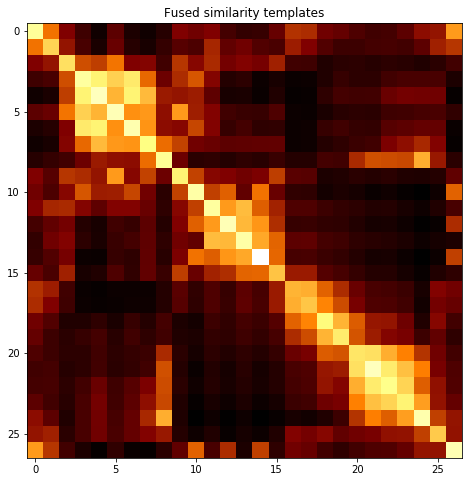

subject 10; gesture 3_1_1


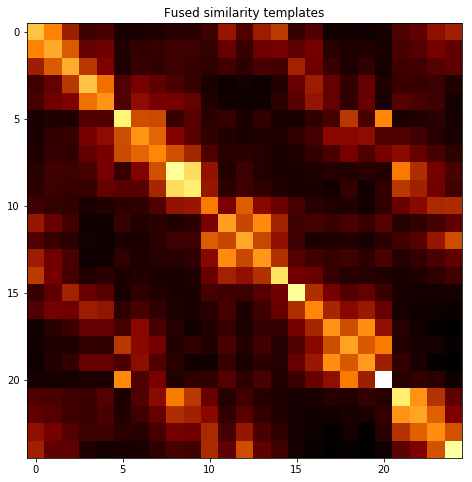

subject 10; gesture 6_0_1


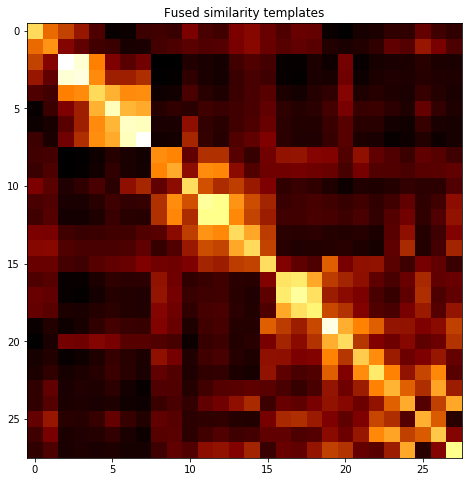

subject 10; gesture 5_0_1


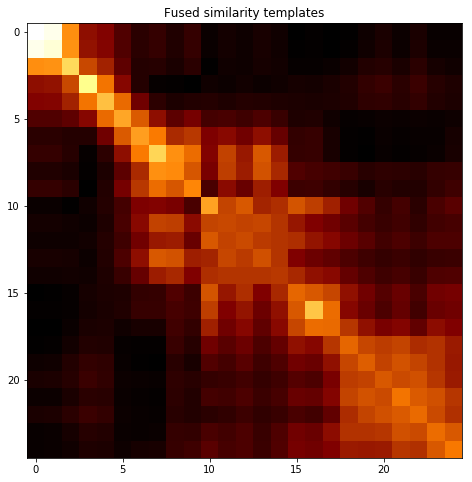

subject 10; gesture 4_0_2


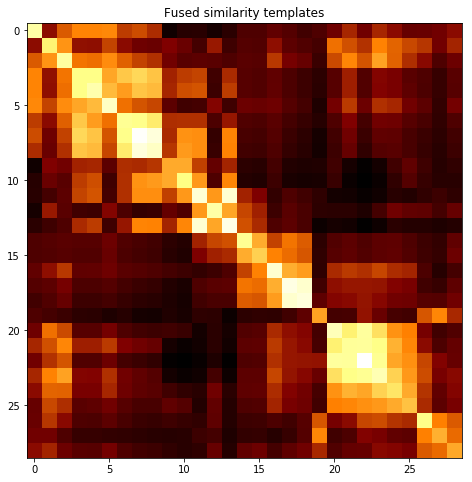

02
subject 02; gesture 5_0_2


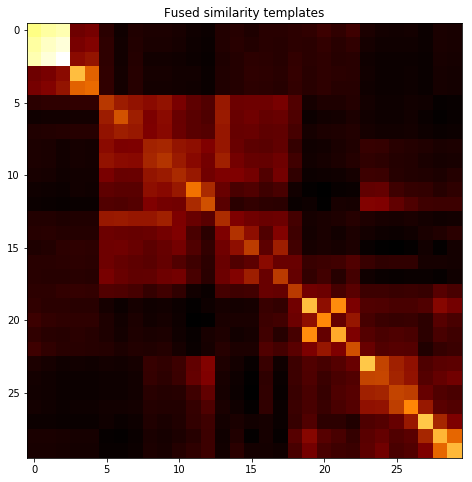

subject 02; gesture 3_0_1


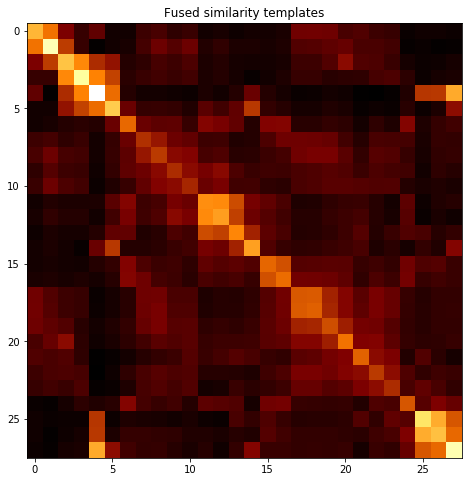

subject 02; gesture 4_1_1


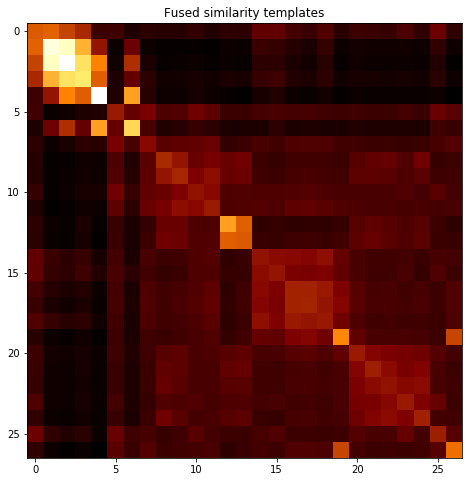

subject 02; gesture 4_1_2


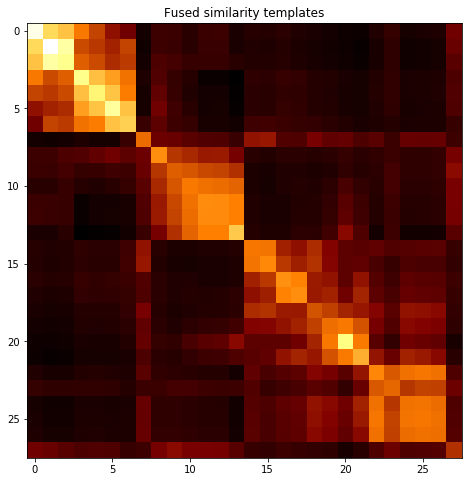

subject 02; gesture 5_1_2


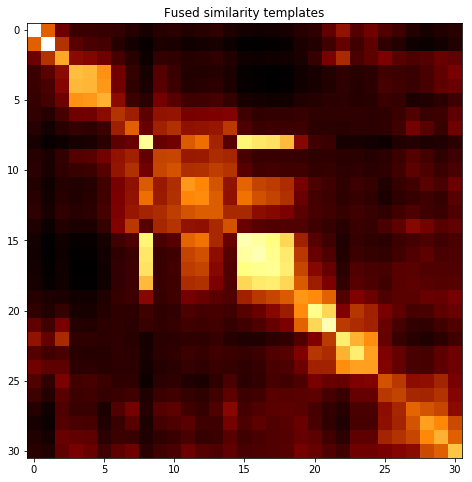

subject 02; gesture 6_1_2


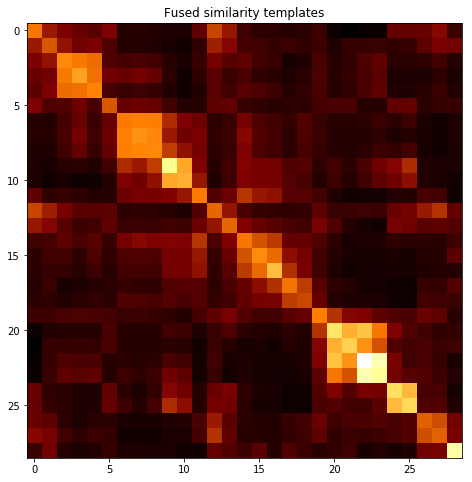

subject 02; gesture 4_0_1


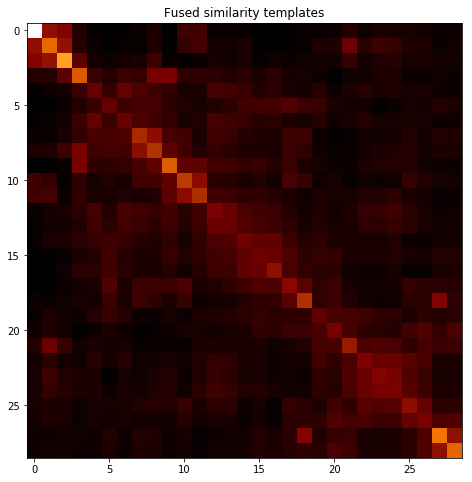

subject 02; gesture 3_0_2


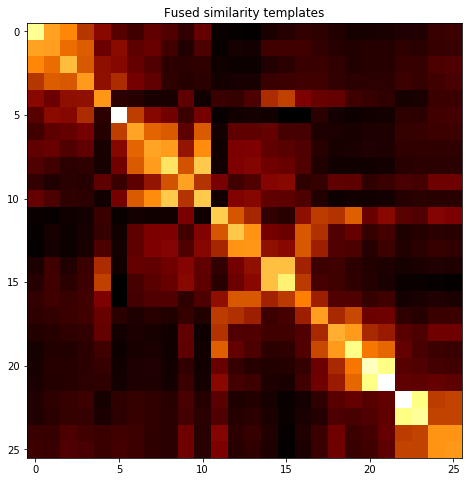

subject 02; gesture 5_1_1


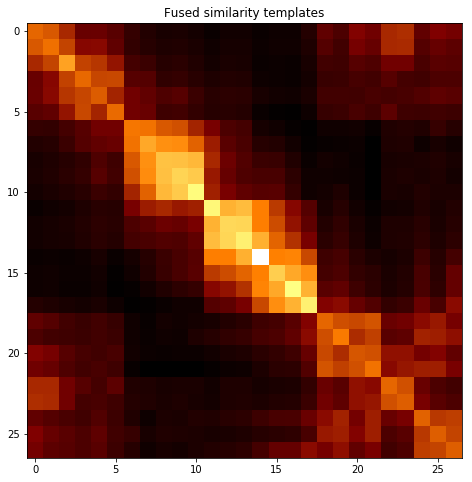

subject 02; gesture 6_1_1


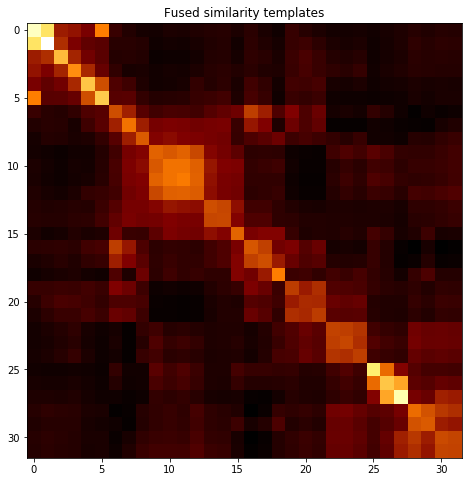

subject 02; gesture 6_0_2


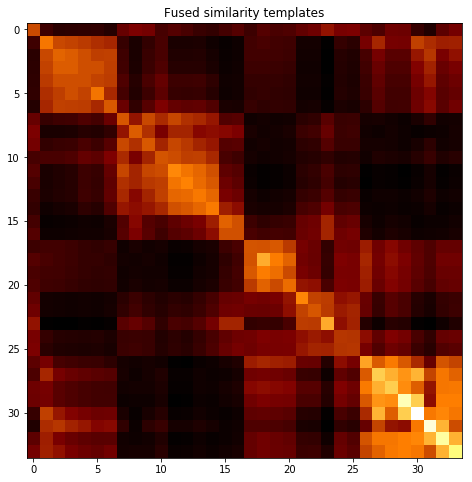

subject 02; gesture 3_1_2


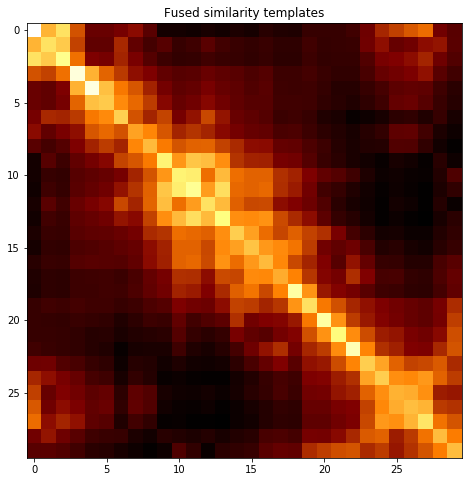

subject 02; gesture 3_1_1


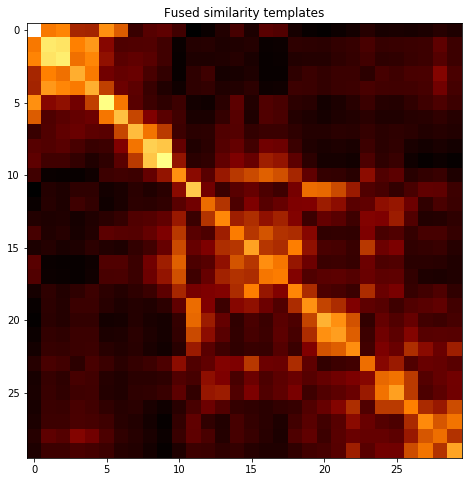

subject 02; gesture 6_0_1


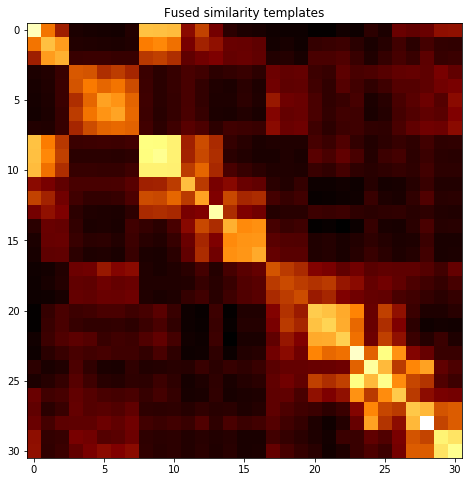

subject 02; gesture 5_0_1


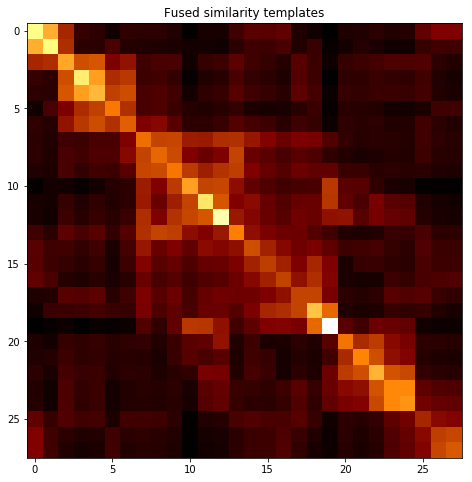

subject 02; gesture 4_0_2


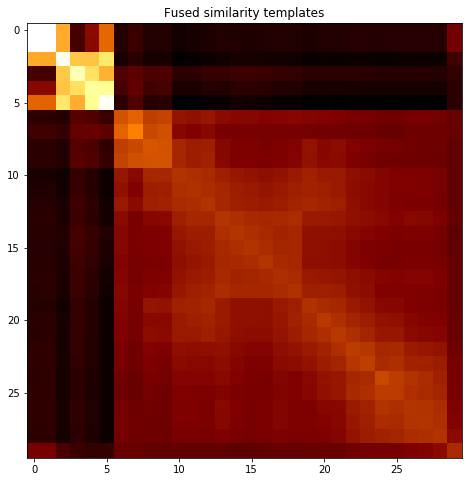

In [5]:
dict_antag = {}
for s, gdict in dc.data_set_smooth.items():
    print(s)
    dict_antag[s] = {}
    for g, a in gdict.items():
        snf = SNF(pass_antagonist_channels(g[0], a), k=0.5, metric=cumulated_euc_ts)
        #snf = SNF(a[:,1:-1], k=0.5, metric=cumulated_euc_ts)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(eta=0.001, iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        dict_antag[s][g] = snf.fused_similarity_template

In [6]:
from scipy.ndimage import gaussian_filter

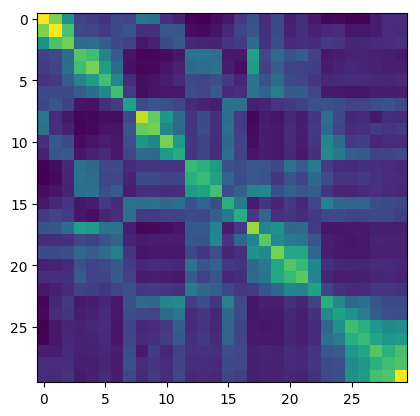

In [20]:
t = dict_antag["30"]["4_0_1"]
plt.imshow(t)

In [21]:
from ripser import lower_star_img
from ripser import Rips
from persim import plot_diagrams, PersImage, bottleneck

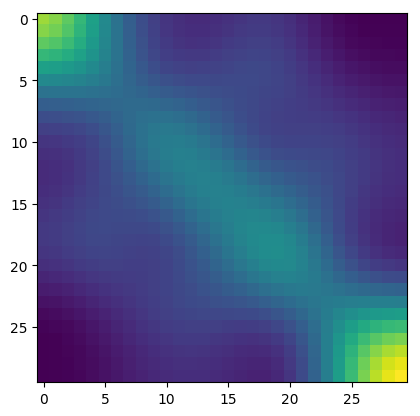

In [22]:
t = gaussian_filter(t, sigma=3)
plt.imshow(t)

In [23]:
t = (t - t.mean()) / t.std()

In [24]:
rips = Rips()
dgmt = rips.fit_transform(t, distance_matrix=True)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


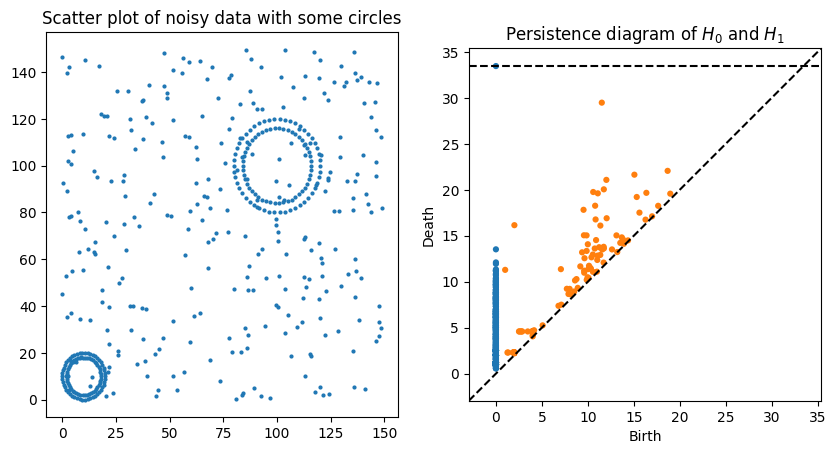

In [25]:
np.random.seed(1)

from itertools import product

from sklearn import datasets
from scipy.stats import multivariate_normal as mvn

# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [26]:
pim_px = 40 # persistence image dims (square)
pim_sd = 1e-4 # persistence image st. dev.
pim = PersImage(spread=1, pixels=[pim_px,pim_px], verbose=False)

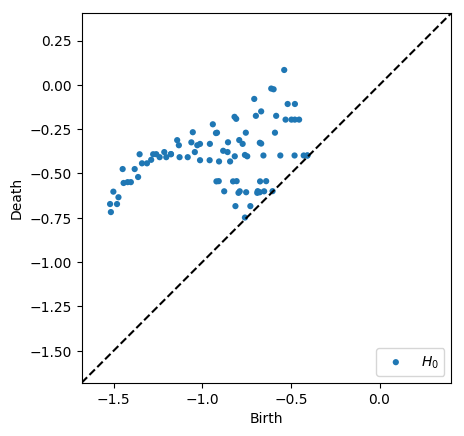

In [40]:
plot_diagrams((dgmt[1]))

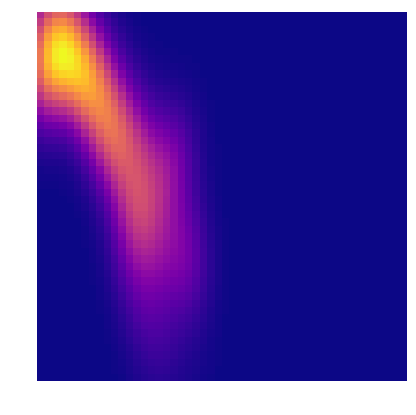

In [41]:
pim = PersImage(spread=0.1, pixels=[50,50], verbose=False)
img = pim.transform(dgmt[1])
pim.show(img)

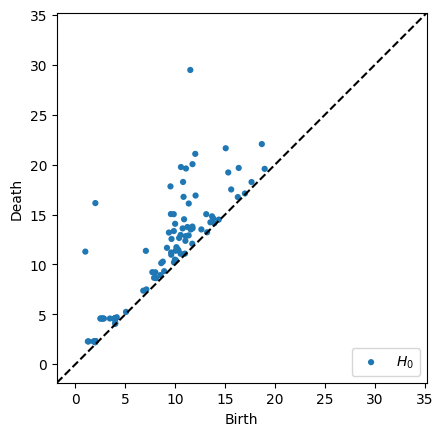

In [32]:
plot_diagrams(dgms[1])

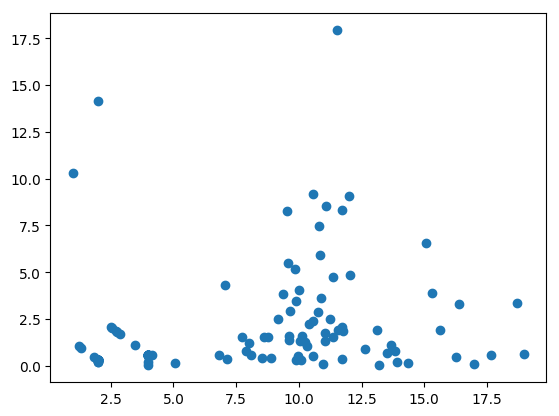

In [33]:
plt.scatter(dgms[1][:,0],dgms[1][:,1]-dgms[1][:,0])

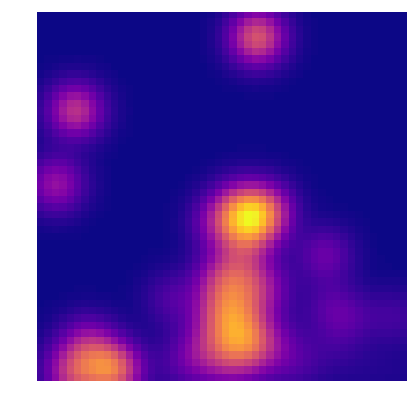

In [34]:
pim = PersImage(spread=1, pixels=[50,50], verbose=False)
img = pim.transform(dgms[1])
pim.show(img)

---
### PCA on SNF Matrices

In [ ]:
decomp_ant = {}

for s, gdict in dict_antag.items():
    decomp_ant[s] = {}
    for g, a in gdict.items():
        #print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        #print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_ant[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,3])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,4])
        plt.show()

---
### Compare PDs between Lower Star Filtered SNF Image

In [ ]:
from scipy.ndimage import gaussian_filter
import persim
from persim import plot_diagrams, PersImage, bottleneck
from ripser import lower_star_img

In [ ]:
subj_lab = []
gest_lab = []
arrays = []

for s, gdict in dict_antag.items():
    for g, a in gdict.items():
        subj_lab.append(s)
        gest_lab.append(int(g[0]))
        arrays.append(a)

In [ ]:
# calculate bottleneck distance between all pds and make predictions
predicts = []
for n, g1 in enumerate(arrays):
    print(n)
    gaus_g1 = gaussian_filter(g1, sigma=1)
    dgm1 = lower_star_img(gaus_g1)
    g1_bottlenecks = []
    for m, g2 in enumerate(arrays):
        gaus_g2 = gaussian_filter(g2, sigma=1)
        dgm2 = lower_star_img(gaus_g2)
        distance_bottleneck, (matching, D) = bottleneck(dgm1, dgm2, matching=True)
        g1_bottlenecks.append(distance_bottleneck)
    g1_bottlenecks = np.array(g1_bottlenecks)
    pred_idx = np.argsort(g1_bottlenecks)[1] # index of 2nd closest array by dtw; 1st closest is self
    predicts.append(gest_lab[pred_idx])

acc = (sum(np.array(gest_lab) == np.array(predicts)) / len(gest_lab)) * 100

print(f"accuracy: {acc}%")

---
### Compare DTW Measure between PCA SNF Matrices

In [ ]:
# organize vectors by gesture
gest_dict = {"3":[], "4":[], "5":[], "6":[]}

for s, gdict in decomp_ant.items():
    for g, a in gdict.items():
        if g[0] not in ["3", "4", "5", "6"]: continue
        gest_dict[g[0]].append(a)

In [ ]:
 comp_dict = {"3":{"3":[], "4":[], "5":[], "6":[]},
             "4":{"3":[], "4":[], "5":[], "6":[]},
             "5":{"3":[], "4":[], "5":[], "6":[]},
             "6":{"3":[], "4":[], "5":[], "6":[]}}

for g1 in ["3", "4", "5", "6"]:
    for g2 in ["3", "4", "5", "6"]:
        for i in range(144):
            for j in range(144):
                if i == j and g1 == g2: continue
                comp_dict[g1][g2].append(dtw(gest_dict[g1][i], gest_dict[g2][j]))

In [ ]:
for g1 in ["3", "4", "5", "6"]:
    print(f"gesture {g1} dtw similarities w/ other gestures:")
    for g2 in ["3", "4", "5", "6"]:
        print(f"avg similarity vs gesture {g2}: {np.mean(comp_dict[g1][g2])}")

---
### Compare Cumulated Distance between PCA SNF Matrices

In [ ]:
subj_lab = []
gest_lab = []
arrays = []

for s, gdict in decomp_ant.items():
    for g, a in gdict.items():
        subj_lab.append(s)
        gest_lab.append(int(g[0]))
        arrays.append(a)

# calculate bottleneck distance between all pds and make predictions
predicts = []
for n, g1 in enumerate(arrays):
    g1_dists = []
    for m, g2 in enumerate(arrays):
        dist = cumulated_euc_ts(g1, g2)
        g1_dists.append(dist)
    g1_dists = np.array(g1_dists)
    pred_idx = np.argsort(g1_dists)[1] # index of 2nd closest array by dtw; 1st closest is self
    predicts.append(gest_lab[pred_idx])

acc = (sum(np.array(gest_lab) == np.array(predicts)) / len(gest_lab)) * 100

print(f"accuracy: {acc}%")

---
### Compare PDs of Time Series Sublevel Sets after PCA

In [ ]:
from ripser import ripser, Rips
from persim import plot_diagrams, PersImage, bottleneck
from TDA_helper_fcns import sublevel_set_time_series_dist

In [ ]:
px = 20
sd = 1

In [ ]:
subj_lab = []
gest_lab = []
arrays = []

for s, gdict in decomp_ant.items():
    for g, a in gdict.items():
        subj_lab.append(s)
        gest_lab.append(int(g[0]))
        arrays.append(a)

# calculate bottleneck distance between all pds and make predictions
predicts = []
for n, g1 in enumerate(arrays):
    rips = Rips(maxdim=0, verbose=False) # initialize rips complex
    sls1 = sublevel_set_time_series_dist(g1)
    dgm1 = rips.fit_transform(sls1, distance_matrix=True)[0]
    g1_bottlenecks = []
    for m, g2 in enumerate(arrays):
        sls2 = sublevel_set_time_series_dist(g2)
        dgm2 = rips.fit_transform(sls2, distance_matrix=True)[0]
        distance_bottleneck, (matching, D) = bottleneck(dgm1, dgm2, matching=True)
        g1_bottlenecks.append(distance_bottleneck)
    g1_bottlenecks = np.array(g1_bottlenecks)
    pred_idx = np.argsort(g1_bottlenecks)[1] # index of 2nd closest array by dtw; 1st closest is self
    predicts.append(gest_lab[pred_idx])

acc = (sum(np.array(gest_lab) == np.array(predicts)) / len(gest_lab)) * 100

print(f"accuracy: {acc}%")

---
### SW1Pers

In [ ]:
t1 = gest_dict["3"][0]
t2 = gest_dict["4"][1]
t3 = gest_dict["5"][20]
t4 = gest_dict["6"][1]

In [ ]:
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

import scipy.interpolate as interp

from ripser import ripser
from persim import plot_diagrams

In [ ]:
def getSlidingWindow(x, dim, Tau, dT):
    N = len(x)
    NWindows = int(np.floor((N-dim*Tau)/dT)) # The number of windows
    if NWindows <= 0:
        print("Error: Tau too large for signal extent")
        return np.zeros((3, dim))
    X = np.zeros((NWindows, dim)) # Create a 2D array which will store all windows
    idx = np.arange(N)
    for i in range(NWindows):
        # Figure out the indices of the samples in this window
        idxx = dT*i + Tau*np.arange(dim) 
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))+2
        if end >= len(x):
            X = X[0:i, :]
            break
        # Do spline interpolation to fill in this window, and place
        # it in the resulting array
        X[i, :] = interp.spline(idx[start:end+1], x[start:end+1], idxx)
    return X

In [ ]:
sw = getSlidingWindow(x=t4, dim=20, Tau=1, dT=0.5)
PDs = ripser(sw, maxdim=1)['dgms']

In [ ]:
pca = PCA(n_components = 2)
Y = pca.fit_transform(sw)
eigs = pca.explained_variance_

In [ ]:
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(10,10))
ax1 = plt.subplot(gs[0,0])
ax1.scatter(Y[:, 0], Y[:, 1])

ax1 = plt.subplot(gs[0,1])
ax2 = plot_diagrams(PDs)
plt.show()

In [ ]:
gest_dict